In [1]:
## first import all the libraries


import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.formula.api as sm
from statsmodels.stats.anova import anova_lm

pd.set_option('max_columns',None)

Data Has 3998 rows and 39 variables

In [2]:
## import train data 

df=pd.read_excel('train.xlsx')

## checking shape of data
## there are 39 columns and 3998 rows 
df.shape       

(3998, 39)

In [3]:
## checking information about dataset 

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3998 entries, 0 to 3997
Data columns (total 39 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Unnamed: 0             3998 non-null   object        
 1   ID                     3998 non-null   int64         
 2   Salary                 3998 non-null   int64         
 3   DOJ                    3998 non-null   datetime64[ns]
 4   DOL                    3998 non-null   object        
 5   Designation            3998 non-null   object        
 6   JobCity                3998 non-null   object        
 7   Gender                 3998 non-null   object        
 8   DOB                    3998 non-null   datetime64[ns]
 9   10percentage           3998 non-null   float64       
 10  10board                3998 non-null   object        
 11  12graduation           3998 non-null   int64         
 12  12percentage           3998 non-null   float64       
 13  12b

In [4]:
df.drop('Unnamed: 0',axis=1,inplace=True)

## hence this variable has no information so we have drop this variable

In [5]:
## check for null values in dataset

df.isnull().sum()

## there is no null  values in dataset

ID                       0
Salary                   0
DOJ                      0
DOL                      0
Designation              0
JobCity                  0
Gender                   0
DOB                      0
10percentage             0
10board                  0
12graduation             0
12percentage             0
12board                  0
CollegeID                0
CollegeTier              0
Degree                   0
Specialization           0
collegeGPA               0
CollegeCityID            0
CollegeCityTier          0
CollegeState             0
GraduationYear           0
English                  0
Logical                  0
Quant                    0
Domain                   0
ComputerProgramming      0
ElectronicsAndSemicon    0
ComputerScience          0
MechanicalEngg           0
ElectricalEngg           0
TelecomEngg              0
CivilEngg                0
conscientiousness        0
agreeableness            0
extraversion             0
nueroticism              0
o

#### When we go through the column Designation in the dataset we come to know that there are total number 412 unique designations present in the the column.So we further classify them into different categories. The sub-categories are given below:

In [6]:
df['Designation'].replace({'ase':'Engineer','executive engg':'Engineer','r & d':'Engineer','software eng':'Engineer',
                          'software engg':'Engineer','software engeree':'Engineer','software test engineerte':'Engineer'},inplace=True)

In [7]:
df['Designation'].replace({'db2dba':'Analyst','dba':'Analyst','oracle dba':'Analyst','qualityassurance':'Analyst',
                          'teradata dba':'Analyst','sql dba':'Analyst'},inplace=True)

In [8]:
df[df['Designation'].str.contains('Trainee',case=False)].shape

(97, 38)

In [9]:
df['Designation'].replace({'apprentice':'Trainee','engineer trainee':'Trainee','get':'Trainee','graduate trainee engineer':'Trainee',
                          'human resources intern':'Trainee','program analyst trainee':'Trainee','programmer analyst trainee':'Trainee',
                          'web intern':'Trainee'},inplace=True)

In [10]:
df['Designation'].value_counts()

software engineer                      539
software developer                     265
system engineer                        205
programmer analyst                     139
systems engineer                       118
                                      ... 
administrative coordinator               1
teradata developer                       1
territory sales manager                  1
assistant system engineer - trainee      1
technology lead                          1
Name: Designation, Length: 404, dtype: int64

Trainee-  There were different post like Trainee, Appreciate, Engg traniee,get-graduate trainee engineer-human resource intern-programmer analyst trainee-web intern, etc. classified under Trainee.

In [11]:
df.loc[df['Designation'].str.contains('Trainee',case=False),'Designation']='Trainee'

Engineers- There were many designations corresponding to the engineering such as Engineer, Ase, engg, executive engg, r&d, software eng, software engg, software engeree, software engineerte etc. So we classified them into one category of Engineers.

In [12]:
df.loc[df['Designation'].str.contains('engineer',case=False),'Designation']='Engineer'

Analysts- As mentioned above we did the same with Analyst which had db2dba-dba-oracle dba-quality assurance analyst- sql dba-teradata dba etc. and classified them under analyst.

In [13]:
df.loc[df['Designation'].str.contains('analyst',case=False),'Designation']='Analyst'

Developers- All the designations corresponding to developer profile were put into Developer.

In [14]:
df.loc[df['Designation'].str.contains('developer',case=False),'Designation']='Developer'

Managers- All the designation corresponding to manager profile were put into Manager category.

In [15]:
df.loc[df['Designation'].str.contains('Manager',case=False),'Designation']='Manager'

In [16]:
df.Designation.value_counts()

Engineer                      2104
Developer                      709
Analyst                        424
Manager                        124
Trainee                        116
                              ... 
software designer                1
project management officer       1
computer faculty                 1
software executive               1
executive hr                     1
Name: Designation, Length: 160, dtype: int64

In [17]:
post=['Engineer','Developer','Analyst','Manager','Trainee']

def notx(x):
    if x in post:
        return x
    else:
        return 'others'

In [18]:
df['Designation']=df['Designation'].map(notx)

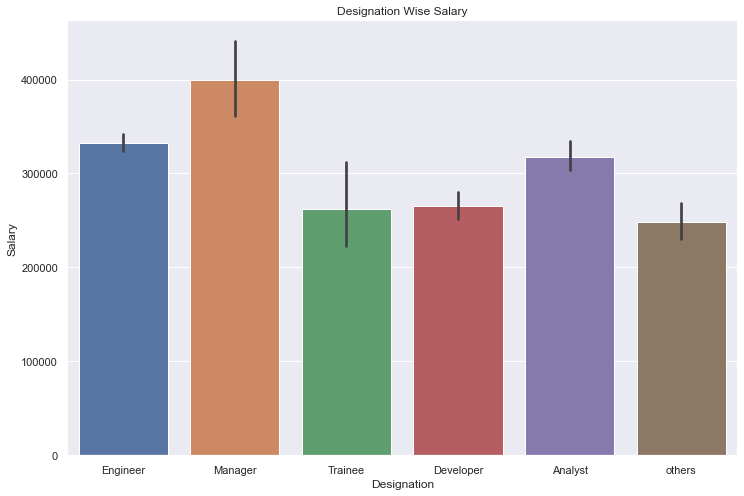

In [19]:
import warnings
warnings.filterwarnings('ignore')
sns.set()
plt.rcParams['figure.figsize']=[12,8]
sns.barplot(df['Designation'],df['Salary'])
plt.title('Designation Wise Salary')
plt.show()

In [20]:
df.Designation.value_counts()

Engineer     2104
Developer     709
others        521
Analyst       424
Manager       124
Trainee       116
Name: Designation, dtype: int64

In [21]:
df['DOL']=df['DOL'].replace({'present':None})

df['DOL'].fillna(pd.to_datetime('2015-12-31'),inplace=True)
## firs replace present by none then replace present by 2015:12:31 because the last month in the data set 
# is december so we assuming that 31 december 2015 as present

In [22]:
df['Experience']=round(((df['DOL']-df['DOJ']).dt.days)/365,1)


##As in the dataset the date of joining and date of leaving were given so on the basis of that we counted the
# number of the days and divided them in the number of years of experience.


In [23]:
def Perc(x):
    if x<=50:
        return 4
    elif x>50 and x<=65:
        return 3
    elif x>65 and x<=80:
        return 2
    else:
        return 1


In [24]:
df['10percentage_bins']=df['10percentage'].map(Perc)
df['12percentage_bins']=df['12percentage'].map(Perc)


# We classified the percentage under the universal divison categories so:
# 4- denotes percentage less than 50 i.e. Third Divison.
# 3- denotes percentage >50 and <=65 i.e. Second Divison.
# 2- denotes percentage >65 and <=80 i.e. First Division.
# 1- denotes percentage >80 i.e. Distinction.


In [25]:

for i in df.columns:
    print(i,len(df[i].duplicated()))

ID 3998
Salary 3998
DOJ 3998
DOL 3998
Designation 3998
JobCity 3998
Gender 3998
DOB 3998
10percentage 3998
10board 3998
12graduation 3998
12percentage 3998
12board 3998
CollegeID 3998
CollegeTier 3998
Degree 3998
Specialization 3998
collegeGPA 3998
CollegeCityID 3998
CollegeCityTier 3998
CollegeState 3998
GraduationYear 3998
English 3998
Logical 3998
Quant 3998
Domain 3998
ComputerProgramming 3998
ElectronicsAndSemicon 3998
ComputerScience 3998
MechanicalEngg 3998
ElectricalEngg 3998
TelecomEngg 3998
CivilEngg 3998
conscientiousness 3998
agreeableness 3998
extraversion 3998
nueroticism 3998
openess_to_experience 3998
Experience 3998
10percentage_bins 3998
12percentage_bins 3998


In [26]:
perc=df[['10percentage','12percentage']]

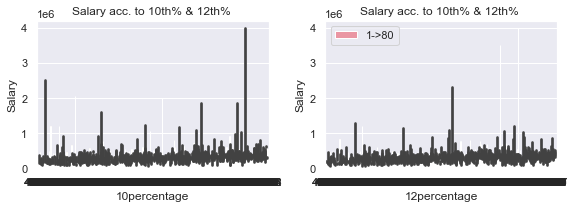

In [27]:
a=3
b=3
c=1

for i in perc:
    plt.subplot(a,b,c)
    sns.barplot(df[i],df['Salary'],label='1->80')
    plt.title('Salary acc. to 10th% & 12th% ')
    c+=1

plt.tight_layout()
plt.legend()



In [28]:
df.head(5)

ID   Salary        DOJ        DOL Designation    JobCity Gender  \
0  203097   420000 2012-06-01 2015-12-31    Engineer  Bangalore      f   
1  579905   500000 2013-09-01 2015-12-31     Manager     Indore      m   
2  810601   325000 2014-06-01 2015-12-31    Engineer    Chennai      f   
3  267447  1100000 2011-07-01 2015-12-31    Engineer    Gurgaon      m   
4  343523   200000 2014-03-01 2015-03-01     Trainee    Manesar      m   

         DOB  10percentage                         10board  12graduation  \
0 1990-02-19          84.3  board ofsecondary education,ap          2007   
1 1989-10-04          85.4                            cbse          2007   
2 1992-08-03          85.0                            cbse          2010   
3 1989-12-05          85.6                            cbse          2007   
4 1991-02-27          78.0                            cbse          2008   

   12percentage                             12board  CollegeID  CollegeTier  \
0          95.8  board of intermediate education,ap       1141            2   
1          85.0                                cbse       5807            2   
2          68.2                                cbse         64            2   
3          83.6                                cbse       6920            1   
4          76.8                                cbse      11368            2   

        Degree                             Specialization  collegeGPA  \
0  B.Tech/B.E.                       computer engineering       78.00   
1  B.Tech/B.E.  electronics and communication engineering       70.06   
2  B.Tech/B.E.                     information technology       70.00   
3  B.Tech/B.E.                       computer engineering       74.64   
4  B.Tech/B.E.  electronics and communication engineering       73.90   

   CollegeCityID  CollegeCityTier    CollegeState  GraduationYear  English  \
0           1141                0  Andhra Pradesh            2011      515   
1           5807                0  Madhya Pradesh            2012      695   
2             64                0   Uttar Pradesh            2014      615   
3           6920                1           Delhi            2011      635   
4          11368                0   Uttar Pradesh            2012      545   

   Logical  Quant    Domain  ComputerProgramming  ElectronicsAndSemicon  \
0      585    525  0.635979                  445                     -1   
1      610    780  0.960603                   -1                    466   
2      545    370  0.450877                  395                     -1   
3      585    625  0.974396                  615                     -1   
4      625    465  0.124502                   -1                    233   

   ComputerScience  MechanicalEngg  ElectricalEngg  TelecomEngg  CivilEngg  \
0               -1              -1              -1           -1         -1   
1               -1              -1              -1           -1         -1   
2               -1              -1              -1           -1         -1   
3               -1              -1              -1           -1         -1   
4               -1              -1              -1           -1         -1   

   conscientiousness  agreeableness  extraversion  nueroticism  \
0             0.9737         0.8128        0.5269      1.35490   
1            -0.7335         0.3789        1.2396     -0.10760   
2             0.2718         1.7109        0.1637     -0.86820   
3             0.0464         0.3448       -0.3440     -0.40780   
4            -0.8810        -0.2793       -1.0697      0.09163   

   openess_to_experience  Experience  10percentage_bins  12percentage_bins  
0                -0.4455         3.6                  1                  1  
1                 0.8637         2.3                  1                  1  
2                 0.6721         1.6                  1                  2  
3                -0.9194         4.5                  1                  1  
4                -0.

In [29]:
df['Today']=pd.to_datetime('2015-12-31')

In [30]:
df['Age']=((df['Today']-df['DOB'])/365).dt.days

## we have converted the date of birth in to age by using 31 dec 2015 as present date

<AxesSubplot:>

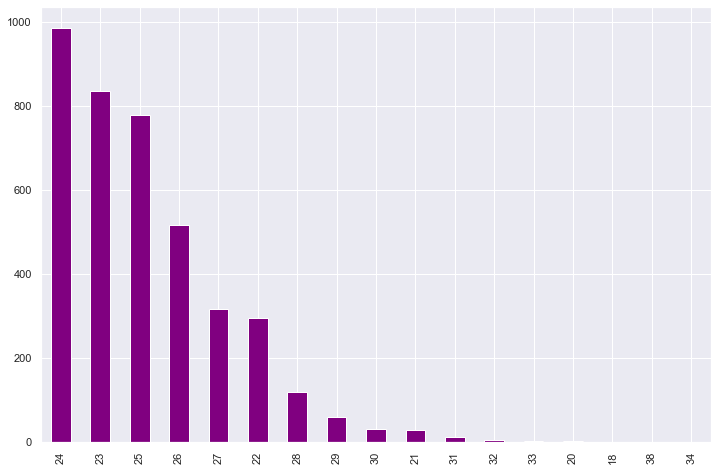

In [31]:
df['Age'].value_counts().plot(kind='bar',color='purple')

In [32]:
df.head(5)

ID   Salary        DOJ        DOL Designation    JobCity Gender  \
0  203097   420000 2012-06-01 2015-12-31    Engineer  Bangalore      f   
1  579905   500000 2013-09-01 2015-12-31     Manager     Indore      m   
2  810601   325000 2014-06-01 2015-12-31    Engineer    Chennai      f   
3  267447  1100000 2011-07-01 2015-12-31    Engineer    Gurgaon      m   
4  343523   200000 2014-03-01 2015-03-01     Trainee    Manesar      m   

         DOB  10percentage                         10board  12graduation  \
0 1990-02-19          84.3  board ofsecondary education,ap          2007   
1 1989-10-04          85.4                            cbse          2007   
2 1992-08-03          85.0                            cbse          2010   
3 1989-12-05          85.6                            cbse          2007   
4 1991-02-27          78.0                            cbse          2008   

   12percentage                             12board  CollegeID  CollegeTier  \
0          95.8  board of intermediate education,ap       1141            2   
1          85.0                                cbse       5807            2   
2          68.2                                cbse         64            2   
3          83.6                                cbse       6920            1   
4          76.8                                cbse      11368            2   

        Degree                             Specialization  collegeGPA  \
0  B.Tech/B.E.                       computer engineering       78.00   
1  B.Tech/B.E.  electronics and communication engineering       70.06   
2  B.Tech/B.E.                     information technology       70.00   
3  B.Tech/B.E.                       computer engineering       74.64   
4  B.Tech/B.E.  electronics and communication engineering       73.90   

   CollegeCityID  CollegeCityTier    CollegeState  GraduationYear  English  \
0           1141                0  Andhra Pradesh            2011      515   
1           5807                0  Madhya Pradesh            2012      695   
2             64                0   Uttar Pradesh            2014      615   
3           6920                1           Delhi            2011      635   
4          11368                0   Uttar Pradesh            2012      545   

   Logical  Quant    Domain  ComputerProgramming  ElectronicsAndSemicon  \
0      585    525  0.635979                  445                     -1   
1      610    780  0.960603                   -1                    466   
2      545    370  0.450877                  395                     -1   
3      585    625  0.974396                  615                     -1   
4      625    465  0.124502                   -1                    233   

   ComputerScience  MechanicalEngg  ElectricalEngg  TelecomEngg  CivilEngg  \
0               -1              -1              -1           -1         -1   
1               -1              -1              -1           -1         -1   
2               -1              -1              -1           -1         -1   
3               -1              -1              -1           -1         -1   
4               -1              -1              -1           -1         -1   

   conscientiousness  agreeableness  extraversion  nueroticism  \
0             0.9737         0.8128        0.5269      1.35490   
1            -0.7335         0.3789        1.2396     -0.10760   
2             0.2718         1.7109        0.1637     -0.86820   
3             0.0464         0.3448       -0.3440     -0.40780   
4            -0.8810        -0.2793       -1.0697      0.09163   

   openess_to_experience  Experience  10percentage_bins  12percentage_bins  \
0                -0.4455         3.6                  1                  1   
1                 0.8637         2.3                  1                  1   
2                 0.6721         1.6                  1                  2   
3                -0.9194         4.5                  1                  1   
4              

<AxesSubplot:xlabel='CollegeTier', ylabel='Salary'>

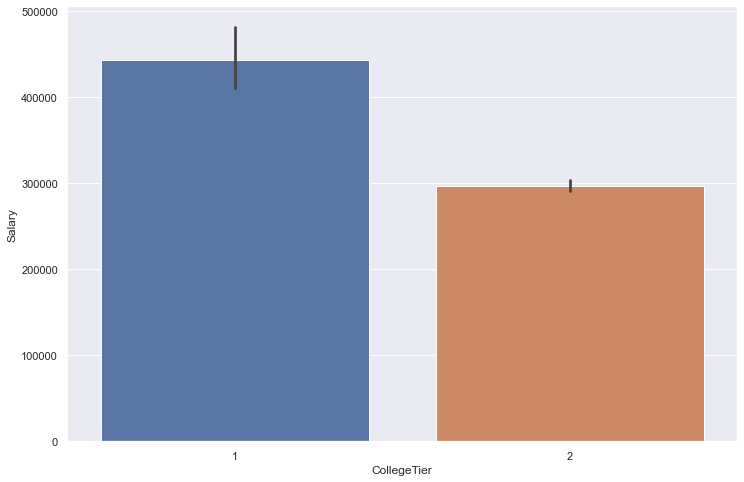

In [33]:
sns.barplot(df['CollegeTier'],df['Salary'])

## as we can see in the bar plot that tier 1 colleges have higher salary than tier 2

In [34]:
df['Degree'].value_counts()

B.Tech/B.E.      3700
MCA               243
M.Tech./M.E.       53
M.Sc. (Tech.)       2
Name: Degree, dtype: int64

<AxesSubplot:xlabel='Gender', ylabel='Salary'>

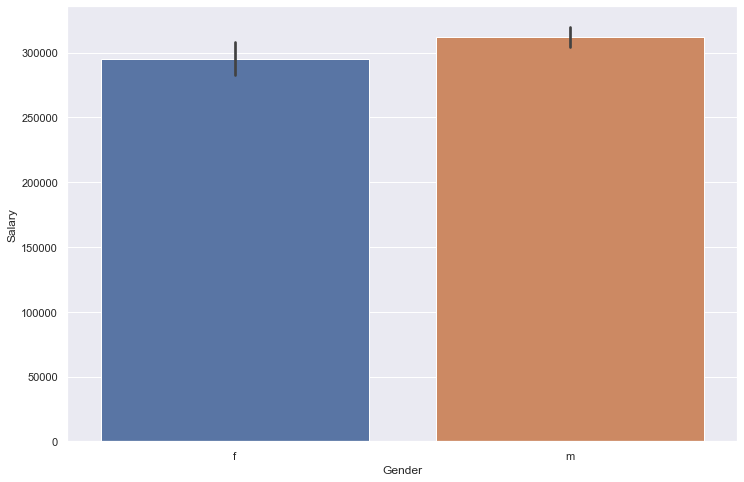

In [35]:
sns.barplot(df['Gender'],df['Salary'])

<AxesSubplot:xlabel='Degree', ylabel='Salary'>

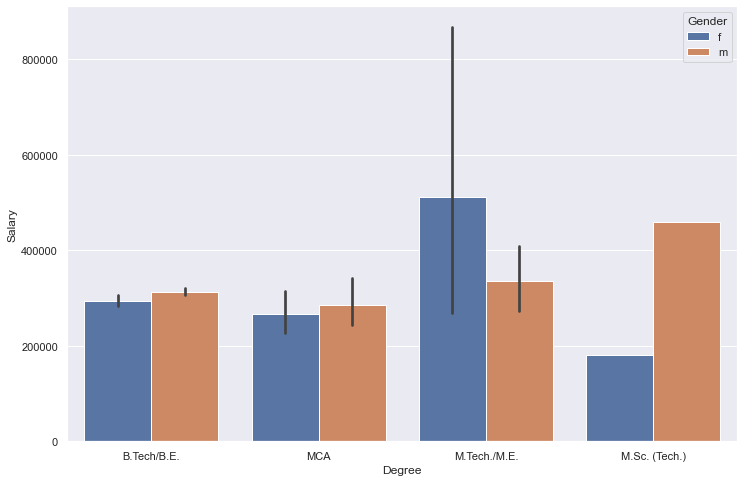

In [36]:
sns.barplot(df['Degree'],df['Salary'],hue=df['Gender'])

## as we can see male students have higher salary than female students
## Student with M.tech Degree have higher salary as compared with the other degrees and female candidates who hold the 
 # mtech degree earn higher than male candidates 


In [37]:
df.head()

ID   Salary        DOJ        DOL Designation    JobCity Gender  \
0  203097   420000 2012-06-01 2015-12-31    Engineer  Bangalore      f   
1  579905   500000 2013-09-01 2015-12-31     Manager     Indore      m   
2  810601   325000 2014-06-01 2015-12-31    Engineer    Chennai      f   
3  267447  1100000 2011-07-01 2015-12-31    Engineer    Gurgaon      m   
4  343523   200000 2014-03-01 2015-03-01     Trainee    Manesar      m   

         DOB  10percentage                         10board  12graduation  \
0 1990-02-19          84.3  board ofsecondary education,ap          2007   
1 1989-10-04          85.4                            cbse          2007   
2 1992-08-03          85.0                            cbse          2010   
3 1989-12-05          85.6                            cbse          2007   
4 1991-02-27          78.0                            cbse          2008   

   12percentage                             12board  CollegeID  CollegeTier  \
0          95.8  board of intermediate education,ap       1141            2   
1          85.0                                cbse       5807            2   
2          68.2                                cbse         64            2   
3          83.6                                cbse       6920            1   
4          76.8                                cbse      11368            2   

        Degree                             Specialization  collegeGPA  \
0  B.Tech/B.E.                       computer engineering       78.00   
1  B.Tech/B.E.  electronics and communication engineering       70.06   
2  B.Tech/B.E.                     information technology       70.00   
3  B.Tech/B.E.                       computer engineering       74.64   
4  B.Tech/B.E.  electronics and communication engineering       73.90   

   CollegeCityID  CollegeCityTier    CollegeState  GraduationYear  English  \
0           1141                0  Andhra Pradesh            2011      515   
1           5807                0  Madhya Pradesh            2012      695   
2             64                0   Uttar Pradesh            2014      615   
3           6920                1           Delhi            2011      635   
4          11368                0   Uttar Pradesh            2012      545   

   Logical  Quant    Domain  ComputerProgramming  ElectronicsAndSemicon  \
0      585    525  0.635979                  445                     -1   
1      610    780  0.960603                   -1                    466   
2      545    370  0.450877                  395                     -1   
3      585    625  0.974396                  615                     -1   
4      625    465  0.124502                   -1                    233   

   ComputerScience  MechanicalEngg  ElectricalEngg  TelecomEngg  CivilEngg  \
0               -1              -1              -1           -1         -1   
1               -1              -1              -1           -1         -1   
2               -1              -1              -1           -1         -1   
3               -1              -1              -1           -1         -1   
4               -1              -1              -1           -1         -1   

   conscientiousness  agreeableness  extraversion  nueroticism  \
0             0.9737         0.8128        0.5269      1.35490   
1            -0.7335         0.3789        1.2396     -0.10760   
2             0.2718         1.7109        0.1637     -0.86820   
3             0.0464         0.3448       -0.3440     -0.40780   
4            -0.8810        -0.2793       -1.0697      0.09163   

   openess_to_experience  Experience  10percentage_bins  12percentage_bins  \
0                -0.4455         3.6                  1                  1   
1                 0.8637         2.3                  1                  1   
2                 0.6721         1.6                  1                  2   
3                -0.9194         4.5                  1                  1   
4              

In [38]:
df.groupby('Degree')['Salary'].mean()

Degree
B.Tech/B.E.      308622.702703
M.Sc. (Tech.)    320000.000000
M.Tech./M.E.     366132.075472
MCA              280802.469136
Name: Salary, dtype: float64

In [39]:
df.groupby(['Degree','Specialization'])['Salary'].sum()

Degree         Specialization                             
B.Tech/B.E.    aeronautical engineering                          445000
               applied electronics and instrumentation          3135000
               automobile/automotive engineering                1110000
               biomedical engineering                            580000
               biotechnology                                    3815000
               ceramic engineering                               335000
               chemical engineering                             3330000
               civil engineering                               11055000
               computer and communication engineering            120000
               computer application                              180000
               computer engineering                           220060000
               computer science & engineering                 202795000
               computer science and technology                  1475000
     

In [40]:
df[df['Specialization']=='polymer technology']

ID  Salary        DOJ        DOL Designation JobCity Gender  \
990  962376  700000 2014-07-01 2015-12-31     Manager  Jaipur      m   

           DOB  10percentage 10board  12graduation  12percentage      12board  \
990 1992-01-03          87.4    cbse          2009          74.0  state board   

     CollegeID  CollegeTier        Degree      Specialization  collegeGPA  \
990        436            1  M.Tech./M.E.  polymer technology       72.79   

     CollegeCityID  CollegeCityTier CollegeState  GraduationYear  English  \
990            436                0  Uttarakhand            2014      625   

     Logical  Quant  Domain  ComputerProgramming  ElectronicsAndSemicon  \
990      450    655    -1.0                   -1                     -1   

     ComputerScience  MechanicalEngg  ElectricalEngg  TelecomEngg  CivilEngg  \
990               -1              -1              -1           -1         -1   

     conscientiousness  agreeableness  extraversion  nueroticism  \
990            -0.3027        -0.4536       -0.6048      -0.8682   

     openess_to_experience  Experience  10percentage_bins  12percentage_bins  \
990                 0.0973         1.5                  1                  2   

         Today  Age  
990 2015-12-31   24

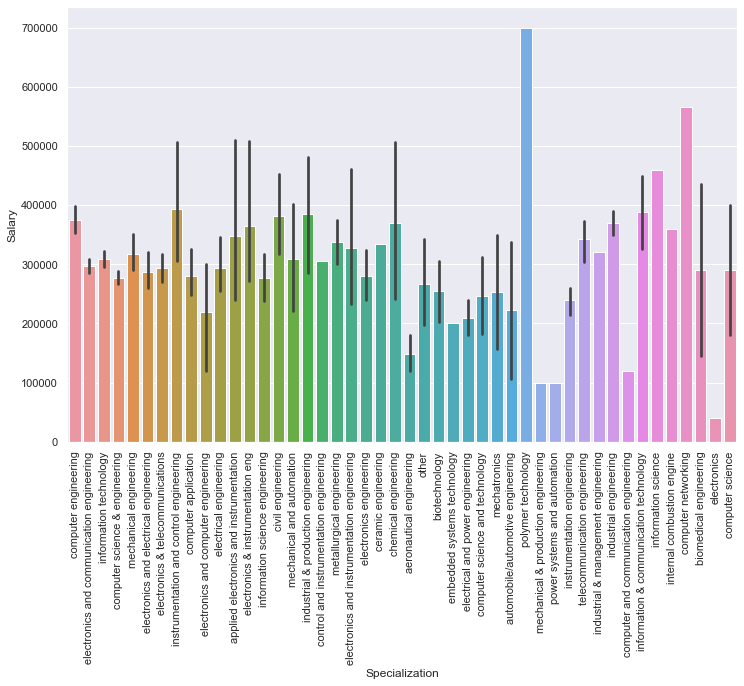

In [41]:
sns.barplot(df['Specialization'],df['Salary'])
plt.xticks(rotation=90)
plt.show()



## we can see that polymer technology has higher salary in the specializaton
## therefore polymer technology is a part of Mtech/M.E  Degree

In [42]:
df.head(4)

ID   Salary        DOJ        DOL Designation    JobCity Gender  \
0  203097   420000 2012-06-01 2015-12-31    Engineer  Bangalore      f   
1  579905   500000 2013-09-01 2015-12-31     Manager     Indore      m   
2  810601   325000 2014-06-01 2015-12-31    Engineer    Chennai      f   
3  267447  1100000 2011-07-01 2015-12-31    Engineer    Gurgaon      m   

         DOB  10percentage                         10board  12graduation  \
0 1990-02-19          84.3  board ofsecondary education,ap          2007   
1 1989-10-04          85.4                            cbse          2007   
2 1992-08-03          85.0                            cbse          2010   
3 1989-12-05          85.6                            cbse          2007   

   12percentage                             12board  CollegeID  CollegeTier  \
0          95.8  board of intermediate education,ap       1141            2   
1          85.0                                cbse       5807            2   
2          68.2                                cbse         64            2   
3          83.6                                cbse       6920            1   

        Degree                             Specialization  collegeGPA  \
0  B.Tech/B.E.                       computer engineering       78.00   
1  B.Tech/B.E.  electronics and communication engineering       70.06   
2  B.Tech/B.E.                     information technology       70.00   
3  B.Tech/B.E.                       computer engineering       74.64   

   CollegeCityID  CollegeCityTier    CollegeState  GraduationYear  English  \
0           1141                0  Andhra Pradesh            2011      515   
1           5807                0  Madhya Pradesh            2012      695   
2             64                0   Uttar Pradesh            2014      615   
3           6920                1           Delhi            2011      635   

   Logical  Quant    Domain  ComputerProgramming  ElectronicsAndSemicon  \
0      585    525  0.635979                  445                     -1   
1      610    780  0.960603                   -1                    466   
2      545    370  0.450877                  395                     -1   
3      585    625  0.974396                  615                     -1   

   ComputerScience  MechanicalEngg  ElectricalEngg  TelecomEngg  CivilEngg  \
0               -1              -1              -1           -1         -1   
1               -1              -1              -1           -1         -1   
2               -1              -1              -1           -1         -1   
3               -1              -1              -1           -1         -1   

   conscientiousness  agreeableness  extraversion  nueroticism  \
0             0.9737         0.8128        0.5269       1.3549   
1            -0.7335         0.3789        1.2396      -0.1076   
2             0.2718         1.7109        0.1637      -0.8682   
3             0.0464         0.3448       -0.3440      -0.4078   

   openess_to_experience  Experience  10percentage_bins  12percentage_bins  \
0                -0.4455         3.6                  1                  1   
1                 0.8637         2.3                  1                  1   
2                 0.6721         1.6                  1                  2   
3                -0.9194         4.5                  1                  1   

       Today  Age  
0 2015-12-31   25  
1 2015-12-31   26  
2 2015-12-31   23  
3 2015-12-31   26

In [43]:
df['collegeGPA_bins']=df['collegeGPA'].apply(Perc)

##  We classified the percentage under the universal divison categories so:
# 4- denotes percentage less than 50 i.e. Third Divison.
# 3- denotes percentage >50 and <=65 i.e. Second Divison.
# 2- denotes percentage >65 and <=80 i.e. First Division.
# 1- denotes percentage >80 i.e. Distinction.


In [44]:
df.head()

ID   Salary        DOJ        DOL Designation    JobCity Gender  \
0  203097   420000 2012-06-01 2015-12-31    Engineer  Bangalore      f   
1  579905   500000 2013-09-01 2015-12-31     Manager     Indore      m   
2  810601   325000 2014-06-01 2015-12-31    Engineer    Chennai      f   
3  267447  1100000 2011-07-01 2015-12-31    Engineer    Gurgaon      m   
4  343523   200000 2014-03-01 2015-03-01     Trainee    Manesar      m   

         DOB  10percentage                         10board  12graduation  \
0 1990-02-19          84.3  board ofsecondary education,ap          2007   
1 1989-10-04          85.4                            cbse          2007   
2 1992-08-03          85.0                            cbse          2010   
3 1989-12-05          85.6                            cbse          2007   
4 1991-02-27          78.0                            cbse          2008   

   12percentage                             12board  CollegeID  CollegeTier  \
0          95.8  board of intermediate education,ap       1141            2   
1          85.0                                cbse       5807            2   
2          68.2                                cbse         64            2   
3          83.6                                cbse       6920            1   
4          76.8                                cbse      11368            2   

        Degree                             Specialization  collegeGPA  \
0  B.Tech/B.E.                       computer engineering       78.00   
1  B.Tech/B.E.  electronics and communication engineering       70.06   
2  B.Tech/B.E.                     information technology       70.00   
3  B.Tech/B.E.                       computer engineering       74.64   
4  B.Tech/B.E.  electronics and communication engineering       73.90   

   CollegeCityID  CollegeCityTier    CollegeState  GraduationYear  English  \
0           1141                0  Andhra Pradesh            2011      515   
1           5807                0  Madhya Pradesh            2012      695   
2             64                0   Uttar Pradesh            2014      615   
3           6920                1           Delhi            2011      635   
4          11368                0   Uttar Pradesh            2012      545   

   Logical  Quant    Domain  ComputerProgramming  ElectronicsAndSemicon  \
0      585    525  0.635979                  445                     -1   
1      610    780  0.960603                   -1                    466   
2      545    370  0.450877                  395                     -1   
3      585    625  0.974396                  615                     -1   
4      625    465  0.124502                   -1                    233   

   ComputerScience  MechanicalEngg  ElectricalEngg  TelecomEngg  CivilEngg  \
0               -1              -1              -1           -1         -1   
1               -1              -1              -1           -1         -1   
2               -1              -1              -1           -1         -1   
3               -1              -1              -1           -1         -1   
4               -1              -1              -1           -1         -1   

   conscientiousness  agreeableness  extraversion  nueroticism  \
0             0.9737         0.8128        0.5269      1.35490   
1            -0.7335         0.3789        1.2396     -0.10760   
2             0.2718         1.7109        0.1637     -0.86820   
3             0.0464         0.3448       -0.3440     -0.40780   
4            -0.8810        -0.2793       -1.0697      0.09163   

   openess_to_experience  Experience  10percentage_bins  12percentage_bins  \
0                -0.4455         3.6                  1                  1   
1                 0.8637         2.3                  1                  1   
2                 0.6721         1.6                  1                  2   
3                -0.9194         4.5                  1                  1   
4              

In [45]:
df['CollegeCityTier'].value_counts()

0    2797
1    1201
Name: CollegeCityTier, dtype: int64

<AxesSubplot:xlabel='CollegeCityTier', ylabel='Salary'>

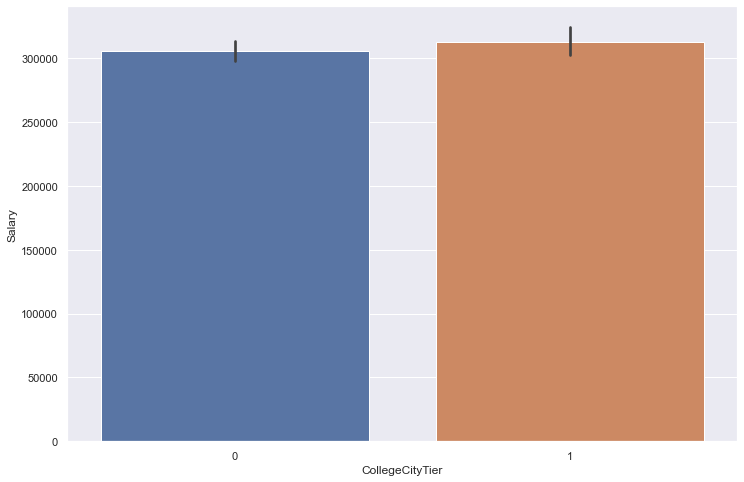

In [46]:
sns.barplot(df['CollegeCityTier'],df['Salary'])
## there are two city tiers and tier  1 have higher salary

In [47]:
## a

In [48]:
df.head()

ID   Salary        DOJ        DOL Designation    JobCity Gender  \
0  203097   420000 2012-06-01 2015-12-31    Engineer  Bangalore      f   
1  579905   500000 2013-09-01 2015-12-31     Manager     Indore      m   
2  810601   325000 2014-06-01 2015-12-31    Engineer    Chennai      f   
3  267447  1100000 2011-07-01 2015-12-31    Engineer    Gurgaon      m   
4  343523   200000 2014-03-01 2015-03-01     Trainee    Manesar      m   

         DOB  10percentage                         10board  12graduation  \
0 1990-02-19          84.3  board ofsecondary education,ap          2007   
1 1989-10-04          85.4                            cbse          2007   
2 1992-08-03          85.0                            cbse          2010   
3 1989-12-05          85.6                            cbse          2007   
4 1991-02-27          78.0                            cbse          2008   

   12percentage                             12board  CollegeID  CollegeTier  \
0          95.8  board of intermediate education,ap       1141            2   
1          85.0                                cbse       5807            2   
2          68.2                                cbse         64            2   
3          83.6                                cbse       6920            1   
4          76.8                                cbse      11368            2   

        Degree                             Specialization  collegeGPA  \
0  B.Tech/B.E.                       computer engineering       78.00   
1  B.Tech/B.E.  electronics and communication engineering       70.06   
2  B.Tech/B.E.                     information technology       70.00   
3  B.Tech/B.E.                       computer engineering       74.64   
4  B.Tech/B.E.  electronics and communication engineering       73.90   

   CollegeCityID  CollegeCityTier    CollegeState  GraduationYear  English  \
0           1141                0  Andhra Pradesh            2011      515   
1           5807                0  Madhya Pradesh            2012      695   
2             64                0   Uttar Pradesh            2014      615   
3           6920                1           Delhi            2011      635   
4          11368                0   Uttar Pradesh            2012      545   

   Logical  Quant    Domain  ComputerProgramming  ElectronicsAndSemicon  \
0      585    525  0.635979                  445                     -1   
1      610    780  0.960603                   -1                    466   
2      545    370  0.450877                  395                     -1   
3      585    625  0.974396                  615                     -1   
4      625    465  0.124502                   -1                    233   

   ComputerScience  MechanicalEngg  ElectricalEngg  TelecomEngg  CivilEngg  \
0               -1              -1              -1           -1         -1   
1               -1              -1              -1           -1         -1   
2               -1              -1              -1           -1         -1   
3               -1              -1              -1           -1         -1   
4               -1              -1              -1           -1         -1   

   conscientiousness  agreeableness  extraversion  nueroticism  \
0             0.9737         0.8128        0.5269      1.35490   
1            -0.7335         0.3789        1.2396     -0.10760   
2             0.2718         1.7109        0.1637     -0.86820   
3             0.0464         0.3448       -0.3440     -0.40780   
4            -0.8810        -0.2793       -1.0697      0.09163   

   openess_to_experience  Experience  10percentage_bins  12percentage_bins  \
0                -0.4455         3.6                  1                  1   
1                 0.8637         2.3                  1                  1   
2                 0.6721         1.6                  1                  2   
3                -0.9194         4.5                  1                  1   
4              

In [49]:
df[df['JobCity']==-1]
## there is bogus value (-1) in Jobcity varibale then first we replace it with nan 

ID  Salary        DOJ        DOL Designation JobCity Gender  \
15     536517  350000 2013-08-01 2015-12-31    Engineer      -1      f   
21     339689  200000 2012-08-01 2013-12-01    Engineer      -1      f   
39     533417  200000 2013-01-01 2013-06-01     Trainee      -1      m   
77     754392  120000 2014-07-01 2015-12-31    Engineer      -1      m   
79    1089852  100000 2013-08-01 2014-05-01   Developer      -1      f   
...       ...     ...        ...        ...         ...     ...    ...   
3937   385546  205000 2012-10-01 2014-02-01    Engineer      -1      m   
3942  1067015  280000 2013-07-01 2015-12-31    Engineer      -1      m   
3954   531726  310000 2014-04-01 2015-04-01     Analyst      -1      f   
3973   755067  335000 2013-08-01 2015-12-31     Analyst      -1      m   
3974   641821  180000 2013-06-01 2014-07-01    Engineer      -1      m   

            DOB  10percentage                           10board  12graduation  \
15   1990-01-17         69.54                              icse          2008   
21   1991-08-20         75.67                                up          2007   
39   1991-02-28         88.00  kerala state technical education          2008   
77   1992-02-18         76.00                       state board          2009   
79   1992-05-17         86.00                       state board          2009   
...         ...           ...                               ...           ...   
3937 1991-01-13         84.80                              cbse          2008   
3942 1990-03-17         78.00                       state board          2009   
3954 1992-11-15         88.40                               ssc          2009   
3973 1990-05-20         66.85                       state board          2008   
3974 1991-06-09         70.80                              cbse          2008   

      12percentage                 12board  CollegeID  CollegeTier  \
15           64.43                     isc       4501            2   
21           74.40                      up      11368            2   
39           89.66  kerala state hse board        867            2   
77           72.00             state board       8888            2   
79           95.00             state board       4726            2   
...            ...                     ...        ...          ...   
3937         81.40                    cbse        100            2   
3942         91.00             state board      11183            2   
3954         92.90   board of intermediate        492            2   
3973         59.11             state board       1906            2   
3974         65.20                    cbse       1622            2   

           Degree                               Specialization  collegeGPA  \
15    B.Tech/B.E.                       information technology       63.00   
21    B.Tech/B.E.                       information technology       74.01   
39    B.Tech/B.E.    electronics and communication engineering       76.40   
77    B.Tech/B.E.               computer science & engineering       63.20   
79    B.Tech/B.E.    electronics and communication engineering       78.60   
...           ...                                          ...         ...   
3937  B.Tech/B.E.    electronics and communication engineering       83.50   
3942  B.Tech/B.E.    electronics and communication engineering       64.62   
3954  B.Tech/B.E.    electronics and communication engineering       69.37   
3973  B.Tech/B.E.                       information technology       82.10   
3974  B.Tech/B.E.  electronics and instrumentation engineering       72.50   

      CollegeCityID  CollegeCityTier    CollegeState  GraduationYear  English  \
15             4501                0   Uttar Pradesh            2012      485   
21            11368                0   Uttar Pradesh            2012      385   
39              867                0          Kerala            2012      510   
77             8888                0      Tamil

In [50]:
df['JobCity'].unique()

array(['Bangalore', 'Indore', 'Chennai', 'Gurgaon', 'Manesar',
       'Hyderabad', 'Banglore', 'Noida', 'Kolkata', 'Pune', -1, 'mohali',
       'Jhansi', 'Delhi', 'Hyderabad ', 'Bangalore ', 'noida', 'delhi',
       'Bhubaneswar', 'Navi Mumbai', 'Mumbai', 'New Delhi', 'Mangalore',
       'Rewari', 'Gaziabaad', 'Bhiwadi', 'Mysore', 'Rajkot',
       'Greater Noida', 'Jaipur', 'noida ', 'HYDERABAD', 'mysore',
       'THANE', 'Maharajganj', 'Thiruvananthapuram', 'Punchkula',
       'Bhubaneshwar', 'Pune ', 'coimbatore', 'Dhanbad', 'Lucknow',
       'Trivandrum', 'kolkata', 'mumbai', 'Gandhi Nagar', 'Una',
       'Daman and Diu', 'chennai', 'GURGOAN', 'vsakhapttnam', 'pune',
       'Nagpur', 'Bhagalpur', 'new delhi - jaisalmer', 'Coimbatore',
       'Ahmedabad', 'Kochi/Cochin', 'Bankura', 'Bengaluru', 'Mysore ',
       'Kanpur ', 'jaipur', 'Gurgaon ', 'bangalore', 'CHENNAI',
       'Vijayawada', 'Kochi', 'Beawar', 'Alwar', 'NOIDA', 'Greater noida',
       'Siliguri ', 'raipur', 'gurgaon', '

In [51]:
df.JobCity.value_counts()

Bangalore           627
-1                  461
Noida               368
Hyderabad           335
Pune                290
                   ... 
Asifabadbanglore      1
pondi                 1
Greater NOIDA         1
Bahadurgarh           1
PATNA                 1
Name: JobCity, Length: 339, dtype: int64

In [52]:
df['JobCity']=df['JobCity'].str.capitalize()

In [53]:
df['JobCity'].value_counts()

Bangalore           647
Noida               386
Hyderabad           357
Pune                320
Chennai             304
                   ... 
Baripada              1
Gorakhpur             1
Jowai                 1
Bhubaneswar           1
Chennai & mumbai      1
Name: JobCity, Length: 261, dtype: int64

In [54]:
df['JobCity']=df['JobCity'].str.strip()

In [55]:
df['JobCity'].nunique()

236

In [56]:
df['JobCity'].unique()

array(['Bangalore', 'Indore', 'Chennai', 'Gurgaon', 'Manesar',
       'Hyderabad', 'Banglore', 'Noida', 'Kolkata', 'Pune', nan, 'Mohali',
       'Jhansi', 'Delhi', 'Bhubaneswar', 'Navi mumbai', 'Mumbai',
       'New delhi', 'Mangalore', 'Rewari', 'Gaziabaad', 'Bhiwadi',
       'Mysore', 'Rajkot', 'Greater noida', 'Jaipur', 'Thane',
       'Maharajganj', 'Thiruvananthapuram', 'Punchkula', 'Bhubaneshwar',
       'Coimbatore', 'Dhanbad', 'Lucknow', 'Trivandrum', 'Gandhi nagar',
       'Una', 'Daman and diu', 'Gurgoan', 'Vsakhapttnam', 'Nagpur',
       'Bhagalpur', 'New delhi - jaisalmer', 'Ahmedabad', 'Kochi/cochin',
       'Bankura', 'Bengaluru', 'Kanpur', 'Vijayawada', 'Kochi', 'Beawar',
       'Alwar', 'Siliguri', 'Raipur', 'Bhopal', 'Faridabad', 'Jodhpur',
       'Udaipur', 'Muzaffarpur', 'Kolkata`', 'Bulandshahar', 'Haridwar',
       'Raigarh', 'Visakhapatnam', 'Jabalpur', 'Unnao', 'Aurangabad',
       'Belgaum', 'Dehradun', 'Rudrapur', 'Jamshedpur', 'Vizag', 'Nouda',
       'Dharams

In [57]:
df['JobCity'].replace({'Bangalore':'Banglore','Bengaluru':'Banglore','bangalore':'Banglore','Banaglore':'Banglore',
                       'Asifabadbanglore':'Banglore'},inplace=True)

In [58]:
df['JobCity'].value_counts()

Banglore            686
Noida               389
Hyderabad           368
Pune                326
Chennai             312
                   ... 
Gaziabaad             1
Baripada              1
Gorakhpur             1
Jowai                 1
Chennai & mumbai      1
Name: JobCity, Length: 231, dtype: int64

In [59]:
df[df['JobCity']=='Navi mumbai , hyderabad']

ID  Salary        DOJ        DOL Designation  \
2450  1089038  345000 2014-02-01 2015-12-31    Engineer   

                      JobCity Gender        DOB  10percentage      10board  \
2450  Navi mumbai , hyderabad      m 1992-05-17          87.0  state board   

      12graduation  12percentage      12board  CollegeID  CollegeTier  \
2450          2009          95.0  state board       4325            2   

           Degree                             Specialization  collegeGPA  \
2450  B.Tech/B.E.  electronics and communication engineering       72.38   

      CollegeCityID  CollegeCityTier    CollegeState  GraduationYear  English  \
2450           4325                0  Andhra Pradesh            2013      525   

      Logical  Quant    Domain  ComputerProgramming  ElectronicsAndSemicon  \
2450      625    690  0.976293                  545                    484   

      ComputerScience  MechanicalEngg  ElectricalEngg  TelecomEngg  CivilEngg  \
2450               -1              -1              -1           -1         -1   

      conscientiousness  agreeableness  extraversion  nueroticism  \
2450            -0.4463        -0.4536       -0.9122      -0.8682   

      openess_to_experience  Experience  10percentage_bins  12percentage_bins  \
2450                -0.6692         1.9                  1                  1   

          Today  Age  collegeGPA_bins  
2450 2015-12-31   23                2

In [60]:
df['JobCity'].replace({'Greater noida':'NCR','Nouda':'NCR','Gurgaon':'NCR','Delhi':'NCR','Manesar':'NCR',
                       'New delhi':'NCR','Gurgoan':'NCR','Faridabad':'NCR','Ghaziabad':'NCR','Muzaffarnagar':'NCR',
                      'Indirapuram, ghaziabad':'NCR','Meerut':'NCR','Ncr':'NCR','Gajiabaad':'NCR','A-64,sec-64,noida':'NCR',
                       'delhi':'NCR','Bahadurgarh':'NCR','Delhi/ncr':'NCR','Guragaon':'NCR','New dehli':'NCR'},inplace=True)

In [61]:
df['JobCity'].replace('Noida','NCR',inplace=True)

In [62]:
df['JobCity'].replace('Gaziabaad','NCR',inplace=True)

In [63]:
df['JobCity'].replace('Bulandshahar','NCR',inplace=True)

In [64]:
df['JobCity'].replace('Banagalore','Banglore',inplace=True)

In [65]:
df['JobCity'].value_counts().head(10)

NCR          916
Banglore     687
Hyderabad    368
Pune         326
Chennai      312
Kolkata      119
Mumbai       116
Jaipur        53
Lucknow       41
Mysore        40
Name: JobCity, dtype: int64

In [66]:
df['JobCity'].unique()

array(['Banglore', 'Indore', 'Chennai', 'NCR', 'Hyderabad', 'Kolkata',
       'Pune', nan, 'Mohali', 'Jhansi', 'Bhubaneswar', 'Navi mumbai',
       'Mumbai', 'Mangalore', 'Rewari', 'Bhiwadi', 'Mysore', 'Rajkot',
       'Jaipur', 'Thane', 'Maharajganj', 'Thiruvananthapuram',
       'Punchkula', 'Bhubaneshwar', 'Coimbatore', 'Dhanbad', 'Lucknow',
       'Trivandrum', 'Gandhi nagar', 'Una', 'Daman and diu',
       'Vsakhapttnam', 'Nagpur', 'Bhagalpur', 'New delhi - jaisalmer',
       'Ahmedabad', 'Kochi/cochin', 'Bankura', 'Kanpur', 'Vijayawada',
       'Kochi', 'Beawar', 'Alwar', 'Siliguri', 'Raipur', 'Bhopal',
       'Jodhpur', 'Udaipur', 'Muzaffarpur', 'Kolkata`', 'Haridwar',
       'Raigarh', 'Visakhapatnam', 'Jabalpur', 'Unnao', 'Aurangabad',
       'Belgaum', 'Dehradun', 'Rudrapur', 'Jamshedpur', 'Vizag',
       'Dharamshala', 'Hissar', 'Ranchi', 'Madurai', 'Gurga',
       'Chandigarh', 'Australia', 'chennai', 'Cheyyar', 'Sonepat',
       'Pantnagar', 'Jagdalpur', 'Angul', 'Baroda',

In [67]:
df['JobCity'].replace({'Hderabad':'Hyderabad','Hyderabad(bhadurpally)':'Hyderabad'},inplace=True)

In [68]:
df['JobCity'].value_counts().head(10)

NCR          916
Banglore     687
Hyderabad    370
Pune         326
Chennai      312
Kolkata      119
Mumbai       116
Jaipur        53
Lucknow       41
Mysore        40
Name: JobCity, dtype: int64

In [69]:
df['JobCity'].unique()

array(['Banglore', 'Indore', 'Chennai', 'NCR', 'Hyderabad', 'Kolkata',
       'Pune', nan, 'Mohali', 'Jhansi', 'Bhubaneswar', 'Navi mumbai',
       'Mumbai', 'Mangalore', 'Rewari', 'Bhiwadi', 'Mysore', 'Rajkot',
       'Jaipur', 'Thane', 'Maharajganj', 'Thiruvananthapuram',
       'Punchkula', 'Bhubaneshwar', 'Coimbatore', 'Dhanbad', 'Lucknow',
       'Trivandrum', 'Gandhi nagar', 'Una', 'Daman and diu',
       'Vsakhapttnam', 'Nagpur', 'Bhagalpur', 'New delhi - jaisalmer',
       'Ahmedabad', 'Kochi/cochin', 'Bankura', 'Kanpur', 'Vijayawada',
       'Kochi', 'Beawar', 'Alwar', 'Siliguri', 'Raipur', 'Bhopal',
       'Jodhpur', 'Udaipur', 'Muzaffarpur', 'Kolkata`', 'Haridwar',
       'Raigarh', 'Visakhapatnam', 'Jabalpur', 'Unnao', 'Aurangabad',
       'Belgaum', 'Dehradun', 'Rudrapur', 'Jamshedpur', 'Vizag',
       'Dharamshala', 'Hissar', 'Ranchi', 'Madurai', 'Gurga',
       'Chandigarh', 'Australia', 'chennai', 'Cheyyar', 'Sonepat',
       'Pantnagar', 'Jagdalpur', 'Angul', 'Baroda',

In [70]:
df['JobCity'].replace({'Punr':'Pune','pune':'Pune','Shahibabad':'NCR'},inplace=True)

In [71]:
df['JobCity'].value_counts().head(10)

NCR          917
Banglore     687
Hyderabad    370
Pune         328
Chennai      312
Kolkata      119
Mumbai       116
Jaipur        53
Lucknow       41
Mysore        40
Name: JobCity, dtype: int64

In [72]:
df['JobCity'].replace({'chennai':'Chennai'},inplace=True)

In [73]:
df['JobCity'].replace({'Kolkata`':'Kolkata','Dharuhera':'NCR'},inplace=True)

In [74]:
df['JobCity'].replace({'Navi mumbai':'Mumbai','Thane':'Mumbai'},inplace=True)

In [75]:
df['JobCity'].value_counts().head(10)

NCR          918
Banglore     687
Hyderabad    370
Pune         328
Chennai      313
Mumbai       157
Kolkata      120
Jaipur        53
Lucknow       41
Mysore        40
Name: JobCity, dtype: int64

In [76]:
df[df['JobCity'].isnull()]

ID  Salary        DOJ        DOL Designation JobCity Gender  \
15     536517  350000 2013-08-01 2015-12-31    Engineer     NaN      f   
21     339689  200000 2012-08-01 2013-12-01    Engineer     NaN      f   
39     533417  200000 2013-01-01 2013-06-01     Trainee     NaN      m   
77     754392  120000 2014-07-01 2015-12-31    Engineer     NaN      m   
79    1089852  100000 2013-08-01 2014-05-01   Developer     NaN      f   
...       ...     ...        ...        ...         ...     ...    ...   
3937   385546  205000 2012-10-01 2014-02-01    Engineer     NaN      m   
3942  1067015  280000 2013-07-01 2015-12-31    Engineer     NaN      m   
3954   531726  310000 2014-04-01 2015-04-01     Analyst     NaN      f   
3973   755067  335000 2013-08-01 2015-12-31     Analyst     NaN      m   
3974   641821  180000 2013-06-01 2014-07-01    Engineer     NaN      m   

            DOB  10percentage                           10board  12graduation  \
15   1990-01-17         69.54                              icse          2008   
21   1991-08-20         75.67                                up          2007   
39   1991-02-28         88.00  kerala state technical education          2008   
77   1992-02-18         76.00                       state board          2009   
79   1992-05-17         86.00                       state board          2009   
...         ...           ...                               ...           ...   
3937 1991-01-13         84.80                              cbse          2008   
3942 1990-03-17         78.00                       state board          2009   
3954 1992-11-15         88.40                               ssc          2009   
3973 1990-05-20         66.85                       state board          2008   
3974 1991-06-09         70.80                              cbse          2008   

      12percentage                 12board  CollegeID  CollegeTier  \
15           64.43                     isc       4501            2   
21           74.40                      up      11368            2   
39           89.66  kerala state hse board        867            2   
77           72.00             state board       8888            2   
79           95.00             state board       4726            2   
...            ...                     ...        ...          ...   
3937         81.40                    cbse        100            2   
3942         91.00             state board      11183            2   
3954         92.90   board of intermediate        492            2   
3973         59.11             state board       1906            2   
3974         65.20                    cbse       1622            2   

           Degree                               Specialization  collegeGPA  \
15    B.Tech/B.E.                       information technology       63.00   
21    B.Tech/B.E.                       information technology       74.01   
39    B.Tech/B.E.    electronics and communication engineering       76.40   
77    B.Tech/B.E.               computer science & engineering       63.20   
79    B.Tech/B.E.    electronics and communication engineering       78.60   
...           ...                                          ...         ...   
3937  B.Tech/B.E.    electronics and communication engineering       83.50   
3942  B.Tech/B.E.    electronics and communication engineering       64.62   
3954  B.Tech/B.E.    electronics and communication engineering       69.37   
3973  B.Tech/B.E.                       information technology       82.10   
3974  B.Tech/B.E.  electronics and instrumentation engineering       72.50   

      CollegeCityID  CollegeCityTier    CollegeState  GraduationYear  English  \
15             4501                0   Uttar Pradesh            2012      485   
21            11368                0   Uttar Pradesh            2012      385   
39              867                0          Kerala            2012      510   
77             8888                0      Tamil

# sir se puchna hai upar wala jobcity me nan kisse treat krni hai

In [77]:
df.loc[df.JobCity.isnull()]

ID  Salary        DOJ        DOL Designation JobCity Gender  \
15     536517  350000 2013-08-01 2015-12-31    Engineer     NaN      f   
21     339689  200000 2012-08-01 2013-12-01    Engineer     NaN      f   
39     533417  200000 2013-01-01 2013-06-01     Trainee     NaN      m   
77     754392  120000 2014-07-01 2015-12-31    Engineer     NaN      m   
79    1089852  100000 2013-08-01 2014-05-01   Developer     NaN      f   
...       ...     ...        ...        ...         ...     ...    ...   
3937   385546  205000 2012-10-01 2014-02-01    Engineer     NaN      m   
3942  1067015  280000 2013-07-01 2015-12-31    Engineer     NaN      m   
3954   531726  310000 2014-04-01 2015-04-01     Analyst     NaN      f   
3973   755067  335000 2013-08-01 2015-12-31     Analyst     NaN      m   
3974   641821  180000 2013-06-01 2014-07-01    Engineer     NaN      m   

            DOB  10percentage                           10board  12graduation  \
15   1990-01-17         69.54                              icse          2008   
21   1991-08-20         75.67                                up          2007   
39   1991-02-28         88.00  kerala state technical education          2008   
77   1992-02-18         76.00                       state board          2009   
79   1992-05-17         86.00                       state board          2009   
...         ...           ...                               ...           ...   
3937 1991-01-13         84.80                              cbse          2008   
3942 1990-03-17         78.00                       state board          2009   
3954 1992-11-15         88.40                               ssc          2009   
3973 1990-05-20         66.85                       state board          2008   
3974 1991-06-09         70.80                              cbse          2008   

      12percentage                 12board  CollegeID  CollegeTier  \
15           64.43                     isc       4501            2   
21           74.40                      up      11368            2   
39           89.66  kerala state hse board        867            2   
77           72.00             state board       8888            2   
79           95.00             state board       4726            2   
...            ...                     ...        ...          ...   
3937         81.40                    cbse        100            2   
3942         91.00             state board      11183            2   
3954         92.90   board of intermediate        492            2   
3973         59.11             state board       1906            2   
3974         65.20                    cbse       1622            2   

           Degree                               Specialization  collegeGPA  \
15    B.Tech/B.E.                       information technology       63.00   
21    B.Tech/B.E.                       information technology       74.01   
39    B.Tech/B.E.    electronics and communication engineering       76.40   
77    B.Tech/B.E.               computer science & engineering       63.20   
79    B.Tech/B.E.    electronics and communication engineering       78.60   
...           ...                                          ...         ...   
3937  B.Tech/B.E.    electronics and communication engineering       83.50   
3942  B.Tech/B.E.    electronics and communication engineering       64.62   
3954  B.Tech/B.E.    electronics and communication engineering       69.37   
3973  B.Tech/B.E.                       information technology       82.10   
3974  B.Tech/B.E.  electronics and instrumentation engineering       72.50   

      CollegeCityID  CollegeCityTier    CollegeState  GraduationYear  English  \
15             4501                0   Uttar Pradesh            2012      485   
21            11368                0   Uttar Pradesh            2012      385   
39              867                0          Kerala            2012      510   
77             8888                0      Tamil

In [78]:
df['JobCity'].fillna('Missing',inplace=True)

In [79]:
city=df['JobCity'].value_counts().head(8)
city

NCR          918
Banglore     687
Missing      461
Hyderabad    370
Pune         328
Chennai      313
Mumbai       157
Kolkata      120
Name: JobCity, dtype: int64

In [80]:
df.head()

ID   Salary        DOJ        DOL Designation   JobCity Gender  \
0  203097   420000 2012-06-01 2015-12-31    Engineer  Banglore      f   
1  579905   500000 2013-09-01 2015-12-31     Manager    Indore      m   
2  810601   325000 2014-06-01 2015-12-31    Engineer   Chennai      f   
3  267447  1100000 2011-07-01 2015-12-31    Engineer       NCR      m   
4  343523   200000 2014-03-01 2015-03-01     Trainee       NCR      m   

         DOB  10percentage                         10board  12graduation  \
0 1990-02-19          84.3  board ofsecondary education,ap          2007   
1 1989-10-04          85.4                            cbse          2007   
2 1992-08-03          85.0                            cbse          2010   
3 1989-12-05          85.6                            cbse          2007   
4 1991-02-27          78.0                            cbse          2008   

   12percentage                             12board  CollegeID  CollegeTier  \
0          95.8  board of intermediate education,ap       1141            2   
1          85.0                                cbse       5807            2   
2          68.2                                cbse         64            2   
3          83.6                                cbse       6920            1   
4          76.8                                cbse      11368            2   

        Degree                             Specialization  collegeGPA  \
0  B.Tech/B.E.                       computer engineering       78.00   
1  B.Tech/B.E.  electronics and communication engineering       70.06   
2  B.Tech/B.E.                     information technology       70.00   
3  B.Tech/B.E.                       computer engineering       74.64   
4  B.Tech/B.E.  electronics and communication engineering       73.90   

   CollegeCityID  CollegeCityTier    CollegeState  GraduationYear  English  \
0           1141                0  Andhra Pradesh            2011      515   
1           5807                0  Madhya Pradesh            2012      695   
2             64                0   Uttar Pradesh            2014      615   
3           6920                1           Delhi            2011      635   
4          11368                0   Uttar Pradesh            2012      545   

   Logical  Quant    Domain  ComputerProgramming  ElectronicsAndSemicon  \
0      585    525  0.635979                  445                     -1   
1      610    780  0.960603                   -1                    466   
2      545    370  0.450877                  395                     -1   
3      585    625  0.974396                  615                     -1   
4      625    465  0.124502                   -1                    233   

   ComputerScience  MechanicalEngg  ElectricalEngg  TelecomEngg  CivilEngg  \
0               -1              -1              -1           -1         -1   
1               -1              -1              -1           -1         -1   
2               -1              -1              -1           -1         -1   
3               -1              -1              -1           -1         -1   
4               -1              -1              -1           -1         -1   

   conscientiousness  agreeableness  extraversion  nueroticism  \
0             0.9737         0.8128        0.5269      1.35490   
1            -0.7335         0.3789        1.2396     -0.10760   
2             0.2718         1.7109        0.1637     -0.86820   
3             0.0464         0.3448       -0.3440     -0.40780   
4            -0.8810        -0.2793       -1.0697      0.09163   

   openess_to_experience  Experience  10percentage_bins  12percentage_bins  \
0                -0.4455         3.6                  1                  1   
1                 0.8637         2.3                  1                  1   
2                 0.6721         1.6                  1                  2   
3                -0.9194         4.5                  1                  1   
4                -0.1

In [81]:
city_name=city.index
city_name

Index(['NCR', 'Banglore', 'Missing', 'Hyderabad', 'Pune', 'Chennai', 'Mumbai',
       'Kolkata'],
      dtype='object')

In [82]:
def cityreplace(x):        
    if x in city_name:
        return x
    else:
        return 'Others'

In [83]:
df['JobCity'].apply(cityreplace).value_counts()

NCR          918
Banglore     687
Others       644
Missing      461
Hyderabad    370
Pune         328
Chennai      313
Mumbai       157
Kolkata      120
Name: JobCity, dtype: int64

In [84]:
df['JobCity']=df['JobCity'].apply(cityreplace)

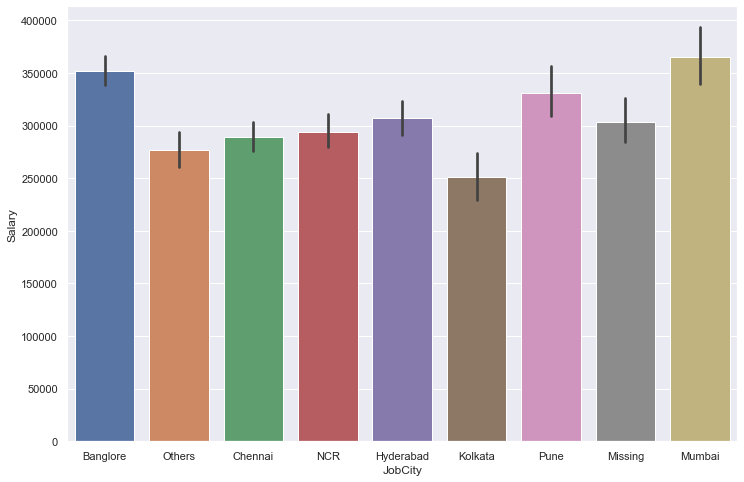

In [85]:
sns.barplot(df['JobCity'],df['Salary'])
plt.show()

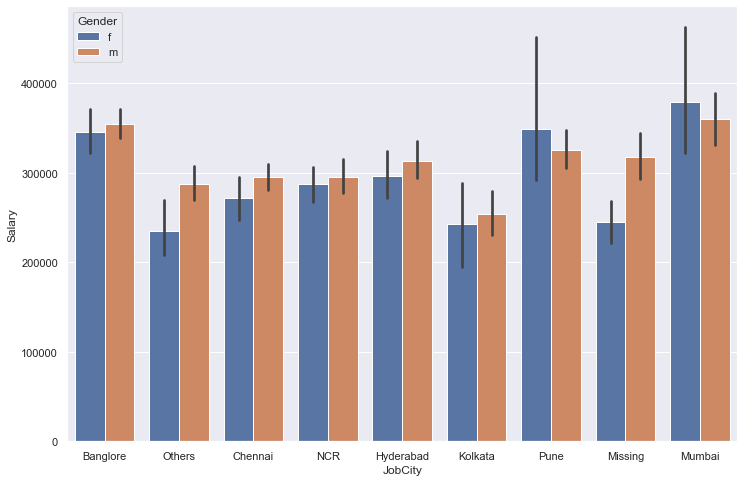

In [86]:
sns.barplot(df['JobCity'],df['Salary'],hue=df['Gender'])
plt.show()

In [87]:
df.head()

ID   Salary        DOJ        DOL Designation   JobCity Gender  \
0  203097   420000 2012-06-01 2015-12-31    Engineer  Banglore      f   
1  579905   500000 2013-09-01 2015-12-31     Manager    Others      m   
2  810601   325000 2014-06-01 2015-12-31    Engineer   Chennai      f   
3  267447  1100000 2011-07-01 2015-12-31    Engineer       NCR      m   
4  343523   200000 2014-03-01 2015-03-01     Trainee       NCR      m   

         DOB  10percentage                         10board  12graduation  \
0 1990-02-19          84.3  board ofsecondary education,ap          2007   
1 1989-10-04          85.4                            cbse          2007   
2 1992-08-03          85.0                            cbse          2010   
3 1989-12-05          85.6                            cbse          2007   
4 1991-02-27          78.0                            cbse          2008   

   12percentage                             12board  CollegeID  CollegeTier  \
0          95.8  board of intermediate education,ap       1141            2   
1          85.0                                cbse       5807            2   
2          68.2                                cbse         64            2   
3          83.6                                cbse       6920            1   
4          76.8                                cbse      11368            2   

        Degree                             Specialization  collegeGPA  \
0  B.Tech/B.E.                       computer engineering       78.00   
1  B.Tech/B.E.  electronics and communication engineering       70.06   
2  B.Tech/B.E.                     information technology       70.00   
3  B.Tech/B.E.                       computer engineering       74.64   
4  B.Tech/B.E.  electronics and communication engineering       73.90   

   CollegeCityID  CollegeCityTier    CollegeState  GraduationYear  English  \
0           1141                0  Andhra Pradesh            2011      515   
1           5807                0  Madhya Pradesh            2012      695   
2             64                0   Uttar Pradesh            2014      615   
3           6920                1           Delhi            2011      635   
4          11368                0   Uttar Pradesh            2012      545   

   Logical  Quant    Domain  ComputerProgramming  ElectronicsAndSemicon  \
0      585    525  0.635979                  445                     -1   
1      610    780  0.960603                   -1                    466   
2      545    370  0.450877                  395                     -1   
3      585    625  0.974396                  615                     -1   
4      625    465  0.124502                   -1                    233   

   ComputerScience  MechanicalEngg  ElectricalEngg  TelecomEngg  CivilEngg  \
0               -1              -1              -1           -1         -1   
1               -1              -1              -1           -1         -1   
2               -1              -1              -1           -1         -1   
3               -1              -1              -1           -1         -1   
4               -1              -1              -1           -1         -1   

   conscientiousness  agreeableness  extraversion  nueroticism  \
0             0.9737         0.8128        0.5269      1.35490   
1            -0.7335         0.3789        1.2396     -0.10760   
2             0.2718         1.7109        0.1637     -0.86820   
3             0.0464         0.3448       -0.3440     -0.40780   
4            -0.8810        -0.2793       -1.0697      0.09163   

   openess_to_experience  Experience  10percentage_bins  12percentage_bins  \
0                -0.4455         3.6                  1                  1   
1                 0.8637         2.3                  1                  1   
2                 0.6721         1.6                  1                  2   
3                -0.9194         4.5                  1                  1   
4                -0.1

In [88]:
df[df['Salary']>1000000]['Designation'].value_counts()

Engineer     15
Developer     7
others        6
Manager       4
Trainee       3
Analyst       1
Name: Designation, dtype: int64

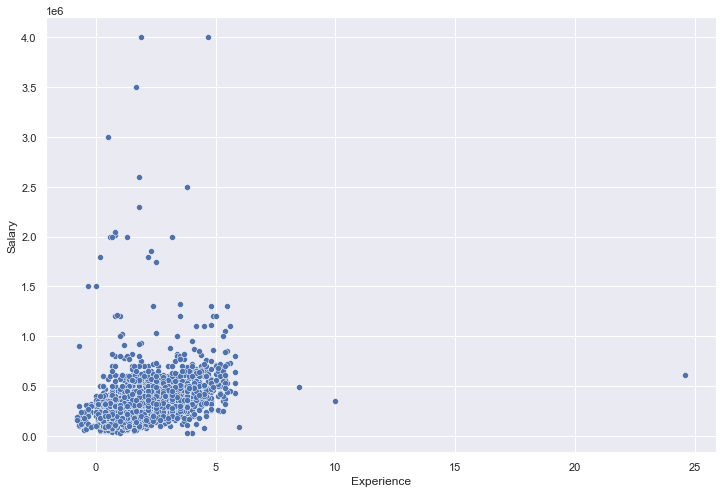

In [89]:
sns.scatterplot(df['Experience'],df['Salary'])
plt.show()

## 2 3 person have wrong experience according to their  age

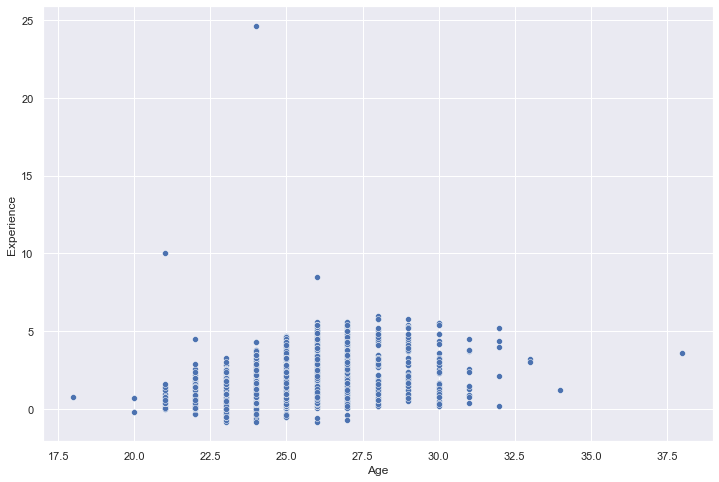

In [90]:
sns.scatterplot(df['Age'],df['Experience'])   ## 2 3 person have wrong experience according to their  age
plt.show()

In [91]:
ind=df[df['Experience']>9].index  ## index of those rows whose experience is invalid
ind

Int64Index([1189, 2853], dtype='int64')

Drop these indexes

In [92]:
df.drop([1189, 2853],axis=0,inplace=True)

In [93]:
## df.drop(ind)

In [94]:
df[df['Experience']>9]

Empty DataFrame
Columns: [ID, Salary, DOJ, DOL, Designation, JobCity, Gender, DOB, 10percentage, 10board, 12graduation, 12percentage, 12board, CollegeID, CollegeTier, Degree, Specialization, collegeGPA, CollegeCityID, CollegeCityTier, CollegeState, GraduationYear, English, Logical, Quant, Domain, ComputerProgramming, ElectronicsAndSemicon, ComputerScience, MechanicalEngg, ElectricalEngg, TelecomEngg, CivilEngg, conscientiousness, agreeableness, extraversion, nueroticism, openess_to_experience, Experience, 10percentage_bins, 12percentage_bins, Today, Age, collegeGPA_bins]
Index: []

In [95]:
df.head()

ID   Salary        DOJ        DOL Designation   JobCity Gender  \
0  203097   420000 2012-06-01 2015-12-31    Engineer  Banglore      f   
1  579905   500000 2013-09-01 2015-12-31     Manager    Others      m   
2  810601   325000 2014-06-01 2015-12-31    Engineer   Chennai      f   
3  267447  1100000 2011-07-01 2015-12-31    Engineer       NCR      m   
4  343523   200000 2014-03-01 2015-03-01     Trainee       NCR      m   

         DOB  10percentage                         10board  12graduation  \
0 1990-02-19          84.3  board ofsecondary education,ap          2007   
1 1989-10-04          85.4                            cbse          2007   
2 1992-08-03          85.0                            cbse          2010   
3 1989-12-05          85.6                            cbse          2007   
4 1991-02-27          78.0                            cbse          2008   

   12percentage                             12board  CollegeID  CollegeTier  \
0          95.8  board of intermediate education,ap       1141            2   
1          85.0                                cbse       5807            2   
2          68.2                                cbse         64            2   
3          83.6                                cbse       6920            1   
4          76.8                                cbse      11368            2   

        Degree                             Specialization  collegeGPA  \
0  B.Tech/B.E.                       computer engineering       78.00   
1  B.Tech/B.E.  electronics and communication engineering       70.06   
2  B.Tech/B.E.                     information technology       70.00   
3  B.Tech/B.E.                       computer engineering       74.64   
4  B.Tech/B.E.  electronics and communication engineering       73.90   

   CollegeCityID  CollegeCityTier    CollegeState  GraduationYear  English  \
0           1141                0  Andhra Pradesh            2011      515   
1           5807                0  Madhya Pradesh            2012      695   
2             64                0   Uttar Pradesh            2014      615   
3           6920                1           Delhi            2011      635   
4          11368                0   Uttar Pradesh            2012      545   

   Logical  Quant    Domain  ComputerProgramming  ElectronicsAndSemicon  \
0      585    525  0.635979                  445                     -1   
1      610    780  0.960603                   -1                    466   
2      545    370  0.450877                  395                     -1   
3      585    625  0.974396                  615                     -1   
4      625    465  0.124502                   -1                    233   

   ComputerScience  MechanicalEngg  ElectricalEngg  TelecomEngg  CivilEngg  \
0               -1              -1              -1           -1         -1   
1               -1              -1              -1           -1         -1   
2               -1              -1              -1           -1         -1   
3               -1              -1              -1           -1         -1   
4               -1              -1              -1           -1         -1   

   conscientiousness  agreeableness  extraversion  nueroticism  \
0             0.9737         0.8128        0.5269      1.35490   
1            -0.7335         0.3789        1.2396     -0.10760   
2             0.2718         1.7109        0.1637     -0.86820   
3             0.0464         0.3448       -0.3440     -0.40780   
4            -0.8810        -0.2793       -1.0697      0.09163   

   openess_to_experience  Experience  10percentage_bins  12percentage_bins  \
0                -0.4455         3.6                  1                  1   
1                 0.8637         2.3                  1                  1   
2                 0.6721         1.6                  1                  2   
3                -0.9194         4.5                  1                  1   
4                -0.1

In [96]:
plt.rcParams['figure.figsize']=[15,8]

In [97]:
df[df[df.iloc[:,26:33]!=-1].count(axis=1)>2]

ID  Salary        DOJ        DOL Designation    JobCity Gender  \
26      65096  345000 2011-01-01 2013-10-01    Engineer   Banglore      m   
28     918981  145000 2015-02-01 2015-04-01    Engineer        NCR      m   
59     536053  120000 2009-09-01 2013-04-01    Engineer   Banglore      m   
70     801755  320000 2014-03-01 2015-12-31    Engineer    Chennai      m   
78    1168608  325000 2014-12-01 2015-04-01    Engineer     Others      f   
...       ...     ...        ...        ...         ...        ...    ...   
3954   531726  310000 2014-04-01 2015-04-01     Analyst    Missing      f   
3956   606094  440000 2013-06-01 2015-04-01   Developer  Hyderabad      f   
3972  1044603  180000 2015-03-01 2015-05-01     Analyst        NCR      m   
3990   204287  480000 2012-02-01 2015-12-31    Engineer  Hyderabad      f   
3991   230873  630000 2011-07-01 2014-10-01     Analyst   Banglore      m   

            DOB  10percentage                                      10board  \
26   1988-02-05         90.88  karnataka state education examination board   
28   1994-01-20         84.00                                         cbse   
59   1977-10-30         72.00                                         cbse   
70   1992-12-12         89.00                                  state board   
78   1993-05-05         86.40                                         cbse   
...         ...           ...                                          ...   
3954 1992-11-15         88.40                                          ssc   
3956 1992-05-14         86.00                                  state board   
3972 1992-11-30         68.20                                         cbse   
3990 1989-09-04         88.00                                            0   
3991 1990-05-20         80.00                                  state board   

      12graduation  12percentage                           12board  CollegeID  \
26            2006          82.5  dept of pre-university education        124   
28            2011          68.0                              cbse         76   
59            1995          49.0                               puc        712   
70            2009          92.0                       state board      14382   
78            2010          78.2                              cbse       6982   
...            ...           ...                               ...        ...   
3954          2009          92.9             board of intermediate        492   
3956          2009          96.0                       state board       8820   
3972          2010          76.4                              cbse         13   
3990          2007          88.0                                 0       6327   
3991          2007          70.0                       state board        974   

      CollegeTier       Degree                             Specialization  \
26              2  B.Tech/B.E.                       computer engineering   
28              2  B.Tech/B.E.  electronics and communication engineering   
59              2  B.Tech/B.E.                       computer engineering   
70              2  B.Tech/B.E.                     electrical engineering   
78              2  B.Tech/B.E.  electronics and communication engineering   
...           ...          ...                                        ...   
3954            2  B.Tech/B.E.  electronics and communication engineering   
3956            2  B.Tech/B.E.  electronics and communication engineering   
3972            1  B.Tech/B.E.  electronics and communication engineering   
3990            2  B.Tech/B.E.  electronics and communication engineering   
3991            2  B.Tech/B.E.           electronics & telecommunications   

      collegeGPA  CollegeCityID  CollegeCityTier    CollegeState  \
26         66.15            124                0          Orissa   
28         72.00             76                0   Uttar Pradesh   
59         55.00            712                

In [98]:
df[df[df.iloc[:,26:33]!=-1].count(axis=1)>1]

ID  Salary        DOJ        DOL Designation    JobCity Gender  \
5     1027655  300000 2014-06-01 2015-12-31    Engineer  Hyderabad      m   
6      947847  300000 2014-08-01 2015-05-01    Engineer   Banglore      m   
8      552574  600000 2013-07-01 2015-12-31    Engineer        NCR      m   
9     1203363  230000 2014-07-01 2015-12-31    Engineer    Kolkata      m   
12     606655  270000 2013-12-01 2015-12-31    Engineer       Pune      m   
...       ...     ...        ...        ...         ...        ...    ...   
3989  1204604  300000 2014-09-01 2015-12-31    Engineer   Banglore      m   
3990   204287  480000 2012-02-01 2015-12-31    Engineer  Hyderabad      f   
3991   230873  630000 2011-07-01 2014-10-01     Analyst   Banglore      m   
3994   752781  100000 2013-07-01 2013-07-01      others  Hyderabad      f   
3996   947111  200000 2014-07-01 2015-01-01   Developer   Banglore      f   

            DOB  10percentage      10board  12graduation  12percentage  \
5    1992-07-02         89.92  state board          2010         87.00   
6    1993-02-01         86.08  state board          2010         67.50   
8    1991-09-17         90.00         cbse          2009         91.20   
9    1993-06-13         77.00         cbse          2010         72.20   
12   1990-11-21         83.60  state board          2008         69.83   
...         ...           ...          ...           ...           ...   
3989 1991-11-23         74.88  state board          2010         82.55   
3990 1989-09-04         88.00            0          2007         88.00   
3991 1990-05-20         80.00  state board          2007         70.00   
3994 1992-08-27         90.00  state board          2009         93.00   
3996 1992-03-20         78.72  state board          2010         69.88   

          12board  CollegeID  CollegeTier       Degree  \
5     state board       5086            2  B.Tech/B.E.   
6     state board        314            2  B.Tech/B.E.   
8            cbse         13            1  B.Tech/B.E.   
9            cbse       8640            2  B.Tech/B.E.   
12    state board       2665            2  B.Tech/B.E.   
...           ...        ...          ...          ...   
3989  state board       3572            2  B.Tech/B.E.   
3990            0       6327            2  B.Tech/B.E.   
3991  state board        974            2  B.Tech/B.E.   
3994  state board       4883            2  B.Tech/B.E.   
3996  state board        979            2  B.Tech/B.E.   

                                 Specialization  collegeGPA  CollegeCityID  \
5     electronics and communication engineering       76.32           5086   
6                computer science & engineering       72.98            314   
8        electronics and electrical engineering       85.03             13   
9     electronics and communication engineering       78.00           8640   
12             electronics & telecommunications       60.00           2665   
...                                         ...         ...            ...   
3989             computer science & engineering       80.00           3572   
3990  electronics and communication engineering       73.00           6327   
3991           electronics & telecommunications       66.00            974   
3994  electronics and communication engineering       77.30           4883   
3996             computer science & engineering       70.42            979   

      CollegeCityTier    CollegeState  GraduationYear  English  Logical  \
5                   0       Karnataka            2014      560      555   
6                   1       Karnataka            2014      590      435   
8                   1           Delhi            2013      615      670   
9                   1     West Bengal            2014      605      565   
12                  0     Maharashtra            2013      380      580   
...               ...             ...             ...      ...      ...   
3989                0       Karnataka 

In [99]:
df[(df.iloc[:,26:33]==-1).all(axis=1)]

ID  Salary        DOJ        DOL Designation    JobCity Gender  \
35     942679  350000 2014-03-01 2015-12-31     Manager     Others      f   
47     434621   95000 2012-10-01 2013-10-01   Developer        NCR      m   
73     982400  240000 2014-06-01 2015-04-01   Developer        NCR      m   
83     836060  145000 2014-06-01 2014-08-01      others     Others      m   
93    1274522  325000 2014-10-01 2015-12-01    Engineer        NCR      m   
...       ...     ...        ...        ...         ...        ...    ...   
3893  1269538  190000 2014-09-01 2015-05-01    Engineer    Kolkata      m   
3912   231229  730000 2013-07-01 2015-12-31      others       Pune      m   
3943  1082543  215000 2014-08-01 2015-04-01      others        NCR      m   
3969  1233826  330000 2015-06-01 2015-12-31    Engineer       Pune      m   
3978  1274658  320000 2013-08-01 2014-01-01    Engineer  Hyderabad      f   

            DOB  10percentage      10board  12graduation  12percentage  \
35   1990-09-15         85.00         cbse          2008         61.00   
47   1992-02-01         69.60         bseb          2008         71.40   
73   1992-07-06         75.00         cbse          2009         64.00   
83   1993-11-23         80.00  state board          2010         70.00   
93   1992-03-31         70.00         icse          2010         65.00   
...         ...           ...          ...           ...           ...   
3893 1990-11-22         79.06  state board          2008         76.00   
3912 1989-11-15         84.67            0          2006         86.46   
3943 1991-01-15         74.00         icse          2009         66.00   
3969 1993-01-24         76.00  state board          2009         89.80   
3978 1991-04-24         89.70         icse          2009         86.70   

          12board  CollegeID  CollegeTier       Degree  \
35           cbse        272            2  B.Tech/B.E.   
47           bseb       3054            2  B.Tech/B.E.   
73           cbse        184            2  B.Tech/B.E.   
83    state board       9699            2  B.Tech/B.E.   
93           cbse       1139            2  B.Tech/B.E.   
...           ...        ...          ...          ...   
3893  state board      16201            2  B.Tech/B.E.   
3912            0        264            1  B.Tech/B.E.   
3943         icse       6814            2  B.Tech/B.E.   
3969  state board        272            2  B.Tech/B.E.   
3978         icse       7685            2  B.Tech/B.E.   

                                 Specialization  collegeGPA  CollegeCityID  \
35    electronics and communication engineering       64.98            272   
47                         computer engineering       77.00           3054   
73               computer science & engineering       67.00            184   
83    electronics and communication engineering       55.00           9699   
93                       information technology       66.00           1139   
...                                         ...         ...            ...   
3893             computer science & engineering       70.14          16201   
3912                       chemical engineering       85.80            264   
3943          electronics & instrumentation eng       62.00           6814   
3969             computer science & engineering       62.00            272   
3978                     information technology       80.00           7685   

      CollegeCityTier   CollegeState  GraduationYear  English  Logical  Quant  \
35                  0         Punjab            2011      570      475    430   
47                  0         Orissa            2012      485      415    575   
73                  0  Uttar Pradesh            2014      510      480    485   
83                  1      Rajasthan            2014      430      450    385   
93                  0   Chhattisgarh            2014      405      470    545   
...               ...            ...             ...      ...      ...    ...

In [100]:
df[(df.iloc[:,26:33]==-1).any(axis=1)].iloc[:,26:33]

ComputerProgramming  ElectronicsAndSemicon  ComputerScience  \
0                     445                     -1               -1   
1                      -1                    466               -1   
2                     395                     -1               -1   
3                     615                     -1               -1   
4                      -1                    233               -1   
...                   ...                    ...              ...   
3993                  345                     -1               -1   
3994                  325                    420               -1   
3995                  405                     -1               -1   
3996                  445                     -1              438   
3997                  435                     -1               -1   

      MechanicalEngg  ElectricalEngg  TelecomEngg  CivilEngg  
0                 -1              -1           -1         -1  
1                 -1              -1           -1         -1  
2                 -1              -1           -1         -1  
3                 -1              -1           -1         -1  
4                 -1              -1           -1         -1  
...              ...             ...          ...        ...  
3993              -1              -1           -1         -1  
3994              -1              -1           -1         -1  
3995              -1              -1           -1         -1  
3996              -1              -1           -1         -1  
3997              -1              -1           -1         -1  

[3996 rows x 7 columns]

In [101]:
for i in df.iloc[:,26:33].columns:
    df[i].replace(to_replace=-1,value=0,inplace=True)

In [102]:
df

ID   Salary        DOJ        DOL Designation    JobCity Gender  \
0     203097   420000 2012-06-01 2015-12-31    Engineer   Banglore      f   
1     579905   500000 2013-09-01 2015-12-31     Manager     Others      m   
2     810601   325000 2014-06-01 2015-12-31    Engineer    Chennai      f   
3     267447  1100000 2011-07-01 2015-12-31    Engineer        NCR      m   
4     343523   200000 2014-03-01 2015-03-01     Trainee        NCR      m   
...      ...      ...        ...        ...         ...        ...    ...   
3993   47916   280000 2011-10-01 2012-10-01    Engineer        NCR      m   
3994  752781   100000 2013-07-01 2013-07-01      others  Hyderabad      f   
3995  355888   320000 2013-07-01 2015-12-31    Engineer   Banglore      m   
3996  947111   200000 2014-07-01 2015-01-01   Developer   Banglore      f   
3997  324966   400000 2013-02-01 2015-12-31    Engineer    Chennai      f   

            DOB  10percentage                         10board  12graduation  \
0    1990-02-19         84.30  board ofsecondary education,ap          2007   
1    1989-10-04         85.40                            cbse          2007   
2    1992-08-03         85.00                            cbse          2010   
3    1989-12-05         85.60                            cbse          2007   
4    1991-02-27         78.00                            cbse          2008   
...         ...           ...                             ...           ...   
3993 1987-04-15         52.09                            cbse          2006   
3994 1992-08-27         90.00                     state board          2009   
3995 1991-07-03         81.86                      bse,odisha          2008   
3996 1992-03-20         78.72                     state board          2010   
3997 1991-02-26         70.60                            cbse          2008   

      12percentage                             12board  CollegeID  \
0            95.80  board of intermediate education,ap       1141   
1            85.00                                cbse       5807   
2            68.20                                cbse         64   
3            83.60                                cbse       6920   
4            76.80                                cbse      11368   
...            ...                                 ...        ...   
3993         55.50                                cbse       6268   
3994         93.00                         state board       4883   
3995         65.50                         chse,odisha       9786   
3996         69.88                         state board        979   
3997         68.00                                cbse       6609   

      CollegeTier       Degree                             Specialization  \
0               2  B.Tech/B.E.                       computer engineering   
1               2  B.Tech/B.E.  electronics and communication engineering   
2               2  B.Tech/B.E.                     information technology   
3               1  B.Tech/B.E.                       computer engineering   
4               2  B.Tech/B.E.  electronics and communication engineering   
...           ...          ...                                        ...   
3993            2  B.Tech/B.E.                     information technology   
3994            2  B.Tech/B.E.  electronics and communication engineering   
3995            2  B.Tech/B.E.                       computer engineering   
3996            2  B.Tech/B.E.             computer science & engineering   
3997            2  B.Tech/B.E.                     information technology   

      collegeGPA  CollegeCityID  CollegeCityTier    CollegeState  \
0          78.00           1141                0  Andhra Pradesh   
1          70.06           5807                0  Madhya Pradesh   
2          70.00             64                0   Uttar Pradesh   
3          74.64           6920                1           Delhi   
4          73.90          11368           

In [103]:
cou=df[df.iloc[:,26:33]!=0].count(axis=1)
cou

0       1
1       1
2       1
3       1
4       1
       ..
3993    1
3994    2
3995    1
3996    2
3997    1
Length: 3996, dtype: int64

In [104]:
df[df.iloc[:,26:33]!=-1].count(axis=0)

ID                          0
Salary                      0
DOJ                         0
DOL                         0
Designation                 0
JobCity                     0
Gender                      0
DOB                         0
10percentage                0
10board                     0
12graduation                0
12percentage                0
12board                     0
CollegeID                   0
CollegeTier                 0
Degree                      0
Specialization              0
collegeGPA                  0
CollegeCityID               0
CollegeCityTier             0
CollegeState                0
GraduationYear              0
English                     0
Logical                     0
Quant                       0
Domain                      0
ComputerProgramming      3996
ElectronicsAndSemicon    3996
ComputerScience          3996
MechanicalEngg           3996
ElectricalEngg           3996
TelecomEngg              3996
CivilEngg                3996
conscienti

In [105]:
df[df[df.iloc[:,26:33]!=-1].count(axis=1)==0]

Empty DataFrame
Columns: [ID, Salary, DOJ, DOL, Designation, JobCity, Gender, DOB, 10percentage, 10board, 12graduation, 12percentage, 12board, CollegeID, CollegeTier, Degree, Specialization, collegeGPA, CollegeCityID, CollegeCityTier, CollegeState, GraduationYear, English, Logical, Quant, Domain, ComputerProgramming, ElectronicsAndSemicon, ComputerScience, MechanicalEngg, ElectricalEngg, TelecomEngg, CivilEngg, conscientiousness, agreeableness, extraversion, nueroticism, openess_to_experience, Experience, 10percentage_bins, 12percentage_bins, Today, Age, collegeGPA_bins]
Index: []

In [106]:
df['10board'].value_counts()
# Since there arw 275 sub-catagories in the board column 
# convering 0 with the mode 
# and briefing the catagories into 3

cbse                                 1394
state board                          1163
0                                     350
icse                                  281
ssc                                   122
                                     ... 
secondary school certificate            1
board of secondaray education           1
haryana board of school education       1
up board , allahabad                    1
hsce                                    1
Name: 10board, Length: 275, dtype: int64

In [107]:
df['10board']= df['10board'].replace(0,'cbse') # replacing 0 with mode

In [108]:
cbse=list(df[df['10board'].str.contains('cbse',case=False)]['10board'])
stateboard=list(df[df['10board'].str.contains('state board',case=False)]['10board'])

In [109]:
# converting board into 3  cbse, state board ,and other

def board (x):
    if x in cbse:
        return('CBSE')
    elif x in stateboard:
        return('State Board')
    else:
        return('Other')

In [110]:
df['10board']= df['10board'].apply(board)

In [111]:
df['10board'].value_counts()

CBSE           1748
State Board    1214
Other          1034
Name: 10board, dtype: int64

In [112]:
# convering 12th Catagories 
df['12board'].value_counts()

cbse                                               1399
state board                                        1253
0                                                   359
icse                                                129
up board                                             87
                                                   ... 
biec, patna                                           1
lucknow public college                                1
dote (diploma - computer engg)                        1
maharashtra state board mumbai divisional board       1
uo board                                              1
Name: 12board, Length: 340, dtype: int64

In [113]:
df['12board']= df['12board'].replace(0,'cbse') # replacing 0 with mode

In [114]:
cbse=list(df[df['12board'].str.contains('cbse',case=False)]['12board'])
stateboard=list(df[df['12board'].str.contains('state board',case=False)]['12board'])

In [115]:
no=df.iloc[:,26:33].sum(axis=1)

In [116]:
# converting board into 3  cbse, state board ,and other

def board (x):
    if x in cbse:
        return('CBSE')
    elif x in stateboard:
        return('State Board')
    else:
        return('Other')
    
df['12board']= df['12board'].apply(board)    

In [117]:
df['12board'].value_counts()

CBSE           1760
State Board    1301
Other           935
Name: 12board, dtype: int64

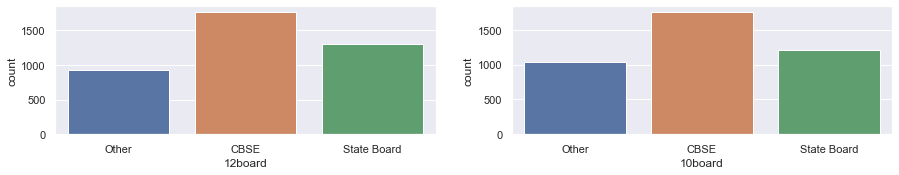

In [118]:
board=df[['12board','10board']]
c=1
for i in board:
    plt.subplot(3,2,c)
    sns.countplot(df[i])
    c=c+1
    
   

In [119]:
df[['10board']].value_counts()#.plot(kind='bar',color= 'green')

10board    
CBSE           1748
State Board    1214
Other          1034
dtype: int64

<AxesSubplot:xlabel='Experience', ylabel='Salary'>

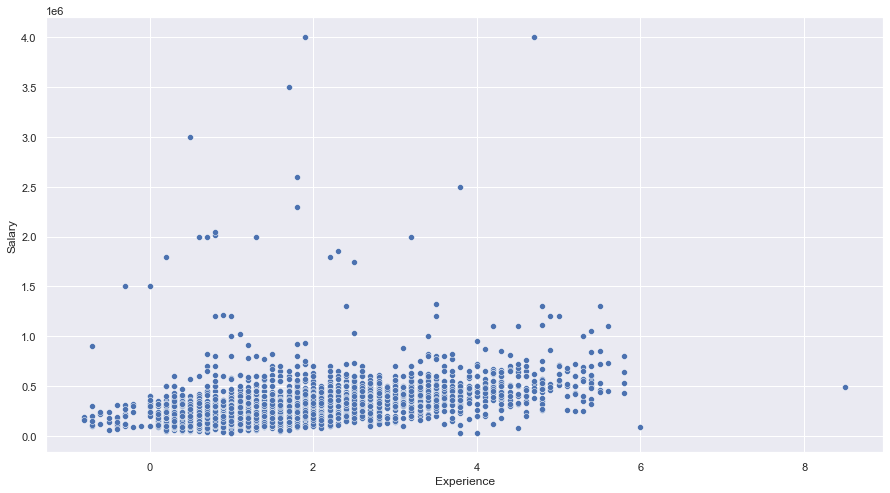

In [120]:
sns.scatterplot(df.Experience, df.Salary,data=df,markers='o')

<AxesSubplot:xlabel='Age', ylabel='Experience'>

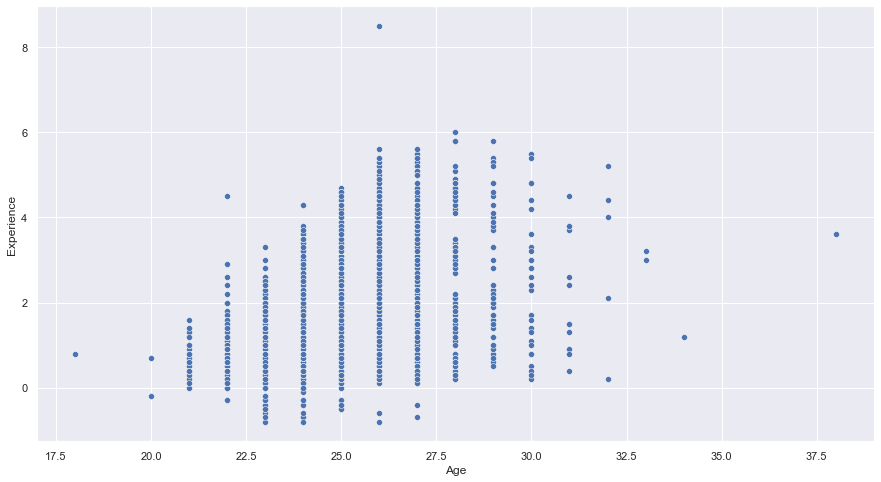

In [121]:
sns.scatterplot(df.Age, df.Experience, data=df)

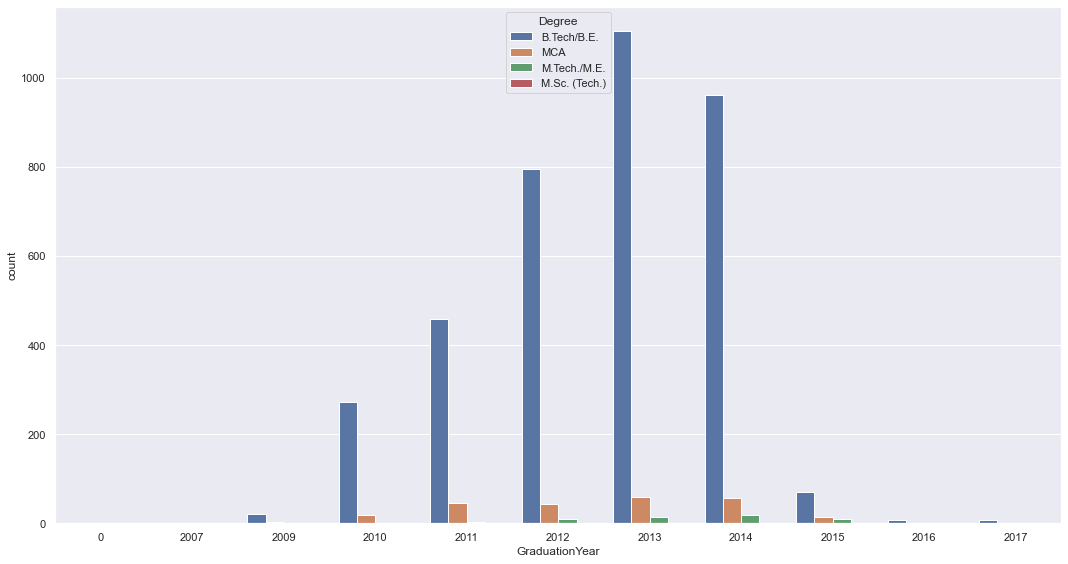

In [122]:
sns.countplot(x=df.GraduationYear, hue='Degree',data=df)
plt.tick_params()
plt.tight_layout()

In [123]:
df.CollegeState.value_counts()#.head(6).plot(kind='bar',color='red')

Uttar Pradesh        914
Karnataka            370
Tamil Nadu           367
Telangana            319
Maharashtra          262
Andhra Pradesh       225
West Bengal          196
Punjab               193
Madhya Pradesh       189
Haryana              180
Rajasthan            173
Orissa               172
Delhi                162
Uttarakhand          113
Kerala                33
Jharkhand             28
Chhattisgarh          27
Gujarat               24
Himachal Pradesh      16
Bihar                 10
Jammu and Kashmir      7
Union Territory        5
Assam                  5
Sikkim                 3
Meghalaya              2
Goa                    1
Name: CollegeState, dtype: int64

In [124]:
West=['Rajasthan','Punjab', 'Maharashtra','Gujarat','Goa']
North=['Uttar Pradesh','Punjab','Haryana','Uttarakhand','Himachal Pradesh','Delhi','Jammu and Kashmir']
East=['Meghalaya','Sikkim','Orissa','Assam','Bihar','Jharkhand']
South=['Karnataka','Tamil Nadu','Telangana','Kerala','West Bengal']
#Central=['Union Territory','Andhra Pradesh','Chhattisgarh']

In [125]:
def collegestate(x):
    if x in West:
        return('WestIndia')
    elif x in North:
        return('NorthIndia')
    elif x in East:
        return('EastIndia')
    elif x in South:
        return('SouthIndia')
    else:
        return('Central')

In [126]:
df['CollegeState']= df['CollegeState'].apply(collegestate)

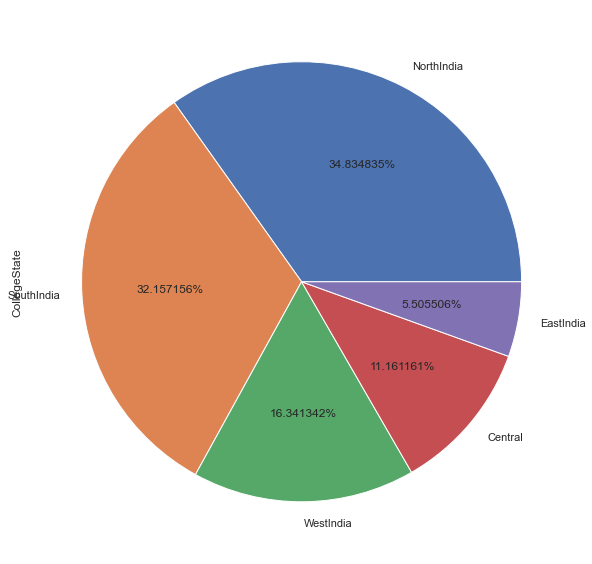

In [127]:
df['CollegeState'].value_counts().plot(kind='pie',autopct= '%f%%')
plt.tight_layout()
plt.show()

In [128]:
df.collegeGPA.value_counts()

70.00    112
72.00     99
75.00     83
65.00     79
68.00     75
        ... 
75.94      1
93.30      1
60.19      1
57.25      1
61.47      1
Name: collegeGPA, Length: 1282, dtype: int64

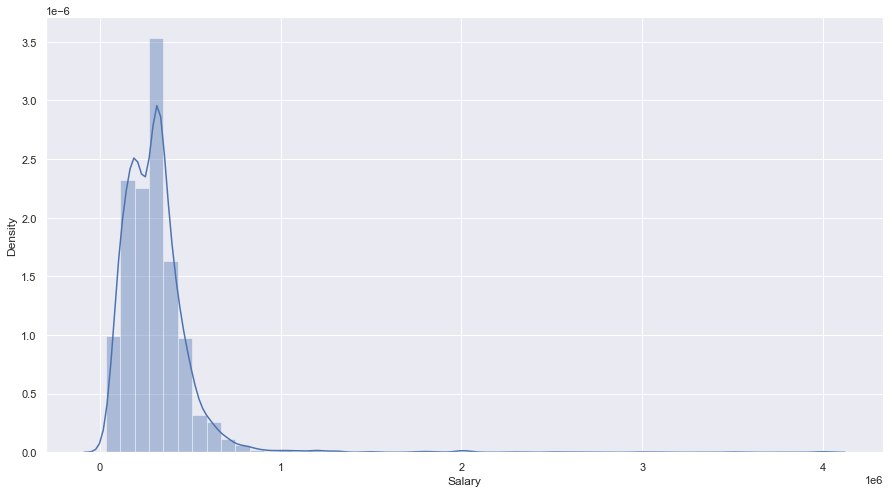

In [129]:
sns.distplot(df.Salary)
plt.show()

<AxesSubplot:xlabel='Age', ylabel='Salary'>

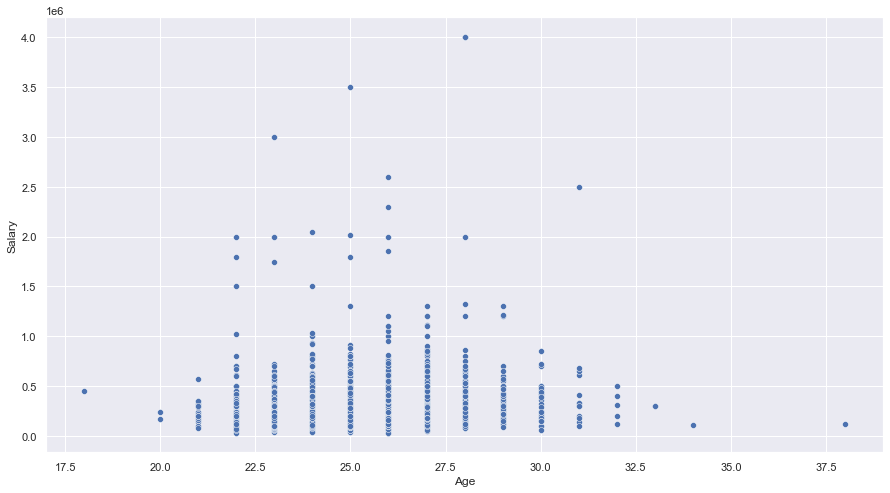

In [130]:
sns.scatterplot(df.Age,df.Salary)

In [131]:
df.head()

ID   Salary        DOJ        DOL Designation   JobCity Gender  \
0  203097   420000 2012-06-01 2015-12-31    Engineer  Banglore      f   
1  579905   500000 2013-09-01 2015-12-31     Manager    Others      m   
2  810601   325000 2014-06-01 2015-12-31    Engineer   Chennai      f   
3  267447  1100000 2011-07-01 2015-12-31    Engineer       NCR      m   
4  343523   200000 2014-03-01 2015-03-01     Trainee       NCR      m   

         DOB  10percentage 10board  12graduation  12percentage 12board  \
0 1990-02-19          84.3   Other          2007          95.8   Other   
1 1989-10-04          85.4    CBSE          2007          85.0    CBSE   
2 1992-08-03          85.0    CBSE          2010          68.2    CBSE   
3 1989-12-05          85.6    CBSE          2007          83.6    CBSE   
4 1991-02-27          78.0    CBSE          2008          76.8    CBSE   

   CollegeID  CollegeTier       Degree  \
0       1141            2  B.Tech/B.E.   
1       5807            2  B.Tech/B.E.   
2         64            2  B.Tech/B.E.   
3       6920            1  B.Tech/B.E.   
4      11368            2  B.Tech/B.E.   

                              Specialization  collegeGPA  CollegeCityID  \
0                       computer engineering       78.00           1141   
1  electronics and communication engineering       70.06           5807   
2                     information technology       70.00             64   
3                       computer engineering       74.64           6920   
4  electronics and communication engineering       73.90          11368   

   CollegeCityTier CollegeState  GraduationYear  English  Logical  Quant  \
0                0      Central            2011      515      585    525   
1                0      Central            2012      695      610    780   
2                0   NorthIndia            2014      615      545    370   
3                1   NorthIndia            2011      635      585    625   
4                0   NorthIndia            2012      545      625    465   

     Domain  ComputerProgramming  ElectronicsAndSemicon  ComputerScience  \
0  0.635979                  445                      0                0   
1  0.960603                    0                    466                0   
2  0.450877                  395                      0                0   
3  0.974396                  615                      0                0   
4  0.124502                    0                    233                0   

   MechanicalEngg  ElectricalEngg  TelecomEngg  CivilEngg  conscientiousness  \
0               0               0            0          0             0.9737   
1               0               0            0          0            -0.7335   
2               0               0            0          0             0.2718   
3               0               0            0          0             0.0464   
4               0               0            0          0            -0.8810   

   agreeableness  extraversion  nueroticism  openess_to_experience  \
0         0.8128        0.5269      1.35490                -0.4455   
1         0.3789        1.2396     -0.10760                 0.8637   
2         1.7109        0.1637     -0.86820                 0.6721   
3         0.3448       -0.3440     -0.40780                -0.9194   
4        -0.2793       -1.0697      0.09163                -0.1295   

   Experience  10percentage_bins  12percentage_bins      Today  Age  \
0         3.6                  1                  1 2015-12-31   25   
1         2.3                  1                  1 2015-12-31   26   
2         1.6                  1                  2 2015-12-31   23   
3         4.5                  1                  1 2015-12-31   26   
4         1.0                  2                  2 2015-12-31   24   

   collegeGPA_bins  
0                2  
1                2  
2                2  
3                2  
4                2

In [132]:
df.shape

(3996, 44)

In [133]:
avg=no/cou

In [134]:
def impute(num,count):
    if(count<=1):
        avg=num
    else:
        avg=num/count
    return avg/9

In [135]:
for i in df.index:
     df.loc[i,"Test_Percentage_updated2"]=round(impute(no[i],cou[i]),2)

In [136]:
df.head()

ID   Salary        DOJ        DOL Designation   JobCity Gender  \
0  203097   420000 2012-06-01 2015-12-31    Engineer  Banglore      f   
1  579905   500000 2013-09-01 2015-12-31     Manager    Others      m   
2  810601   325000 2014-06-01 2015-12-31    Engineer   Chennai      f   
3  267447  1100000 2011-07-01 2015-12-31    Engineer       NCR      m   
4  343523   200000 2014-03-01 2015-03-01     Trainee       NCR      m   

         DOB  10percentage 10board  12graduation  12percentage 12board  \
0 1990-02-19          84.3   Other          2007          95.8   Other   
1 1989-10-04          85.4    CBSE          2007          85.0    CBSE   
2 1992-08-03          85.0    CBSE          2010          68.2    CBSE   
3 1989-12-05          85.6    CBSE          2007          83.6    CBSE   
4 1991-02-27          78.0    CBSE          2008          76.8    CBSE   

   CollegeID  CollegeTier       Degree  \
0       1141            2  B.Tech/B.E.   
1       5807            2  B.Tech/B.E.   
2         64            2  B.Tech/B.E.   
3       6920            1  B.Tech/B.E.   
4      11368            2  B.Tech/B.E.   

                              Specialization  collegeGPA  CollegeCityID  \
0                       computer engineering       78.00           1141   
1  electronics and communication engineering       70.06           5807   
2                     information technology       70.00             64   
3                       computer engineering       74.64           6920   
4  electronics and communication engineering       73.90          11368   

   CollegeCityTier CollegeState  GraduationYear  English  Logical  Quant  \
0                0      Central            2011      515      585    525   
1                0      Central            2012      695      610    780   
2                0   NorthIndia            2014      615      545    370   
3                1   NorthIndia            2011      635      585    625   
4                0   NorthIndia            2012      545      625    465   

     Domain  ComputerProgramming  ElectronicsAndSemicon  ComputerScience  \
0  0.635979                  445                      0                0   
1  0.960603                    0                    466                0   
2  0.450877                  395                      0                0   
3  0.974396                  615                      0                0   
4  0.124502                    0                    233                0   

   MechanicalEngg  ElectricalEngg  TelecomEngg  CivilEngg  conscientiousness  \
0               0               0            0          0             0.9737   
1               0               0            0          0            -0.7335   
2               0               0            0          0             0.2718   
3               0               0            0          0             0.0464   
4               0               0            0          0            -0.8810   

   agreeableness  extraversion  nueroticism  openess_to_experience  \
0         0.8128        0.5269      1.35490                -0.4455   
1         0.3789        1.2396     -0.10760                 0.8637   
2         1.7109        0.1637     -0.86820                 0.6721   
3         0.3448       -0.3440     -0.40780                -0.9194   
4        -0.2793       -1.0697      0.09163                -0.1295   

   Experience  10percentage_bins  12percentage_bins      Today  Age  \
0         3.6                  1                  1 2015-12-31   25   
1         2.3                  1                  1 2015-12-31   26   
2         1.6                  1                  2 2015-12-31   23   
3         4.5                  1                  1 2015-12-31   26   
4         1.0                  2                  2 2015-12-31   24   

   collegeGPA_bins  Test_Percentage_updated2  
0                2                     49.44  
1                2                     51.78  
2                2                 

In [137]:
 len(df[df["Test_Percentage_updated2"]==0])

130

In [138]:
len(df[df["Test_Percentage_updated2"].isnull()])

0

In [139]:
df.columns

Index(['ID', 'Salary', 'DOJ', 'DOL', 'Designation', 'JobCity', 'Gender', 'DOB',
       '10percentage', '10board', '12graduation', '12percentage', '12board',
       'CollegeID', 'CollegeTier', 'Degree', 'Specialization', 'collegeGPA',
       'CollegeCityID', 'CollegeCityTier', 'CollegeState', 'GraduationYear',
       'English', 'Logical', 'Quant', 'Domain', 'ComputerProgramming',
       'ElectronicsAndSemicon', 'ComputerScience', 'MechanicalEngg',
       'ElectricalEngg', 'TelecomEngg', 'CivilEngg', 'conscientiousness',
       'agreeableness', 'extraversion', 'nueroticism', 'openess_to_experience',
       'Experience', '10percentage_bins', '12percentage_bins', 'Today', 'Age',
       'collegeGPA_bins', 'Test_Percentage_updated2'],
      dtype='object')

In [140]:
df['yr_since_graduated']=2015-df['GraduationYear']

In [141]:
df.head()

ID   Salary        DOJ        DOL Designation   JobCity Gender  \
0  203097   420000 2012-06-01 2015-12-31    Engineer  Banglore      f   
1  579905   500000 2013-09-01 2015-12-31     Manager    Others      m   
2  810601   325000 2014-06-01 2015-12-31    Engineer   Chennai      f   
3  267447  1100000 2011-07-01 2015-12-31    Engineer       NCR      m   
4  343523   200000 2014-03-01 2015-03-01     Trainee       NCR      m   

         DOB  10percentage 10board  12graduation  12percentage 12board  \
0 1990-02-19          84.3   Other          2007          95.8   Other   
1 1989-10-04          85.4    CBSE          2007          85.0    CBSE   
2 1992-08-03          85.0    CBSE          2010          68.2    CBSE   
3 1989-12-05          85.6    CBSE          2007          83.6    CBSE   
4 1991-02-27          78.0    CBSE          2008          76.8    CBSE   

   CollegeID  CollegeTier       Degree  \
0       1141            2  B.Tech/B.E.   
1       5807            2  B.Tech/B.E.   
2         64            2  B.Tech/B.E.   
3       6920            1  B.Tech/B.E.   
4      11368            2  B.Tech/B.E.   

                              Specialization  collegeGPA  CollegeCityID  \
0                       computer engineering       78.00           1141   
1  electronics and communication engineering       70.06           5807   
2                     information technology       70.00             64   
3                       computer engineering       74.64           6920   
4  electronics and communication engineering       73.90          11368   

   CollegeCityTier CollegeState  GraduationYear  English  Logical  Quant  \
0                0      Central            2011      515      585    525   
1                0      Central            2012      695      610    780   
2                0   NorthIndia            2014      615      545    370   
3                1   NorthIndia            2011      635      585    625   
4                0   NorthIndia            2012      545      625    465   

     Domain  ComputerProgramming  ElectronicsAndSemicon  ComputerScience  \
0  0.635979                  445                      0                0   
1  0.960603                    0                    466                0   
2  0.450877                  395                      0                0   
3  0.974396                  615                      0                0   
4  0.124502                    0                    233                0   

   MechanicalEngg  ElectricalEngg  TelecomEngg  CivilEngg  conscientiousness  \
0               0               0            0          0             0.9737   
1               0               0            0          0            -0.7335   
2               0               0            0          0             0.2718   
3               0               0            0          0             0.0464   
4               0               0            0          0            -0.8810   

   agreeableness  extraversion  nueroticism  openess_to_experience  \
0         0.8128        0.5269      1.35490                -0.4455   
1         0.3789        1.2396     -0.10760                 0.8637   
2         1.7109        0.1637     -0.86820                 0.6721   
3         0.3448       -0.3440     -0.40780                -0.9194   
4        -0.2793       -1.0697      0.09163                -0.1295   

   Experience  10percentage_bins  12percentage_bins      Today  Age  \
0         3.6                  1                  1 2015-12-31   25   
1         2.3                  1                  1 2015-12-31   26   
2         1.6                  1                  2 2015-12-31   23   
3         4.5                  1                  1 2015-12-31   26   
4         1.0                  2                  2 2015-12-31   24   

   collegeGPA_bins  Test_Percentage_updated2  yr_since_graduated  
0                2                     49.44                   4  
1                2                     51.

In [142]:
df[df['Experience']<0]

ID   Salary        DOJ        DOL Designation    JobCity Gender  \
29     472956   220000 2014-11-01 2014-04-01    Engineer        NCR      m   
92    1250429  1500000 2014-11-01 2014-07-01   Developer  Hyderabad      m   
148    721786   105000 2014-11-01 2014-02-01   Developer  Hyderabad      m   
235    421588   120000 2013-10-01 2013-07-01   Developer        NCR      f   
264    927996   325000 2014-12-01 2014-09-01    Engineer     Others      f   
451   1189128   170000 2014-12-01 2014-03-01     Analyst  Hyderabad      m   
591    918908   240000 2014-10-01 2014-08-01     Manager        NCR      f   
865   1189528   200000 2014-12-01 2014-04-01     Analyst  Hyderabad      m   
888   1035913   110000 2014-10-01 2014-02-01    Engineer       Pune      m   
1005   922592   180000 2014-11-01 2014-06-01      others        NCR      m   
1355   693210   150000 2014-12-01 2014-04-01      others       Pune      f   
1433  1262574    60000 2014-12-01 2014-06-01   Developer    Missing      m   
1482  1290107   190000 2014-12-01 2014-02-01     Trainee    Missing      m   
1522   824917   105000 2014-10-01 2014-05-01   Developer    Missing      m   
1541  1053599   125000 2014-11-01 2014-07-01      others     Others      f   
1591   645192   120000 2013-11-01 2013-06-01   Developer    Missing      m   
1636   796733   315000 2014-10-01 2014-06-01    Engineer    Missing      m   
1992   638979   300000 2013-12-01 2013-04-01    Engineer  Hyderabad      m   
2044   660959   190000 2013-11-01 2013-06-01    Engineer    Chennai      m   
2266   693630   105000 2013-10-01 2013-07-01    Engineer     Others      f   
2319   784141   140000 2013-10-01 2013-04-01    Engineer        NCR      f   
2349  1035826    75000 2014-11-01 2014-06-01   Developer    Missing      m   
2407   629605   210000 2013-12-01 2013-08-01   Developer    Chennai      m   
2414  1232472   220000 2013-11-01 2013-07-01    Engineer        NCR      m   
2805   959670   240000 2014-10-01 2014-04-01    Engineer        NCR      m   
2889  1036442   240000 2014-12-01 2014-05-01    Engineer    Missing      m   
2946  1066913   120000 2014-12-01 2014-08-01    Engineer   Banglore      m   
2977   335296   120000 2013-12-01 2013-05-01    Engineer        NCR      m   
3094   145701   900000 2014-12-01 2014-04-01    Engineer        NCR      m   
3095   805812   100000 2012-10-01 2012-09-01     Analyst       Pune      f   
3109   933812   310000 2014-11-01 2014-06-01    Engineer     Others      m   
3243   604370   300000 2013-10-01 2013-08-01     Analyst        NCR      m   
3304   542950   145000 2013-11-01 2013-06-01    Engineer        NCR      m   
3384  1264544   120000 2014-10-01 2014-06-01   Developer    Missing      m   
3391   902947   270000 2014-10-01 2014-06-01      others    Missing      m   
3470   794238   200000 2014-11-01 2014-07-01      others    Missing      m   
3593  1272431   200000 2014-11-01 2014-08-01      others    Missing      m   
3634   309954   165000 2014-12-01 2014-02-01    Engineer     Others      m   
3700   342936    95000 2014-10-01 2014-08-01   Developer    Missing      m   
3911   698914   180000 2013-11-01 2013-05-01     Analyst     Others      m   

            DOB  10percentage      10board  12graduation  12percentage  \
29   1992-06-11         64.00         CBSE          2010         74.00   
92   1992-01-04         79.00  State Board          2009         87.90   
148  1991-11-03         73.08  State Board          2009         71.20   
235  1990-08-05         74.00  State Board          2007         60.00   
264  1992-09-16         85.28  State Board          2010         71.50   
451  1992-02-26         86.80  State Board          2009         88.40   
591  1995-01-10         60.00  State Board          2010         73.00   
865  1992-11-06         92.83  State Board          2010         91.90   
888  1991-01-16         66.46  State Board          2009         62.81   
1005 1992-08-20         79.00        Other          2010         78.00  

In [143]:
df[df['collegeGPA']<40]

ID  Salary        DOJ        DOL Designation   JobCity Gender  \
7      912934  400000 2014-07-01 2015-07-01    Engineer  Banglore      m   
138    964319  195000 2014-10-01 2015-01-01     Manager    Others      m   
788    249853  180000 2012-05-01 2013-06-01    Engineer    Others      m   
1419  1262900  180000 2014-10-01 2015-04-01    Engineer   Chennai      m   
1439   299447  360000 2011-08-01 2015-12-31      others    Others      m   
1767   813008  180000 2014-06-01 2014-08-01      others    Others      m   
2151   262814  145000 2012-02-01 2013-04-01   Developer       NCR      m   
2229   868740  240000 2015-01-01 2015-04-01    Engineer   Chennai      m   
2293   407736  490000 2012-10-01 2014-12-01    Engineer   Missing      f   
2662   240465  470000 2011-07-01 2015-03-01    Engineer   Kolkata      m   
2691   385442  820000 2014-07-01 2015-03-01    Engineer       NCR      m   
3308   287976  250000 2011-08-01 2012-11-01    Engineer    Others      m   

            DOB  10percentage      10board  12graduation  12percentage  \
7    1992-05-27         92.00         CBSE          2010         91.00   
138  1991-05-04         79.60        Other          2011         87.58   
788  1989-01-12         66.50         CBSE          2007         65.50   
1419 1993-06-14         58.90  State Board          2010         68.00   
1439 1988-12-11         73.06        Other          2007         74.00   
1767 1992-09-21         69.00  State Board          2010         76.00   
2151 1988-06-18         61.30        Other          2005         63.00   
2229 1992-05-01         94.40  State Board          2010         86.00   
2293 1990-03-18         89.60        Other          2008         80.33   
2662 1990-02-15         77.38        Other          2007         75.00   
2691 1990-10-28         81.20         CBSE          2007         87.60   
3308 1985-06-07         63.20         CBSE          2003         62.60   

          12board  CollegeID  CollegeTier        Degree  \
7            CBSE       1757            1   B.Tech/B.E.   
138          CBSE       7586            2   B.Tech/B.E.   
788          CBSE        272            2  M.Tech./M.E.   
1419  State Board       1808            2   B.Tech/B.E.   
1439        Other      11664            2  M.Tech./M.E.   
1767  State Board      13388            2   B.Tech/B.E.   
2151        Other       4043            2   B.Tech/B.E.   
2229  State Board       8888            2   B.Tech/B.E.   
2293        Other       3801            2   B.Tech/B.E.   
2662        Other        253            2   B.Tech/B.E.   
2691        Other        120            1  M.Tech./M.E.   
3308         CBSE        223            2   B.Tech/B.E.   

                                 Specialization  collegeGPA  CollegeCityID  \
7                        mechanical engineering        8.58           1757   
138                      information technology        6.63           7586   
788            electrical and power engineering        6.80            272   
1419             computer science & engineering        6.85           1808   
1439                    electronics engineering        8.07          11664   
1767                     mechanical engineering        7.56          13388   
2151                     information technology        6.95           4043   
2229                     mechanical engineering        8.13           8888   
2293                       computer engineering        9.30           3801   
2662                     information technology        8.88            253   
2691                     information technology        8.89            120   
3308  electronics and communication engineering        6.45            223   

      CollegeCityTier CollegeState  GraduationYear  English  Logical  Quant  \
7                   0   SouthIndia            2016      545      555    590   
138                 0   SouthIndia            2014      380      355    210   
788                 0    WestIndia     

In [144]:
df[df['yr_since_graduated']<0]

ID  Salary        DOJ        DOL Designation    JobCity Gender  \
7      912934  400000 2014-07-01 2015-07-01    Engineer   Banglore      m   
113   1087220  340000 2015-01-01 2015-12-31    Engineer  Hyderabad      m   
379    561757  120000 2013-11-01 2014-03-01   Developer        NCR      m   
597    990438  290000 2014-07-01 2015-04-01    Engineer   Banglore      m   
603    820700  265000 2015-01-01 2015-12-31    Engineer        NCR      m   
728    713751  100000 2013-11-01 2014-04-01   Developer    Missing      f   
2018  1010140  330000 2014-06-01 2015-01-01    Engineer     Others      m   
2071   781932  100000 2013-07-01 2014-04-01      others     Others      m   
2800  1123174  290000 2014-07-01 2015-12-31    Engineer        NCR      m   
3036   663821  180000 2013-12-01 2014-06-01    Engineer        NCR      m   
3169  1193139  325000 2014-08-01 2015-04-01    Engineer   Banglore      m   
3229  1242790  100000 2015-01-01 2015-04-01    Engineer        NCR      m   
3370   820353  300000 2014-06-01 2015-01-01     Manager     Others      m   
3735   920335  145000 2014-08-01 2015-12-31     Analyst        NCR      m   
3837   898548  350000 2014-12-01 2015-12-31   Developer   Banglore      f   

            DOB  10percentage      10board  12graduation  12percentage  \
7    1992-05-27         92.00         CBSE          2010         91.00   
113  1991-04-18         91.43        Other          2009         74.00   
379  1992-12-03         64.00         CBSE          2009         57.00   
597  1993-08-20         92.16  State Board          2010         93.70   
603  1992-02-05         71.00         CBSE          2010         68.00   
728  1991-11-12         75.60  State Board          2009         81.30   
2018 1991-06-11         89.76        Other          2009         82.00   
2071 1992-06-09         83.60  State Board          2009         74.89   
2800 1991-08-01         76.00  State Board          2009         71.00   
3036 1991-05-24         68.60         CBSE          2008         59.20   
3169 1992-06-25         71.84  State Board          2010         66.83   
3229 1993-08-15         70.00         CBSE          2011         58.00   
3370 1991-03-03         90.00         CBSE          2009         81.20   
3735 1990-07-02         64.00  State Board          2009         60.01   
3837 1992-01-26         72.30  State Board          2010         79.80   

          12board  CollegeID  CollegeTier       Degree  \
7            CBSE       1757            1  B.Tech/B.E.   
113          CBSE       5666            2  B.Tech/B.E.   
379          CBSE       7515            2  B.Tech/B.E.   
597   State Board       4032            2  B.Tech/B.E.   
603          CBSE       6741            2  B.Tech/B.E.   
728          CBSE         75            2  B.Tech/B.E.   
2018         CBSE       8440            1  B.Tech/B.E.   
2071  State Board      11013            2  B.Tech/B.E.   
2800  State Board       8287            2  B.Tech/B.E.   
3036         CBSE       4450            2  B.Tech/B.E.   
3169  State Board       3770            2  B.Tech/B.E.   
3229         CBSE       6907            2  B.Tech/B.E.   
3370         CBSE      11127            1  B.Tech/B.E.   
3735  State Board         55            2  B.Tech/B.E.   
3837  State Board         66            2  B.Tech/B.E.   

                                   Specialization  collegeGPA  CollegeCityID  \
7                          mechanical engineering        8.58           1757   
113                computer science & engineering       70.00           5666   
379                          computer engineering       60.34           7515   
597     electronics and communication engineering       79.98           4032   
603                computer science & engineering       73.00           6741   
728                computer science & engineering       76.56             75   
2018  electronics and instrumentation engineering       72.00           8440   
2071                    

In [145]:
len(df[df['collegeGPA']<30])

12

In [146]:
df_model=df.iloc[:,[1,4,5,6,8,9,11,12,14,15,16,17,19,20,22,23,24,25,33,34,35,36,37,38,42,44,45]]

In [147]:
df_model.head()

Salary Designation   JobCity Gender  10percentage 10board  12percentage  \
0   420000    Engineer  Banglore      f          84.3   Other          95.8   
1   500000     Manager    Others      m          85.4    CBSE          85.0   
2   325000    Engineer   Chennai      f          85.0    CBSE          68.2   
3  1100000    Engineer       NCR      m          85.6    CBSE          83.6   
4   200000     Trainee       NCR      m          78.0    CBSE          76.8   

  12board  CollegeTier       Degree  \
0   Other            2  B.Tech/B.E.   
1    CBSE            2  B.Tech/B.E.   
2    CBSE            2  B.Tech/B.E.   
3    CBSE            1  B.Tech/B.E.   
4    CBSE            2  B.Tech/B.E.   

                              Specialization  collegeGPA  CollegeCityTier  \
0                       computer engineering       78.00                0   
1  electronics and communication engineering       70.06                0   
2                     information technology       70.00                0   
3                       computer engineering       74.64                1   
4  electronics and communication engineering       73.90                0   

  CollegeState  English  Logical  Quant    Domain  conscientiousness  \
0      Central      515      585    525  0.635979             0.9737   
1      Central      695      610    780  0.960603            -0.7335   
2   NorthIndia      615      545    370  0.450877             0.2718   
3   NorthIndia      635      585    625  0.974396             0.0464   
4   NorthIndia      545      625    465  0.124502            -0.8810   

   agreeableness  extraversion  nueroticism  openess_to_experience  \
0         0.8128        0.5269      1.35490                -0.4455   
1         0.3789        1.2396     -0.10760                 0.8637   
2         1.7109        0.1637     -0.86820                 0.6721   
3         0.3448       -0.3440     -0.40780                -0.9194   
4        -0.2793       -1.0697      0.09163                -0.1295   

   Experience  Age  Test_Percentage_updated2  yr_since_graduated  
0         3.6   25                     49.44                   4  
1         2.3   26                     51.78                   3  
2         1.6   23                     43.89                   1  
3         4.5   26                     68.33                   4  
4         1.0   24                     25.89                   3

In [148]:
df_model.shape

(3996, 27)

In [149]:
df_model.dtypes

Salary                        int64
Designation                  object
JobCity                      object
Gender                       object
10percentage                float64
10board                      object
12percentage                float64
12board                      object
CollegeTier                   int64
Degree                       object
Specialization               object
collegeGPA                  float64
CollegeCityTier               int64
CollegeState                 object
English                       int64
Logical                       int64
Quant                         int64
Domain                      float64
conscientiousness           float64
agreeableness               float64
extraversion                float64
nueroticism                 float64
openess_to_experience       float64
Experience                  float64
Age                           int64
Test_Percentage_updated2    float64
yr_since_graduated            int64
dtype: object

In [150]:
df_model.select_dtypes(include='object').columns

Index(['Designation', 'JobCity', 'Gender', '10board', '12board', 'Degree',
       'Specialization', 'CollegeState'],
      dtype='object')

In [151]:
df_model.select_dtypes(include='int64').columns

Index(['Salary', 'CollegeTier', 'CollegeCityTier', 'English', 'Logical',
       'Quant', 'Age', 'yr_since_graduated'],
      dtype='object')

In [152]:
df_model.select_dtypes(include='float64').columns

Index(['10percentage', '12percentage', 'collegeGPA', 'Domain',
       'conscientiousness', 'agreeableness', 'extraversion', 'nueroticism',
       'openess_to_experience', 'Experience', 'Test_Percentage_updated2'],
      dtype='object')

In [153]:
#creating new dataset for correlation

In [154]:
df_corr=df_model.select_dtypes(include=['int64','float64'])

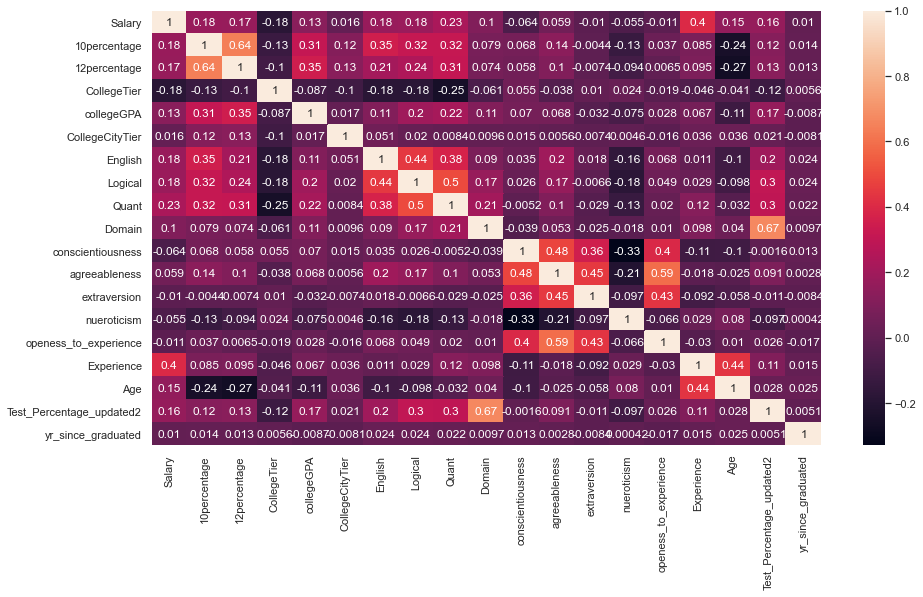

In [155]:
import seaborn as sns
sns.heatmap(df_corr.corr(),annot=True)
plt.show()

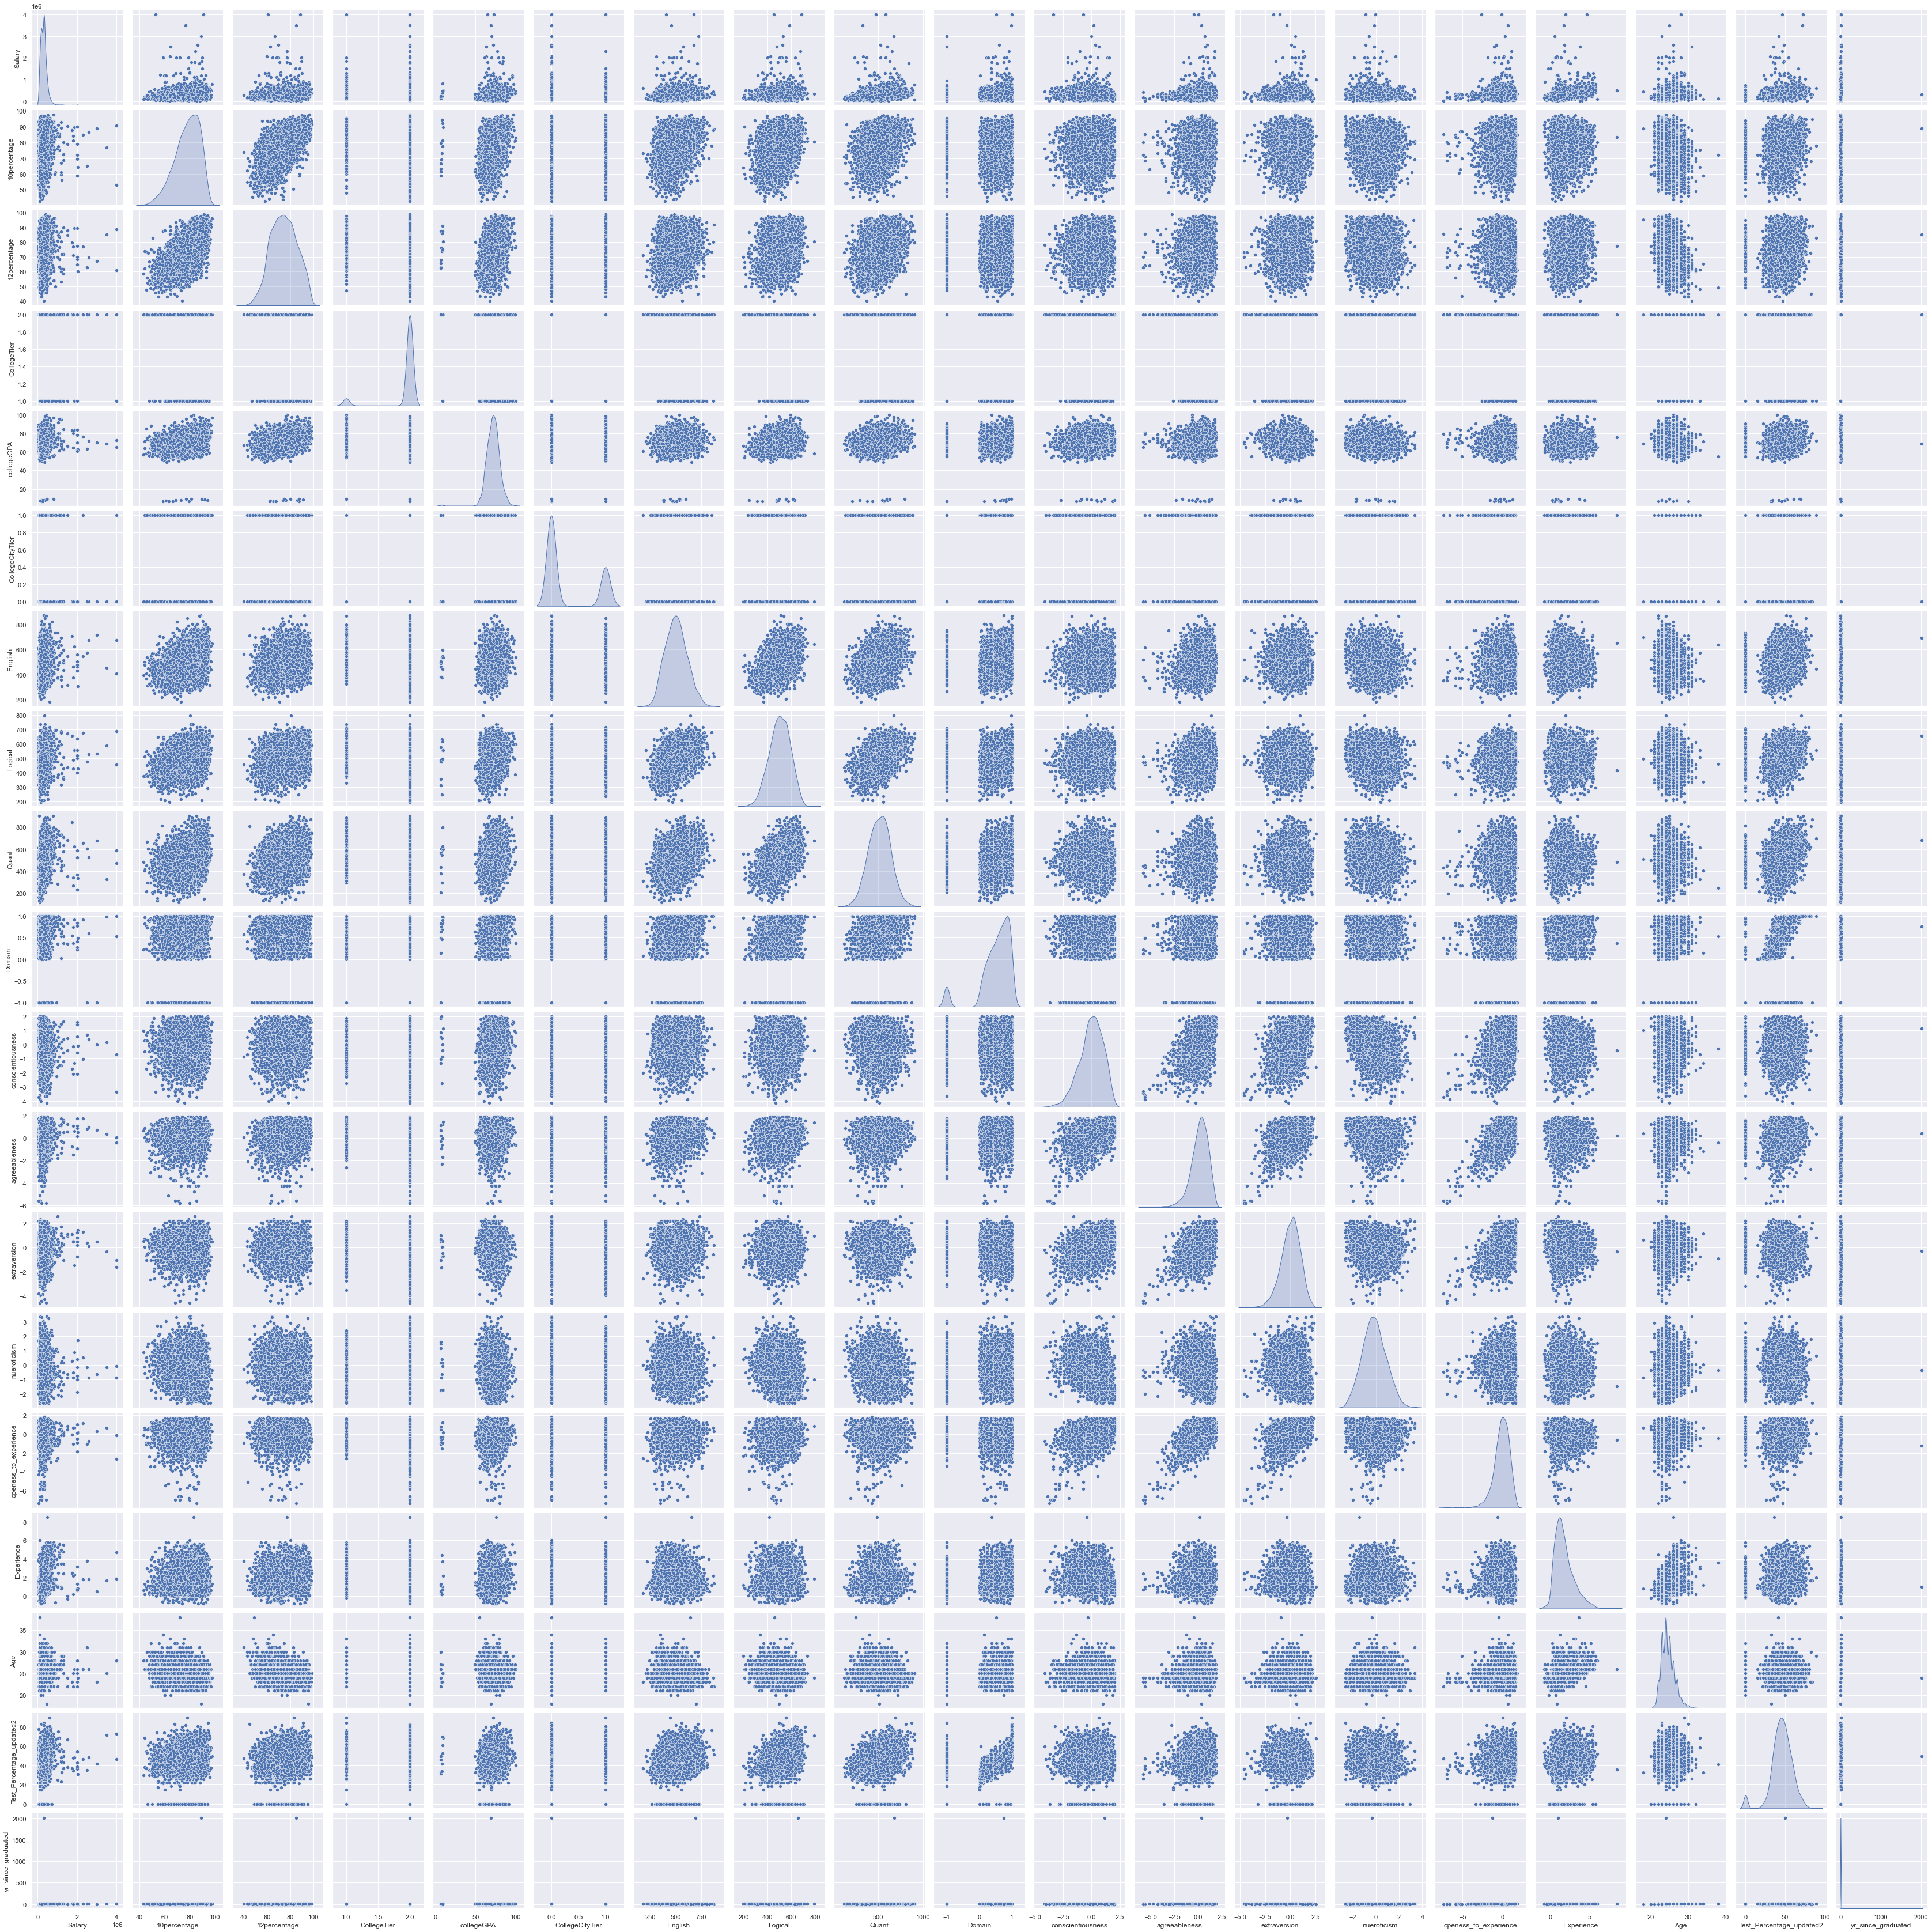

In [156]:
sns.pairplot(df_model,diag_kind='kde')

In [157]:
df_model.head()

Salary Designation   JobCity Gender  10percentage 10board  12percentage  \
0   420000    Engineer  Banglore      f          84.3   Other          95.8   
1   500000     Manager    Others      m          85.4    CBSE          85.0   
2   325000    Engineer   Chennai      f          85.0    CBSE          68.2   
3  1100000    Engineer       NCR      m          85.6    CBSE          83.6   
4   200000     Trainee       NCR      m          78.0    CBSE          76.8   

  12board  CollegeTier       Degree  \
0   Other            2  B.Tech/B.E.   
1    CBSE            2  B.Tech/B.E.   
2    CBSE            2  B.Tech/B.E.   
3    CBSE            1  B.Tech/B.E.   
4    CBSE            2  B.Tech/B.E.   

                              Specialization  collegeGPA  CollegeCityTier  \
0                       computer engineering       78.00                0   
1  electronics and communication engineering       70.06                0   
2                     information technology       70.00                0   
3                       computer engineering       74.64                1   
4  electronics and communication engineering       73.90                0   

  CollegeState  English  Logical  Quant    Domain  conscientiousness  \
0      Central      515      585    525  0.635979             0.9737   
1      Central      695      610    780  0.960603            -0.7335   
2   NorthIndia      615      545    370  0.450877             0.2718   
3   NorthIndia      635      585    625  0.974396             0.0464   
4   NorthIndia      545      625    465  0.124502            -0.8810   

   agreeableness  extraversion  nueroticism  openess_to_experience  \
0         0.8128        0.5269      1.35490                -0.4455   
1         0.3789        1.2396     -0.10760                 0.8637   
2         1.7109        0.1637     -0.86820                 0.6721   
3         0.3448       -0.3440     -0.40780                -0.9194   
4        -0.2793       -1.0697      0.09163                -0.1295   

   Experience  Age  Test_Percentage_updated2  yr_since_graduated  
0         3.6   25                     49.44                   4  
1         2.3   26                     51.78                   3  
2         1.6   23                     43.89                   1  
3         4.5   26                     68.33                   4  
4         1.0   24                     25.89                   3

In [158]:
len(df_model[df_model['collegeGPA']<10])

12

In [159]:
df_model[df_model['Age']<20]

Salary Designation   JobCity Gender  10percentage      10board  \
656  450000      others  Banglore      m          89.0  State Board   

     12percentage      12board  CollegeTier       Degree  \
656          95.4  State Board            2  B.Tech/B.E.   

             Specialization  collegeGPA  CollegeCityTier CollegeState  \
656  mechanical engineering        69.0                0    WestIndia   

     English  Logical  Quant  Domain  conscientiousness  agreeableness  \
656      700      495    510    -1.0               0.99         0.3789   

     extraversion  nueroticism  openess_to_experience  Experience  Age  \
656        0.6248      -0.8682                 0.6721         0.8   18   

     Test_Percentage_updated2  yr_since_graduated  
656                     32.78                   1

In [160]:
df_model[df_model['Experience']<0]

Salary Designation    JobCity Gender  10percentage      10board  \
29     220000    Engineer        NCR      m         64.00         CBSE   
92    1500000   Developer  Hyderabad      m         79.00  State Board   
148    105000   Developer  Hyderabad      m         73.08  State Board   
235    120000   Developer        NCR      f         74.00  State Board   
264    325000    Engineer     Others      f         85.28  State Board   
451    170000     Analyst  Hyderabad      m         86.80  State Board   
591    240000     Manager        NCR      f         60.00  State Board   
865    200000     Analyst  Hyderabad      m         92.83  State Board   
888    110000    Engineer       Pune      m         66.46  State Board   
1005   180000      others        NCR      m         79.00        Other   
1355   150000      others       Pune      f         63.00        Other   
1433    60000   Developer    Missing      m         59.00  State Board   
1482   190000     Trainee    Missing      m         73.83        Other   
1522   105000   Developer    Missing      m         63.00        Other   
1541   125000      others     Others      f         62.00         CBSE   
1591   120000   Developer    Missing      m         83.80         CBSE   
1636   315000    Engineer    Missing      m         94.20         CBSE   
1992   300000    Engineer  Hyderabad      m         89.00  State Board   
2044   190000    Engineer    Chennai      m         83.00  State Board   
2266   105000    Engineer     Others      f         77.40         CBSE   
2319   140000    Engineer        NCR      f         78.80         CBSE   
2349    75000   Developer    Missing      m         74.16  State Board   
2407   210000   Developer    Chennai      m         89.39  State Board   
2414   220000    Engineer        NCR      m         85.00         CBSE   
2805   240000    Engineer        NCR      m         78.80         CBSE   
2889   240000    Engineer    Missing      m         71.00  State Board   
2946   120000    Engineer   Banglore      m         75.00  State Board   
2977   120000    Engineer        NCR      m         58.33        Other   
3094   900000    Engineer        NCR      m         83.67         CBSE   
3095   100000     Analyst       Pune      f         82.60         CBSE   
3109   310000    Engineer     Others      m         69.00         CBSE   
3243   300000     Analyst        NCR      m         81.50         CBSE   
3304   145000    Engineer        NCR      m         66.50  State Board   
3384   120000   Developer    Missing      m         76.00         CBSE   
3391   270000      others    Missing      m         82.00  State Board   
3470   200000      others    Missing      m         79.60         CBSE   
3593   200000      others    Missing      m         70.00         CBSE   
3634   165000    Engineer     Others      m         91.00        Other   
3700    95000   Developer    Missing      m         60.20         CBSE   
3911   180000     Analyst     Others      m         64.00  State Board   

      12percentage      12board  CollegeTier       Degree  \
29           74.00         CBSE            2  B.Tech/B.E.   
92           87.90  State Board            2  B.Tech/B.E.   
148          71.20  State Board            2  B.Tech/B.E.   
235          60.00  State Board            2  B.Tech/B.E.   
264          71.50  State Board            2  B.Tech/B.E.   
451          88.40  State Board            2  B.Tech/B.E.   
591          73.00  State Board            2  B.Tech/B.E.   
865          91.90  State Board            2  B.Tech/B.E.   
888          62.81  State Board            2  B.Tech/B.E.   
1005         78.00        Other            2  B.Tech/B.E.   
1355         60.00         CBSE            2  B.Tech/B.E.   
1433         64.00  State Board            2          MCA   
1482         72.31        Other            2          MCA   
1522         55.00  State Board            2          MCA   
1541         60.00         CBSE            2  B.Tech/B.E.

In [161]:
ind=df_model[df_model['Experience']<0].index

In [162]:
df.iloc[ind,:]

ID   Salary        DOJ        DOL Designation    JobCity Gender  \
29     472956   220000 2014-11-01 2014-04-01    Engineer        NCR      m   
92    1250429  1500000 2014-11-01 2014-07-01   Developer  Hyderabad      m   
148    721786   105000 2014-11-01 2014-02-01   Developer  Hyderabad      m   
235    421588   120000 2013-10-01 2013-07-01   Developer        NCR      f   
264    927996   325000 2014-12-01 2014-09-01    Engineer     Others      f   
451   1189128   170000 2014-12-01 2014-03-01     Analyst  Hyderabad      m   
591    918908   240000 2014-10-01 2014-08-01     Manager        NCR      f   
865   1189528   200000 2014-12-01 2014-04-01     Analyst  Hyderabad      m   
888   1035913   110000 2014-10-01 2014-02-01    Engineer       Pune      m   
1005   922592   180000 2014-11-01 2014-06-01      others        NCR      m   
1356   108999   260000 2010-08-01 2013-04-01      others     Others      f   
1434   229508   280000 2012-03-01 2014-10-01    Engineer   Banglore      m   
1483   810113   215000 2015-02-01 2015-12-31    Engineer        NCR      m   
1523   282152   320000 2011-12-01 2013-01-01     Analyst       Pune      m   
1542   965697   300000 2014-11-01 2015-12-31    Engineer    Kolkata      m   
1592   301466   620000 2014-04-01 2015-12-31     Manager     Others      m   
1637   741398   240000 2014-07-01 2014-08-01     Trainee    Missing      m   
1993   507959   240000 2013-07-01 2014-04-01   Developer    Missing      m   
2045  1125281   120000 2014-10-01 2015-05-01      others  Hyderabad      m   
2267   618308   600000 2013-08-01 2014-12-01    Engineer     Others      m   
2320  1248085   150000 2014-11-01 2015-11-01    Engineer        NCR      m   
2350   960922   150000 2015-04-01 2015-12-31    Engineer    Chennai      m   
2408   940709   325000 2015-02-01 2015-04-01     Analyst  Hyderabad      f   
2415   653947   220000 2013-07-01 2014-02-01      others  Hyderabad      m   
2806  1279886   170000 2014-12-01 2015-12-31    Engineer        NCR      f   
2891   205633   500000 2011-09-01 2015-12-31    Engineer    Kolkata      m   
2948   639536   210000 2014-08-01 2015-12-31    Engineer        NCR      m   
2979  1157712   300000 2014-07-01 2015-12-31    Engineer  Hyderabad      f   
3096   544522   370000 2013-09-01 2015-12-31    Engineer     Mumbai      m   
3097   824952   200000 2014-06-01 2015-12-31   Developer    Missing      m   
3111  1192843   330000 2014-03-01 2015-12-31    Engineer    Chennai      m   
3245   202864   480000 2012-04-01 2015-12-31    Engineer   Banglore      m   
3306   938137   675000 2014-07-01 2015-12-31    Engineer        NCR      m   
3386   109360   520000 2010-12-01 2015-12-31    Engineer    Chennai      f   
3393   246543   440000 2011-09-01 2015-12-31      others     Others      m   
3472   339440    45000 2012-09-01 2013-08-01     Trainee    Missing      m   
3595   644505   200000 2013-12-01 2014-11-01     Analyst    Missing      m   
3636   326938   120000 2011-09-01 2012-12-01   Developer     Others      f   
3702   248992   180000 2011-10-01 2012-08-01   Developer        NCR      m   
3913   913446   370000 2014-06-01 2015-04-01    Engineer     Others      m   

            DOB  10percentage      10board  12graduation  12percentage  \
29   1992-06-11         64.00         CBSE          2010         74.00   
92   1992-01-04         79.00  State Board          2009         87.90   
148  1991-11-03         73.08  State Board          2009         71.20   
235  1990-08-05         74.00  State Board          2007         60.00   
264  1992-09-16         85.28  State Board          2010         71.50   
451  1992-02-26         86.80  State Board          2009         88.40   
591  1995-01-10         60.00  State Board          2010         73.00   
865  1992-11-06         92.83  State Board          2010         91.90   
888  1991-01-16         66.46  State Board          2009         62.81   
1005 1992-08-20         79.00        Other          2010         78.00  

Checking Skewness and Kurtosis for all the numerical columns

In [163]:
for i in df_corr.columns:
    print(i,df_corr[i].skew())

Salary 6.455097197253461
10percentage -0.5911155223458765
12percentage -0.03240724630454319
CollegeTier -3.2469603853031344
collegeGPA -1.2488479595613617
CollegeCityTier 0.8716391961799973
English 0.19188650340786267
Logical -0.215850728663257
Quant -0.019416884064562403
Domain -1.922245707443084
conscientiousness -0.5280906330347449
agreeableness -1.2049949424696191
extraversion -0.5233921795269217
nueroticism 0.16618794667403375
openess_to_experience -1.5088972630742328
Experience 0.951153651826569
Age 0.8927762499506374
Test_Percentage_updated2 -0.9676730285110053
yr_since_graduated 63.052335668560644


Checking Kurtosis

In [164]:
for i in df_corr.columns:
    print(i,df_corr[i].kurt())

Salary 80.98694434800247
10percentage -0.11056615334059172
12percentage -0.6318686184665538
CollegeTier 8.547029286135828
collegeGPA 10.229512254197004
CollegeCityTier -1.2408664165865368
English -0.2544081527602118
Logical -0.22556857993522383
Quant -0.10161655720275009
Domain 3.895019805052258
conscientiousness 0.1261465736146654
agreeableness 3.405897479187204
extraversion 0.6465538461232416
nueroticism -0.19149415072401288
openess_to_experience 5.811140485586457
Experience 0.8322618937228374
Age 1.8337365006753616
Test_Percentage_updated2 2.6928999117923356
yr_since_graduated 3982.3806039066662


In [165]:
df_model.isnull().sum()

Salary                      0
Designation                 0
JobCity                     0
Gender                      0
10percentage                0
10board                     0
12percentage                0
12board                     0
CollegeTier                 0
Degree                      0
Specialization              0
collegeGPA                  0
CollegeCityTier             0
CollegeState                0
English                     0
Logical                     0
Quant                       0
Domain                      0
conscientiousness           0
agreeableness               0
extraversion                0
nueroticism                 0
openess_to_experience       0
Experience                  0
Age                         0
Test_Percentage_updated2    0
yr_since_graduated          0
dtype: int64

# Fitting a Raw Model to Check

In [166]:
dummy_raw=pd.get_dummies(df_model,drop_first=True)

In [167]:
df_model.columns

Index(['Salary', 'Designation', 'JobCity', 'Gender', '10percentage', '10board',
       '12percentage', '12board', 'CollegeTier', 'Degree', 'Specialization',
       'collegeGPA', 'CollegeCityTier', 'CollegeState', 'English', 'Logical',
       'Quant', 'Domain', 'conscientiousness', 'agreeableness', 'extraversion',
       'nueroticism', 'openess_to_experience', 'Experience', 'Age',
       'Test_Percentage_updated2', 'yr_since_graduated'],
      dtype='object')

In [168]:
import statsmodels.api as sm
x_raw=dummy_raw.drop('Salary',axis=1)
y_raw=dummy_raw.Salary

In [169]:
from sklearn.model_selection import train_test_split
xtrain_raw,xtest_raw,ytrain_raw,ytest_raw=train_test_split(x_raw,y_raw,random_state=1,test_size=0.2)

In [170]:
X_raw=sm.add_constant(xtrain_raw)
raw_model=sm.OLS(ytrain_raw,X_raw).fit()

In [171]:
dummy_raw.shape

(3996, 89)

In [172]:
raw_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.298
Model:                            OLS   Adj. R-squared:                  0.279
Method:                 Least Squares   F-statistic:                     15.53
Date:                Tue, 19 Apr 2022   Prob (F-statistic):          4.11e-179
Time:                        15:54:28   Log-Likelihood:                -42900.
No. Observations:                3196   AIC:                         8.597e+04
Df Residuals:                    3110   BIC:                         8.649e+04
Df Model:                          85                                         
Covariance Type:            nonrobust                                         
==============================================================================================================================
                                                                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------
const                                                      -8.542e+04   1.46e+05     -0.586      0.558   -3.71e+05       2e+05
10percentage                                                1002.8967    440.492      2.277      0.023     139.213    1866.581
12percentage                                                 950.4105    405.861      2.342      0.019     154.628    1746.193
CollegeTier                                                 -7.07e+04   1.24e+04     -5.681      0.000   -9.51e+04   -4.63e+04
collegeGPA                                                  1148.4045    441.014      2.604      0.009     283.697    2013.112
CollegeCityTier                                            -4192.7634   8115.499     -0.517      0.605   -2.01e+04    1.17e+04
English                                                      130.1491     33.908      3.838      0.000      63.664     196.634
Logical                                                       37.7265     43.046      0.876      0.381     -46.675     122.128
Quant                                                        113.9017     31.626      3.602      0.000      51.892     175.912
Domain                                                     -2.079e+04   9175.900     -2.266      0.024   -3.88e+04   -2803.322
conscientiousness                                          -1.242e+04   3616.725     -3.433      0.001   -1.95e+04   -5325.743
agreeableness                                               9166.1032   4424.253      2.072      0.038     491.351    1.78e+04
extraversion                                                9634.1816   3689.494      2.611      0.009    2400.091    1.69e+04
nueroticism                                                -5861.4726   3222.867     -1.819      0.069   -1.22e+04     457.689
openess_to_experience                                      -9335.8955   3820.150     -2.444      0.015   -1.68e+04   -1845.624
Experience                                                  6.153e+04   3139.206     19.602      0.000    5.54e+04    6.77e+04
Age                                                         -527.1739   2299.858     -0.229      0.819   -5036.568    3982.221
Test_Percentage_updated2                                     738.6912    354.105      2.086      0.037      44.389    1432.994
yr_since_graduated                                             4.9150     82.791      0.059      0.953    -157.415     167.245
Designation_Developer                                       -2.26e+04   1.17e+04     -1.931      0.054   -4.55e+04     351.959
Designation_Engineer                                        6600.4097   1.01e+04      0.651      0.515   -1.33e+04    2.65e+04
Designation_Manager                

In [173]:
for i in df_model.select_dtypes(include='object').columns:
      print(i,len(df_model[i].value_counts()))

Designation 6
JobCity 9
Gender 2
10board 3
12board 3
Degree 4
Specialization 46
CollegeState 5


In [174]:
df.Specialization

0                            computer engineering
1       electronics and communication engineering
2                          information technology
3                            computer engineering
4       electronics and communication engineering
                          ...                    
3993                       information technology
3994    electronics and communication engineering
3995                         computer engineering
3996               computer science & engineering
3997                       information technology
Name: Specialization, Length: 3996, dtype: object

In [175]:
df['Specialization'].value_counts()

electronics and communication engineering      880
computer science & engineering                 743
information technology                         660
computer engineering                           599
computer application                           244
mechanical engineering                         201
electronics and electrical engineering         196
electronics & telecommunications               121
electrical engineering                          82
electronics & instrumentation eng               32
civil engineering                               29
information science engineering                 27
electronics and instrumentation engineering     27
instrumentation and control engineering         20
electronics engineering                         19
biotechnology                                   15
other                                           13
industrial & production engineering             10
applied electronics and instrumentation          9
chemical engineering           

In [176]:
len(df['Specialization'].value_counts())

46

In [177]:
list_elec=['electrical engineering','control and instrumentation engineering','electronics and instrumentation engineering','electronics and communication engineering','electronics and electrical engineering','electronics & telecommunications','electronics & instrumentation eng','instrumentation and control engineering','electronics engineering','applied electronics and instrumentation','telecommunication engineering','instrumentation engineering','electronics and computer engineering','electrical and power engineering','power systems and automation','embedded systems technology','electronics']

In [178]:
len(list_elec)

17

In [179]:
list_comp=['information technology','computer engineering','computer application','computer science & engineering','information science engineering','computer science and technology','information & communication technology','computer science','computer and communication engineering','information science','computer networking']

In [180]:
len(list_comp)

11

creating new categories

In [181]:
def spec(x):
    if x in list_elec:
        return 'electronic_related'
    elif x in list_comp:
        return 'IT_related'
    else: 
        return 'others'

In [182]:
df_model['branches']=df_model['Specialization'].apply(spec)

In [183]:
df_model

Salary Designation    JobCity Gender  10percentage      10board  \
0      420000    Engineer   Banglore      f         84.30        Other   
1      500000     Manager     Others      m         85.40         CBSE   
2      325000    Engineer    Chennai      f         85.00         CBSE   
3     1100000    Engineer        NCR      m         85.60         CBSE   
4      200000     Trainee        NCR      m         78.00         CBSE   
...       ...         ...        ...    ...           ...          ...   
3993   280000    Engineer        NCR      m         52.09         CBSE   
3994   100000      others  Hyderabad      f         90.00  State Board   
3995   320000    Engineer   Banglore      m         81.86        Other   
3996   200000   Developer   Banglore      f         78.72  State Board   
3997   400000    Engineer    Chennai      f         70.60         CBSE   

      12percentage      12board  CollegeTier       Degree  \
0            95.80        Other            2  B.Tech/B.E.   
1            85.00         CBSE            2  B.Tech/B.E.   
2            68.20         CBSE            2  B.Tech/B.E.   
3            83.60         CBSE            1  B.Tech/B.E.   
4            76.80         CBSE            2  B.Tech/B.E.   
...            ...          ...          ...          ...   
3993         55.50         CBSE            2  B.Tech/B.E.   
3994         93.00  State Board            2  B.Tech/B.E.   
3995         65.50        Other            2  B.Tech/B.E.   
3996         69.88  State Board            2  B.Tech/B.E.   
3997         68.00         CBSE            2  B.Tech/B.E.   

                                 Specialization  collegeGPA  CollegeCityTier  \
0                          computer engineering       78.00                0   
1     electronics and communication engineering       70.06                0   
2                        information technology       70.00                0   
3                          computer engineering       74.64                1   
4     electronics and communication engineering       73.90                0   
...                                         ...         ...              ...   
3993                     information technology       61.50                0   
3994  electronics and communication engineering       77.30                1   
3995                       computer engineering       70.00                0   
3996             computer science & engineering       70.42                1   
3997                     information technology       68.00                1   

     CollegeState  English  Logical  Quant    Domain  conscientiousness  \
0         Central      515      585    525  0.635979             0.9737   
1         Central      695      610    780  0.960603            -0.7335   
2      NorthIndia      615      545    370  0.450877             0.2718   
3      NorthIndia      635      585    625  0.974396             0.0464   
4      NorthIndia      545      625    465  0.124502            -0.8810   
...           ...      ...      ...    ...       ...                ...   
3993   NorthIndia      365      334    475  0.276047            -0.1082   
3994   SouthIndia      415      410    535  0.881620            -0.3027   
3995    EastIndia      475      475    465  0.488348            -1.5765   
3996   SouthIndia      450      410    320  0.744758            -0.1590   
3997   SouthIndia      565      515    464  0.600057            -1.1128   

      agreeableness  extraversion  nueroticism  openess_to_experience  \
0            0.8128        0.5269      1.35490                -0.4455   
1            0.3789        1.2396     -0.10760                 0.8637   
2            1.7109        0.1637     -0.86820                 0.6721   
3            0.3448       -0.3440     -0.40780                -0.9194   
4           -0.2793       -1.0697      0.09163                -0.1295   
...             ...           ...          ...                    ...   
3993        

In [184]:
df_model.loc[df_model['branches']=='IT_related','Specialization'].unique()

array(['computer engineering', 'information technology',
       'computer science & engineering', 'computer application',
       'information science engineering',
       'computer science and technology',
       'computer and communication engineering',
       'information & communication technology', 'information science',
       'computer networking', 'computer science'], dtype=object)

In [185]:
df_model.loc[df_model['branches']=='electronic_related','Specialization'].unique()

array(['electronics and communication engineering',
       'electronics and electrical engineering',
       'electronics & telecommunications',
       'instrumentation and control engineering',
       'electronics and computer engineering', 'electrical engineering',
       'applied electronics and instrumentation',
       'electronics & instrumentation eng',
       'control and instrumentation engineering',
       'electronics and instrumentation engineering',
       'electronics engineering', 'embedded systems technology',
       'electrical and power engineering', 'power systems and automation',
       'instrumentation engineering', 'telecommunication engineering',
       'electronics'], dtype=object)

In [186]:
df_model.loc[df_model['branches']=='others','Specialization'].unique()

array(['mechanical engineering', 'civil engineering',
       'mechanical and automation', 'industrial & production engineering',
       'metallurgical engineering', 'ceramic engineering',
       'chemical engineering', 'aeronautical engineering', 'other',
       'biotechnology', 'mechatronics',
       'automobile/automotive engineering', 'polymer technology',
       'mechanical & production engineering',
       'industrial & management engineering', 'industrial engineering',
       'internal combustion engine', 'biomedical engineering'],
      dtype=object)

In [187]:
#dropping the specialization column

In [188]:
df_model.drop('Specialization',axis=1,inplace=True)

In [189]:
dummy_raw=pd.get_dummies(df_model,drop_first=True)

In [190]:
dummy_raw.shape

(3996, 46)

In [191]:
x_raw=dummy_raw.drop('Salary',axis=1)
y_raw=dummy_raw.Salary

In [192]:
from sklearn.model_selection import train_test_split
xtrain_raw,xtest_raw,ytrain_raw,ytest_raw=train_test_split(x_raw,y_raw,random_state=1,test_size=0.2)

In [193]:
X_raw=sm.add_constant(xtrain_raw)
raw_model=sm.OLS(ytrain_raw,X_raw).fit()

In [194]:
raw_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.292
Model:                            OLS   Adj. R-squared:                  0.282
Method:                 Least Squares   F-statistic:                     28.89
Date:                Tue, 19 Apr 2022   Prob (F-statistic):          4.29e-200
Time:                        15:54:30   Log-Likelihood:                -42913.
No. Observations:                3196   AIC:                         8.592e+04
Df Residuals:                    3150   BIC:                         8.620e+04
Df Model:                          45                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                       -1.503e+04   8.25e+04     -0.182      0.855   -1.77e+05    1.47e+05
10percentage                 1102.9581    436.260      2.528      0.012     247.576    1958.340
12percentage                  927.2879    400.719      2.314      0.021     141.591    1712.985
CollegeTier                 -7.084e+04   1.22e+04     -5.789      0.000   -9.48e+04   -4.68e+04
collegeGPA                   1163.1342    431.653      2.695      0.007     316.784    2009.484
CollegeCityTier             -5792.7218   8017.013     -0.723      0.470   -2.15e+04    9926.374
English                       131.9643     33.581      3.930      0.000      66.122     197.807
Logical                        34.6796     42.750      0.811      0.417     -49.141     118.500
Quant                         113.6799     31.303      3.632      0.000      52.304     175.055
Domain                      -1.472e+04   8568.240     -1.718      0.086   -3.15e+04    2080.134
conscientiousness           -1.228e+04   3589.274     -3.422      0.001   -1.93e+04   -5245.633
agreeableness                9017.4039   4375.401      2.061      0.039     438.480    1.76e+04
extraversion                 9498.7065   3656.758      2.598      0.009    2328.838    1.67e+04
nueroticism                 -5726.4347   3198.420     -1.790      0.073    -1.2e+04     544.762
openess_to_experience       -9212.6987   3781.289     -2.436      0.015   -1.66e+04   -1798.660
Experience                    6.16e+04   3077.754     20.015      0.000    5.56e+04    6.76e+04
Age                          -622.6494   2235.887     -0.278      0.781   -5006.591    3761.293
Test_Percentage_updated2      632.6636    340.120      1.860      0.063     -34.216    1299.543
yr_since_graduated              5.5809     82.525      0.068      0.946    -156.228     167.390
Designation_Developer       -2.323e+04   1.16e+04     -2.000      0.046    -4.6e+04    -456.436
Designation_Engineer         6209.9481   1.01e+04      0.618      0.537   -1.35e+04    2.59e+04
Designation_Manager          8.551e+04      2e+04      4.267      0.000    4.62e+04    1.25e+05
Designation_Trainee         -6911.5197   2.11e+04     -0.328      0.743   -4.83e+04    3.45e+04
Designation_others          -2.513e+04   1.23e+04     -2.043      0.041   -4.92e+04   -1014.766
JobCity_Chennai             -4.751e+04    1.3e+04     -3.662      0.000    -7.3e+04   -2.21e+04
JobCity_Hyderabad           -4.106e+04   1.26e+04     -3.263      0.001   -6.57e+04   -1.64e+04
JobCity_Kolkata             -6.947e+04   1.94e+04     -3.590      0.000   -1.07e+05   -3.15e+04
JobCity_Missing             -4.185e+04   1.15e+04     -3.645      0.000   -6.44e+04   -1.93e+04
JobCity_Mumbai              -1.913e+04   1.69e+04     -1.134      0.257   -5.22e+04    1.39e+04
JobCity_NCR

In [195]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [196]:
from sklearn.model_selection import cross_val_score
test_array=cross_val_score(estimator=lr, X = x_raw, y = y_raw, cv = 5)
print('mean_test_score',np.mean(test_array))

mean_test_score -0.6654048039603462


In [197]:
test_array

array([ 0.20923416,  0.27580741,  0.16066828, -4.31313751,  0.34040364])

In [198]:
print('std_test_score',np.std(test_array))

std_test_score 1.8248767099920309


In [199]:
print('coefficient of variation_test_score',(np.std(test_array))/(np.mean(test_array)))

coefficient of variation_test_score -2.7425060641744055


Matter of concern is few important variables like 'age','college_city_tier' are coming insignificant with very high pvalue

# Statistical_Tests

# Annova

In [200]:
#we are testing anova of categorical variables with respect to target

In [201]:
for i in df_model.select_dtypes(include='object').columns:
      print(i,len(df_model[i].value_counts()))

Designation 6
JobCity 9
Gender 2
10board 3
12board 3
Degree 4
CollegeState 5
branches 3


In [202]:
from scipy.stats import shapiro,levene

In [203]:
df_model.rename(columns={'10board':'tenboard','12board':'twelveboard'},inplace=True)

In [204]:
df_model


Salary Designation    JobCity Gender  10percentage     tenboard  \
0      420000    Engineer   Banglore      f         84.30        Other   
1      500000     Manager     Others      m         85.40         CBSE   
2      325000    Engineer    Chennai      f         85.00         CBSE   
3     1100000    Engineer        NCR      m         85.60         CBSE   
4      200000     Trainee        NCR      m         78.00         CBSE   
...       ...         ...        ...    ...           ...          ...   
3993   280000    Engineer        NCR      m         52.09         CBSE   
3994   100000      others  Hyderabad      f         90.00  State Board   
3995   320000    Engineer   Banglore      m         81.86        Other   
3996   200000   Developer   Banglore      f         78.72  State Board   
3997   400000    Engineer    Chennai      f         70.60         CBSE   

      12percentage  twelveboard  CollegeTier       Degree  collegeGPA  \
0            95.80        Other            2  B.Tech/B.E.       78.00   
1            85.00         CBSE            2  B.Tech/B.E.       70.06   
2            68.20         CBSE            2  B.Tech/B.E.       70.00   
3            83.60         CBSE            1  B.Tech/B.E.       74.64   
4            76.80         CBSE            2  B.Tech/B.E.       73.90   
...            ...          ...          ...          ...         ...   
3993         55.50         CBSE            2  B.Tech/B.E.       61.50   
3994         93.00  State Board            2  B.Tech/B.E.       77.30   
3995         65.50        Other            2  B.Tech/B.E.       70.00   
3996         69.88  State Board            2  B.Tech/B.E.       70.42   
3997         68.00         CBSE            2  B.Tech/B.E.       68.00   

      CollegeCityTier CollegeState  English  Logical  Quant    Domain  \
0                   0      Central      515      585    525  0.635979   
1                   0      Central      695      610    780  0.960603   
2                   0   NorthIndia      615      545    370  0.450877   
3                   1   NorthIndia      635      585    625  0.974396   
4                   0   NorthIndia      545      625    465  0.124502   
...               ...          ...      ...      ...    ...       ...   
3993                0   NorthIndia      365      334    475  0.276047   
3994                1   SouthIndia      415      410    535  0.881620   
3995                0    EastIndia      475      475    465  0.488348   
3996                1   SouthIndia      450      410    320  0.744758   
3997                1   SouthIndia      565      515    464  0.600057   

      conscientiousness  agreeableness  extraversion  nueroticism  \
0                0.9737         0.8128        0.5269      1.35490   
1               -0.7335         0.3789        1.2396     -0.10760   
2                0.2718         1.7109        0.1637     -0.86820   
3                0.0464         0.3448       -0.3440     -0.40780   
4               -0.8810        -0.2793       -1.0697      0.09163   
...                 ...            ...           ...          ...   
3993            -0.1082         0.3448        0.2366      0.64980   
3994            -0.3027         0.8784        0.9322      0.77980   
3995            -1.5765        -1.5273       -1.5051     -1.31840   
3996            -0.1590         0.0459       -0.4511     -0.36120   
3997            -1.1128        -0.2793       -0.6343      1.32553   

      openess_to_experience  Experience  Age  Test_Percentage_updated2  \
0                   -0.4455         3.6   25                     49.44   
1                    0.8637         2.3   26                     51.78   
2                    0.6721         1.6   23                     43.89   
3                   -0.9194         4.5   26                     68.33   
4                   -0.1295         1.0   24                     25.89   
...                     ...         ...  ...                       ...   
3993             

In [205]:
import statsmodels.formula.api as sma # This will be used to Apply Regression
from statsmodels.stats.anova import anova_lm # Post Regression, we will use anova_lm...
anova_model = sma.ols('Salary ~ Designation+JobCity+Gender+tenboard+twelveboard+Degree+CollegeState+branches', data = df_model).fit()

In [206]:
anova_lm(anova_model)

df        sum_sq       mean_sq          F        PR(>F)
Designation      5.0  5.672300e+12  1.134460e+12  26.976049  6.396077e-27
JobCity          8.0  2.647368e+12  3.309210e+11   7.868889  1.500368e-10
Gender           1.0  1.818514e+11  1.818514e+11   4.324199  3.763815e-02
tenboard         2.0  4.276080e+12  2.138040e+12  50.839933  1.579971e-22
twelveboard      2.0  1.699405e+11  8.497024e+10   2.020487  1.327273e-01
Degree           3.0  2.654941e+11  8.849803e+10   2.104373  9.751159e-02
CollegeState     4.0  3.161145e+11  7.902864e+10   1.879203  1.111992e-01
branches         2.0  3.961741e+11  1.980871e+11   4.710265  9.052793e-03
Residual      3968.0  1.668716e+14  4.205434e+10        NaN           NaN

# Post HOC Test

In [207]:
import statsmodels.stats.multicomp as multi_comp
from statsmodels.stats.multicomp import pairwise_tukeyhsd
# Perform Comparison Between Categories..
analysis = multi_comp.MultiComparison(data = df_model["Salary"], groups = df_model["twelveboard"])
pc = analysis.tukeyhsd()
pc.summary()

<class 'statsmodels.iolib.table.SimpleTable'>

In [208]:
analysis2 = multi_comp.MultiComparison(data = df_model["Salary"], groups = df_model["CollegeState"])
pc2 = analysis2.tukeyhsd()
pc2.summary()

<class 'statsmodels.iolib.table.SimpleTable'>

# All Linearity Assumption Tests

In [209]:
import statsmodels.api as sma
sma.stats.diagnostic.linear_rainbow(raw_model)

(0.7561082669962237, 0.9999999849708959)

In [210]:
shapiro(raw_model.resid)

ShapiroResult(statistic=0.5502908229827881, pvalue=0.0)

<AxesSubplot:>

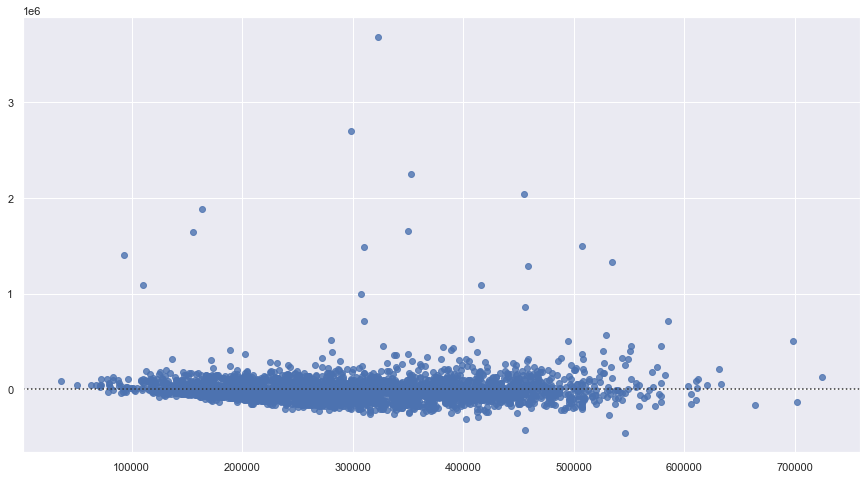

In [211]:
sns.residplot(raw_model.fittedvalues, raw_model.resid)

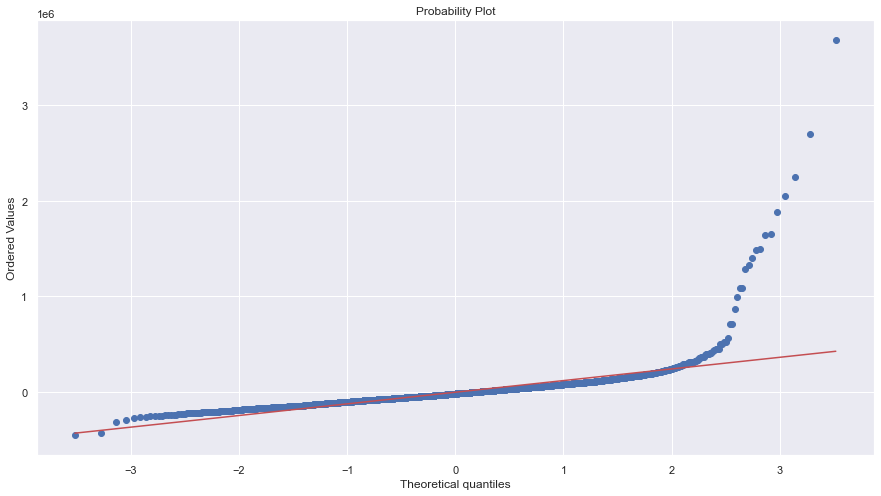

In [212]:
from scipy.stats import probplot

probplot(raw_model.resid, plot = plt)
plt.show()

In [213]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Drop the Appliances
vif_x = df_corr.drop("Salary", axis = 1)

mylist = []

for i in range(vif_x.shape[1]):
    mylist.append(variance_inflation_factor(vif_x.values, i)) # VIF values for each column
    
vif_data=pd.DataFrame({"Features":vif_x.columns, "VIF":mylist}).sort_values(ascending = False, by = "VIF")

# T6 and Windspeed should be used to build the Model...

In [214]:
vif_data

Features         VIF
0               10percentage  117.831080
15                       Age  100.162932
1               12percentage   86.113816
3                 collegeGPA   85.580650
6                    Logical   53.532193
2                CollegeTier   49.114448
5                    English   33.389909
7                      Quant   29.022691
16  Test_Percentage_updated2   25.231473
8                     Domain    3.978659
14                Experience    3.755336
10             agreeableness    1.982532
13     openess_to_experience    1.710760
9          conscientiousness    1.539665
4            CollegeCityTier    1.485992
11              extraversion    1.375625
12               nueroticism    1.223368
17        yr_since_graduated    1.011222

In [215]:
from statsmodels.stats.stattools import durbin_watson

print("DW Statistic: ", durbin_watson(raw_model.resid))

DW Statistic:  1.9886765624375378


In [216]:
# Ho: Residuals are not Heterskedastic
# Ha: Ho is False...

In [217]:
predictors = xtrain_raw

from statsmodels.stats.diagnostic import het_breuschpagan

test = het_breuschpagan(raw_model.resid, predictors)

In [218]:
test[-1]

0.004292917793404403

# Lets proceed with the preprocessing we are left with.

In [219]:
df_model.head()

Salary Designation   JobCity Gender  10percentage tenboard  12percentage  \
0   420000    Engineer  Banglore      f          84.3    Other          95.8   
1   500000     Manager    Others      m          85.4     CBSE          85.0   
2   325000    Engineer   Chennai      f          85.0     CBSE          68.2   
3  1100000    Engineer       NCR      m          85.6     CBSE          83.6   
4   200000     Trainee       NCR      m          78.0     CBSE          76.8   

  twelveboard  CollegeTier       Degree  collegeGPA  CollegeCityTier  \
0       Other            2  B.Tech/B.E.       78.00                0   
1        CBSE            2  B.Tech/B.E.       70.06                0   
2        CBSE            2  B.Tech/B.E.       70.00                0   
3        CBSE            1  B.Tech/B.E.       74.64                1   
4        CBSE            2  B.Tech/B.E.       73.90                0   

  CollegeState  English  Logical  Quant    Domain  conscientiousness  \
0      Central      515      585    525  0.635979             0.9737   
1      Central      695      610    780  0.960603            -0.7335   
2   NorthIndia      615      545    370  0.450877             0.2718   
3   NorthIndia      635      585    625  0.974396             0.0464   
4   NorthIndia      545      625    465  0.124502            -0.8810   

   agreeableness  extraversion  nueroticism  openess_to_experience  \
0         0.8128        0.5269      1.35490                -0.4455   
1         0.3789        1.2396     -0.10760                 0.8637   
2         1.7109        0.1637     -0.86820                 0.6721   
3         0.3448       -0.3440     -0.40780                -0.9194   
4        -0.2793       -1.0697      0.09163                -0.1295   

   Experience  Age  Test_Percentage_updated2  yr_since_graduated  \
0         3.6   25                     49.44                   4   
1         2.3   26                     51.78                   3   
2         1.6   23                     43.89                   1   
3         4.5   26                     68.33                   4   
4         1.0   24                     25.89                   3   

             branches  
0          IT_related  
1  electronic_related  
2          IT_related  
3          IT_related  
4  electronic_related

In [220]:
df_model.reset_index(drop=True,inplace=True)

In [221]:
#resetting index 

In [222]:
id=df_model[df_model.iloc[:,10]<10].index
id

Int64Index([7, 138, 788, 1418, 1438, 1766, 2150, 2228, 2292, 2661, 2690, 3306], dtype='int64')

In [223]:
for i in id:
    df_model.iloc[i,10]=df_model.iloc[i,10]*10

In [224]:
df_model[df_model.iloc[:,10]<10]

Empty DataFrame
Columns: [Salary, Designation, JobCity, Gender, 10percentage, tenboard, 12percentage, twelveboard, CollegeTier, Degree, collegeGPA, CollegeCityTier, CollegeState, English, Logical, Quant, Domain, conscientiousness, agreeableness, extraversion, nueroticism, openess_to_experience, Experience, Age, Test_Percentage_updated2, yr_since_graduated, branches]
Index: []

In [225]:
df_model[df_model.iloc[:,10]>100]

Empty DataFrame
Columns: [Salary, Designation, JobCity, Gender, 10percentage, tenboard, 12percentage, twelveboard, CollegeTier, Degree, collegeGPA, CollegeCityTier, CollegeState, English, Logical, Quant, Domain, conscientiousness, agreeableness, extraversion, nueroticism, openess_to_experience, Experience, Age, Test_Percentage_updated2, yr_since_graduated, branches]
Index: []

In [226]:
#Succesfully removed abnormal CGPA Values

In [227]:
#Different clusters of people with domain '-1' needs to be checked.
#This is a kind of abnormality due to unavailability of data

In [228]:
df_model[df_model['Domain']==-1]

Salary Designation    JobCity Gender  10percentage     tenboard  \
5     300000    Engineer  Hyderabad      m         89.92  State Board   
14    300000    Engineer   Banglore      m         81.20  State Board   
16    325000    Engineer        NCR      m         85.80         CBSE   
22    190000   Developer  Hyderabad      m         92.50  State Board   
35    350000     Manager     Others      f         85.00         CBSE   
...      ...         ...        ...    ...           ...          ...   
3940  280000    Engineer    Missing      m         78.00  State Board   
3956  310000    Engineer  Hyderabad      m         79.90  State Board   
3958  240000   Developer    Kolkata      m         77.00  State Board   
3967  330000    Engineer       Pune      m         76.00  State Board   
3976  320000    Engineer  Hyderabad      f         89.70        Other   

      12percentage  twelveboard  CollegeTier       Degree  collegeGPA  \
5             87.0  State Board            2  B.Tech/B.E.       76.32   
14            79.9  State Board            2  B.Tech/B.E.       67.67   
16            74.8         CBSE            2  B.Tech/B.E.       64.80   
22            95.2  State Board            2  B.Tech/B.E.       76.00   
35            61.0         CBSE            2  B.Tech/B.E.       64.98   
...            ...          ...          ...          ...         ...   
3940          91.0  State Board            2  B.Tech/B.E.       64.62   
3956          89.4  State Board            2  B.Tech/B.E.       77.15   
3958          69.0  State Board            2  B.Tech/B.E.       84.10   
3967          89.8  State Board            2  B.Tech/B.E.       62.00   
3976          86.7        Other            2  B.Tech/B.E.       80.00   

      CollegeCityTier CollegeState  English  Logical  Quant  Domain  \
5                   0   SouthIndia      560      555    620    -1.0   
14                  0   NorthIndia      395      565    645    -1.0   
16                  0   NorthIndia      685      530    620    -1.0   
22                  0   SouthIndia      395      455    485    -1.0   
35                  0    WestIndia      570      475    430    -1.0   
...               ...          ...      ...      ...    ...     ...   
3940                1   SouthIndia      405      425    380    -1.0   
3956                1   SouthIndia      385      510    585    -1.0   
3958                0   SouthIndia      490      590    655    -1.0   
3967                0    WestIndia      595      530    630    -1.0   
3976                1   SouthIndia      720      675    570    -1.0   

      conscientiousness  agreeableness  extraversion  nueroticism  \
5               -0.3027        -0.6201       -2.2954      -0.7415   
14               0.7027         0.7119        0.0100      -0.9950   
16               1.1336         1.0449        0.7785      -0.6147   
22              -0.4463        -0.6201       -0.6048       0.7798   
35              -0.4854        -0.5213        2.1129      -0.7350   
...                 ...            ...           ...          ...   
3940             1.7081        -0.9531        0.1637      -1.6289   
3956            -0.1590         0.5454        0.4711      -0.1076   
3958             0.5591         0.7119        0.4711      -1.6289   
3967             0.5591         0.7119        0.0100      -0.2344   
3976             0.2718         1.2114        0.4711      -0.1076   

      openess_to_experience  Experience  Age  Test_Percentage_updated2  \
5                   -0.8608         1.6   23                     58.44   
14                   0.6721         2.5   23                     48.39   
16                  -0.8608         1.3   23                     57.22   
22                  -2.7769         1.5   23                     50.56   
35                   1.8224         1.8   25                      0.00   
...                     ...         ...  ...                       ...   
3940                -0.8608         2.5   25        

In [229]:
#Imputing domain with Median values

<AxesSubplot:xlabel='Domain'>

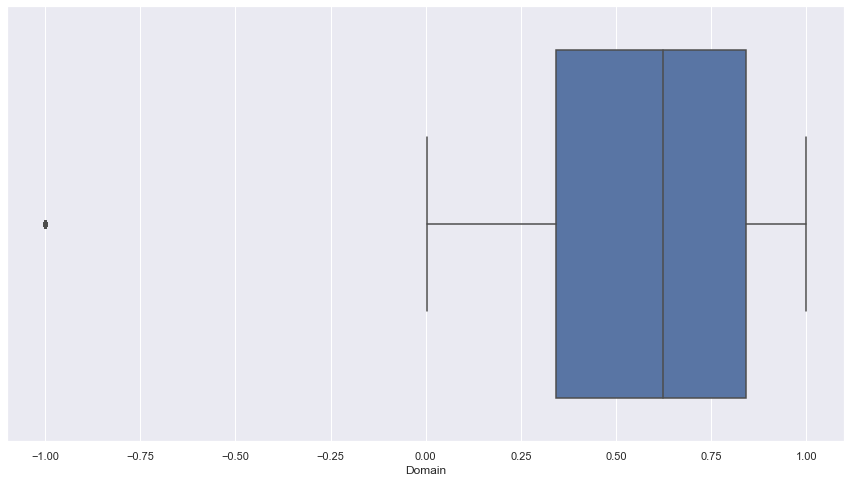

In [230]:
sns.boxplot(df_model['Domain'])

In [231]:
df_model['Domain'].describe()

count    3996.000000
mean        0.510430
std         0.468726
min        -1.000000
25%         0.342315
50%         0.622643
75%         0.842248
max         0.999910
Name: Domain, dtype: float64

In [232]:
values=df_model['Domain'][~(df_model['Domain']==-1)]

In [233]:
median_domain=values.median()
median_domain
#bcs of some negative '-1' values the median of domain shifted to 0.02 values down

0.649389714846691

In [234]:
for i in df_model[df_model['Domain']==-1].index:
    df_model.loc[i,'Domain']=median_domain

In [235]:
df_model[df_model['Domain']==-1]
#All values are imputed

Empty DataFrame
Columns: [Salary, Designation, JobCity, Gender, 10percentage, tenboard, 12percentage, twelveboard, CollegeTier, Degree, collegeGPA, CollegeCityTier, CollegeState, English, Logical, Quant, Domain, conscientiousness, agreeableness, extraversion, nueroticism, openess_to_experience, Experience, Age, Test_Percentage_updated2, yr_since_graduated, branches]
Index: []

In [236]:
df_model['Domain'].describe()
#now the median_domain has come closer to the overall previous domain_median.
#It is left skewed column though

count    3996.000000
mean        0.611969
std         0.264761
min         0.002750
25%         0.413838
50%         0.649390
75%         0.842248
max         0.999910
Name: Domain, dtype: float64

<AxesSubplot:xlabel='Domain', ylabel='Density'>

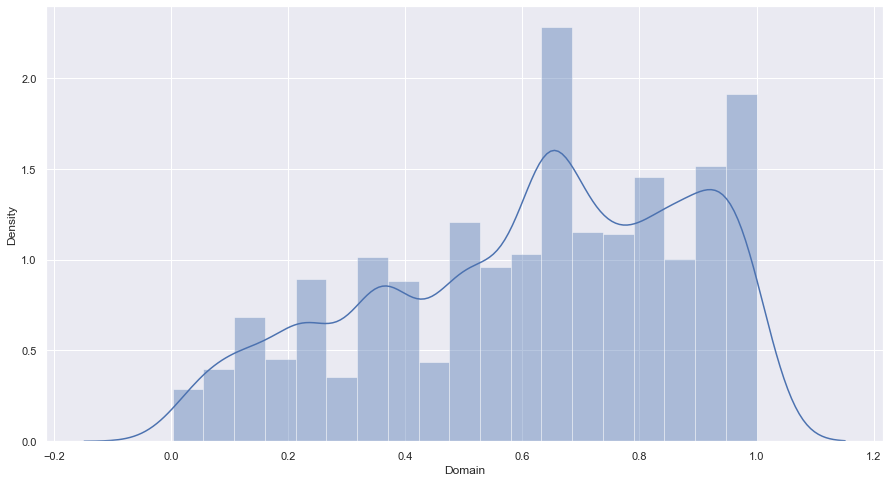

In [237]:
sns.distplot(df_model['Domain'])

In [238]:
#Treating test_percentage missing values.

In [239]:
df_model[df_model['Test_Percentage_updated2']==0]
#we should treat these 130 rows having '0' test scores

Salary Designation    JobCity Gender  10percentage     tenboard  \
35    350000     Manager     Others      f         85.00         CBSE   
47     95000   Developer        NCR      m         69.60        Other   
73    240000   Developer        NCR      m         75.00         CBSE   
83    145000      others     Others      m         80.00  State Board   
93    325000    Engineer        NCR      m         70.00        Other   
...      ...         ...        ...    ...           ...          ...   
3891  190000    Engineer    Kolkata      m         79.06  State Board   
3910  730000      others       Pune      m         84.67         CBSE   
3941  215000      others        NCR      m         74.00        Other   
3967  330000    Engineer       Pune      m         76.00  State Board   
3976  320000    Engineer  Hyderabad      f         89.70        Other   

      12percentage  twelveboard  CollegeTier       Degree  collegeGPA  \
35           61.00         CBSE            2  B.Tech/B.E.       64.98   
47           71.40        Other            2  B.Tech/B.E.       77.00   
73           64.00         CBSE            2  B.Tech/B.E.       67.00   
83           70.00  State Board            2  B.Tech/B.E.       55.00   
93           65.00         CBSE            2  B.Tech/B.E.       66.00   
...            ...          ...          ...          ...         ...   
3891         76.00  State Board            2  B.Tech/B.E.       70.14   
3910         86.46         CBSE            1  B.Tech/B.E.       85.80   
3941         66.00        Other            2  B.Tech/B.E.       62.00   
3967         89.80  State Board            2  B.Tech/B.E.       62.00   
3976         86.70        Other            2  B.Tech/B.E.       80.00   

      CollegeCityTier CollegeState  English  Logical  Quant    Domain  \
35                  0    WestIndia      570      475    430  0.649390   
47                  0    EastIndia      485      415    575  0.925646   
73                  0   NorthIndia      510      480    485  0.649390   
83                  1    WestIndia      430      450    385  0.649390   
93                  0      Central      405      470    545  0.649390   
...               ...          ...      ...      ...    ...       ...   
3891                0    WestIndia      630      570    535  0.649390   
3910                1    WestIndia      545      525    715  0.649390   
3941                0   SouthIndia      720      400    405  0.600644   
3967                0    WestIndia      595      530    630  0.649390   
3976                1   SouthIndia      720      675    570  0.649390   

      conscientiousness  agreeableness  extraversion  nueroticism  \
35              -0.4854        -0.5213        2.1129      -0.7350   
47              -0.4173         0.6568       -0.7794       1.7074   
73              -0.1590         0.8784        1.2396       0.2727   
83               0.1282        -0.1206        0.9322       1.5404   
93               0.4155         0.3789       -0.9122      -1.1218   
...                 ...            ...           ...          ...   
3891            -0.3027         0.2124       -0.6048       0.1459   
3910            -1.3447        -1.0593        0.6720       1.0024   
3941             0.1282         0.7119       -0.9122      -1.1218   
3967             0.5591         0.7119        0.0100      -0.2344   
3976             0.2718         1.2114        0.4711      -0.1076   

      openess_to_experience  Experience  Age  Test_Percentage_updated2  \
35                   1.8224         1.8   25                       0.0   
47                   0.1864         1.0   23                       0.0   
73                  -0.6692         0.8   23                       0.0   
83                   0.0973         0.2   22                       0.0   
93                  -0.8608         1.2   23                       0.0   
...                     ...         ...  ...                       ...   
3891                -0.4776 

<AxesSubplot:xlabel='Test_Percentage_updated2', ylabel='Density'>

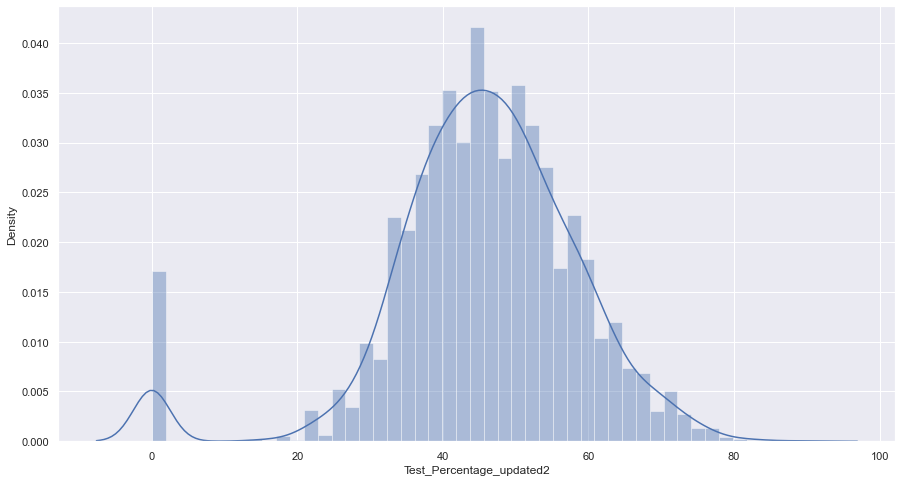

In [240]:
sns.distplot(df_model['Test_Percentage_updated2'])
#This data seems good and symmetric Its just because of the '0' value it is skewed so we should treat it. 

In [241]:
df['Test_Percentage_updated2'].describe()

count    3996.000000
mean       45.526689
std        13.306024
min         0.000000
25%        38.587500
50%        46.110000
75%        53.890000
max        89.330000
Name: Test_Percentage_updated2, dtype: float64

In [242]:
median_test=df_model[~(df_model['Test_Percentage_updated2']==0)]['Test_Percentage_updated2'].median()
#This is the median of all those scores which are not 0. We need to impute this

In [243]:
df_model[df_model['Test_Percentage_updated2']==0].index

Int64Index([  35,   47,   73,   83,   93,  110,  133,  171,  183,  212,
            ...
            3676, 3715, 3723, 3765, 3852, 3891, 3910, 3941, 3967, 3976],
           dtype='int64', length=130)

In [244]:
for i in df_model[df_model['Test_Percentage_updated2']==0].index:
    df_model.loc[i,'Test_Percentage_updated2']=median_test

In [245]:
df_model[df_model['Test_Percentage_updated2']==0]
#Successfully imputed

Empty DataFrame
Columns: [Salary, Designation, JobCity, Gender, 10percentage, tenboard, 12percentage, twelveboard, CollegeTier, Degree, collegeGPA, CollegeCityTier, CollegeState, English, Logical, Quant, Domain, conscientiousness, agreeableness, extraversion, nueroticism, openess_to_experience, Experience, Age, Test_Percentage_updated2, yr_since_graduated, branches]
Index: []

In [246]:
df_model['Test_Percentage_updated2'].describe()
#little shift  in median towards right after the imputation

count    3996.000000
mean       47.037663
std        10.360874
min        14.780000
25%        39.720000
50%        46.445000
75%        53.890000
max        89.330000
Name: Test_Percentage_updated2, dtype: float64

<AxesSubplot:xlabel='Test_Percentage_updated2', ylabel='Density'>

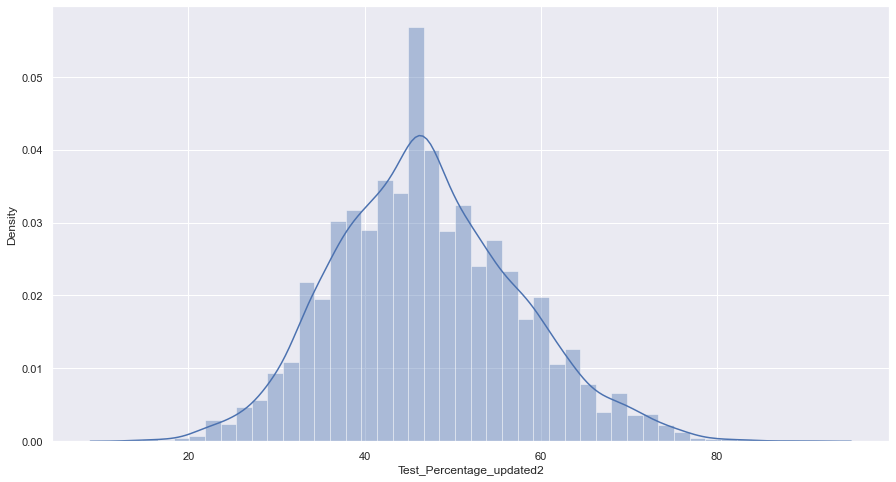

In [247]:
sns.distplot(df_model['Test_Percentage_updated2'])

In [248]:
#Treating negative Experience People.
#These people might have their date of joining and date of leaving flipped.

In [249]:
df_model[df_model['Experience']<0]

Salary Designation    JobCity Gender  10percentage     tenboard  \
29     220000    Engineer        NCR      m         64.00         CBSE   
92    1500000   Developer  Hyderabad      m         79.00  State Board   
148    105000   Developer  Hyderabad      m         73.08  State Board   
235    120000   Developer        NCR      f         74.00  State Board   
264    325000    Engineer     Others      f         85.28  State Board   
451    170000     Analyst  Hyderabad      m         86.80  State Board   
591    240000     Manager        NCR      f         60.00  State Board   
865    200000     Analyst  Hyderabad      m         92.83  State Board   
888    110000    Engineer       Pune      m         66.46  State Board   
1005   180000      others        NCR      m         79.00        Other   
1354   150000      others       Pune      f         63.00        Other   
1432    60000   Developer    Missing      m         59.00  State Board   
1481   190000     Trainee    Missing      m         73.83        Other   
1521   105000   Developer    Missing      m         63.00        Other   
1540   125000      others     Others      f         62.00         CBSE   
1590   120000   Developer    Missing      m         83.80         CBSE   
1635   315000    Engineer    Missing      m         94.20         CBSE   
1991   300000    Engineer  Hyderabad      m         89.00  State Board   
2043   190000    Engineer    Chennai      m         83.00  State Board   
2265   105000    Engineer     Others      f         77.40         CBSE   
2318   140000    Engineer        NCR      f         78.80         CBSE   
2348    75000   Developer    Missing      m         74.16  State Board   
2406   210000   Developer    Chennai      m         89.39  State Board   
2413   220000    Engineer        NCR      m         85.00         CBSE   
2804   240000    Engineer        NCR      m         78.80         CBSE   
2887   240000    Engineer    Missing      m         71.00  State Board   
2944   120000    Engineer   Banglore      m         75.00  State Board   
2975   120000    Engineer        NCR      m         58.33        Other   
3092   900000    Engineer        NCR      m         83.67         CBSE   
3093   100000     Analyst       Pune      f         82.60         CBSE   
3107   310000    Engineer     Others      m         69.00         CBSE   
3241   300000     Analyst        NCR      m         81.50         CBSE   
3302   145000    Engineer        NCR      m         66.50  State Board   
3382   120000   Developer    Missing      m         76.00         CBSE   
3389   270000      others    Missing      m         82.00  State Board   
3468   200000      others    Missing      m         79.60         CBSE   
3591   200000      others    Missing      m         70.00         CBSE   
3632   165000    Engineer     Others      m         91.00        Other   
3698    95000   Developer    Missing      m         60.20         CBSE   
3909   180000     Analyst     Others      m         64.00  State Board   

      12percentage  twelveboard  CollegeTier       Degree  collegeGPA  \
29           74.00         CBSE            2  B.Tech/B.E.       68.00   
92           87.90  State Board            2  B.Tech/B.E.       66.00   
148          71.20  State Board            2  B.Tech/B.E.       64.46   
235          60.00  State Board            2  B.Tech/B.E.       71.88   
264          71.50  State Board            2  B.Tech/B.E.       74.98   
451          88.40  State Board            2  B.Tech/B.E.       75.20   
591          73.00  State Board            2  B.Tech/B.E.       75.16   
865          91.90  State Board            2  B.Tech/B.E.       78.15   
888          62.81  State Board            2  B.Tech/B.E.       61.51   
1005         78.00        Other            2  B.Tech/B.E.       73.00   
1354         60.00         CBSE            2  B.Tech/B.E.       59.85   
1432         64.00  State Board            2          MCA       84.00   
1481         72.31     

In [250]:
 len(df_model[df_model['Experience']<0])
#Not a big no. of people.We should just do the absolute of these

40

In [251]:
df_model['Experience']=np.abs(df_model['Experience'])

In [252]:
df_model[df_model['Experience']<0]

Empty DataFrame
Columns: [Salary, Designation, JobCity, Gender, 10percentage, tenboard, 12percentage, twelveboard, CollegeTier, Degree, collegeGPA, CollegeCityTier, CollegeState, English, Logical, Quant, Domain, conscientiousness, agreeableness, extraversion, nueroticism, openess_to_experience, Experience, Age, Test_Percentage_updated2, yr_since_graduated, branches]
Index: []

In [253]:
#Treating and Checking Outliers.

<AxesSubplot:>

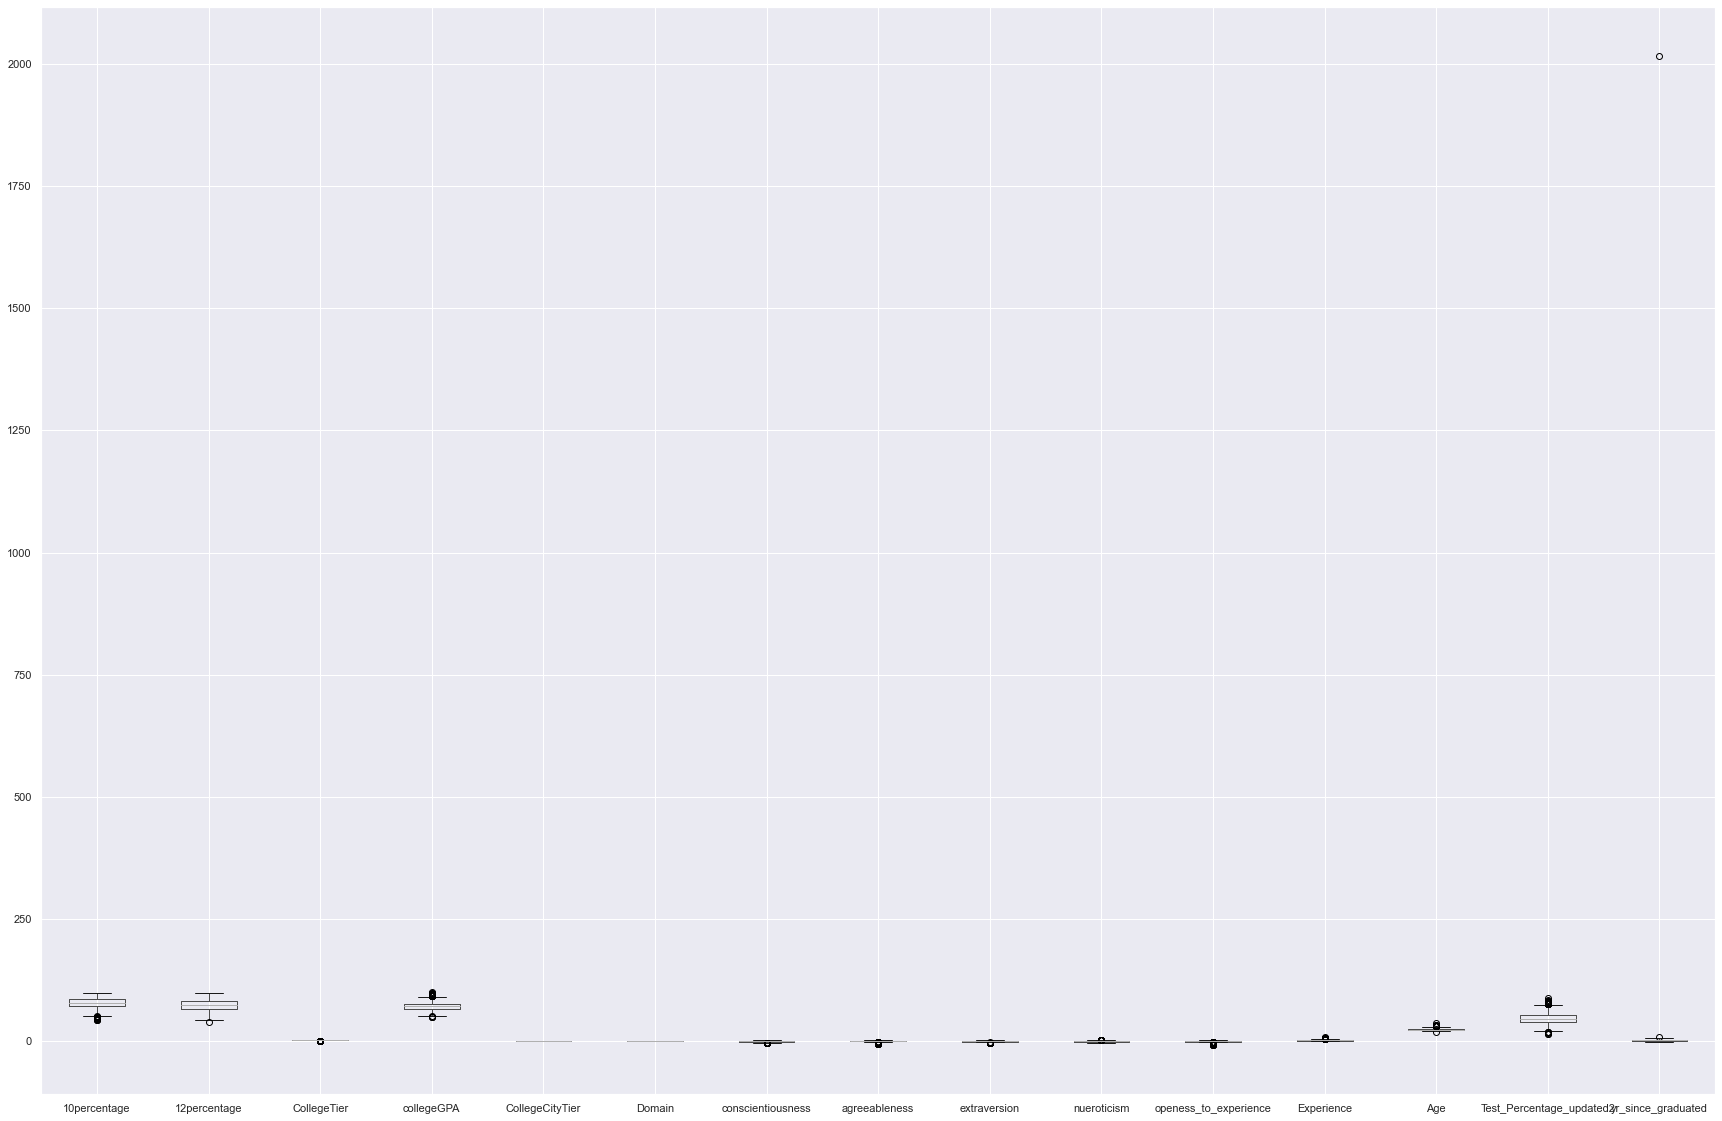

In [254]:
plt.figure(figsize=[30,20])
df_model.drop(['Salary','English','Logical','Quant'],axis=1).boxplot()
#These columns contain Little to no outliers

<AxesSubplot:>

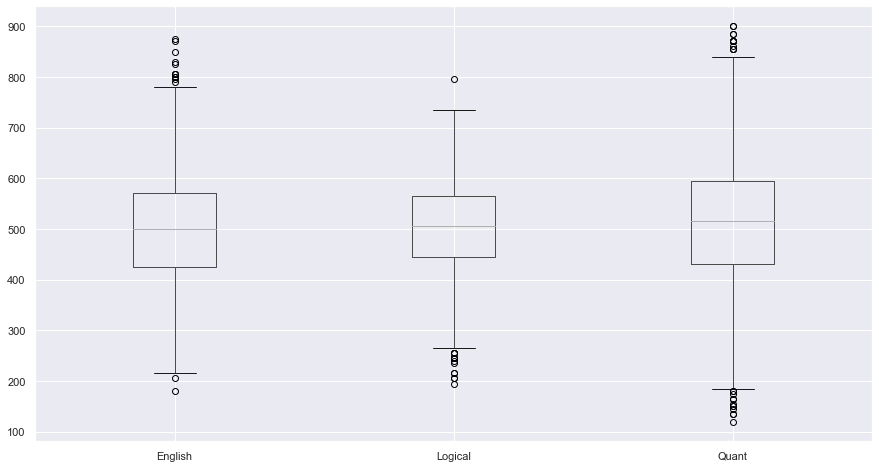

In [255]:
df_model.loc[:,['English','Logical','Quant']].boxplot()
#These columns have little to medium outliers in both directions

<AxesSubplot:xlabel='Salary'>

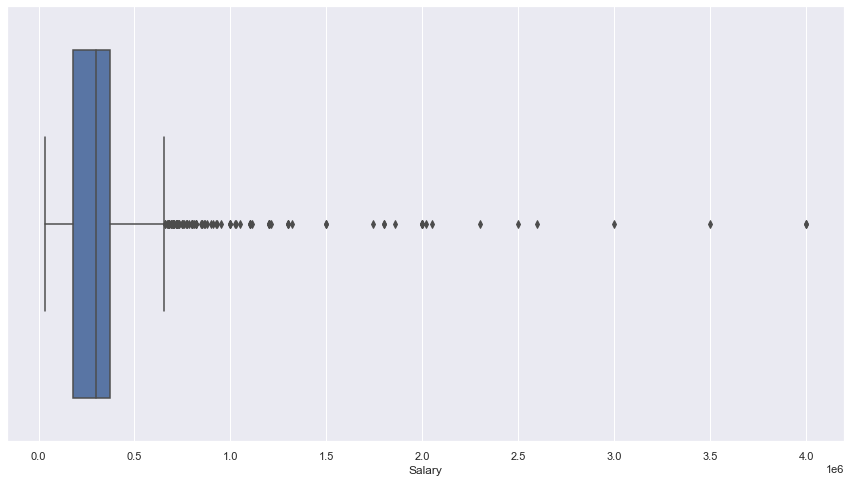

In [256]:
sns.boxplot(df_model['Salary'])
#Salary has huge number of outliers.

In [257]:
df['Salary'].describe()

count    3.996000e+03
mean     3.076124e+05
std      2.127341e+05
min      3.500000e+04
25%      1.800000e+05
50%      3.000000e+05
75%      3.700000e+05
max      4.000000e+06
Name: Salary, dtype: float64

<AxesSubplot:xlabel='Salary', ylabel='Density'>

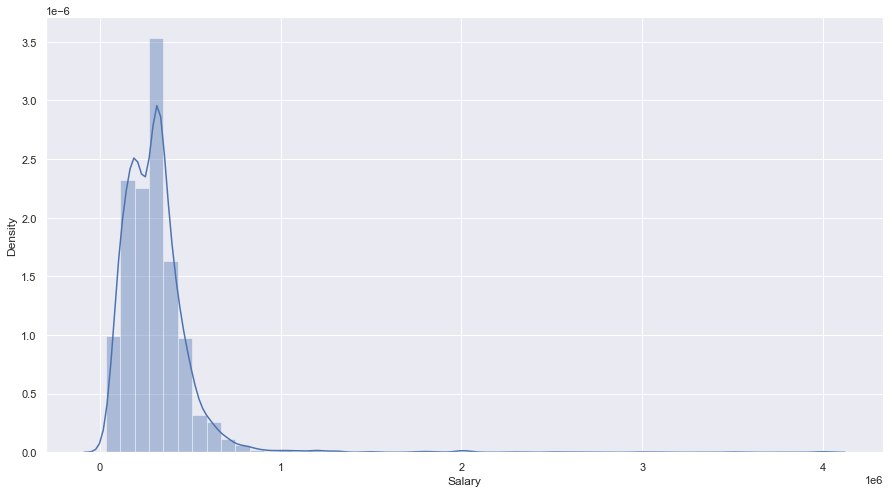

In [258]:
sns.distplot(df['Salary'])

In [259]:
#Lets remove Outliers using the IQR method

In [260]:
q1=df_model.quantile(0.25)
q3=df_model.quantile(0.75)
iqr=q3-q1
upper_limit=q3+1.5*iqr
lower_limit=q1-1.5*iqr
df_with_outliers=df_model[((df_model>upper_limit)|(df_model<lower_limit)).any(axis=1)]
df_without_outliers=df_model[~((df_model>upper_limit)|(df_model<lower_limit)).any(axis=1)]

In [261]:
print(df_with_outliers.shape)
print(df_without_outliers.shape)
#we ended up loosing about 25% of data.

(776, 27)
(3220, 27)


In [262]:
#For The time being lets proceed with this chunk of data.
df_without_outliers['Salary'].describe()

count      3220.000000
mean     275844.409938
std      120153.372332
min       35000.000000
25%      180000.000000
50%      280000.000000
75%      350000.000000
max      655000.000000
Name: Salary, dtype: float64

In [263]:
df_model['Salary'].describe()
#All the higher salary group forming a different cluster got erased.
#But let's proceed

count    3.996000e+03
mean     3.076124e+05
std      2.127341e+05
min      3.500000e+04
25%      1.800000e+05
50%      3.000000e+05
75%      3.700000e+05
max      4.000000e+06
Name: Salary, dtype: float64

In [264]:
df_without_outliers.dtypes

Salary                        int64
Designation                  object
JobCity                      object
Gender                       object
10percentage                float64
tenboard                     object
12percentage                float64
twelveboard                  object
CollegeTier                   int64
Degree                       object
collegeGPA                  float64
CollegeCityTier               int64
CollegeState                 object
English                       int64
Logical                       int64
Quant                         int64
Domain                      float64
conscientiousness           float64
agreeableness               float64
extraversion                float64
nueroticism                 float64
openess_to_experience       float64
Experience                  float64
Age                           int64
Test_Percentage_updated2    float64
yr_since_graduated            int64
branches                     object
dtype: object

In [265]:
#Lets get all numeriacl_columns separate
df_num=df_without_outliers.select_dtypes(include=['int64','float64'])

In [266]:
#Lets apply power Transformer and standard scaler.
from sklearn.preprocessing import PowerTransformer,StandardScaler
pt=PowerTransformer()
PT=pt.fit_transform(df_num)
sc=StandardScaler()
SC=sc.fit_transform(PT)

In [267]:
#Making DataFrame using the transformed Data.
d_trans=pd.DataFrame(SC,columns=df_num.columns)

In [268]:
#DataFrame using Categorical variables.
df_cat=df_without_outliers.select_dtypes(include='object')

In [269]:
#we should first reset inddex
d_trans.reset_index(drop=True,inplace=True)
df_cat.reset_index(drop=True,inplace=True)
df_before_dummies=pd.concat([d_trans,df_cat],axis=1)

In [270]:
df_before_dummies.shape

(3220, 27)

In [271]:
df_before_dummies.head()

Salary  10percentage  12percentage  CollegeTier  collegeGPA  \
0  1.163144      0.639551      1.926475          0.0    0.918009   
1  1.670018      0.777562      0.980190          0.0   -0.189900   
2  0.494797      0.727047     -0.546546          0.0   -0.198402   
3 -0.554851     -0.096943      0.244125          0.0    0.350077   
4  0.303416      1.374889      1.157321          0.0    0.686332   

   CollegeCityTier   English   Logical     Quant    Domain  conscientiousness  \
0        -0.629088  0.200736  1.033190  0.166192  0.038619           0.958361   
1        -0.629088  1.858839  1.352635  2.400072  1.487529          -0.887834   
2        -0.629088  1.143082  0.529467 -1.184687 -0.659391           0.127580   
3        -0.629088  0.489657  1.545952 -0.357483 -1.667559          -1.022680   
4        -0.629088  0.632031  0.654525  0.996991  0.092784          -0.476677   

   agreeableness  extraversion  nueroticism  openess_to_experience  \
0       0.712670      0.476774     1.521486              -0.568167   
1       0.106827      1.375890     0.107995               1.122332   
2       2.061267      0.042598    -0.662228               0.849670   
3      -0.734723     -1.288968     0.305509              -0.199913   
4      -1.134088     -2.482687    -0.532456              -1.023526   

   Experience       Age  Test_Percentage_updated2  yr_since_graduated  \
0    1.707517  0.456301                  0.325260            1.340380   
1    0.810839  1.011727                  0.555893            0.599349   
2    0.177198 -0.906136                 -0.237655           -1.062835   
3   -0.510582 -0.177969                 -2.268166            0.599349   
4    0.177198 -0.906136                  1.193141           -1.062835   

  Designation    JobCity Gender     tenboard  twelveboard       Degree  \
0    Engineer   Banglore      f        Other        Other  B.Tech/B.E.   
1     Manager     Others      m         CBSE         CBSE  B.Tech/B.E.   
2    Engineer    Chennai      f         CBSE         CBSE  B.Tech/B.E.   
3     Trainee        NCR      m         CBSE         CBSE  B.Tech/B.E.   
4    Engineer  Hyderabad      m  State Board  State Board  B.Tech/B.E.   

  CollegeState            branches  
0      Central          IT_related  
1      Central  electronic_related  
2   NorthIndia          IT_related  
3   NorthIndia  electronic_related  
4   SouthIndia  electronic_related

In [272]:
#df_model1 is the dataset created for modelling for 1st iteration 
df_model1=pd.get_dummies(df_before_dummies,drop_first=True)
df_model1.head()


Salary  10percentage  12percentage  CollegeTier  collegeGPA  \
0  1.163144      0.639551      1.926475          0.0    0.918009   
1  1.670018      0.777562      0.980190          0.0   -0.189900   
2  0.494797      0.727047     -0.546546          0.0   -0.198402   
3 -0.554851     -0.096943      0.244125          0.0    0.350077   
4  0.303416      1.374889      1.157321          0.0    0.686332   

   CollegeCityTier   English   Logical     Quant    Domain  conscientiousness  \
0        -0.629088  0.200736  1.033190  0.166192  0.038619           0.958361   
1        -0.629088  1.858839  1.352635  2.400072  1.487529          -0.887834   
2        -0.629088  1.143082  0.529467 -1.184687 -0.659391           0.127580   
3        -0.629088  0.489657  1.545952 -0.357483 -1.667559          -1.022680   
4        -0.629088  0.632031  0.654525  0.996991  0.092784          -0.476677   

   agreeableness  extraversion  nueroticism  openess_to_experience  \
0       0.712670      0.476774     1.521486              -0.568167   
1       0.106827      1.375890     0.107995               1.122332   
2       2.061267      0.042598    -0.662228               0.849670   
3      -0.734723     -1.288968     0.305509              -0.199913   
4      -1.134088     -2.482687    -0.532456              -1.023526   

   Experience       Age  Test_Percentage_updated2  yr_since_graduated  \
0    1.707517  0.456301                  0.325260            1.340380   
1    0.810839  1.011727                  0.555893            0.599349   
2    0.177198 -0.906136                 -0.237655           -1.062835   
3   -0.510582 -0.177969                 -2.268166            0.599349   
4    0.177198 -0.906136                  1.193141           -1.062835   

   Designation_Developer  Designation_Engineer  Designation_Manager  \
0                      0                     1                    0   
1                      0                     0                    1   
2                      0                     1                    0   
3                      0                     0                    0   
4                      0                     1                    0   

   Designation_Trainee  Designation_others  JobCity_Chennai  \
0                    0                   0                0   
1                    0                   0                0   
2                    0                   0                1   
3                    1                   0                0   
4                    0                   0                0   

   JobCity_Hyderabad  JobCity_Kolkata  JobCity_Missing  JobCity_Mumbai  \
0                  0                0                0               0   
1                  0                0                0               0   
2                  0                0                0               0   
3                  0                0                0               0   
4                  1                0                0               0   

   JobCity_NCR  JobCity_Others  JobCity_Pune  Gender_m  tenboard_Other  \
0            0               0             0         0               1   
1            0               1             0         1               0   
2            0               0             0         0               0   
3            1               0             0         1               0   
4            0               0             0         1               0   

   tenboard_State Board  twelveboard_Other  twelveboard_State Board  \
0                     0                  1                        0   
1                     0                  0                        0   
2                     0                  0                        0   
3                     0                  0                        0   
4                     1                  0                        1   

   Degree_M.Sc. (Tech.)  Degree_M.Tech./M.E.  Degree_MCA  \
0                     0                    0           0   
1     

In [273]:
df_model1.shape

(3220, 46)

In [274]:
#Lets do train test split
from sklearn.model_selection import train_test_split
x=df_model1.drop('Salary',axis=1)
y=df_model1['Salary']
xtrain1,xtest1,ytrain1,ytest1=train_test_split(x,y,random_state=1,test_size=0.2)
lr1=LinearRegression()
import statsmodels.api as sma
xtrain_1=sma.add_constant(xtrain1)
ols1=sma.OLS(ytrain1,xtrain_1).fit()
ols1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.489
Model:                            OLS   Adj. R-squared:                  0.480
Method:                 Least Squares   F-statistic:                     54.95
Date:                Tue, 19 Apr 2022   Prob (F-statistic):               0.00
Time:                        15:54:41   Log-Likelihood:                -2790.1
No. Observations:                2576   AIC:                             5670.
Df Residuals:                    2531   BIC:                             5934.
Df Model:                          44                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                           0.3356      0.077      4.358      0.000       0.185       0.487
10percentage                    0.0577      0.021      2.802      0.005       0.017       0.098
12percentage                    0.0621      0.022      2.883      0.004       0.020       0.104
CollegeTier                 -1.467e-15   1.26e-15     -1.168      0.243   -3.93e-15    9.97e-16
collegeGPA                      0.0985      0.018      5.608      0.000       0.064       0.133
CollegeCityTier                 0.0282      0.019      1.508      0.132      -0.008       0.065
English                         0.0808      0.017      4.739      0.000       0.047       0.114
Logical                         0.0173      0.017      0.991      0.322      -0.017       0.052
Quant                           0.1175      0.018      6.483      0.000       0.082       0.153
Domain                         -0.0268      0.026     -1.011      0.312      -0.079       0.025
conscientiousness              -0.0079      0.017     -0.464      0.643      -0.042       0.026
agreeableness                   0.0080      0.018      0.445      0.656      -0.027       0.043
extraversion                    0.0314      0.016      1.955      0.051      -0.000       0.063
nueroticism                    -0.0062      0.016     -0.386      0.699      -0.037       0.025
openess_to_experience          -0.0127      0.017     -0.770      0.442      -0.045       0.020
Experience                      0.4615      0.017     26.399      0.000       0.427       0.496
Age                             0.0100      0.025      0.404      0.687      -0.038       0.058
Test_Percentage_updated2        0.1087      0.031      3.470      0.001       0.047       0.170
yr_since_graduated             -0.0714      0.025     -2.805      0.005      -0.121      -0.021
Designation_Developer          -0.2419      0.056     -4.296      0.000      -0.352      -0.131
Designation_Engineer            0.0323      0.049      0.664      0.507      -0.063       0.128
Designation_Manager             0.3427      0.101      3.396      0.001       0.145       0.541
Designation_Trainee            -0.1261      0.098     -1.292      0.197      -0.317       0.065
Designation_others             -0.3205      0.060     -5.374      0.000      -0.437      -0.204
JobCity_Chennai                -0.2189      0.062     -3.536      0.000      -0.340      -0.098
JobCity_Hyderabad              -0.2450      0.060     -4.074      0.000      -0.363      -0.127
JobCity_Kolkata                -0.4892      0.091     -5.387      0.000      -0.667      -0.311
JobCity_Missing                -0.2677      0.057     -4.725      0.000      -0.379      -0.157
JobCity_Mumbai                  0.0163      0.083      0.195      0.845      -0.147       0.180
JobCity_NCR

In [275]:
ols1.pvalues.sort_values()[ols1.pvalues.sort_values()>0.05]

extraversion                   0.050743
JobCity_Pune                   0.055675
CollegeState_SouthIndia        0.069617
Degree_MCA                     0.071558
twelveboard_State Board        0.121967
CollegeCityTier                0.131678
Designation_Trainee            0.196536
tenboard_Other                 0.216220
CollegeTier                    0.243052
Degree_M.Tech./M.E.            0.247490
branches_electronic_related    0.265913
Degree_M.Sc. (Tech.)           0.285913
Domain                         0.311990
Logical                        0.322007
tenboard_State Board           0.344321
openess_to_experience          0.441643
Designation_Engineer           0.506814
twelveboard_Other              0.514646
CollegeState_NorthIndia        0.518821
CollegeState_WestIndia         0.549854
CollegeState_EastIndia         0.605313
conscientiousness              0.642986
agreeableness                  0.656025
Age                            0.686522
nueroticism                    0.699246


In [276]:
ols1.pvalues.sort_values()[ols1.pvalues.sort_values()>0.05].count()

27

In [277]:
# These 27 columns out of 46 have very high pvalue which is itself high in number.
# weird is college Tier has very high pvalue that was not expected.
# this '0.0' value is scaled so This represents the Tier2 people.Tier1 doesnt represent Data.
# So here its clearly visible that College City tier for now has no value in modelling.

In [278]:
df_model['CollegeTier'].value_counts()

2    3699
1     297
Name: CollegeTier, dtype: int64

In [279]:
df_without_outliers['CollegeTier'].value_counts()

2    3220
Name: CollegeTier, dtype: int64

In [280]:
df_with_outliers['CollegeTier'].value_counts()

2    479
1    297
Name: CollegeTier, dtype: int64

In [281]:
df_model.head()

Salary Designation   JobCity Gender  10percentage tenboard  12percentage  \
0   420000    Engineer  Banglore      f          84.3    Other          95.8   
1   500000     Manager    Others      m          85.4     CBSE          85.0   
2   325000    Engineer   Chennai      f          85.0     CBSE          68.2   
3  1100000    Engineer       NCR      m          85.6     CBSE          83.6   
4   200000     Trainee       NCR      m          78.0     CBSE          76.8   

  twelveboard  CollegeTier       Degree  collegeGPA  CollegeCityTier  \
0       Other            2  B.Tech/B.E.       78.00                0   
1        CBSE            2  B.Tech/B.E.       70.06                0   
2        CBSE            2  B.Tech/B.E.       70.00                0   
3        CBSE            1  B.Tech/B.E.       74.64                1   
4        CBSE            2  B.Tech/B.E.       73.90                0   

  CollegeState  English  Logical  Quant    Domain  conscientiousness  \
0      Central      515      585    525  0.635979             0.9737   
1      Central      695      610    780  0.960603            -0.7335   
2   NorthIndia      615      545    370  0.450877             0.2718   
3   NorthIndia      635      585    625  0.974396             0.0464   
4   NorthIndia      545      625    465  0.124502            -0.8810   

   agreeableness  extraversion  nueroticism  openess_to_experience  \
0         0.8128        0.5269      1.35490                -0.4455   
1         0.3789        1.2396     -0.10760                 0.8637   
2         1.7109        0.1637     -0.86820                 0.6721   
3         0.3448       -0.3440     -0.40780                -0.9194   
4        -0.2793       -1.0697      0.09163                -0.1295   

   Experience  Age  Test_Percentage_updated2  yr_since_graduated  \
0         3.6   25                     49.44                   4   
1         2.3   26                     51.78                   3   
2         1.6   23                     43.89                   1   
3         4.5   26                     68.33                   4   
4         1.0   24                     25.89                   3   

             branches  
0          IT_related  
1  electronic_related  
2          IT_related  
3          IT_related  
4  electronic_related

<AxesSubplot:xlabel='Salary', ylabel='Density'>

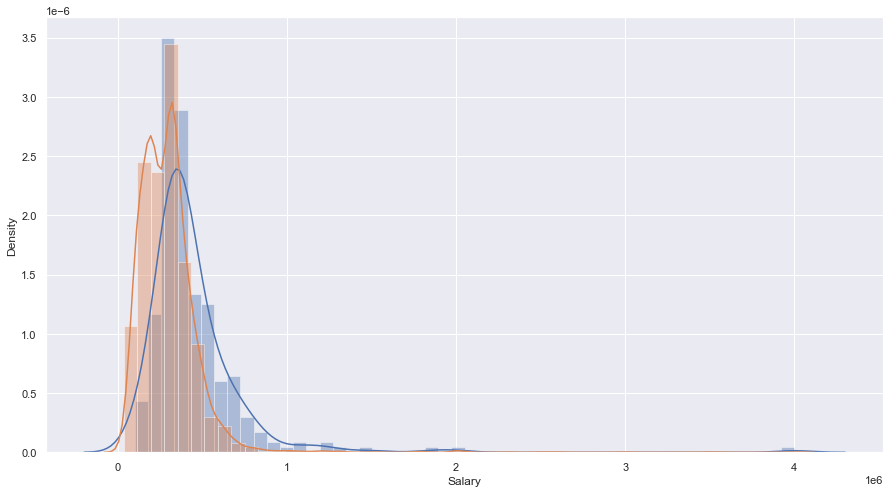

In [282]:
sns.distplot(df_model.loc[df_model['CollegeTier']==1,'Salary'])
sns.distplot(df_model.loc[df_model['CollegeTier']==2,'Salary'])
#This distplot shows The population representation for both the college Tiers were different and 
#they were signifiacant untill outlier removal.

In [283]:
#Interesting finding is that the Outlier removal removed the entile CollegeTier that is 1.
#So this data is less representative means that there were 2 clusters in data 
#we have to go on with separate analysis of these two cluster.

In [284]:
df_without_outliers.head()

Salary Designation    JobCity Gender  10percentage     tenboard  \
0  420000    Engineer   Banglore      f         84.30        Other   
1  500000     Manager     Others      m         85.40         CBSE   
2  325000    Engineer    Chennai      f         85.00         CBSE   
4  200000     Trainee        NCR      m         78.00         CBSE   
5  300000    Engineer  Hyderabad      m         89.92  State Board   

   12percentage  twelveboard  CollegeTier       Degree  collegeGPA  \
0          95.8        Other            2  B.Tech/B.E.       78.00   
1          85.0         CBSE            2  B.Tech/B.E.       70.06   
2          68.2         CBSE            2  B.Tech/B.E.       70.00   
4          76.8         CBSE            2  B.Tech/B.E.       73.90   
5          87.0  State Board            2  B.Tech/B.E.       76.32   

   CollegeCityTier CollegeState  English  Logical  Quant    Domain  \
0                0      Central      515      585    525  0.635979   
1                0      Central      695      610    780  0.960603   
2                0   NorthIndia      615      545    370  0.450877   
4                0   NorthIndia      545      625    465  0.124502   
5                0   SouthIndia      560      555    620  0.649390   

   conscientiousness  agreeableness  extraversion  nueroticism  \
0             0.9737         0.8128        0.5269      1.35490   
1            -0.7335         0.3789        1.2396     -0.10760   
2             0.2718         1.7109        0.1637     -0.86820   
4            -0.8810        -0.2793       -1.0697      0.09163   
5            -0.3027        -0.6201       -2.2954     -0.74150   

   openess_to_experience  Experience  Age  Test_Percentage_updated2  \
0                -0.4455         3.6   25                     49.44   
1                 0.8637         2.3   26                     51.78   
2                 0.6721         1.6   23                     43.89   
4                -0.1295         1.0   24                     25.89   
5                -0.8608         1.6   23                     58.44   

   yr_since_graduated            branches  
0                   4          IT_related  
1                   3  electronic_related  
2                   1          IT_related  
4                   3  electronic_related  
5                   1  electronic_related

# Let's again do Anova and Post-HOC test 

In [285]:
#For All tests we will use tha data that we derived before creating dummies.
#Because dummy created data should only be used for running models

In [286]:
df_before_dummies.select_dtypes(include='object').columns

Index(['Designation', 'JobCity', 'Gender', 'tenboard', 'twelveboard', 'Degree',
       'CollegeState', 'branches'],
      dtype='object')

In [287]:
df_before_dummies['Degree'].value_counts()

B.Tech/B.E.      2995
MCA               192
M.Tech./M.E.       32
M.Sc. (Tech.)       1
Name: Degree, dtype: int64

In [288]:
#degree has very bad categorization only one guy in "MSC" this would creadte problem in shapiro test because of only one guy
#so test wd be done dropping this column.

In [289]:
for i in df_before_dummies.select_dtypes(include='object').drop('Degree',axis=1).columns:
    for j in df_before_dummies[i].unique():
        print(i+j,shapiro(df_before_dummies.loc[df_before_dummies[i]==j,'Salary']))
#This result shows that even after power transformed These are not normal yet for the anova test to be reliable. on them  

DesignationEngineer ShapiroResult(statistic=0.9844082593917847, pvalue=1.512536298466094e-12)
DesignationManager ShapiroResult(statistic=0.9805293679237366, pvalue=0.2084532231092453)
DesignationTrainee ShapiroResult(statistic=0.9803531765937805, pvalue=0.1968948245048523)
DesignationDeveloper ShapiroResult(statistic=0.9680601954460144, pvalue=5.924035706428299e-10)
DesignationAnalyst ShapiroResult(statistic=0.971747100353241, pvalue=2.9724319574597757e-06)
Designationothers ShapiroResult(statistic=0.9631991982460022, pvalue=5.997587315675901e-09)
JobCityBanglore ShapiroResult(statistic=0.9818093180656433, pvalue=1.8106467223333311e-06)
JobCityOthers ShapiroResult(statistic=0.9710133075714111, pvalue=1.8150023706198226e-08)
JobCityChennai ShapiroResult(statistic=0.957844614982605, pvalue=5.697473284271837e-07)
JobCityNCR ShapiroResult(statistic=0.9840446710586548, pvalue=5.049527089795447e-07)
JobCityHyderabad ShapiroResult(statistic=0.9813601970672607, pvalue=0.0004090963921044022)
Jo

In [290]:
anova_lm(anova_model)
#This is anova done on the raw model(This model was with outlier and without power transformation scaling). This result shows that college_state and degree type aren't signifiacnt variables

df        sum_sq       mean_sq          F        PR(>F)
Designation      5.0  5.672300e+12  1.134460e+12  26.976049  6.396077e-27
JobCity          8.0  2.647368e+12  3.309210e+11   7.868889  1.500368e-10
Gender           1.0  1.818514e+11  1.818514e+11   4.324199  3.763815e-02
tenboard         2.0  4.276080e+12  2.138040e+12  50.839933  1.579971e-22
twelveboard      2.0  1.699405e+11  8.497024e+10   2.020487  1.327273e-01
Degree           3.0  2.654941e+11  8.849803e+10   2.104373  9.751159e-02
CollegeState     4.0  3.161145e+11  7.902864e+10   1.879203  1.111992e-01
branches         2.0  3.961741e+11  1.980871e+11   4.710265  9.052793e-03
Residual      3968.0  1.668716e+14  4.205434e+10        NaN           NaN

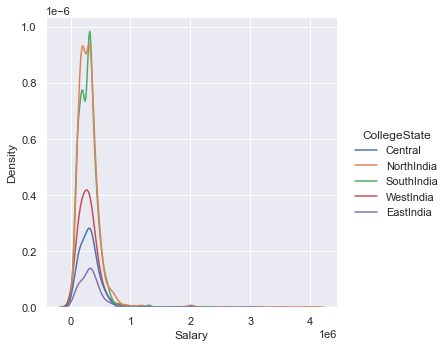

In [291]:
sns.displot(x=df_model['Salary'],hue='CollegeState',data=df_model,kind='kde')
#It is proved from anova as well as from displot that College_state is Pathethic predictor
#here all the categories are overlapping.

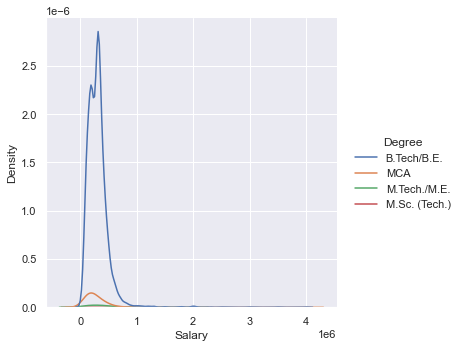

In [292]:
sns.displot(x=df_model['Salary'],hue='Degree',data=df_model,kind='kde')
#Here with respect of Degree the maximum representation of Btech that is around 95%
#Its good to drop this column

In [293]:
df_model['Degree'].value_counts()

B.Tech/B.E.      3698
MCA               243
M.Tech./M.E.       53
M.Sc. (Tech.)       2
Name: Degree, dtype: int64

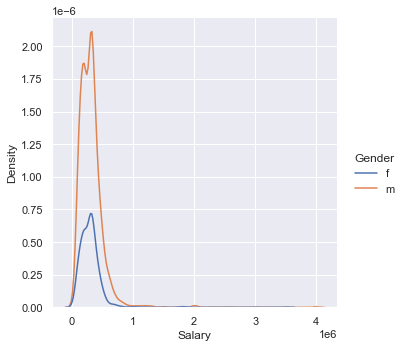

In [294]:
sns.displot(x=df_model['Salary'],hue='Gender',data=df_model,kind='kde')
#Gender has less representation of feamles and It doesnt seem sgnifacant in salary determination.
#Its good to drop this column.

In [295]:
df_model['Gender'].value_counts()
#There is no such role of gender in salary determination.

m    3040
f     956
Name: Gender, dtype: int64

# Anova on Outlier Removed and Transformed Data

In [296]:
#Though This test output is not that relaiable due to not meeting normality assumption.

In [297]:
import statsmodels.formula.api as sm 
from statsmodels.stats.anova import anova_lm 
anova_model1 = sm.ols('Salary ~ Designation+JobCity+Gender+tenboard+twelveboard+Degree+CollegeState+branches', data = df_before_dummies).fit()
anova_lm(anova_model1)
#Even after outlier removal and transformation These columns like collegeState and Gender are problematic
#This time after outlier removal and transformation degree become signifiacant.

df       sum_sq    mean_sq          F        PR(>F)
Designation      5.0   309.556201  61.911240  76.706603  3.827916e-76
JobCity          8.0   175.816571  21.977071  27.229086  3.185214e-41
Gender           1.0     0.787550   0.787550   0.975756  3.233237e-01
tenboard         2.0   117.464911  58.732455  72.768162  1.248715e-31
twelveboard      2.0    18.363303   9.181651  11.375855  1.194134e-05
Degree           3.0     7.844350   2.614783   3.239657  2.124058e-02
CollegeState     4.0     5.361122   1.340280   1.660577  1.563314e-01
branches         2.0     8.486994   4.243497   5.257595  5.253008e-03
Residual      3192.0  2576.318999   0.807117        NaN           NaN

In [298]:
import statsmodels.stats.multicomp as multi_comp
from statsmodels.stats.multicomp import pairwise_tukeyhsd
# Perform Comparison Between Categories..
analysis1 = multi_comp.MultiComparison(data = df_before_dummies["Salary"], groups = df_before_dummies["Degree"])
pc1 = analysis.tukeyhsd()
pc1.summary()
#This time we are taking degree for analysis

<class 'statsmodels.iolib.table.SimpleTable'>

In [299]:
#This post hoc test shows that the B.tech group is different from the other groups except MCA.
#Because value counts of MCA is less so it too is not significant category for prediction. And Entire column can be dropped.

In [300]:
analysis2 = multi_comp.MultiComparison(data = df_before_dummies["Salary"], groups = df_before_dummies["CollegeState"])
pc2 = analysis2.tukeyhsd()
pc2.summary()
#This time we are taking CollegeState for analysis

<class 'statsmodels.iolib.table.SimpleTable'>

In [301]:
#Insights can be generated that irrespective of any college state.state salary has no effect on it.

In [302]:
df_before_dummies.columns

Index(['Salary', '10percentage', '12percentage', 'CollegeTier', 'collegeGPA',
       'CollegeCityTier', 'English', 'Logical', 'Quant', 'Domain',
       'conscientiousness', 'agreeableness', 'extraversion', 'nueroticism',
       'openess_to_experience', 'Experience', 'Age',
       'Test_Percentage_updated2', 'yr_since_graduated', 'Designation',
       'JobCity', 'Gender', 'tenboard', 'twelveboard', 'Degree',
       'CollegeState', 'branches'],
      dtype='object')

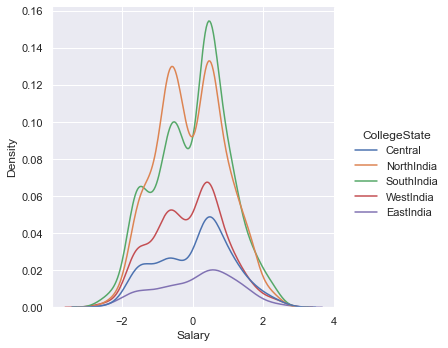

In [303]:
sns.displot(x=df_before_dummies['Salary'],kind='kde',hue='CollegeState',data=df_before_dummies)

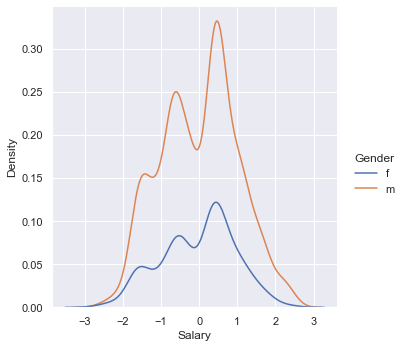

In [304]:
sns.displot(x=df_before_dummies['Salary'],kind='kde',hue='Gender',data=df_before_dummies)

# Checking all Statistical Assumptions on updated OLS model(on df_model1)

## linearity

In [305]:
# H0: Data is Linear
# Ha: Data is non Linear
import statsmodels.api as sma
sma.stats.diagnostic.linear_rainbow(ols1)
#Thsi shows data is linear 

(0.9083881887712447, 0.9562972016583451)

## Normality of residuals

In [306]:
# H0: residuals are normal
# Ha: residuals are not normal
shapiro(ols1.resid)
#This shows that residuals are not normal.

ShapiroResult(statistic=0.9985697269439697, pvalue=0.02580394595861435)

<AxesSubplot:>

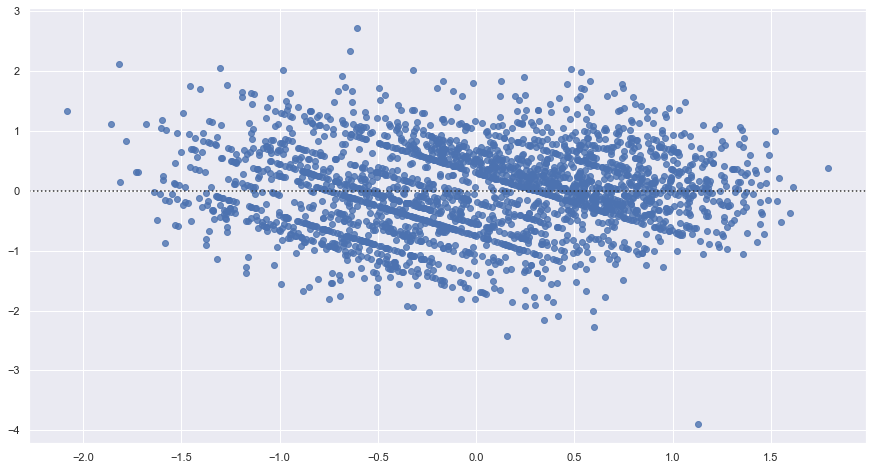

In [307]:
#Residual plot
sns.residplot(ols1.fittedvalues,ols1.resid)
#this residplot shows that there are still outliers present.
#There is changing variance across the line of fit

## Heterooscedasticity 

In [308]:
#H0: No heteroscedasticity is present
#Ha: heteroscedasticity is present
predictors = xtrain1

from statsmodels.stats.diagnostic import het_breuschpagan

test = het_breuschpagan(ols1.resid, predictors)
print(test[-1])
#This shows heteroscedasticity is present in data

4.1296048427897456e-191


## Q-Q plot 

((array([-3.46104375, -3.21463524, -3.07822285, ...,  3.07822285,
          3.21463524,  3.46104375]),
  array([-3.88670705, -2.42532552, -2.26653469, ...,  2.12199884,
          2.34141389,  2.71582313])),
 (0.7149479125567928, 2.0169281510139433e-16, 0.9990839104735685))

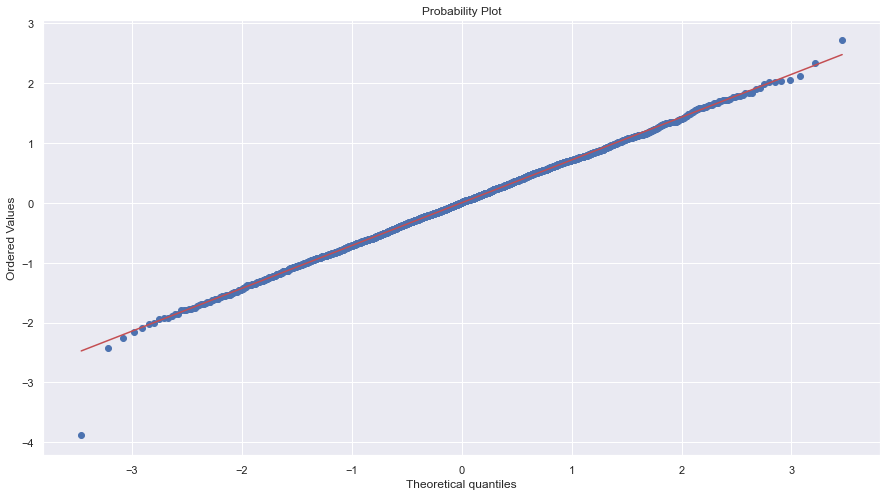

In [309]:
from scipy.stats import probplot
probplot(ols1.resid,plot=plt)

## Multicollinearity

In [310]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
my_list=[]
vf=df_model1.drop('Salary',axis=1)
for i in range(vf.shape[1]):
    my_list.append(variance_inflation_factor(vf.values,i))
vif_ols1=pd.DataFrame({"Features":vf.columns, "VIF":my_list}).sort_values(ascending = False, by = "VIF")
vif_ols1

Features       VIF
35      twelveboard_State Board  7.491089
33         tenboard_State Board  7.145968
32               tenboard_Other  5.614154
34            twelveboard_Other  5.601788
16     Test_Percentage_updated2  4.659598
19         Designation_Engineer  4.555789
31                     Gender_m  4.247425
41      CollegeState_SouthIndia  4.164605
40      CollegeState_NorthIndia  3.985514
8                        Domain  3.347875
17           yr_since_graduated  3.120039
15                          Age  2.964146
28                  JobCity_NCR  2.911159
43  branches_electronic_related  2.841497
42       CollegeState_WestIndia  2.484234
18        Designation_Developer  2.309035
1                  12percentage  2.307369
0                  10percentage  2.111598
22           Designation_others  1.987896
29               JobCity_Others  1.987794
4               CollegeCityTier  1.690431
26              JobCity_Missing  1.661952
7                         Quant  1.603170
10                agreeableness  1.566528
24            JobCity_Hyderabad  1.556179
30                 JobCity_Pune  1.553113
3                    collegeGPA  1.531157
6                       Logical  1.525226
14                   Experience  1.504077
39       CollegeState_EastIndia  1.475799
23              JobCity_Chennai  1.463911
9             conscientiousness  1.454852
5                       English  1.430377
38                   Degree_MCA  1.427991
13        openess_to_experience  1.356095
44              branches_others  1.330386
27               JobCity_Mumbai  1.280537
11                 extraversion  1.270829
20          Designation_Manager  1.259675
12                  nueroticism  1.256113
21          Designation_Trainee  1.232597
25              JobCity_Kolkata  1.225338
37          Degree_M.Tech./M.E.  1.103062
36         Degree_M.Sc. (Tech.)  1.018790
2                   CollegeTier       NaN

In [311]:
#VIF=NAN for college tier is because it has only one value.
#d_trans is dataFrame that has only numerical columns and hence we are checking vif for only numerical columns
from statsmodels.stats.outliers_influence import variance_inflation_factor
my_list2=[]
vf_num=d_trans.drop('Salary',axis=1)
for i in range(vf_num.shape[1]):
    my_list2.append(variance_inflation_factor(vf_num.values,i))
vif_ols1_num=pd.DataFrame({"Features":vf_num.columns, "VIF":my_list2}).sort_values(ascending = False, by = "VIF")
vif_ols1_num
#considering issue of vif as such no multicollinearity present.

Features       VIF
16  Test_Percentage_updated2  2.935758
8                     Domain  2.855849
17        yr_since_graduated  2.643566
15                       Age  2.429555
1               12percentage  1.958394
0               10percentage  1.875548
10             agreeableness  1.537554
6                    Logical  1.497400
7                      Quant  1.467649
14                Experience  1.436159
9          conscientiousness  1.431981
5                    English  1.363048
13     openess_to_experience  1.326885
3                 collegeGPA  1.263608
11              extraversion  1.258972
12               nueroticism  1.232042
4            CollegeCityTier  1.038929
2                CollegeTier       NaN

In [312]:
#Weird observation is that with transformed and removed outlier data multicollinearity reduced to such a huge extent.

## Autocorrelation of errors

In [313]:
from statsmodels.stats.stattools import durbin_watson
durbin_watson(ols1.resid)
#Durbin watson shows that there is no autocorrelation of errors

2.017150408162293

# Finding Test output

In [314]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
lr1=LinearRegression()
pred1=lr1.fit(xtrain1,ytrain1).predict(xtest1)
print('r2_score',r2_score(ytest1,pred1))
print('rmse',np.sqrt((mean_squared_error(ytest1,pred1))))
#rmse is so short just because scale of data has been shortened by standard scaler

r2_score 0.46330595462979873
rmse 0.7342393914193167


In [315]:
from sklearn.model_selection import cross_validate
lr_cross=LinearRegression()
x_cross=df_model1.drop('Salary',axis=1)
y_cross=df_model1.Salary
output_cross=cross_validate(estimator=lr_cross,X=x_cross,y=y_cross,cv=8,return_train_score=True)
output_cross_df=pd.DataFrame({'Train_score':output_cross['train_score'],'Test_score':output_cross['test_score']})
# Model doesnt seem overfit as earlier 

In [316]:
output_cross_df

Train_score  Test_score
0     0.489207    0.452309
1     0.482857    0.499026
2     0.477621    0.534103
3     0.491533    0.442598
4     0.495896    0.407156
5     0.485984    0.479350
6     0.490417    0.447607
7     0.483575    0.489314

In [317]:
print('train_mean',output_cross_df['Train_score'].mean())
print('train_std',output_cross_df['Train_score'].std())
print('test_mean',output_cross_df['Test_score'].mean())
print('test_std',output_cross_df['Test_score'].std())
#Very surprising facts like after outlier removal and transformation:
#model became good fit from overfit,scores improved a lot,multicollinearity reduced.

train_mean 0.48713614110932807
train_std 0.005781413427821115
test_mean 0.46893286202006246
test_std 0.039492615611121114


In [318]:
# Returning the Best Features using Backward Elimination Approach

from mlxtend.feature_selection import SequentialFeatureSelector as sfs

lin_sfs = LinearRegression()
# forward = True : Forward Selection Method...

sfsModel = sfs(estimator = lin_sfs, k_features = "best", forward=False, cv = 5, scoring = "r2") 

sfsModel.fit(x_cross, y_cross)
# x_cross and Y_cross variable created previously created while doing cross validation.

print("Best Features: ", sfsModel.k_feature_names_)
print("R2 Score: ", sfsModel.k_score_)

Best Features:  ('10percentage', '12percentage', 'CollegeTier', 'collegeGPA', 'CollegeCityTier', 'English', 'Quant', 'Domain', 'extraversion', 'openess_to_experience', 'Experience', 'Age', 'Test_Percentage_updated2', 'Designation_Developer', 'Designation_Manager', 'Designation_Trainee', 'Designation_others', 'JobCity_Chennai', 'JobCity_Hyderabad', 'JobCity_Kolkata', 'JobCity_Missing', 'JobCity_NCR', 'JobCity_Others', 'JobCity_Pune', 'Gender_m', 'twelveboard_State Board', 'Degree_M.Tech./M.E.', 'Degree_MCA', 'CollegeState_NorthIndia', 'CollegeState_SouthIndia')
R2 Score:  0.47399837076047746


In [319]:
len(sfsModel.k_feature_names_)
#Sequential feature selector returns 29 features.

30

In [320]:
#let's see which features are not in these features
set_sfs=set(x_cross.columns)-set(sfsModel.k_feature_names_)
#According to sfs technique these features are the worst features
#yr_since graduate isnt good feature so thsi needs to be checked.

In [321]:
set_sfs

{'CollegeState_EastIndia',
 'CollegeState_WestIndia',
 'Degree_M.Sc. (Tech.)',
 'Designation_Engineer',
 'JobCity_Mumbai',
 'Logical',
 'agreeableness',
 'branches_electronic_related',
 'branches_others',
 'conscientiousness',
 'nueroticism',
 'tenboard_Other',
 'tenboard_State Board',
 'twelveboard_Other',
 'yr_since_graduated'}

In [322]:
from sklearn.feature_selection import RFE
lr_rfe = LinearRegression()
rfe = RFE(estimator = lr_rfe, n_features_to_select=30)
rfe_feats=rfe.fit_transform(x_cross,y_cross)
#r2 score post RFE
#features
feat_index=rfe.get_support(indices=True)# Print the Column Nos...

In [323]:
x_cross.iloc[:,feat_index].columns
#These are very good features according to rfe

Index(['10percentage', '12percentage', 'collegeGPA', 'CollegeCityTier',
       'English', 'Quant', 'Domain', 'extraversion', 'Experience',
       'Test_Percentage_updated2', 'Designation_Developer',
       'Designation_Manager', 'Designation_Trainee', 'Designation_others',
       'JobCity_Chennai', 'JobCity_Hyderabad', 'JobCity_Kolkata',
       'JobCity_Missing', 'JobCity_NCR', 'JobCity_Others', 'JobCity_Pune',
       'Gender_m', 'tenboard_Other', 'tenboard_State Board',
       'twelveboard_State Board', 'Degree_M.Sc. (Tech.)',
       'Degree_M.Tech./M.E.', 'Degree_MCA', 'CollegeState_EastIndia',
       'CollegeState_SouthIndia'],
      dtype='object')

In [324]:
#redundant features according to rfe techniques are
set_rfe=set(x_cross.columns)-set(x_cross.iloc[:,feat_index].columns)

In [325]:
set_redundant_features=set_rfe.intersection(set_sfs)
set_redundant_features

{'CollegeState_WestIndia',
 'Designation_Engineer',
 'JobCity_Mumbai',
 'Logical',
 'agreeableness',
 'branches_electronic_related',
 'branches_others',
 'conscientiousness',
 'nueroticism',
 'twelveboard_Other',
 'yr_since_graduated'}

In [326]:
ols1.pvalues
#All high pvalues belong to this category of he above given redundant features 

const                           1.363845e-05
10percentage                    5.123510e-03
12percentage                    3.969771e-03
CollegeTier                     2.430523e-01
collegeGPA                      2.268463e-08
CollegeCityTier                 1.316780e-01
English                         2.271866e-06
Logical                         3.220070e-01
Quant                           1.077587e-10
Domain                          3.119904e-01
conscientiousness               6.429856e-01
agreeableness                   6.560254e-01
extraversion                    5.074259e-02
nueroticism                     6.992464e-01
openess_to_experience           4.416426e-01
Experience                     7.296496e-136
Age                             6.865225e-01
Test_Percentage_updated2        5.293351e-04
yr_since_graduated              5.077570e-03
Designation_Developer           1.805692e-05
Designation_Engineer            5.068135e-01
Designation_Manager             6.950403e-04
Designatio

In [327]:
#Lets experiment Lets drop these features that are bad according to both feature selection techniques.
selected_feature_df=x_cross.drop(list(set_redundant_features),axis=1)
lr_newfeat=LinearRegression()
dict=cross_validate(estimator=lr_newfeat,X=selected_feature_df,y=y_cross,scoring='r2',cv=8,return_train_score=True)

In [328]:
new_feat_train_test=pd.DataFrame({'train_score':dict['train_score'],'test_score':dict['test_score']})
new_feat_train_test

train_score  test_score
0     0.487677    0.458708
1     0.481614    0.500617
2     0.477057    0.532679
3     0.486910    0.448952
4     0.494743    0.410354
5     0.484968    0.479847
6     0.489452    0.447892
7     0.482339    0.491830

In [329]:
print('train_mean',new_feat_train_test['train_score'].mean())
print('train_std',new_feat_train_test['train_score'].std())
print('test_mean',new_feat_train_test['test_score'].mean())
print('test_std',new_feat_train_test['test_score'].std())
#There is no change in the mean of train_scores but the test scores are improved to 47% from 46%(compared from previous model with many features.)

train_mean 0.48559501168631536
train_std 0.005403296396944527
test_mean 0.4713597508428748
test_std 0.03787537578422303


# Lets try other models

# #lets try on all features

In [330]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_validate 
gb=GradientBoostingRegressor()
dict_gb=cross_validate(estimator=gb,X=x_cross,y=y_cross,scoring='r2',cv=8,return_train_score=True)

In [331]:
train_test_gb=pd.DataFrame({'train_score':dict_gb['train_score'],'test_score':dict_gb['test_score']})
train_test_gb

train_score  test_score
0     0.613028    0.476932
1     0.615442    0.470448
2     0.601386    0.549865
3     0.624955    0.484497
4     0.625856    0.427607
5     0.612700    0.493622
6     0.622625    0.479456
7     0.613573    0.507818

In [332]:
print('train_mean',train_test_gb['train_score'].mean())
print('train_std',train_test_gb['train_score'].std())
print('test_mean',train_test_gb['test_score'].mean())
print('test_std',train_test_gb['test_score'].std())
print('coef_variation',train_test_gb['test_score'].std()/train_test_gb['test_score'].mean())

train_mean 0.6161956377801856
train_std 0.008110204174520052
test_mean 0.48628050840039727
test_std 0.03462261838479408
coef_variation 0.07119886112376574


In [333]:
#This Model with gradient boost is overfitted.We are hopefull by tuning it will improve upto some extent.

In [334]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_validate 
gb=GradientBoostingRegressor()
pred_gb=gb.fit(xtrain1,ytrain1).predict(xtest1)
pred_gb_train=gb.fit(xtrain1,ytrain1).predict(xtrain1)
print('train_accuracy',r2_score(ytrain1,pred_gb_train))
print('test_accuracy',r2_score(ytest1,pred_gb))

train_accuracy 0.624342366984342
test_accuracy 0.48311142012251584


In [335]:
#Lets try gb on the features we selected from RFE and sfs
selected_feature_df=x_cross.drop(list(set_redundant_features),axis=1)

dict_gb_selected_features=cross_validate(estimator=gb,X=selected_feature_df,y=y_cross,scoring='r2',cv=8,return_train_score=True)

In [336]:
train_test_gb_selected_features=pd.DataFrame({'train_score':dict_gb_selected_features['train_score'],'test_score':dict_gb_selected_features['test_score']})
train_test_gb_selected_features

train_score  test_score
0     0.609718    0.479967
1     0.606497    0.493002
2     0.603088    0.541376
3     0.612438    0.486235
4     0.616193    0.422100
5     0.605058    0.488579
6     0.614237    0.467266
7     0.605860    0.518344

In [337]:
print('train_mean',train_test_gb_selected_features['train_score'].mean())
print('train_std',train_test_gb_selected_features['train_score'].std())
print('test_mean',train_test_gb_selected_features['test_score'].mean())
print('test_std',train_test_gb_selected_features['test_score'].std())
print('coef_variation',train_test_gb_selected_features['test_score'].std()/train_test_gb_selected_features['test_score'].mean())

train_mean 0.6091360388308414
train_std 0.0047504594255786264
test_mean 0.48710872738048616
test_std 0.035110102852174585
coef_variation 0.07207857482042132


In [338]:
#In GB regressor what we found that with selescted features from RFE and SFS we just improved our acuracy a little bit. 
#This shows that the selected features from these techiniques works well for ensemble model

In [339]:
rf=RandomForestRegressor()
pred_rf=gb.fit(xtrain1,ytrain1).predict(xtest1)
pred_rf_train=gb.fit(xtrain1,ytrain1).predict(xtrain1)
print('train_accuracy',r2_score(ytrain1,pred_rf_train))
print('test_accuracy',r2_score(ytest1,pred_rf))

train_accuracy 0.624342366984342
test_accuracy 0.4820235147699967


In [340]:
#RandomForest gave result similar to Gradient boost.
#By tuning these models there is huge potential that we get better accuracy.
#But we still need to work on the feature engineering and feature selection to get accuracy more better.
#Here the domain knowledge and lots of iterations needed to be done to push the accuracy
#At last we need to do hyperparameter tuning to fine tune the model.

# Iteration 2

In [341]:
#In 2nd Iteration we will try to do capping of outliers 

In [342]:
df_model.head()

Salary Designation   JobCity Gender  10percentage tenboard  12percentage  \
0   420000    Engineer  Banglore      f          84.3    Other          95.8   
1   500000     Manager    Others      m          85.4     CBSE          85.0   
2   325000    Engineer   Chennai      f          85.0     CBSE          68.2   
3  1100000    Engineer       NCR      m          85.6     CBSE          83.6   
4   200000     Trainee       NCR      m          78.0     CBSE          76.8   

  twelveboard  CollegeTier       Degree  collegeGPA  CollegeCityTier  \
0       Other            2  B.Tech/B.E.       78.00                0   
1        CBSE            2  B.Tech/B.E.       70.06                0   
2        CBSE            2  B.Tech/B.E.       70.00                0   
3        CBSE            1  B.Tech/B.E.       74.64                1   
4        CBSE            2  B.Tech/B.E.       73.90                0   

  CollegeState  English  Logical  Quant    Domain  conscientiousness  \
0      Central      515      585    525  0.635979             0.9737   
1      Central      695      610    780  0.960603            -0.7335   
2   NorthIndia      615      545    370  0.450877             0.2718   
3   NorthIndia      635      585    625  0.974396             0.0464   
4   NorthIndia      545      625    465  0.124502            -0.8810   

   agreeableness  extraversion  nueroticism  openess_to_experience  \
0         0.8128        0.5269      1.35490                -0.4455   
1         0.3789        1.2396     -0.10760                 0.8637   
2         1.7109        0.1637     -0.86820                 0.6721   
3         0.3448       -0.3440     -0.40780                -0.9194   
4        -0.2793       -1.0697      0.09163                -0.1295   

   Experience  Age  Test_Percentage_updated2  yr_since_graduated  \
0         3.6   25                     49.44                   4   
1         2.3   26                     51.78                   3   
2         1.6   23                     43.89                   1   
3         4.5   26                     68.33                   4   
4         1.0   24                     25.89                   3   

             branches  
0          IT_related  
1  electronic_related  
2          IT_related  
3          IT_related  
4  electronic_related

<AxesSubplot:>

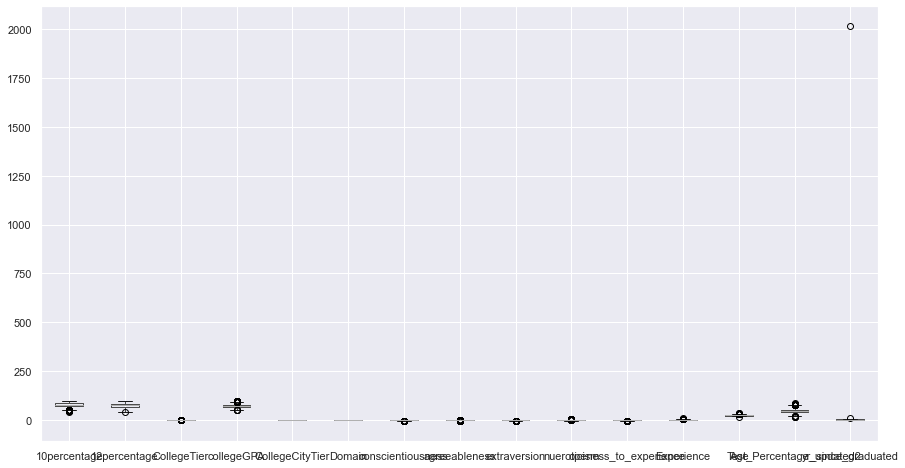

In [343]:
df_model.drop(['Salary','English','Logical','Quant'],axis=1).boxplot()

In [344]:
#A guy in yr_sice graduated had very high yr_since graduated === 2000
#This needs to be treated

In [345]:
df_model[df_model['yr_since_graduated']>1000]

Salary Designation JobCity Gender  10percentage tenboard  12percentage  \
2663  325000    Engineer  Others      m          89.0     CBSE          85.2   

     twelveboard  CollegeTier       Degree  collegeGPA  CollegeCityTier  \
2663        CBSE            2  B.Tech/B.E.       68.76                0   

     CollegeState  English  Logical  Quant    Domain  conscientiousness  \
2663   NorthIndia      695      655    680  0.755375             1.1336   

      agreeableness  extraversion  nueroticism  openess_to_experience  \
2663         0.3789       -0.2974      -0.3612                 -1.244   

      Experience  Age  Test_Percentage_updated2  yr_since_graduated branches  
2663         1.0   24                     49.56                2015   others

In [346]:
#Lets drop this row out

In [347]:
df_model.drop(df_model[df_model['yr_since_graduated']>1000].index,axis=0,inplace=True)

<AxesSubplot:>

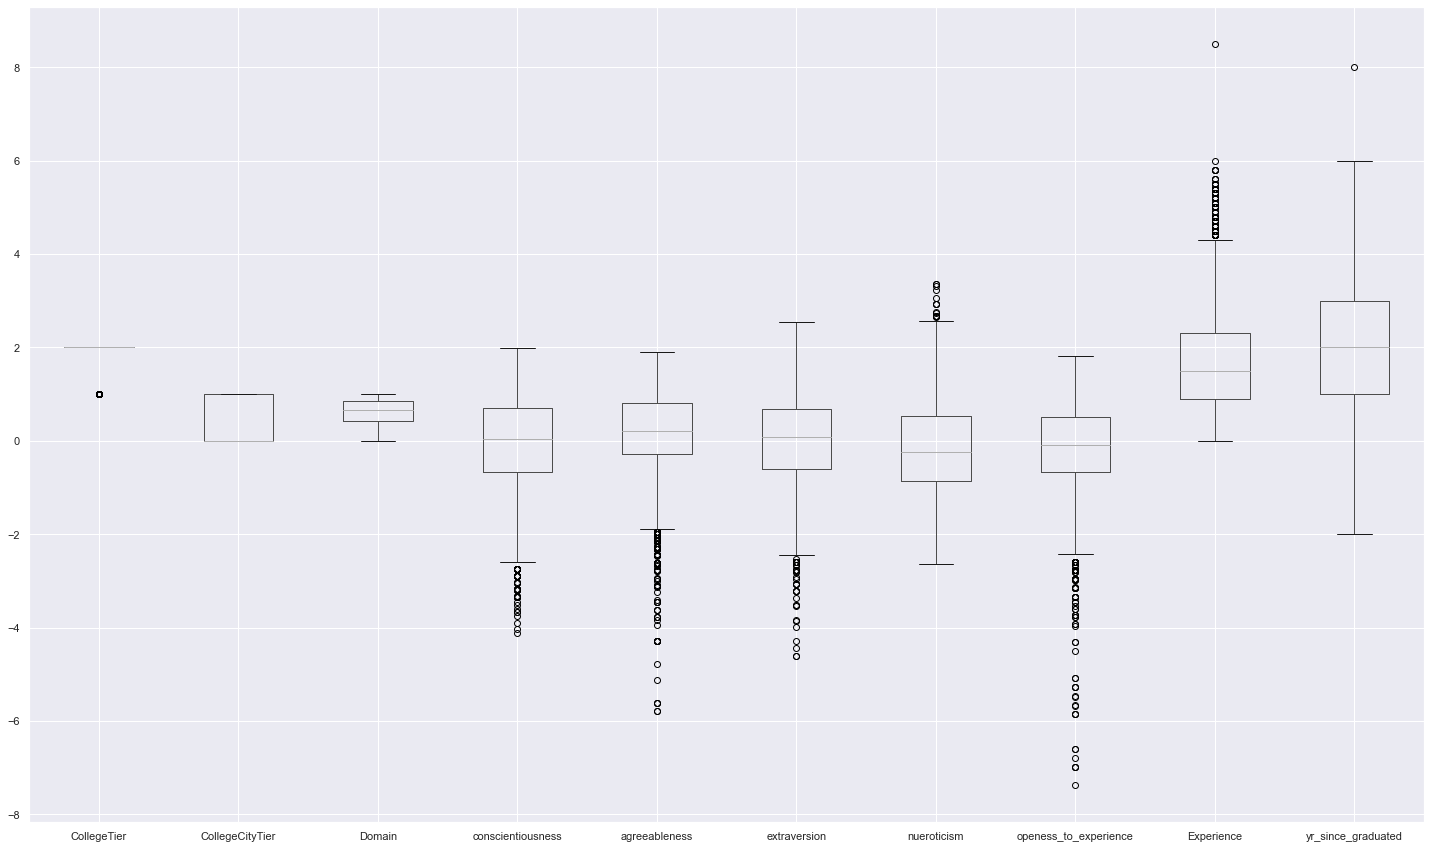

In [348]:
plt.figure(figsize=[25,15])
df_model.drop(['10percentage','12percentage','collegeGPA','Salary','English','Logical','Quant','Test_Percentage_updated2','Age'],axis=1).boxplot()

In [349]:
#We can see outliers over here
#Most of the outliers are in lower side specifically for these interview performance index columns 

<AxesSubplot:>

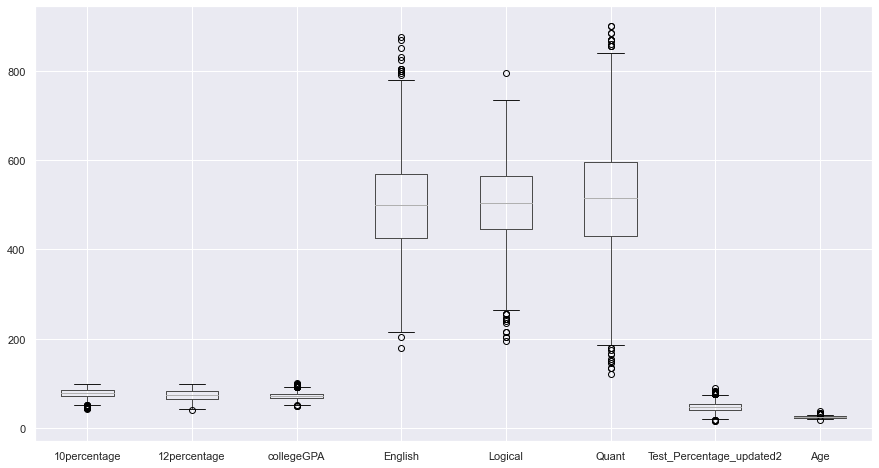

In [350]:
df_model[['10percentage','12percentage','collegeGPA','English','Logical','Quant','Test_Percentage_updated2','Age']].boxplot()

<AxesSubplot:>

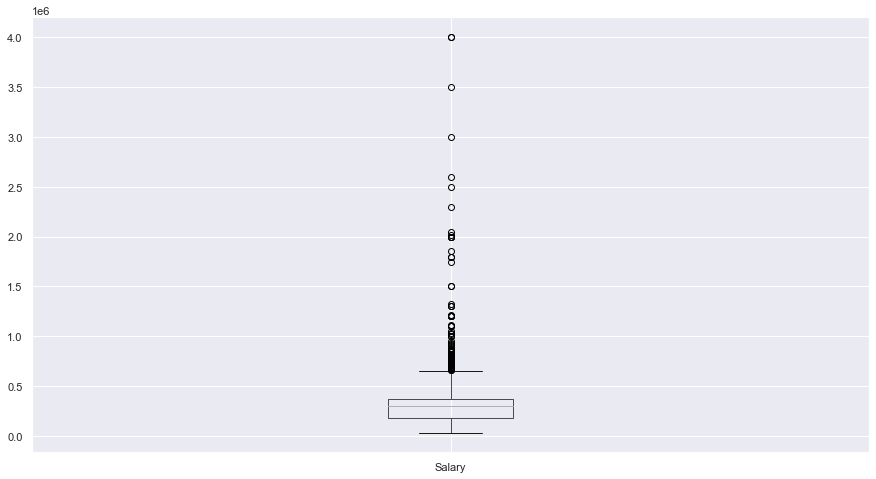

In [351]:
df_model[['Salary']].boxplot()

In [352]:
#Salary is the most problematic are where most of the outlier in upper direction

<AxesSubplot:xlabel='Salary', ylabel='Density'>

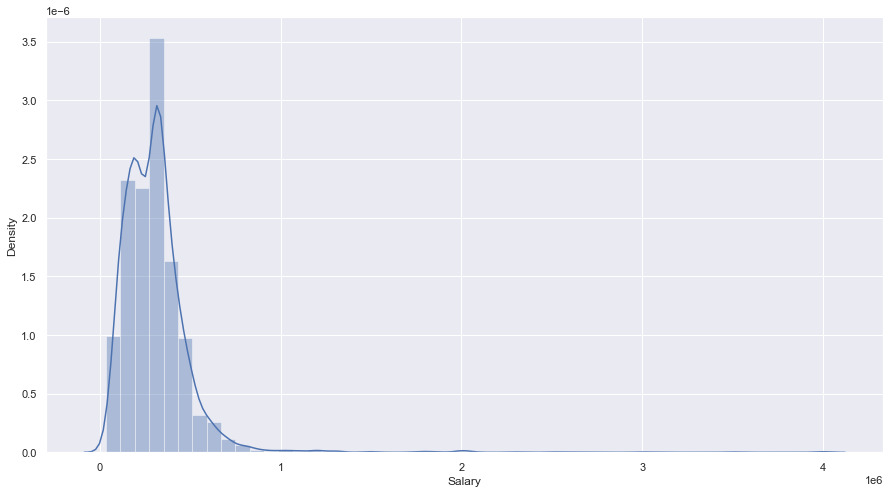

In [353]:
sns.distplot(df_model['Salary'])

In [354]:
#Lets first do scaling and transformation on the data

In [355]:
df_model.select_dtypes(include=['int','float']).columns

Index(['10percentage', '12percentage', 'collegeGPA', 'Domain',
       'conscientiousness', 'agreeableness', 'extraversion', 'nueroticism',
       'openess_to_experience', 'Experience', 'Test_Percentage_updated2'],
      dtype='object')

In [356]:
df_model.columns

Index(['Salary', 'Designation', 'JobCity', 'Gender', '10percentage',
       'tenboard', '12percentage', 'twelveboard', 'CollegeTier', 'Degree',
       'collegeGPA', 'CollegeCityTier', 'CollegeState', 'English', 'Logical',
       'Quant', 'Domain', 'conscientiousness', 'agreeableness', 'extraversion',
       'nueroticism', 'openess_to_experience', 'Experience', 'Age',
       'Test_Percentage_updated2', 'yr_since_graduated', 'branches'],
      dtype='object')

In [357]:
df_model.select_dtypes(include='object').columns

Index(['Designation', 'JobCity', 'Gender', 'tenboard', 'twelveboard', 'Degree',
       'CollegeState', 'branches'],
      dtype='object')

In [358]:
df_model.select_dtypes(include=['int','float']).columns

Index(['10percentage', '12percentage', 'collegeGPA', 'Domain',
       'conscientiousness', 'agreeableness', 'extraversion', 'nueroticism',
       'openess_to_experience', 'Experience', 'Test_Percentage_updated2'],
      dtype='object')

In [359]:
df_model['Experience'].unique()

array([3.6, 2.3, 1.6, 4.5, 1. , 0.7, 2.5, 1.5, 4. , 3.2, 2.1, 2. , 2.4,
       1.3, 1.1, 0.4, 1.8, 3.3, 2.8, 0.3, 0.2, 0.6, 4.1, 2.2, 1.2, 0.8,
       1.4, 2.9, 1.7, 0.9, 3.8, 0.5, 2.7, 4.2, 3.7, 4.8, 0.1, 2.6, 3.5,
       5.8, 5.2, 4.3, 3.9, 3.1, 3.4, 3. , 0. , 1.9, 5.1, 4.9, 4.4, 5. ,
       5.5, 5.4, 4.7, 5.3, 4.6, 5.6, 6. , 8.5])

#Iteration 2

In [360]:
df_model.head()

Salary Designation   JobCity Gender  10percentage tenboard  12percentage  \
0   420000    Engineer  Banglore      f          84.3    Other          95.8   
1   500000     Manager    Others      m          85.4     CBSE          85.0   
2   325000    Engineer   Chennai      f          85.0     CBSE          68.2   
3  1100000    Engineer       NCR      m          85.6     CBSE          83.6   
4   200000     Trainee       NCR      m          78.0     CBSE          76.8   

  twelveboard  CollegeTier       Degree  collegeGPA  CollegeCityTier  \
0       Other            2  B.Tech/B.E.       78.00                0   
1        CBSE            2  B.Tech/B.E.       70.06                0   
2        CBSE            2  B.Tech/B.E.       70.00                0   
3        CBSE            1  B.Tech/B.E.       74.64                1   
4        CBSE            2  B.Tech/B.E.       73.90                0   

  CollegeState  English  Logical  Quant    Domain  conscientiousness  \
0      Central      515      585    525  0.635979             0.9737   
1      Central      695      610    780  0.960603            -0.7335   
2   NorthIndia      615      545    370  0.450877             0.2718   
3   NorthIndia      635      585    625  0.974396             0.0464   
4   NorthIndia      545      625    465  0.124502            -0.8810   

   agreeableness  extraversion  nueroticism  openess_to_experience  \
0         0.8128        0.5269      1.35490                -0.4455   
1         0.3789        1.2396     -0.10760                 0.8637   
2         1.7109        0.1637     -0.86820                 0.6721   
3         0.3448       -0.3440     -0.40780                -0.9194   
4        -0.2793       -1.0697      0.09163                -0.1295   

   Experience  Age  Test_Percentage_updated2  yr_since_graduated  \
0         3.6   25                     49.44                   4   
1         2.3   26                     51.78                   3   
2         1.6   23                     43.89                   1   
3         4.5   26                     68.33                   4   
4         1.0   24                     25.89                   3   

             branches  
0          IT_related  
1  electronic_related  
2          IT_related  
3          IT_related  
4  electronic_related

In [361]:
pt=PowerTransformer()

categories=df_model.loc[:,['Designation', 'JobCity', 'Gender', 'tenboard', 'twelveboard', 'Degree',
       'CollegeState', 'branches','CollegeTier','CollegeCityTier']]
num=df_model.loc[:,['Salary', '10percentage', '12percentage', 'collegeGPA',
       'English', 'Logical', 'Quant', 'Domain',
       'conscientiousness', 'agreeableness', 'extraversion', 'nueroticism',
       'openess_to_experience', 'Experience', 'Age',
       'Test_Percentage_updated2', 'yr_since_graduated']]

In [362]:
#Apply powerTransformer on num
num.head()

Salary  10percentage  12percentage  collegeGPA  English  Logical  Quant  \
0   420000          84.3          95.8       78.00      515      585    525   
1   500000          85.4          85.0       70.06      695      610    780   
2   325000          85.0          68.2       70.00      615      545    370   
3  1100000          85.6          83.6       74.64      635      585    625   
4   200000          78.0          76.8       73.90      545      625    465   

     Domain  conscientiousness  agreeableness  extraversion  nueroticism  \
0  0.635979             0.9737         0.8128        0.5269      1.35490   
1  0.960603            -0.7335         0.3789        1.2396     -0.10760   
2  0.450877             0.2718         1.7109        0.1637     -0.86820   
3  0.974396             0.0464         0.3448       -0.3440     -0.40780   
4  0.124502            -0.8810        -0.2793       -1.0697      0.09163   

   openess_to_experience  Experience  Age  Test_Percentage_updated2  \
0                -0.4455         3.6   25                     49.44   
1                 0.8637         2.3   26                     51.78   
2                 0.6721         1.6   23                     43.89   
3                -0.9194         4.5   26                     68.33   
4                -0.1295         1.0   24                     25.89   

   yr_since_graduated  
0                   4  
1                   3  
2                   1  
3                   4  
4                   3

In [363]:
#lets scale data before transformation is applied

In [364]:
sc=StandardScaler()
scaled_num=sc.fit_transform(num)
pt=PowerTransformer(method='yeo-johnson')
num_transformed=pt.fit_transform(scaled_num)

In [365]:
transformed=pd.DataFrame(num_transformed,columns=num.columns)

In [366]:
transformed.head()

Salary  10percentage  12percentage  collegeGPA   English   Logical  \
0  0.894090      0.600760      1.949169    0.858015  0.167080  0.967468   
1  1.214350      0.742841      0.957835   -0.193945  1.765987  1.285282   
2  0.398403      0.690747     -0.571733   -0.202196  1.074926  0.471600   
3  2.577193      0.769070      0.829680    0.421476  1.250032  0.967468   
4 -0.599265     -0.134339      0.208749    0.323859  0.446233  1.478520   

      Quant    Domain  conscientiousness  agreeableness  extraversion  \
0  0.090199 -0.039669           1.020827       0.701740      0.503476   
1  2.199087  1.474660          -0.743008       0.104561      1.405384   
2 -1.169702 -0.698852           0.210657       2.204741      0.083465   
3  0.913110  1.547406          -0.025228       0.061735     -0.447011   
4 -0.399531 -1.640860          -0.866095      -0.611505     -1.118980   

   nueroticism  openess_to_experience  Experience       Age  \
0     1.474928              -0.488692    1.469791  0.378504   
1     0.094725               1.144351    0.706417  0.873341   
2    -0.680597               0.855329    0.114510 -0.946799   
3    -0.206076              -0.894891    1.874470  0.873341   
4     0.290060              -0.172501   -0.582626 -0.223536   

   Test_Percentage_updated2  yr_since_graduated  
0                  0.283169            1.194488  
1                  0.500132            0.546176  
2                 -0.257976           -1.105105  
3                  1.922777            1.194488  
4                 -2.217507            0.546176

In [367]:
transformed.reset_index(drop=True,inplace=True)
categories.reset_index(drop=True,inplace=True)

In [368]:
df_model2=pd.concat([transformed,categories],axis=1)

In [369]:
df_model2.isnull().sum()

Salary                      0
10percentage                0
12percentage                0
collegeGPA                  0
English                     0
Logical                     0
Quant                       0
Domain                      0
conscientiousness           0
agreeableness               0
extraversion                0
nueroticism                 0
openess_to_experience       0
Experience                  0
Age                         0
Test_Percentage_updated2    0
yr_since_graduated          0
Designation                 0
JobCity                     0
Gender                      0
tenboard                    0
twelveboard                 0
Degree                      0
CollegeState                0
branches                    0
CollegeTier                 0
CollegeCityTier             0
dtype: int64

In [370]:
df_model2.head()

Salary  10percentage  12percentage  collegeGPA   English   Logical  \
0  0.894090      0.600760      1.949169    0.858015  0.167080  0.967468   
1  1.214350      0.742841      0.957835   -0.193945  1.765987  1.285282   
2  0.398403      0.690747     -0.571733   -0.202196  1.074926  0.471600   
3  2.577193      0.769070      0.829680    0.421476  1.250032  0.967468   
4 -0.599265     -0.134339      0.208749    0.323859  0.446233  1.478520   

      Quant    Domain  conscientiousness  agreeableness  extraversion  \
0  0.090199 -0.039669           1.020827       0.701740      0.503476   
1  2.199087  1.474660          -0.743008       0.104561      1.405384   
2 -1.169702 -0.698852           0.210657       2.204741      0.083465   
3  0.913110  1.547406          -0.025228       0.061735     -0.447011   
4 -0.399531 -1.640860          -0.866095      -0.611505     -1.118980   

   nueroticism  openess_to_experience  Experience       Age  \
0     1.474928              -0.488692    1.469791  0.378504   
1     0.094725               1.144351    0.706417  0.873341   
2    -0.680597               0.855329    0.114510 -0.946799   
3    -0.206076              -0.894891    1.874470  0.873341   
4     0.290060              -0.172501   -0.582626 -0.223536   

   Test_Percentage_updated2  yr_since_graduated Designation   JobCity Gender  \
0                  0.283169            1.194488    Engineer  Banglore      f   
1                  0.500132            0.546176     Manager    Others      m   
2                 -0.257976           -1.105105    Engineer   Chennai      f   
3                  1.922777            1.194488    Engineer       NCR      m   
4                 -2.217507            0.546176     Trainee       NCR      m   

  tenboard twelveboard       Degree CollegeState            branches  \
0    Other       Other  B.Tech/B.E.      Central          IT_related   
1     CBSE        CBSE  B.Tech/B.E.      Central  electronic_related   
2     CBSE        CBSE  B.Tech/B.E.   NorthIndia          IT_related   
3     CBSE        CBSE  B.Tech/B.E.   NorthIndia          IT_related   
4     CBSE        CBSE  B.Tech/B.E.   NorthIndia  electronic_related   

   CollegeTier  CollegeCityTier  
0            2                0  
1            2                0  
2            2                0  
3            1                1  
4            2                0

In [371]:
#no scaling needed so not doing for now
#lets do outlier treatment

<AxesSubplot:>

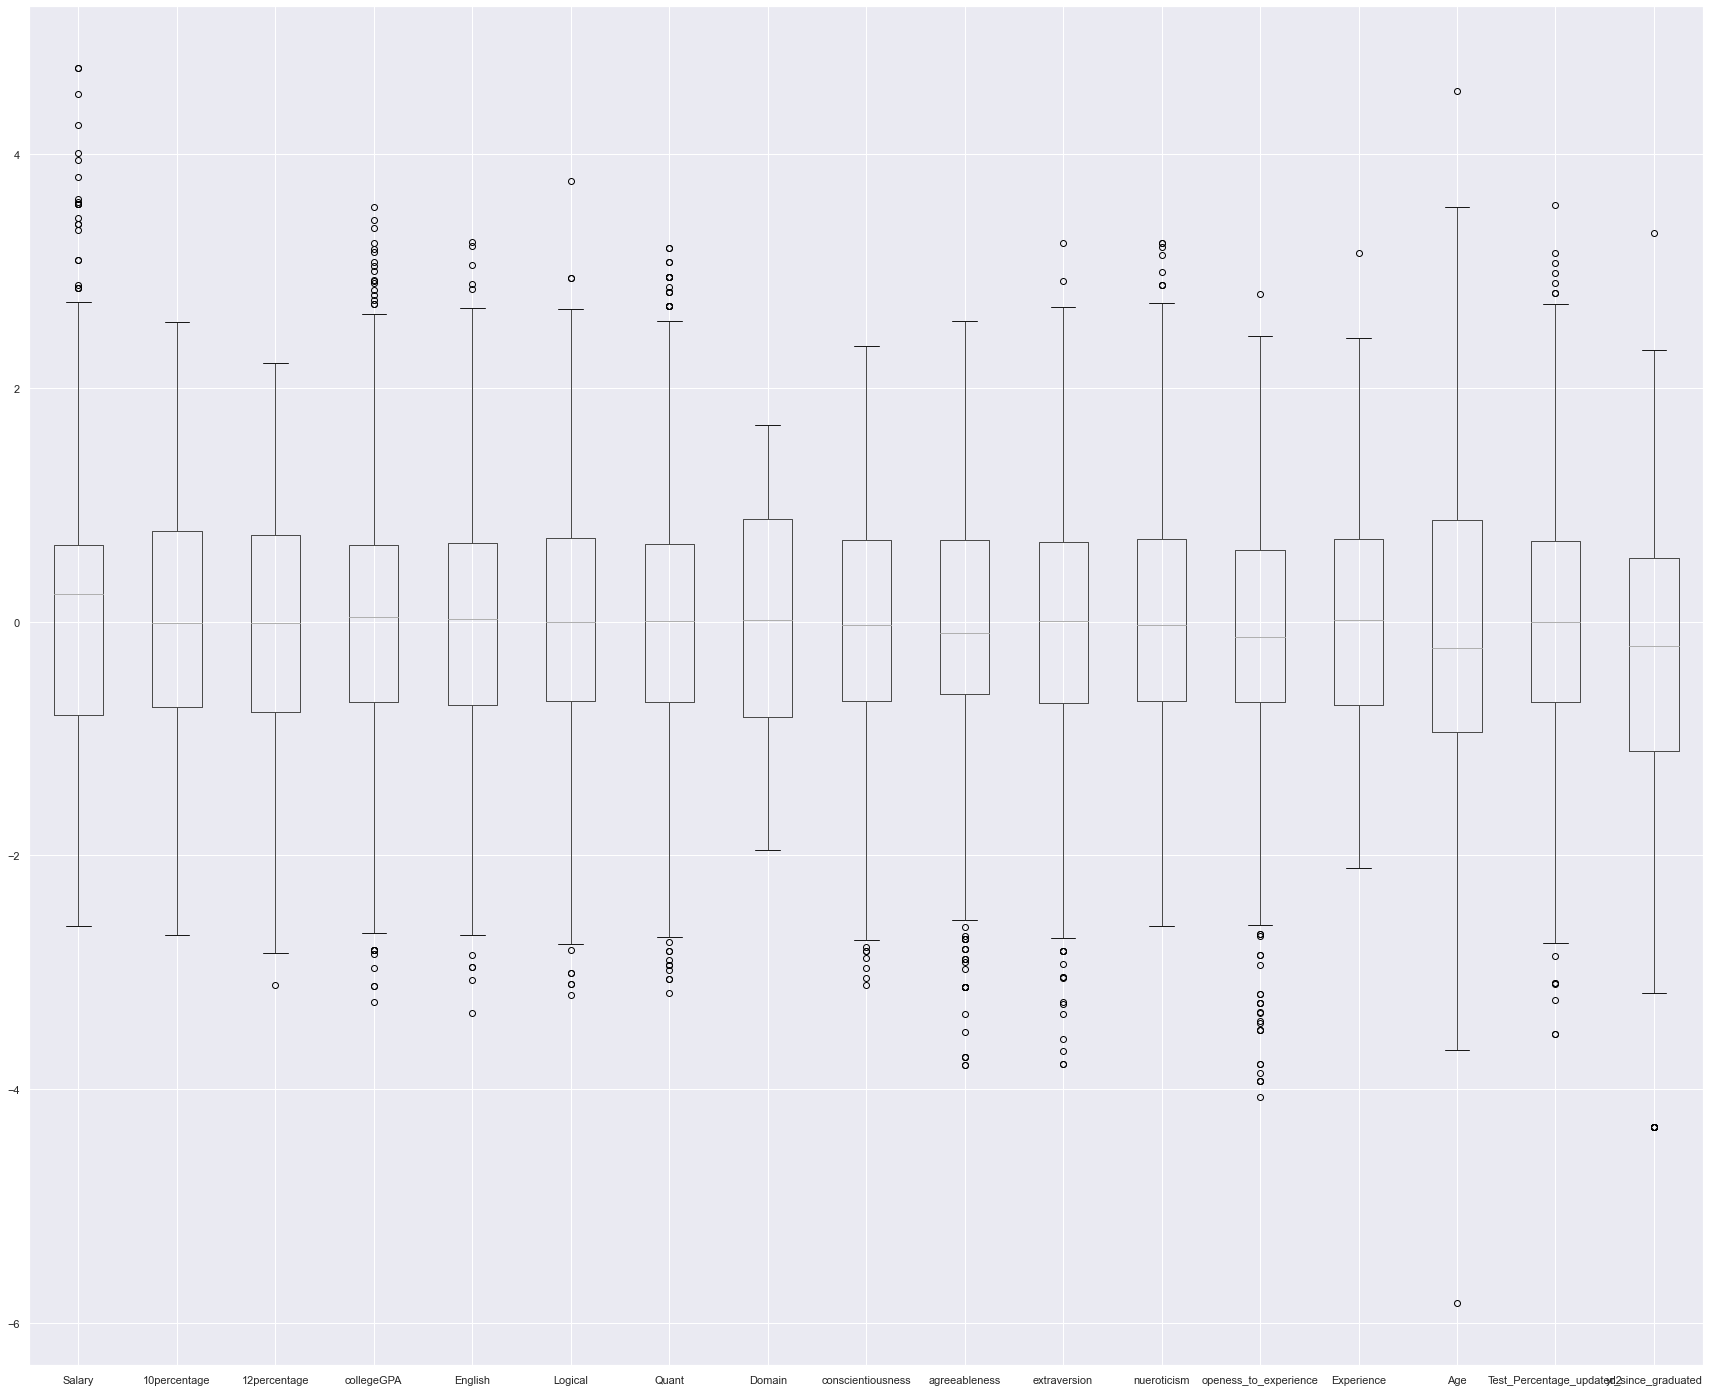

In [372]:
plt.figure(figsize=[30,25])
transformed.boxplot()

In [373]:
df_clip=transformed.copy()
df_clip.head()

Salary  10percentage  12percentage  collegeGPA   English   Logical  \
0  0.894090      0.600760      1.949169    0.858015  0.167080  0.967468   
1  1.214350      0.742841      0.957835   -0.193945  1.765987  1.285282   
2  0.398403      0.690747     -0.571733   -0.202196  1.074926  0.471600   
3  2.577193      0.769070      0.829680    0.421476  1.250032  0.967468   
4 -0.599265     -0.134339      0.208749    0.323859  0.446233  1.478520   

      Quant    Domain  conscientiousness  agreeableness  extraversion  \
0  0.090199 -0.039669           1.020827       0.701740      0.503476   
1  2.199087  1.474660          -0.743008       0.104561      1.405384   
2 -1.169702 -0.698852           0.210657       2.204741      0.083465   
3  0.913110  1.547406          -0.025228       0.061735     -0.447011   
4 -0.399531 -1.640860          -0.866095      -0.611505     -1.118980   

   nueroticism  openess_to_experience  Experience       Age  \
0     1.474928              -0.488692    1.469791  0.378504   
1     0.094725               1.144351    0.706417  0.873341   
2    -0.680597               0.855329    0.114510 -0.946799   
3    -0.206076              -0.894891    1.874470  0.873341   
4     0.290060              -0.172501   -0.582626 -0.223536   

   Test_Percentage_updated2  yr_since_graduated  
0                  0.283169            1.194488  
1                  0.500132            0.546176  
2                 -0.257976           -1.105105  
3                  1.922777            1.194488  
4                 -2.217507            0.546176

In [374]:
#lets make a function on the basis of which we will take the clipping cutoff and then decide that at what clipping cutoff 
#distribution is not distorted as well as r2_score of regression is maximized

<AxesSubplot:xlabel='Salary', ylabel='Density'>

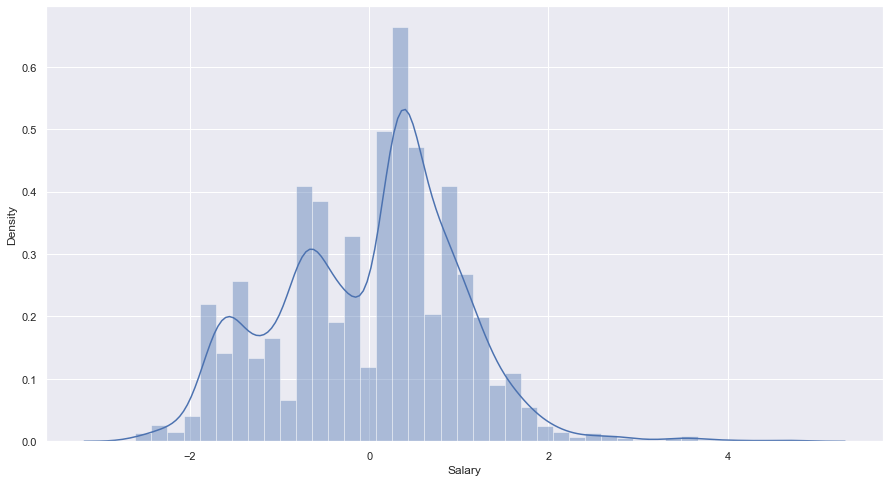

In [375]:
sns.distplot(df_clip.Salary)

In [376]:
def clipping(df_clip,categories,low,high):
#Lets cap these outliers.
#Outlier treatment is being done in consideration of LinearRegression only for now
            l=df_clip.quantile(low)
            h=df_clip.quantile(high)
            clipped=df_clip.clip(lower=l,upper=h,axis=1)
            clipped.reset_index(drop=True,inplace=True)
            categories.reset_index(drop=True,inplace=True)
            capped=pd.concat([clipped,categories],axis=1)
            
            #Here we created dummies of the capped DataFrame
            dummy=pd.get_dummies(capped)
            x=dummy.drop('Salary',axis=1)
            y=dummy.Salary
            
            
   
            lr_cross=LinearRegression()
            x_cross=x
            y_cross=y
            output_cross=cross_validate(estimator=lr_cross,X=x_cross,y=y_cross,cv=8,return_train_score=True)
            output_cross_df=pd.DataFrame({'Train_score':output_cross['train_score'],'Test_score':output_cross['test_score']})
            print('train_mean',output_cross_df['Train_score'].mean())
            print('train_std',output_cross_df['Train_score'].std())
            print('test_mean',output_cross_df['Test_score'].mean())
            print('test_std',output_cross_df['Test_score'].std())
            plt.figure(figsize=[30,15])
            capped.boxplot()
            plt.show()
            sns.distplot(y)
            plt.show()

train_mean 0.46496336291033524
train_std 0.0066719568428884974
test_mean 0.44858609303964525
test_std 0.04712165805043473


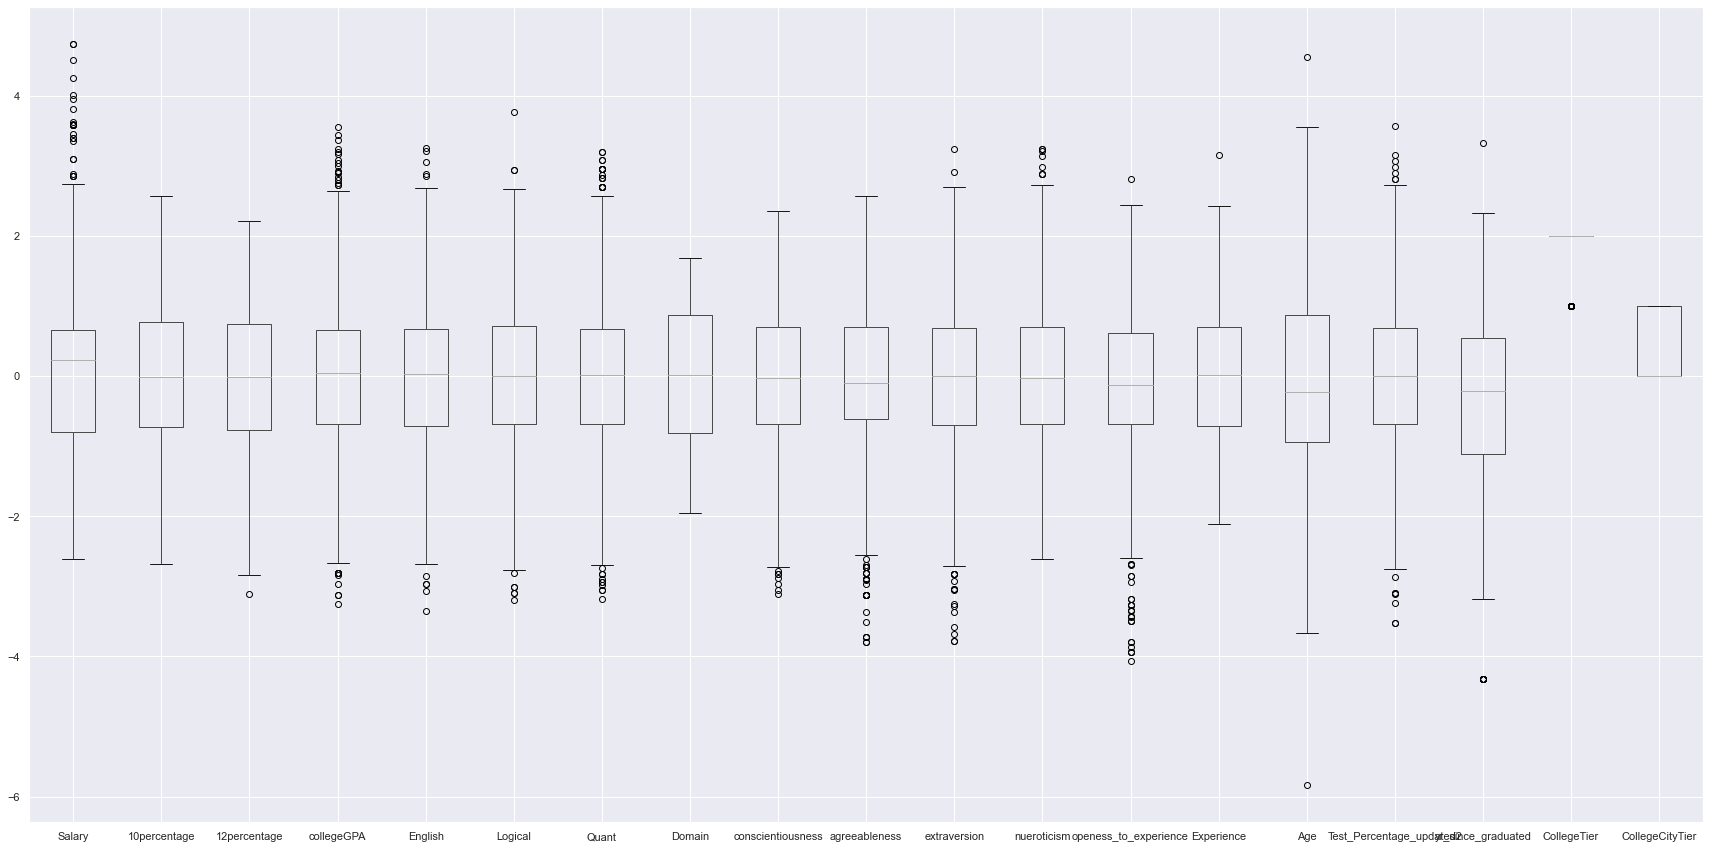

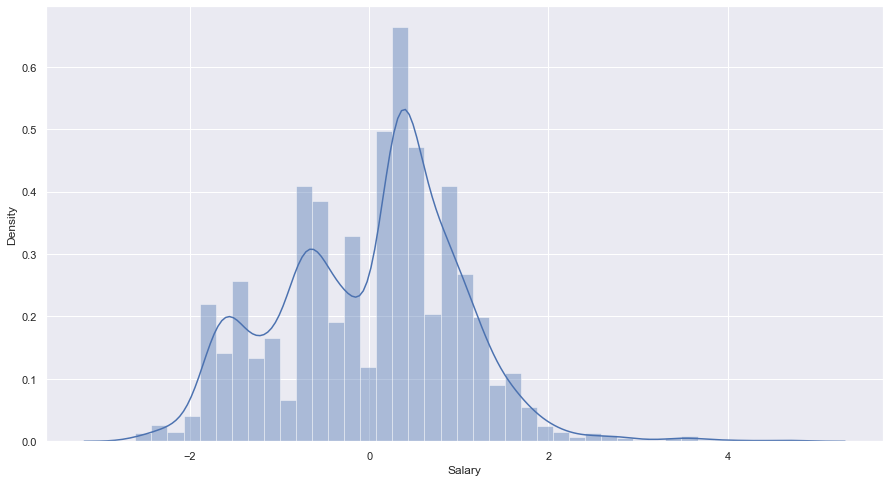

In [377]:
clipping(df_clip,categories,low=0,high=1)

In [378]:
#This iteration shows that It got little bump around the higher salary block
#lets do more iteration and finalise the cutoff for the capping

train_mean 0.46692815918054476
train_std 0.0066816436321663385
test_mean 0.4508129619672372
test_std 0.0471388482427877


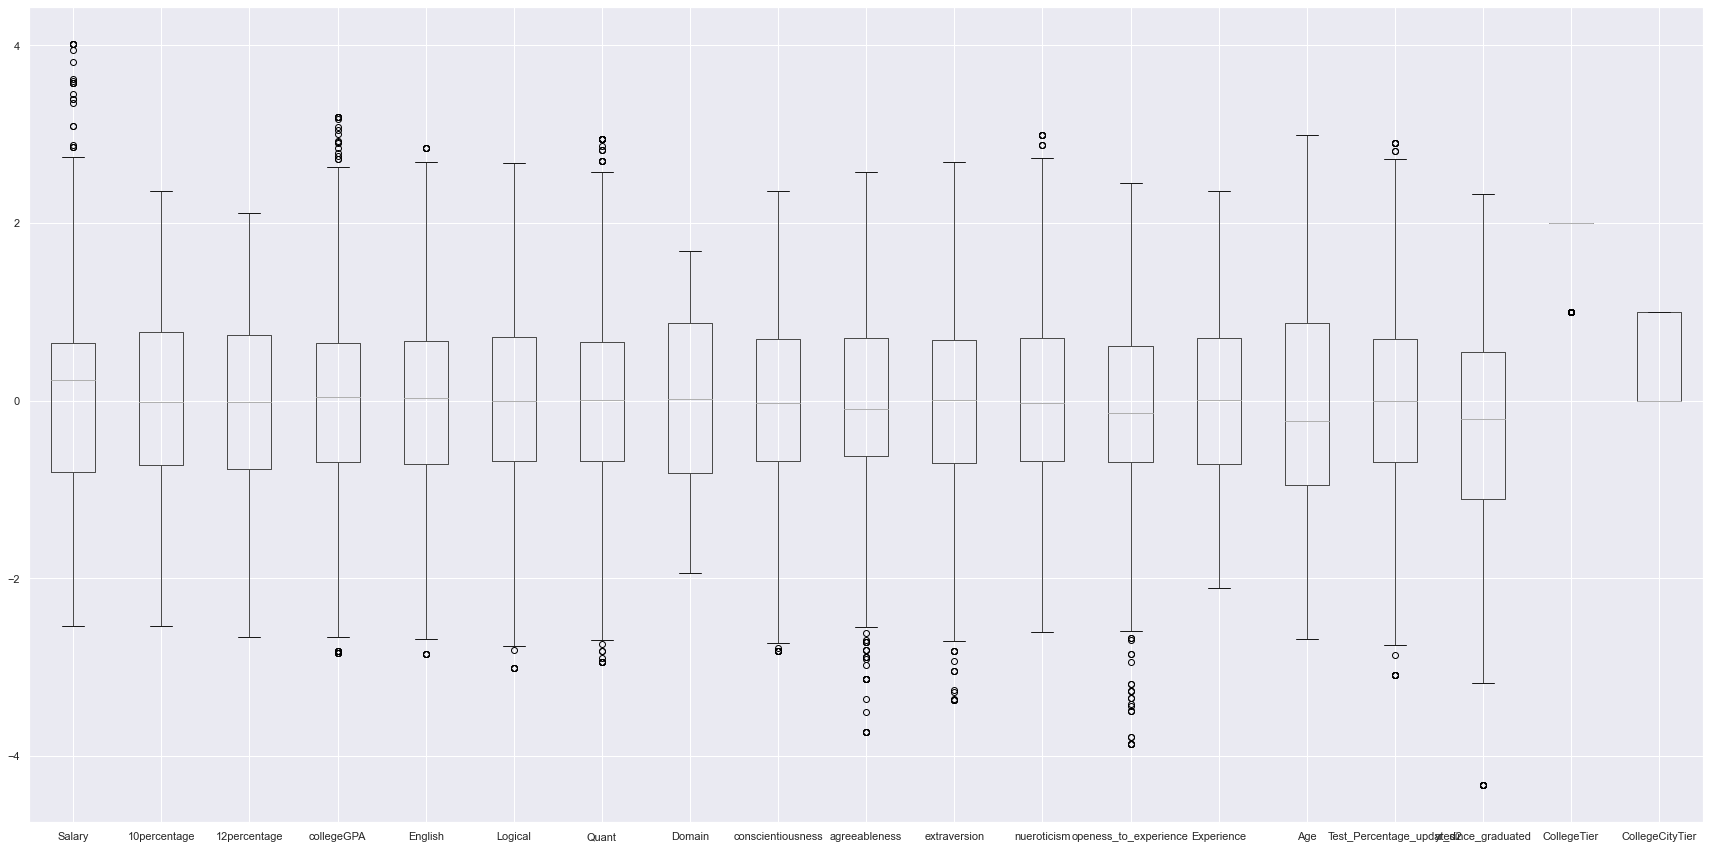

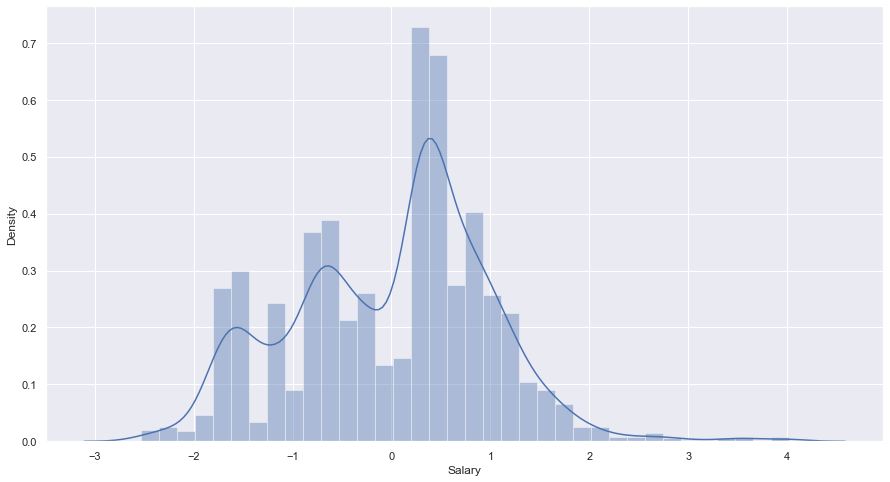

In [379]:
clipping(df_clip,categories,low=0.001,high=0.999)

train_mean 0.47972824191905034
train_std 0.006260400411493417
test_mean 0.46393881981513924
test_std 0.04382842996068691


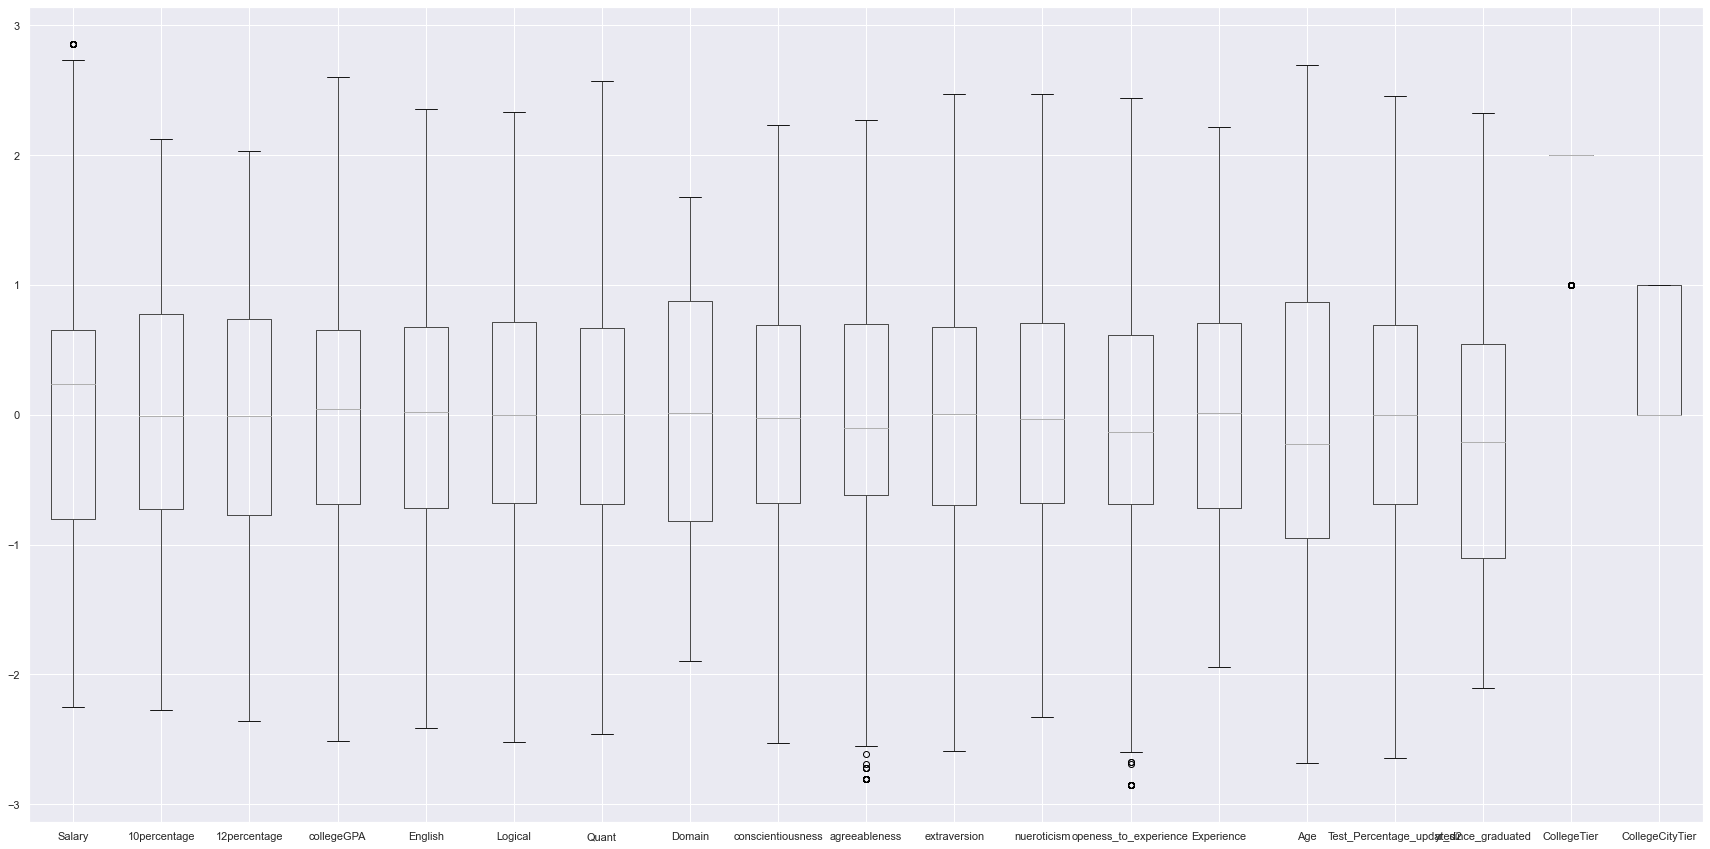

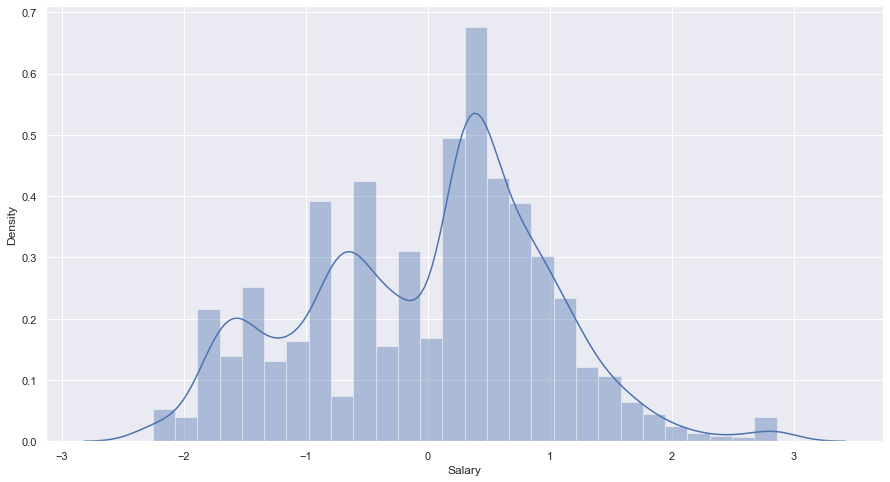

In [380]:
clipping(df_clip,categories,low=0.005,high=0.995)

train_mean 0.48937680345344875
train_std 0.005774443141760565
test_mean 0.47390731820960913
test_std 0.0402685399078511


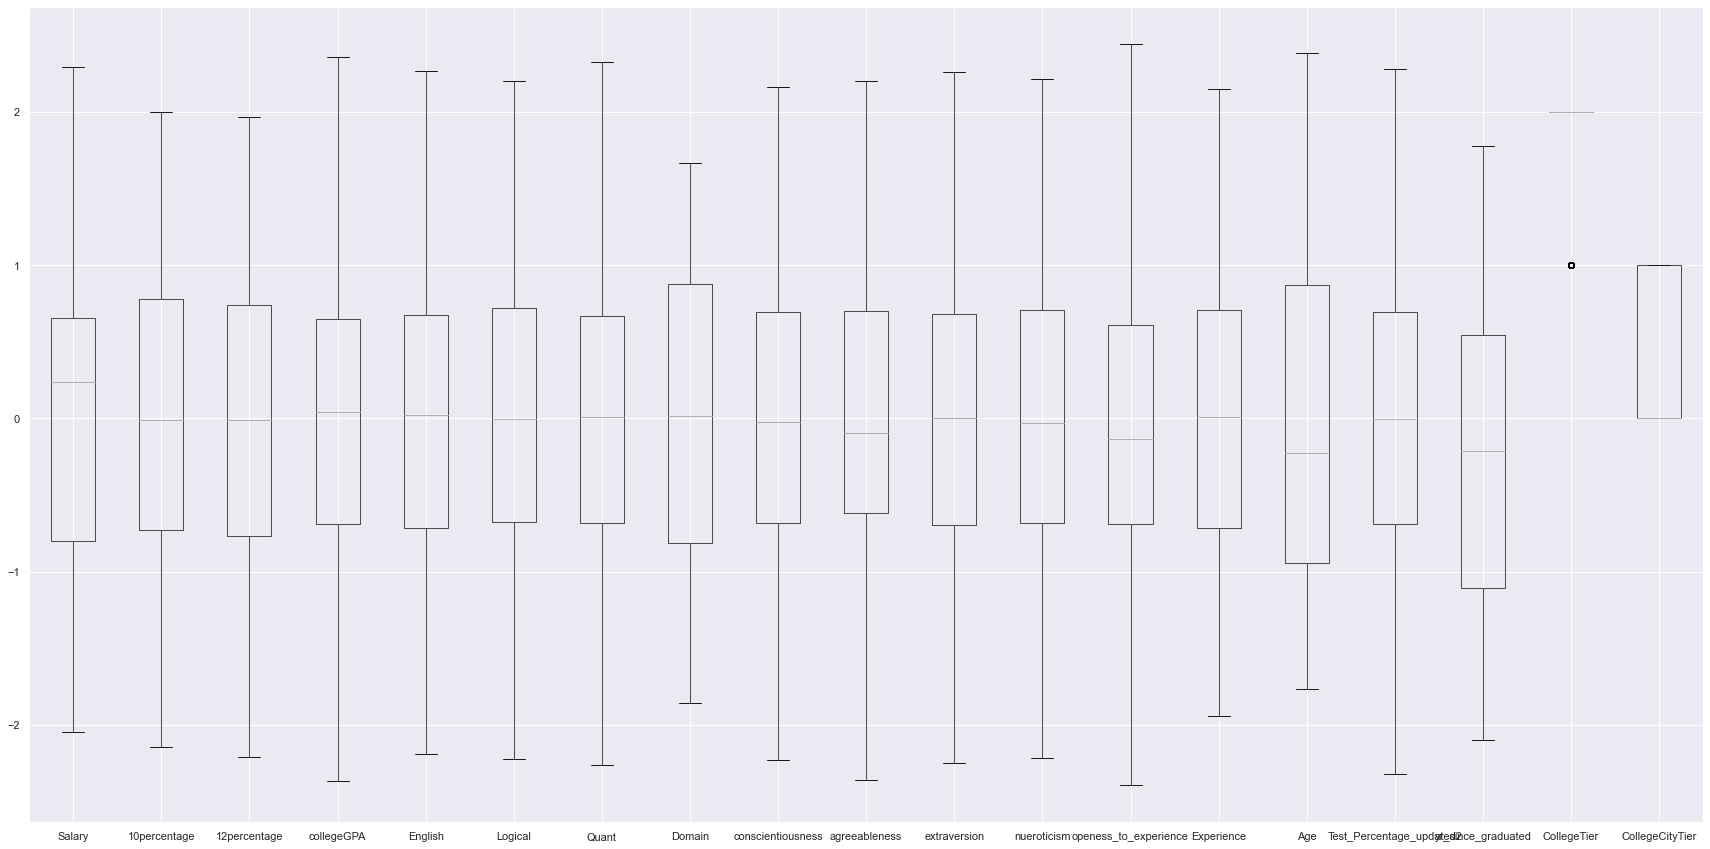

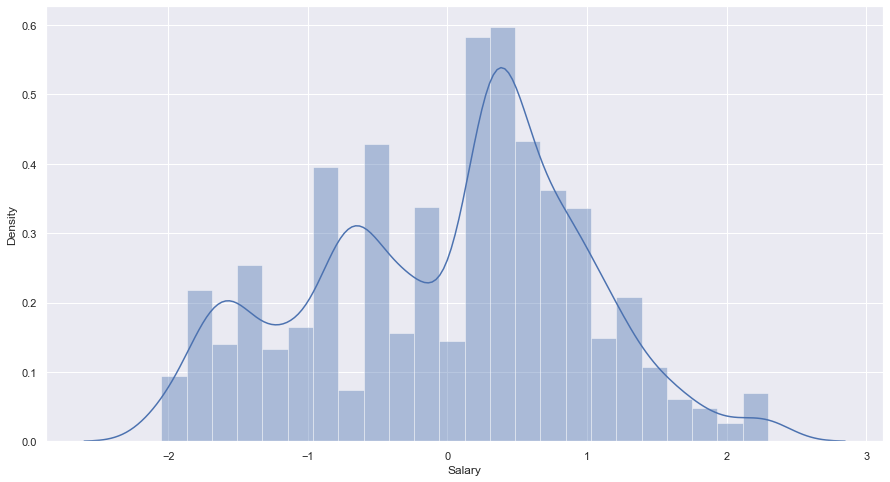

In [381]:
clipping(df_clip,categories,low=0.01,high=0.99)

train_mean 0.4999252184152039
train_std 0.005049902555602585
test_mean 0.48527345798343113
test_std 0.0349779351597853


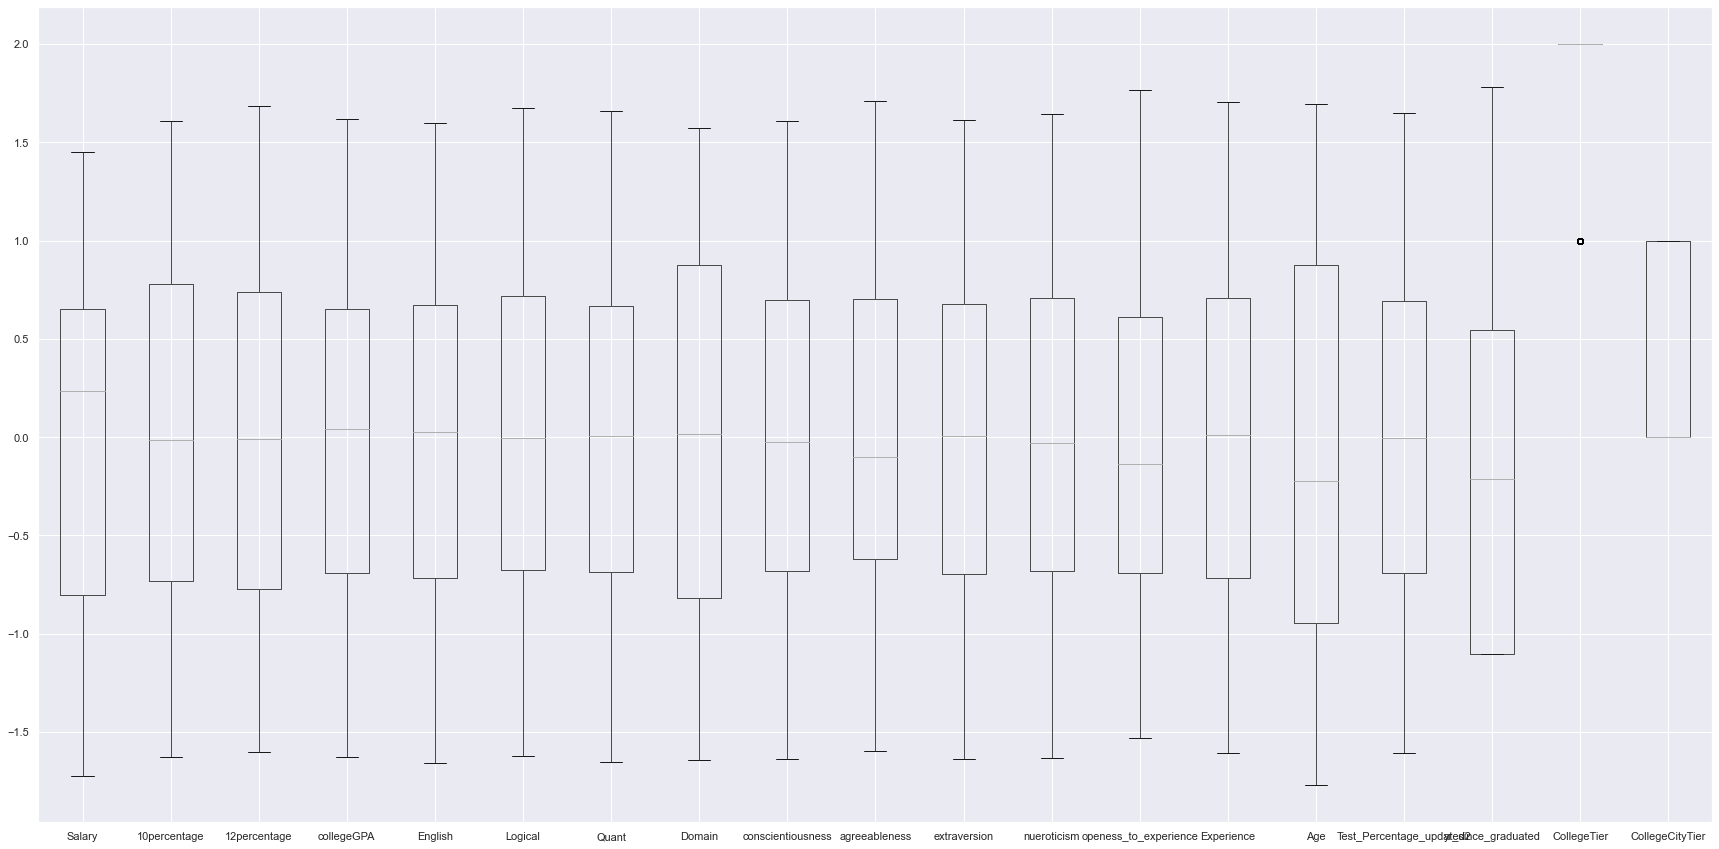

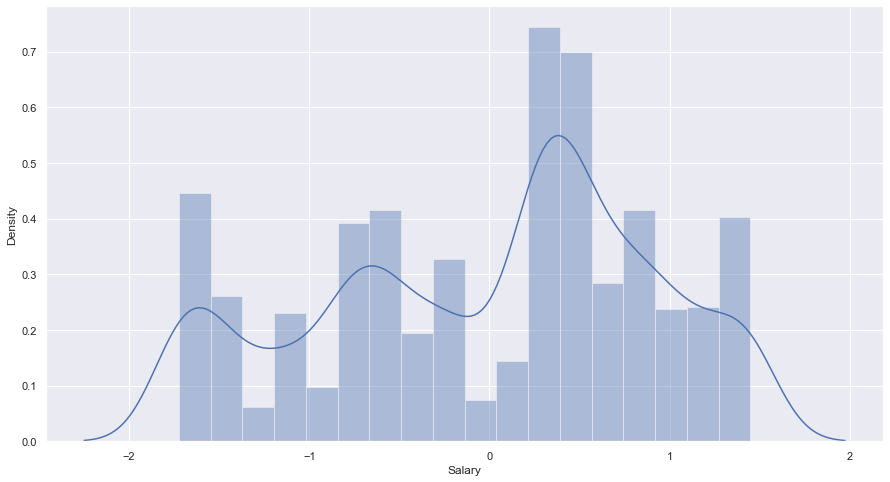

In [382]:
clipping(df_clip,categories,low=0.05,high=0.95)

train_mean 0.4875115199082214
train_std 0.004935338161769736
test_mean 0.47202500634681177
test_std 0.033543440361382855


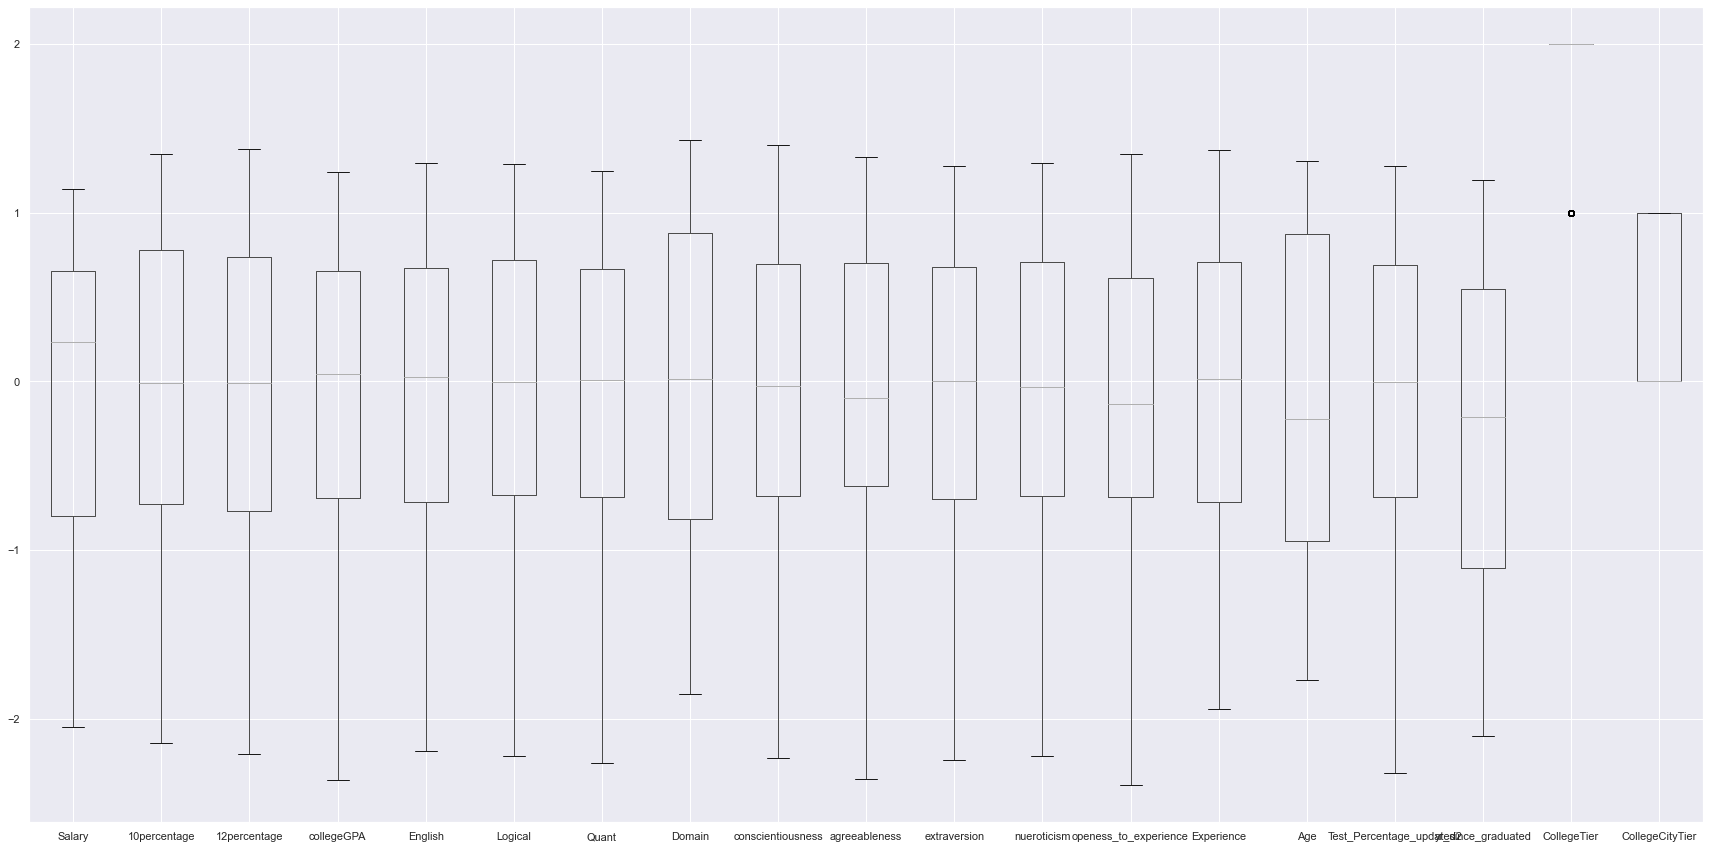

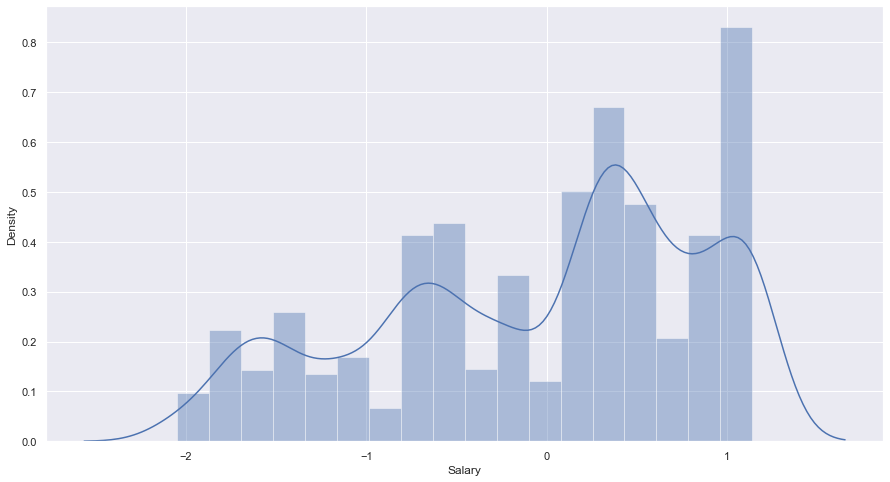

In [383]:
clipping(df_clip,categories,low=0.01,high=0.90)

In [384]:
#comment #when clipping cutoff low is very low shape is r2_score drops because of outliers 
#when clipping cutoff low is very high shape is r2_score rises because all outliers are removed but shape is distorted 
#Hence we try to set clipping cutoff such that we get a sweet spot between this trade-off
#we finalize a cutoff of 0.005 for low and 0.995 for high


In [385]:
l=df_clip.quantile(0.005)
h=df_clip.quantile(0.995)
clipped=df_clip.clip(lower=l,upper=h,axis=1)
clipped.reset_index(drop=True,inplace=True)
categories.reset_index(drop=True,inplace=True)
capped=pd.concat([clipped,categories],axis=1)
capped.head()

Salary  10percentage  12percentage  collegeGPA   English   Logical  \
0  0.894090      0.600760      1.949169    0.858015  0.167080  0.967468   
1  1.214350      0.742841      0.957835   -0.193945  1.765987  1.285282   
2  0.398403      0.690747     -0.571733   -0.202196  1.074926  0.471600   
3  2.577193      0.769070      0.829680    0.421476  1.250032  0.967468   
4 -0.599265     -0.134339      0.208749    0.323859  0.446233  1.478520   

      Quant    Domain  conscientiousness  agreeableness  extraversion  \
0  0.090199 -0.039669           1.020827       0.701740      0.503476   
1  2.199087  1.474660          -0.743008       0.104561      1.405384   
2 -1.169702 -0.698852           0.210657       2.204741      0.083465   
3  0.913110  1.547406          -0.025228       0.061735     -0.447011   
4 -0.399531 -1.640860          -0.866095      -0.611505     -1.118980   

   nueroticism  openess_to_experience  Experience       Age  \
0     1.474928              -0.488692    1.469791  0.378504   
1     0.094725               1.144351    0.706417  0.873341   
2    -0.680597               0.855329    0.114510 -0.946799   
3    -0.206076              -0.894891    1.874470  0.873341   
4     0.290060              -0.172501   -0.582626 -0.223536   

   Test_Percentage_updated2  yr_since_graduated Designation   JobCity Gender  \
0                  0.283169            1.194488    Engineer  Banglore      f   
1                  0.500132            0.546176     Manager    Others      m   
2                 -0.257976           -1.105105    Engineer   Chennai      f   
3                  1.922777            1.194488    Engineer       NCR      m   
4                 -2.217507            0.546176     Trainee       NCR      m   

  tenboard twelveboard       Degree CollegeState            branches  \
0    Other       Other  B.Tech/B.E.      Central          IT_related   
1     CBSE        CBSE  B.Tech/B.E.      Central  electronic_related   
2     CBSE        CBSE  B.Tech/B.E.   NorthIndia          IT_related   
3     CBSE        CBSE  B.Tech/B.E.   NorthIndia          IT_related   
4     CBSE        CBSE  B.Tech/B.E.   NorthIndia  electronic_related   

   CollegeTier  CollegeCityTier  
0            2                0  
1            2                0  
2            2                0  
3            1                1  
4            2                0

In [386]:
capped.shape

(3995, 27)

In [387]:
df_model.shape

(3995, 27)

In [388]:
df_model2=capped.copy()

In [389]:
#This data capped we witll use for linear regression and we might use the non_transformed and treated data for other algorithms
dum=pd.get_dummies(capped,drop_first=True)
df_ols=dum.copy()

In [390]:
import statsmodels.api as sm
x=df_ols.drop('Salary',axis=1)
X=sm.add_constant(x)
y=df_ols.Salary
model2=sm.OLS(y,X).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.479
Model:                            OLS   Adj. R-squared:                  0.473
Method:                 Least Squares   F-statistic:                     80.62
Date:                Tue, 19 Apr 2022   Prob (F-statistic):               0.00
Time:                        15:56:27   Log-Likelihood:                -4299.6
No. Observations:                3995   AIC:                             8691.
Df Residuals:                    3949   BIC:                             8981.
Df Model:                          45                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                           0.9277      0.110      8.404      0.000       0.711       1.144
10percentage                    0.0533      0.017      3.145      0.002       0.020       0.086
12percentage                    0.0624      0.017      3.585      0.000       0.028       0.097
collegeGPA                      0.1045      0.014      7.321      0.000       0.077       0.132
English                         0.0873      0.014      6.231      0.000       0.060       0.115
Logical                         0.0143      0.014      0.985      0.325      -0.014       0.043
Quant                           0.0980      0.015      6.539      0.000       0.069       0.127
Domain                         -0.0059      0.021     -0.279      0.780      -0.047       0.035
conscientiousness              -0.0350      0.014     -2.483      0.013      -0.063      -0.007
agreeableness                   0.0111      0.015      0.735      0.462      -0.019       0.041
extraversion                    0.0476      0.013      3.572      0.000       0.021       0.074
nueroticism                    -0.0326      0.013     -2.595      0.010      -0.057      -0.008
openess_to_experience          -0.0153      0.014     -1.099      0.272      -0.043       0.012
Experience                      0.4326      0.014     29.857      0.000       0.404       0.461
Age                             0.0064      0.021      0.311      0.756      -0.034       0.047
Test_Percentage_updated2        0.0648      0.025      2.553      0.011       0.015       0.115
yr_since_graduated             -0.0275      0.022     -1.259      0.208      -0.070       0.015
CollegeTier                    -0.3020      0.047     -6.387      0.000      -0.395      -0.209
CollegeCityTier                 0.0415      0.031      1.341      0.180      -0.019       0.102
Designation_Developer          -0.2880      0.045     -6.394      0.000      -0.376      -0.200
Designation_Engineer           -0.0197      0.039     -0.509      0.611      -0.096       0.056
Designation_Manager             0.3871      0.075      5.128      0.000       0.239       0.535
Designation_Trainee            -0.1572      0.077     -2.055      0.040      -0.307      -0.007
Designation_others             -0.2904      0.048     -6.084      0.000      -0.384      -0.197
JobCity_Chennai                -0.2437      0.050     -4.837      0.000      -0.342      -0.145
JobCity_Hyderabad              -0.2757      0.048     -5.711      0.000      -0.370      -0.181
JobCity_Kolkata                -0.5058      0.072     -6.984      0.000      -0.648      -0.364
JobCity_Missing                -0.3489      0.045     -7.841      0.000      -0.436      -0.262
JobCity_Mumbai                 -0.0540      0.065     -0.825      0.409      -0.182       0.074
JobCity_NCR

In [391]:
#Lets check high pvalues values
pval=model2.pvalues
pval[pval>0.05]

Logical                    0.324624
Domain                     0.780325
agreeableness              0.462266
openess_to_experience      0.271999
Age                        0.755738
yr_since_graduated         0.208246
CollegeCityTier            0.179872
Designation_Engineer       0.611063
JobCity_Mumbai             0.409326
tenboard_Other             0.190107
twelveboard_Other          0.628710
twelveboard_State Board    0.581302
Degree_M.Sc. (Tech.)       0.337615
Degree_M.Tech./M.E.        0.956929
CollegeState_EastIndia     0.221473
CollegeState_NorthIndia    0.257626
CollegeState_WestIndia     0.440835
branches_others            0.891318
dtype: float64

In [392]:
len(pval[pval>0.05])

18

In [393]:
pval[pval<0.05].sort_values()
#These 28 variables are very significant

Experience                     8.540633e-177
JobCity_Others                  2.372710e-33
JobCity_NCR                     2.496408e-17
const                           5.924630e-17
JobCity_Missing                 5.696122e-15
collegeGPA                      2.961067e-13
JobCity_Kolkata                 3.341711e-12
Quant                           6.970651e-11
Designation_Developer           1.800800e-10
CollegeTier                     1.883983e-10
English                         5.127790e-10
Designation_others              1.285402e-09
JobCity_Hyderabad               1.202897e-08
Designation_Manager             3.062943e-07
JobCity_Chennai                 1.367376e-06
Gender_m                        1.923207e-06
12percentage                    3.414330e-04
extraversion                    3.588879e-04
10percentage                    1.671270e-03
JobCity_Pune                    2.844690e-03
Degree_MCA                      9.213962e-03
nueroticism                     9.507619e-03
Test_Perce

In [394]:
#This says a lot about the variables which variables are significant and which are not significant

In [395]:
def lr_output(df,features):
        lr_cross=LinearRegression()
        x=df.loc[:,features]
        y=df.Salary
        x_cross=x
        y_cross=y
        output_cross=cross_validate(estimator=lr_cross,X=x_cross,y=y_cross,cv=8,return_train_score=True)
        output_cross_df=pd.DataFrame({'Train_score':output_cross['train_score'],'Test_score':output_cross['test_score']})
        print('train_mean',output_cross_df['Train_score'].mean())
        print('train_std',output_cross_df['Train_score'].std())
        print('test_mean',output_cross_df['Test_score'].mean())

In [396]:
bad_features=pval[pval>0.05].index
good_features=list(set(x.columns)-set(bad_features))
lr_output(df=df_ols,features=good_features)

train_mean 0.4773395684369508
train_std 0.006241048687253662
test_mean 0.46759700889795147


In [397]:
len(good_features)

27

In [398]:
len(bad_features)
#This includes constant as well

18

In [399]:
#Dropping all these bad features let to increase in r2_score from 46.39 to 46.75

In [400]:
lr_output(df=df_ols,features=bad_features)

train_mean 0.19938004541824345
train_std 0.00320259815211423
test_mean 0.18867152378707253


In [401]:
#This shows that all the bad features with high pvalue was adding noise to the data

In [402]:
#create a function to check all the linearity assumptions

In [403]:
def assumptions(model,df):
    # H0: Data is Linear
    # Ha: Data is non Linear
    import statsmodels.api as sma
    print('# H0: Data is Linear','\n','# Ha: Data is non Linear')
    print('RAinbow test output','\n',sma.stats.diagnostic.linear_rainbow(model))
    #Thsi shows data is linear 



    # H0: residuals are normal
    # Ha: residuals are not normal
    print('Shapiro output','\n',shapiro(ols1.resid),'\n')
    print('REsidual PLot','\n')
    print('# H0: residuals are normal','\n','# Ha: residuals are not normal')
    sns.residplot(model.fittedvalues,model.resid)
    plt.show()
   



    #H0: No heteroscedasticity is present
    #Ha: heteroscedasticity is present
    predictors = df.drop('Salary',axis=1)

    from statsmodels.stats.diagnostic import het_breuschpagan

    test = het_breuschpagan(model.resid, predictors)
    print('#H0: No heteroscedasticity is present','\n','#Ha: heteroscedasticity is present')
    print('Heteroscedasticity_test',test[-1])



    from scipy.stats import probplot
    probplot(model.resid,plot=plt)

    plt.show()

    from statsmodels.stats.outliers_influence import variance_inflation_factor
    my_list=[]
    vf=df.drop('Salary',axis=1)
    for i in range(vf.shape[1]):
        my_list.append(variance_inflation_factor(vf.values,i))
    vif_model=pd.DataFrame({"Features":vf.columns, "VIF":my_list}).sort_values(ascending = False, by = "VIF")
    print(vif_model)




    from statsmodels.stats.stattools import durbin_watson
    print('Autocorrelation_durbin_watson','\n',durbin_watson(model.resid))


# H0: Data is Linear 
 # Ha: Data is non Linear
RAinbow test output 
 (0.932587812918873, 0.9394945933677905)
Shapiro output 
 ShapiroResult(statistic=0.9985697269439697, pvalue=0.02580394595861435) 

REsidual PLot 

# H0: residuals are normal 
 # Ha: residuals are not normal


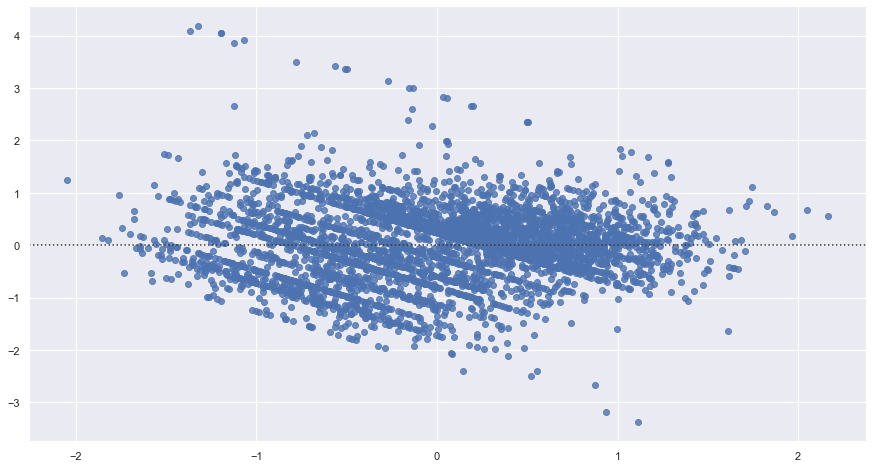

#H0: No heteroscedasticity is present 
 #Ha: heteroscedasticity is present
Heteroscedasticity_test 4.572433121255099e-175


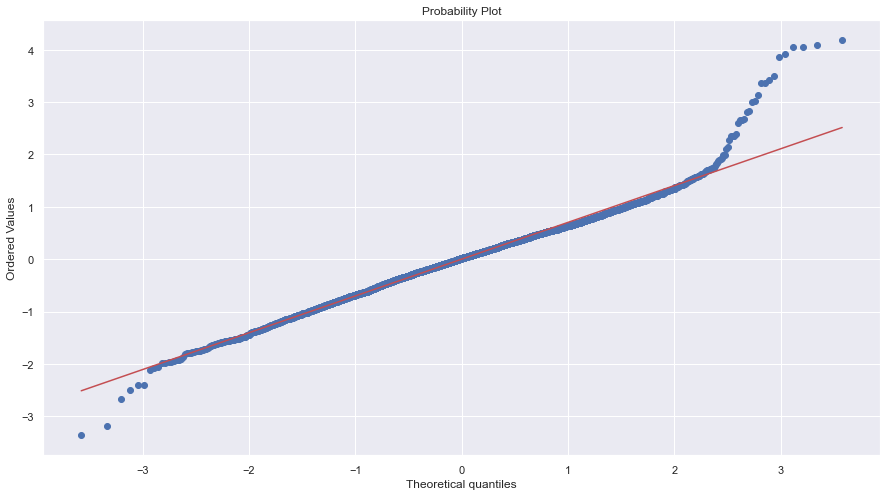

                       Features        VIF
16                  CollegeTier  20.176694
35      twelveboard_State Board   7.322680
33         tenboard_State Board   6.926886
19         Designation_Engineer   5.750531
34            twelveboard_Other   5.481020
32               tenboard_Other   5.449433
41      CollegeState_SouthIndia   5.124220
14     Test_Percentage_updated2   4.929228
40      CollegeState_NorthIndia   4.819380
31                     Gender_m   4.683078
15           yr_since_graduated   3.593813
6                        Domain   3.465936
13                          Age   3.285595
28                  JobCity_NCR   3.048452
43  branches_electronic_related   2.908623
42       CollegeState_WestIndia   2.862145
18        Designation_Developer   2.677815
1                  12percentage   2.355442
22           Designation_others   2.229994
0                  10percentage   2.220979
17              CollegeCityTier   2.186555
29               JobCity_Others   2.147736
8          

In [404]:
assumptions(model=model2,df=df_ols)

In [405]:
#Observations
#Shapiro test gives slight deviated result that is 0.25 means data is not normal but it can be considered ok ok.
#College Tier is multi collinear

# H0: Data is Linear 
 # Ha: Data is non Linear
RAinbow test output 
 (0.9301256784217936, 0.9466106276390207)
Shapiro output 
 ShapiroResult(statistic=0.9985697269439697, pvalue=0.02580394595861435) 

REsidual PLot 

# H0: residuals are normal 
 # Ha: residuals are not normal


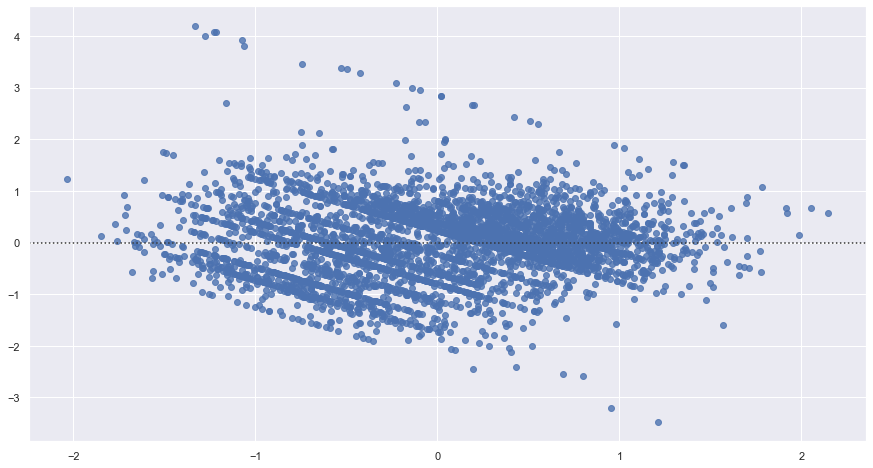

#H0: No heteroscedasticity is present 
 #Ha: heteroscedasticity is present
Heteroscedasticity_test 2.1168045433814775e-182


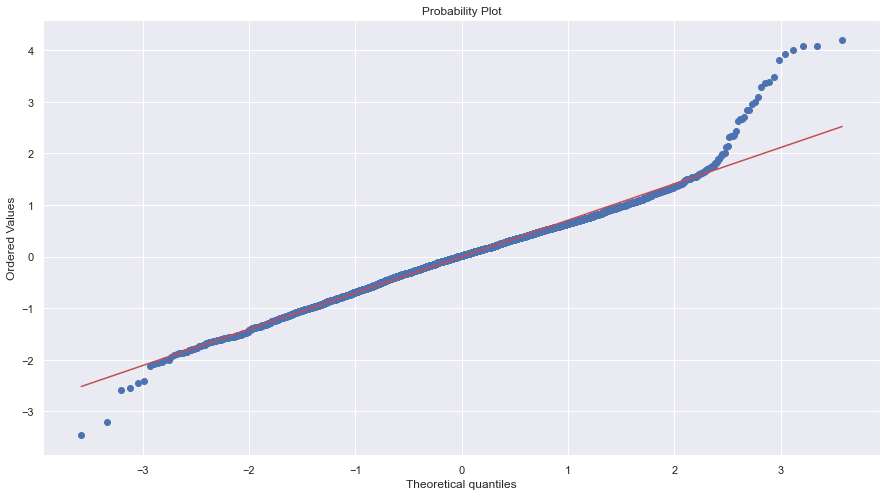

                       Features       VIF
15                  CollegeTier  9.302891
17                     Gender_m  4.411791
22                  JobCity_NCR  2.291462
20  branches_electronic_related  2.207059
9       CollegeState_SouthIndia  2.121301
19                 12percentage  2.114407
8                  10percentage  2.072261
4                JobCity_Others  1.843621
10         tenboard_State Board  1.741909
18     Test_Percentage_updated2  1.678649
13                        Quant  1.559659
3               JobCity_Missing  1.553611
14            JobCity_Hyderabad  1.523534
7                  JobCity_Pune  1.439704
2               JobCity_Chennai  1.436849
11                   collegeGPA  1.406422
1         Designation_Developer  1.380531
12                      English  1.355760
23            conscientiousness  1.319770
21           Designation_others  1.276083
6                    Degree_MCA  1.244834
26                  nueroticism  1.194228
24              JobCity_Kolkata  1

In [406]:
df_ols_new=df_ols.loc[:,good_features]
df_ols_new['Salary']=df_ols['Salary']
x1=df_ols_new.drop('Salary',axis=1)
X=sm.add_constant(x1)
y=df_ols_new.Salary
model_new=sm.OLS(y,X).fit()
assumptions(model=model_new,df=df_ols_new)

In [407]:
#Interestingly when we did assumption testing on the good_features we found that vif of College_Tier came to a
#right tolerance level
#This means that those were unnecessary information acting as noise to the data

In [408]:
#Before just dropping those columns lets try other feature selection techniques

In [409]:
df_new=capped.copy()
df_new.head()

Salary  10percentage  12percentage  collegeGPA   English   Logical  \
0  0.894090      0.600760      1.949169    0.858015  0.167080  0.967468   
1  1.214350      0.742841      0.957835   -0.193945  1.765987  1.285282   
2  0.398403      0.690747     -0.571733   -0.202196  1.074926  0.471600   
3  2.577193      0.769070      0.829680    0.421476  1.250032  0.967468   
4 -0.599265     -0.134339      0.208749    0.323859  0.446233  1.478520   

      Quant    Domain  conscientiousness  agreeableness  extraversion  \
0  0.090199 -0.039669           1.020827       0.701740      0.503476   
1  2.199087  1.474660          -0.743008       0.104561      1.405384   
2 -1.169702 -0.698852           0.210657       2.204741      0.083465   
3  0.913110  1.547406          -0.025228       0.061735     -0.447011   
4 -0.399531 -1.640860          -0.866095      -0.611505     -1.118980   

   nueroticism  openess_to_experience  Experience       Age  \
0     1.474928              -0.488692    1.469791  0.378504   
1     0.094725               1.144351    0.706417  0.873341   
2    -0.680597               0.855329    0.114510 -0.946799   
3    -0.206076              -0.894891    1.874470  0.873341   
4     0.290060              -0.172501   -0.582626 -0.223536   

   Test_Percentage_updated2  yr_since_graduated Designation   JobCity Gender  \
0                  0.283169            1.194488    Engineer  Banglore      f   
1                  0.500132            0.546176     Manager    Others      m   
2                 -0.257976           -1.105105    Engineer   Chennai      f   
3                  1.922777            1.194488    Engineer       NCR      m   
4                 -2.217507            0.546176     Trainee       NCR      m   

  tenboard twelveboard       Degree CollegeState            branches  \
0    Other       Other  B.Tech/B.E.      Central          IT_related   
1     CBSE        CBSE  B.Tech/B.E.      Central  electronic_related   
2     CBSE        CBSE  B.Tech/B.E.   NorthIndia          IT_related   
3     CBSE        CBSE  B.Tech/B.E.   NorthIndia          IT_related   
4     CBSE        CBSE  B.Tech/B.E.   NorthIndia  electronic_related   

   CollegeTier  CollegeCityTier  
0            2                0  
1            2                0  
2            2                0  
3            1                1  
4            2                0

In [410]:
df_new.columns

Index(['Salary', '10percentage', '12percentage', 'collegeGPA', 'English',
       'Logical', 'Quant', 'Domain', 'conscientiousness', 'agreeableness',
       'extraversion', 'nueroticism', 'openess_to_experience', 'Experience',
       'Age', 'Test_Percentage_updated2', 'yr_since_graduated', 'Designation',
       'JobCity', 'Gender', 'tenboard', 'twelveboard', 'Degree',
       'CollegeState', 'branches', 'CollegeTier', 'CollegeCityTier'],
      dtype='object')

In [411]:
#Lets do Anova Test and make a function for that
import statsmodels.formula.api as sma
anova_model2 = sma.ols('Salary ~ Designation + JobCity + Gender + tenboard + twelveboard + Degree + CollegeState + branches + CollegeTier + CollegeCityTier', data = df_new).fit()
anova_lm(anova_model2)

df       sum_sq     mean_sq           F        PR(>F)
Designation         5.0   337.335066   67.467013   87.697250  1.030573e-87
JobCity             8.0   144.614702   18.076838   23.497245  1.641114e-35
Gender              1.0     2.661754    2.661754    3.459891  6.294846e-02
tenboard            2.0   163.688319   81.844160  106.385438  9.872388e-46
twelveboard         2.0    13.976682    6.988341    9.083821  1.158663e-04
Degree              3.0     9.884213    3.294738    4.282677  5.021669e-03
CollegeState        4.0     7.030371    1.757593    2.284614  5.792526e-02
branches            2.0    11.660250    5.830125    7.578310  5.188673e-04
CollegeTier         1.0   121.007327  121.007327  157.291828  2.060054e-35
CollegeCityTier     1.0     0.226153    0.226153    0.293966  5.877204e-01
Residual         3965.0  3050.343155    0.769317         NaN           NaN

In [412]:
#CollegeState and Gender are doubtful in anova test
import statsmodels.stats.multicomp as multi_comp
from statsmodels.stats.multicomp import pairwise_tukeyhsd
# Perform Comparison Between Categories..
analysis2 = multi_comp.MultiComparison(data = df_new["Salary"], groups = df_new['CollegeState'])
pc2 = analysis2.tukeyhsd()
pc2.summary()

<class 'statsmodels.iolib.table.SimpleTable'>

In [413]:
analysis3 = multi_comp.MultiComparison(data = df_new["Salary"], groups = df_new['Gender'])
pc3 = analysis3.tukeyhsd()
pc3.summary()

<class 'statsmodels.iolib.table.SimpleTable'>

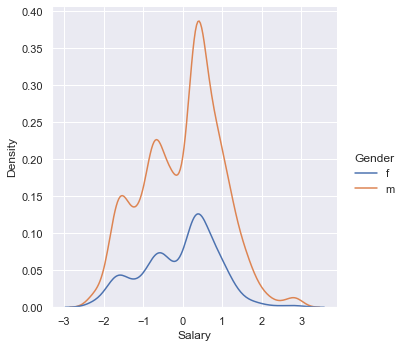

In [414]:
sns.displot(x=df_new.Salary,hue='Gender',data=df_new,kind='kde')

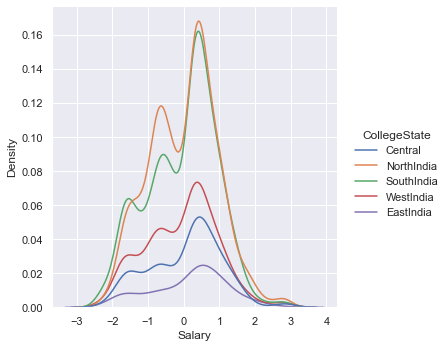

In [415]:
sns.displot(x=df_new.Salary,hue='CollegeState',data=df_new,kind='kde')

In [416]:
#Both gender and collegeState are insignificant variables according to anova test
#Gender can be a good variable but there is huge disbalance between gender Male number and Gender female number

In [417]:
#CollegeState was already not in good feature list
#Lets drop Gender from good_features then see the output
lr_output(df=df_ols,features=list(set(good_features)-set('Gender')))
#we can see that test mean has increased after dropping gender

train_mean 0.4773395684369508
train_std 0.006241048687253688
test_mean 0.4675970088979516


# Iteration 3a

In [418]:
#Lets do changes in CollegeState and then run ols
df_new.head()

Salary  10percentage  12percentage  collegeGPA   English   Logical  \
0  0.894090      0.600760      1.949169    0.858015  0.167080  0.967468   
1  1.214350      0.742841      0.957835   -0.193945  1.765987  1.285282   
2  0.398403      0.690747     -0.571733   -0.202196  1.074926  0.471600   
3  2.577193      0.769070      0.829680    0.421476  1.250032  0.967468   
4 -0.599265     -0.134339      0.208749    0.323859  0.446233  1.478520   

      Quant    Domain  conscientiousness  agreeableness  extraversion  \
0  0.090199 -0.039669           1.020827       0.701740      0.503476   
1  2.199087  1.474660          -0.743008       0.104561      1.405384   
2 -1.169702 -0.698852           0.210657       2.204741      0.083465   
3  0.913110  1.547406          -0.025228       0.061735     -0.447011   
4 -0.399531 -1.640860          -0.866095      -0.611505     -1.118980   

   nueroticism  openess_to_experience  Experience       Age  \
0     1.474928              -0.488692    1.469791  0.378504   
1     0.094725               1.144351    0.706417  0.873341   
2    -0.680597               0.855329    0.114510 -0.946799   
3    -0.206076              -0.894891    1.874470  0.873341   
4     0.290060              -0.172501   -0.582626 -0.223536   

   Test_Percentage_updated2  yr_since_graduated Designation   JobCity Gender  \
0                  0.283169            1.194488    Engineer  Banglore      f   
1                  0.500132            0.546176     Manager    Others      m   
2                 -0.257976           -1.105105    Engineer   Chennai      f   
3                  1.922777            1.194488    Engineer       NCR      m   
4                 -2.217507            0.546176     Trainee       NCR      m   

  tenboard twelveboard       Degree CollegeState            branches  \
0    Other       Other  B.Tech/B.E.      Central          IT_related   
1     CBSE        CBSE  B.Tech/B.E.      Central  electronic_related   
2     CBSE        CBSE  B.Tech/B.E.   NorthIndia          IT_related   
3     CBSE        CBSE  B.Tech/B.E.   NorthIndia          IT_related   
4     CBSE        CBSE  B.Tech/B.E.   NorthIndia  electronic_related   

   CollegeTier  CollegeCityTier  
0            2                0  
1            2                0  
2            2                0  
3            1                1  
4            2                0

In [419]:
df_new['CollegeState'].unique()

array(['Central', 'NorthIndia', 'SouthIndia', 'WestIndia', 'EastIndia'],
      dtype=object)

In [420]:
#Depending on Anova Results
def restructure(x):
    if (x=='Central' or x=='NorthIndia'):
        return 'others';
    else:
        return x;

In [421]:
df_3a=df_new.copy()
df_3a['CollegeState']=df_3a['CollegeState'].apply(restructure)
df_3a['CollegeState'].unique()

array(['others', 'SouthIndia', 'WestIndia', 'EastIndia'], dtype=object)

In [422]:
analysis4 = multi_comp.MultiComparison(data = df_3a["Salary"], groups = df_3a['CollegeState'])
pc4 = analysis4.tukeyhsd()
pc4.summary()

<class 'statsmodels.iolib.table.SimpleTable'>

# Iteration 3b

In [423]:
def restructure(x):
    if (x=='EastIndia'):
        return x;
    else:
        return 'others';

In [424]:
df_3b=df_new.copy()
df_3b['CollegeState']=df_3b['CollegeState'].apply(restructure)
df_3b['CollegeState'].unique()

array(['others', 'EastIndia'], dtype=object)

In [425]:
analysis5 = multi_comp.MultiComparison(data = df_3b["Salary"], groups = df_3b['CollegeState'])
pc5 = analysis5.tukeyhsd()
pc5.summary()

<class 'statsmodels.iolib.table.SimpleTable'>

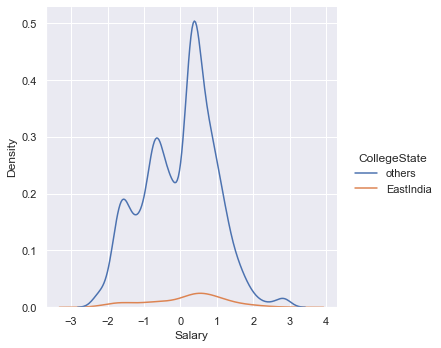

In [426]:
sns.displot(x=df_3b.Salary,hue='CollegeState',data=df_3b,kind='kde')

# Iteration 3c

In [427]:
def restructure(x):
    if (x=='EastIndia' or x=='NorthIndia' or x=='WestIndia'):
        return 'North';
    else:
        return 'South';

In [428]:
df_3c=df_new.copy()
df_3c['CollegeState']=df_3c['CollegeState'].apply(restructure)
df_3c['CollegeState'].unique()

array(['South', 'North'], dtype=object)

In [429]:
analysis6 = multi_comp.MultiComparison(data = df_3c["Salary"], groups = df_3c['CollegeState'])
pc6 = analysis6.tukeyhsd()
pc6.summary()

<class 'statsmodels.iolib.table.SimpleTable'>

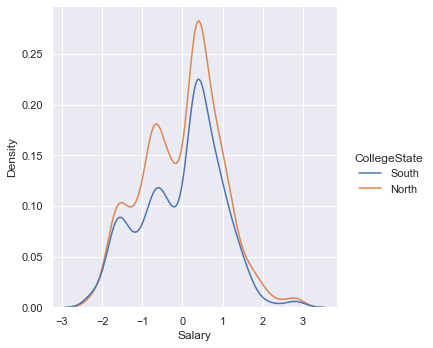

In [430]:
sns.displot(x=df_3c.Salary,hue='CollegeState',data=df_3c,kind='kde')

In [431]:
#We can see that anyhw we aren't able to get productive output from this CollegeState
#Even Its not making buiseness Sense so It would be better to drop College State for further analysis 
#Lets drop CollegeState and make a new DataFrame for futher

In [432]:
df_model2=df_new.drop('CollegeState',axis=1)
df_model2.head()

Salary  10percentage  12percentage  collegeGPA   English   Logical  \
0  0.894090      0.600760      1.949169    0.858015  0.167080  0.967468   
1  1.214350      0.742841      0.957835   -0.193945  1.765987  1.285282   
2  0.398403      0.690747     -0.571733   -0.202196  1.074926  0.471600   
3  2.577193      0.769070      0.829680    0.421476  1.250032  0.967468   
4 -0.599265     -0.134339      0.208749    0.323859  0.446233  1.478520   

      Quant    Domain  conscientiousness  agreeableness  extraversion  \
0  0.090199 -0.039669           1.020827       0.701740      0.503476   
1  2.199087  1.474660          -0.743008       0.104561      1.405384   
2 -1.169702 -0.698852           0.210657       2.204741      0.083465   
3  0.913110  1.547406          -0.025228       0.061735     -0.447011   
4 -0.399531 -1.640860          -0.866095      -0.611505     -1.118980   

   nueroticism  openess_to_experience  Experience       Age  \
0     1.474928              -0.488692    1.469791  0.378504   
1     0.094725               1.144351    0.706417  0.873341   
2    -0.680597               0.855329    0.114510 -0.946799   
3    -0.206076              -0.894891    1.874470  0.873341   
4     0.290060              -0.172501   -0.582626 -0.223536   

   Test_Percentage_updated2  yr_since_graduated Designation   JobCity Gender  \
0                  0.283169            1.194488    Engineer  Banglore      f   
1                  0.500132            0.546176     Manager    Others      m   
2                 -0.257976           -1.105105    Engineer   Chennai      f   
3                  1.922777            1.194488    Engineer       NCR      m   
4                 -2.217507            0.546176     Trainee       NCR      m   

  tenboard twelveboard       Degree            branches  CollegeTier  \
0    Other       Other  B.Tech/B.E.          IT_related            2   
1     CBSE        CBSE  B.Tech/B.E.  electronic_related            2   
2     CBSE        CBSE  B.Tech/B.E.          IT_related            2   
3     CBSE        CBSE  B.Tech/B.E.          IT_related            1   
4     CBSE        CBSE  B.Tech/B.E.  electronic_related            2   

   CollegeCityTier  
0                0  
1                0  
2                0  
3                1  
4                0

In [433]:
df_new2=pd.get_dummies(df_model2,drop_first=True)
df_new2.shape[1]
#Its now 42 columns after dummies

42

In [434]:
x=df_new2.drop('Salary',axis=1)
X=sm.add_constant(x)
y=df_new2.Salary
model3=sm.OLS(y,X).fit()
model3.summary()
#Rerunning ols after dropping collegeState

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.476
Model:                            OLS   Adj. R-squared:                  0.471
Method:                 Least Squares   F-statistic:                     87.72
Date:                Tue, 19 Apr 2022   Prob (F-statistic):               0.00
Time:                        15:56:37   Log-Likelihood:                -4308.8
No. Observations:                3995   AIC:                             8702.
Df Residuals:                    3953   BIC:                             8966.
Df Model:                          41                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                           0.9856      0.105      9.367      0.000       0.779       1.192
10percentage                    0.0470      0.017      2.819      0.005       0.014       0.080
12percentage                    0.0568      0.017      3.337      0.001       0.023       0.090
collegeGPA                      0.0975      0.014      7.038      0.000       0.070       0.125
English                         0.0873      0.014      6.229      0.000       0.060       0.115
Logical                         0.0159      0.014      1.094      0.274      -0.013       0.044
Quant                           0.1052      0.015      7.068      0.000       0.076       0.134
Domain                         -0.0032      0.021     -0.152      0.879      -0.045       0.038
conscientiousness              -0.0358      0.014     -2.541      0.011      -0.063      -0.008
agreeableness                   0.0116      0.015      0.765      0.445      -0.018       0.041
extraversion                    0.0474      0.013      3.549      0.000       0.021       0.074
nueroticism                    -0.0301      0.013     -2.391      0.017      -0.055      -0.005
openess_to_experience          -0.0135      0.014     -0.971      0.332      -0.041       0.014
Experience                      0.4321      0.015     29.768      0.000       0.404       0.461
Age                             0.0024      0.021      0.118      0.906      -0.038       0.043
Test_Percentage_updated2        0.0651      0.025      2.561      0.010       0.015       0.115
yr_since_graduated             -0.0303      0.022     -1.383      0.167      -0.073       0.013
CollegeTier                    -0.3322      0.047     -7.106      0.000      -0.424      -0.241
CollegeCityTier                -0.0143      0.027     -0.540      0.589      -0.066       0.038
Designation_Developer          -0.2885      0.045     -6.395      0.000      -0.377      -0.200
Designation_Engineer           -0.0196      0.039     -0.505      0.614      -0.096       0.057
Designation_Manager             0.3919      0.076      5.188      0.000       0.244       0.540
Designation_Trainee            -0.1533      0.077     -2.002      0.045      -0.303      -0.003
Designation_others             -0.2963      0.048     -6.201      0.000      -0.390      -0.203
JobCity_Chennai                -0.2495      0.050     -4.947      0.000      -0.348      -0.151
JobCity_Hyderabad              -0.2690      0.048     -5.593      0.000      -0.363      -0.175
JobCity_Kolkata                -0.5120      0.072     -7.073      0.000      -0.654      -0.370
JobCity_Missing                -0.3171      0.044     -7.249      0.000      -0.403      -0.231
JobCity_Mumbai                 -0.0131      0.064     -0.204      0.838      -0.139       0.113
JobCity_NCR

In [435]:
pval2=model3.pvalues
len(pval2[pval2>0.05])
#Still these 15 columns are insignificant need to be treated with care

15

# Iteration 3d

In [436]:
#Lets do Lasso and ridge

In [577]:
def linearmodel_output(df):
        from sklearn.linear_model import Lasso
        from sklearn.linear_model import ElasticNet
        from sklearn.linear_model import Ridge
        model1=Lasso(alpha=0.005)
        model2=Ridge(alpha=0.01)
        model3=ElasticNet(alpha=0.1,l1_ratio=0.2)
        model4=LinearRegression()
        
        x=df.drop('Salary',axis=1)
        y=df.Salary
        x_cross=x
        y_cross=y
        
        n=round(len(y_cross)/5)
        p=x_cross.shape[1]
        
        output_cross1=cross_validate(estimator=model1,X=x_cross,y=y_cross,cv=5,return_train_score=True)
        output_cross2=cross_validate(estimator=model2,X=x_cross,y=y_cross,cv=5,return_train_score=True)
        output_cross3=cross_validate(estimator=model3,X=x_cross,y=y_cross,cv=5,return_train_score=True)
        output_cross4=cross_validate(estimator=model4,X=x_cross,y=y_cross,cv=5,return_train_score=True)
        
        output_cross_df1=pd.DataFrame({'Train_score':output_cross1['train_score'],'Test_score':output_cross1['test_score'],
                                      'adjusted_r2':1-(1-output_cross1['test_score'])*(n-1)/(n-p-1)})
        output_cross_df2=pd.DataFrame({'Train_score':output_cross2['train_score'],'Test_score':output_cross2['test_score'],
                                      'adjusted_r2':1-(1-output_cross2['test_score'])*(n-1)/(n-p-1)})
        output_cross_df3=pd.DataFrame({'Train_score':output_cross3['train_score'],'Test_score':output_cross3['test_score'],
                                      'adjusted_r2':1-(1-output_cross3['test_score'])*(n-1)/(n-p-1)})
        output_cross_df4=pd.DataFrame({'Train_score':output_cross4['train_score'],'Test_score':output_cross4['test_score'],
                                      'adjusted_r2':1-(1-output_cross4['test_score'])*(n-1)/(n-p-1)})
                         
        output=pd.DataFrame({'model':['Lasso','Ridge','ElasticNet','LinearRegression'],'Train_output':[output_cross_df1['Train_score'].mean(),
        output_cross_df2['Train_score'].mean(),output_cross_df3['Train_score'].mean(),output_cross_df4['Train_score'].mean()],
        'Test_Output':[output_cross_df1['Test_score'].mean(),
        output_cross_df2['Test_score'].mean(),output_cross_df3['Test_score'].mean(),output_cross_df4['Test_score'].mean()],
         'adjusted_r2_test':[output_cross_df1['adjusted_r2'].mean(),
        output_cross_df2['adjusted_r2'].mean(),output_cross_df3['adjusted_r2'].mean(),output_cross_df4['adjusted_r2'].mean()]})
        return output
    

In [578]:
linearmodel_output(df=df_new2)

model  Train_output  Test_Output  adjusted_r2_test
0             Lasso      0.467995     0.456562          0.427129
1             Ridge      0.477746     0.463512          0.434455
2        ElasticNet      0.422011     0.416305          0.384692
3  LinearRegression      0.477746     0.463511          0.434454

In [579]:
#We can see that The output is more or less similar although Tuning These models can lead to better results
#Because There is no serious overfitting so these regularising models are not that significant

In [580]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor
from xgboost import XGBRegressor

In [581]:
def bagging_boosting_models(df):
        x=df.drop('Salary',axis=1)
        y=df.Salary
        x_cross=x
        y_cross=y
        model1=DecisionTreeRegressor(max_depth=5)
        model2=RandomForestRegressor()
        model3=GradientBoostingRegressor()
        model4=AdaBoostRegressor()
        model5=XGBRegressor()
        
        n=round(len(y_cross)/5)
        p=x_cross.shape[1]
        
        output_cross1=cross_validate(estimator=model1,X=x_cross,y=y_cross,cv=5,return_train_score=True)
        output_cross2=cross_validate(estimator=model2,X=x_cross,y=y_cross,cv=5,return_train_score=True)
        output_cross3=cross_validate(estimator=model3,X=x_cross,y=y_cross,cv=5,return_train_score=True)
        output_cross4=cross_validate(estimator=model4,X=x_cross,y=y_cross,cv=5,return_train_score=True)
        output_cross5=cross_validate(estimator=model5,X=x_cross,y=y_cross,cv=5,return_train_score=True)
        
        #Adjusted_r_squared
        #1-(1-r**2)*(n-1)/(n-p-1)
        
        output_cross_df1=pd.DataFrame({'Train_score':output_cross1['train_score'],'Test_score':output_cross1['test_score'],
                                'adjusted_r2':1-(1-output_cross1['test_score'])*(n-1)/(n-p-1)})
        output_cross_df2=pd.DataFrame({'Train_score':output_cross2['train_score'],'Test_score':output_cross2['test_score'],
                                'adjusted_r2':1-(1-output_cross2['test_score'])*(n-1)/(n-p-1)})
        output_cross_df3=pd.DataFrame({'Train_score':output_cross3['train_score'],'Test_score':output_cross3['test_score'],
                                'adjusted_r2':1-(1-output_cross3['test_score'])*(n-1)/(n-p-1)})
        output_cross_df4=pd.DataFrame({'Train_score':output_cross4['train_score'],'Test_score':output_cross4['test_score'],
                                'adjusted_r2':1-(1-output_cross4['test_score'])*(n-1)/(n-p-1)})
        output_cross_df5=pd.DataFrame({'Train_score':output_cross5['train_score'],'Test_score':output_cross5['test_score'],
                                'adjusted_r2':1-(1-output_cross5['test_score'])*(n-1)/(n-p-1)})
                                       
        
        
        output=pd.DataFrame({'model':['DecisionTree','RandomForest','GradientBoosting','AdaBoost','XGBoost'],'Train_output':[output_cross_df1['Train_score'].mean(),
        output_cross_df2['Train_score'].mean(),output_cross_df3['Train_score'].mean(),output_cross_df4['Train_score'].mean(),
        output_cross_df5['Train_score'].mean()],
        'Test_Output':[output_cross_df1['Test_score'].mean(),
        output_cross_df2['Test_score'].mean(),output_cross_df3['Test_score'].mean(),output_cross_df4['Test_score'].mean(),
        output_cross_df5['Test_score'].mean()],
        'adjusted_r2_test':[output_cross_df1['adjusted_r2'].mean(),
        output_cross_df2['adjusted_r2'].mean(),output_cross_df3['adjusted_r2'].mean(),output_cross_df4['adjusted_r2'].mean(),
        output_cross_df5['adjusted_r2'].mean()]
        })
        return output
    

In [582]:
bagging_boosting_models(df=df_new2)

model  Train_output  Test_Output  adjusted_r2_test
0      DecisionTree      0.441892     0.333030          0.296907
1      RandomForest      0.921845     0.439865          0.409528
2  GradientBoosting      0.604974     0.475172          0.446746
3          AdaBoost      0.341570     0.286231          0.247572
4           XGBoost      0.976987     0.380069          0.346493

In [583]:
#These models are overfitted but a fair chance that these can give good results after tuning

In [584]:
pval2[pval>0.05]

Logical                    0.273825
Domain                     0.879341
agreeableness              0.444596
openess_to_experience      0.331632
Age                        0.906410
yr_since_graduated         0.166759
CollegeCityTier            0.589296
Designation_Engineer       0.613898
JobCity_Mumbai             0.838280
tenboard_Other             0.198794
twelveboard_Other          0.755345
twelveboard_State Board    0.271000
Degree_M.Sc. (Tech.)       0.342660
Degree_M.Tech./M.E.        0.906586
branches_others            0.980648
dtype: float64

In [585]:
#Lets create a function feature selector
def feature_selector(df):
    x=df.drop('Salary',axis=1)
    y=df.Salary
    lin_sfs2 = LinearRegression()
    # forward = false : Backward Selection Method...

    sfsModel2 = sfs(estimator = lin_sfs2, k_features = "best", forward=False, cv = 5, scoring = "r2") 

    sfsModel2.fit(x, y)
    print("Redundant Features_backward: ",'\n', list(set(x.columns)-set(sfsModel2.k_feature_names_)),'\n')
    print("R2 Score_backward: ", sfsModel2.k_score_)
    
    
    from sklearn.feature_selection import RFE
    lr_rfe = LinearRegression()
    rfe = RFE(estimator = lr_rfe, n_features_to_select=30)
    rfe_feats=rfe.fit_transform(x,y)
    #r2 score post RFE
    #features 
    feat_index=rfe.get_support(indices=True)# Print the Column Nos...
    set_rfe=set(x.columns)-set(x.iloc[:,feat_index].columns)
    print("Redundant Features_recursive: ",'\n', list(set_rfe),'\n')
    
    
    from sklearn.linear_model import Lasso
    ls=Lasso(alpha=0.005)
    ls.fit(x,y)
    features=ls.coef_
    my_list=[]
    for i in range(x.shape[1]):
        if (features[i]==0):
             my_list.append(i)
    print('redundant_features_lasso','\n',x.iloc[:,my_list].columns,'\n')
    
    from sklearn.model_selection import train_test_split
    xtrain2,xtest2,ytrain2,ytest2=train_test_split(x,y,random_state=1,test_size=0.2)
    rf=RandomForestRegressor()
    rf.fit(xtrain2,ytrain2)
    features2=rf.feature_importances_
    my_list2=[]
    for i in range(x.shape[1]):
         if (features2[i]<0.003):
                my_list2.append(i)
    print('redundant_features_rf','\n',x.iloc[:,my_list2].columns,'\n')
    
    X=sm.add_constant(x)
    model=sm.OLS(y,X).fit()
    pval=model.pvalues
    feature_pval=set(pval[pval>0.05].index)
    print('redundant_feature_pval','\n',feature_pval,'\n')
    
    feature_sfs=set(x.columns)-set(sfsModel2.k_feature_names_)
    feature_rfe=set_rfe
    feature_lasso=set(x.iloc[:,my_list].columns)
    feature_rf=set(x.iloc[:,my_list2].columns)
    feature_pval=set(pval[pval>0.05].index)
    
    print('worst_features','\n',
         feature_sfs.intersection(feature_rfe).intersection(feature_lasso).intersection(feature_rf).intersection(feature_pval))

In [586]:
feature_selector(df_new2)

Redundant Features_backward:  
 ['agreeableness', 'Logical', 'twelveboard_Other', 'openess_to_experience', 'tenboard_Other', 'Designation_Engineer', 'twelveboard_State Board', 'branches_others', 'JobCity_Mumbai', 'Domain', 'Degree_M.Tech./M.E.', 'Age', 'CollegeCityTier'] 

R2 Score_backward:  0.4668243934361619
Redundant Features_recursive:  
 ['agreeableness', 'Logical', 'twelveboard_Other', 'openess_to_experience', 'Designation_Engineer', 'branches_others', 'JobCity_Mumbai', 'Domain', 'Degree_M.Tech./M.E.', 'Age', 'CollegeCityTier'] 

redundant_features_lasso 
 Index(['Domain', 'CollegeCityTier', 'Designation_Trainee', 'JobCity_Mumbai',
       'JobCity_Pune', 'twelveboard_Other', 'Degree_M.Sc. (Tech.)',
       'Degree_M.Tech./M.E.', 'branches_others'],
      dtype='object') 

redundant_features_rf 
 Index(['Designation_Trainee', 'JobCity_Chennai', 'JobCity_Hyderabad',
       'JobCity_Kolkata', 'JobCity_Missing', 'JobCity_Mumbai', 'JobCity_Pune',
       'tenboard_Other', 'twelveboard_

In [587]:
def ols_report(df):
    x=df.drop('Salary',axis=1)
    y=df.Salary
    X=sm.add_constant(x)
    model=sm.OLS(y,X).fit()
    return model.summary()

In [588]:
#Lets create dataframe after dropping these variables
df_3d=df_new2.drop(['branches_others', 'Degree_M.Tech./M.E.', 'CollegeCityTier', 'JobCity_Mumbai', 'twelveboard_Other'],axis=1)

In [589]:
feature_selector(df_3d)

Redundant Features_backward:  
 ['agreeableness', 'Logical', 'openess_to_experience', 'tenboard_Other', 'Designation_Engineer', 'twelveboard_State Board', 'Domain', 'Age'] 

R2 Score_backward:  0.4668243934361619
Redundant Features_recursive:  
 ['agreeableness', 'Logical', 'openess_to_experience', 'Designation_Engineer', 'Domain', 'Age'] 

redundant_features_lasso 
 Index(['Domain', 'Designation_Trainee', 'JobCity_Pune',
       'Degree_M.Sc. (Tech.)'],
      dtype='object') 

redundant_features_rf 
 Index(['Designation_Trainee', 'JobCity_Chennai', 'JobCity_Hyderabad',
       'JobCity_Kolkata', 'JobCity_Pune', 'tenboard_State Board',
       'Degree_M.Sc. (Tech.)', 'Degree_MCA'],
      dtype='object') 

redundant_feature_pval 
 {'agreeableness', 'Logical', 'openess_to_experience', 'tenboard_Other', 'Designation_Engineer', 'twelveboard_State Board', 'Domain', 'Degree_M.Sc. (Tech.)', 'yr_since_graduated', 'Age'} 

worst_features 
 set()


In [590]:
#these were the most problematic features These needs to be removed or restructured in case of columns

In [591]:
linearmodel_output(df_3d)

model  Train_output  Test_Output  adjusted_r2_test
0             Lasso      0.467947     0.456716          0.431049
1             Ridge      0.477531     0.464934          0.439655
2        ElasticNet      0.422011     0.416305          0.388729
3  LinearRegression      0.477531     0.464933          0.439655

In [592]:
bagging_boosting_models(df_3d)

model  Train_output  Test_Output  adjusted_r2_test
0      DecisionTree      0.441892     0.331881          0.300317
1      RandomForest      0.921598     0.434156          0.407423
2  GradientBoosting      0.603983     0.475428          0.450645
3          AdaBoost      0.338012     0.283538          0.249690
4           XGBoost      0.975754     0.378432          0.349067

In [593]:
#No change after dropping these variables
df_model['JobCity'].unique()

array(['Banglore', 'Others', 'Chennai', 'NCR', 'Hyderabad', 'Kolkata',
       'Pune', 'Missing', 'Mumbai'], dtype=object)

In [594]:
df_new2.columns

Index(['Salary', '10percentage', '12percentage', 'collegeGPA', 'English',
       'Logical', 'Quant', 'Domain', 'conscientiousness', 'agreeableness',
       'extraversion', 'nueroticism', 'openess_to_experience', 'Experience',
       'Age', 'Test_Percentage_updated2', 'yr_since_graduated', 'CollegeTier',
       'CollegeCityTier', 'Designation_Developer', 'Designation_Engineer',
       'Designation_Manager', 'Designation_Trainee', 'Designation_others',
       'JobCity_Chennai', 'JobCity_Hyderabad', 'JobCity_Kolkata',
       'JobCity_Missing', 'JobCity_Mumbai', 'JobCity_NCR', 'JobCity_Others',
       'JobCity_Pune', 'Gender_m', 'tenboard_Other', 'tenboard_State Board',
       'twelveboard_Other', 'twelveboard_State Board', 'Degree_M.Sc. (Tech.)',
       'Degree_M.Tech./M.E.', 'Degree_MCA', 'branches_electronic_related',
       'branches_others'],
      dtype='object')

In [595]:
#Thus shows that model is fine when job_city Banglore is combined with Job_city Mumbai
#Dropping means we combined both categories and combined category made in backend

In [596]:
df_model2['twelveboard'].value_counts()
#Thus shows that model is fine when twelveboard_other is combined with twelveboard_cbse
#Dropping means we combined both categories and combined category made in backend

CBSE           1759
State Board    1301
Other           935
Name: twelveboard, dtype: int64

In [597]:
df_model2['Degree'].value_counts()
#Thus shows that model is fine when B.tech is combined with M.tech/M.E
#Dropping means we combined both categories and combined category made in backend

B.Tech/B.E.      3697
MCA               243
M.Tech./M.E.       53
M.Sc. (Tech.)       2
Name: Degree, dtype: int64

In [598]:
df_model2['branches'].value_counts()

IT_related            2286
electronic_related    1405
others                 304
Name: branches, dtype: int64

In [599]:
df_new2.shape
#This is dataframe after the dropped columns

(3995, 42)

# Iteration 3E

In [600]:
#In this iteration we will restructure these columns

In [601]:
def restructure_degree(x):
    if (x=='B.Tech/B.E.'):
        return 'ug'
    else:
        return 'pg'
    

In [602]:
def restructure_twelve_board(x):
    if (x=='CBSE'):
        return x
    else:
        return 'others'
    

In [603]:
def restructure_job_city(x):
    if (x=='Banglore' or x=='Mumbai'):
        return 'Bang/Mum'
    else:
        return x

In [604]:
def restructure_branches(x):
    if (x=='IT_related'):
        return x
    else:
        return 'others'

In [605]:
df_3e=df_model2.drop('CollegeCityTier',axis=1).copy()
df_3e['branches']=df_3e['branches'].apply(restructure_branches)
df_3e['Degree']=df_3e['Degree'].apply(restructure_degree)
df_3e['JobCity']=df_3e['JobCity'].apply(restructure_job_city)
df_3e['twelveboard']=df_3e['twelveboard'].apply(restructure_twelve_board)

In [606]:
df_3e['branches'].unique()

array(['IT_related', 'others'], dtype=object)

In [607]:
df_3e['JobCity'].unique()

array(['Bang/Mum', 'Others', 'Chennai', 'NCR', 'Hyderabad', 'Kolkata',
       'Pune', 'Missing'], dtype=object)

In [608]:
df_3e['twelveboard'].unique()

array(['others', 'CBSE'], dtype=object)

In [609]:
df_3e['Degree'].unique()

array(['ug', 'pg'], dtype=object)

In [610]:
df_new3=pd.get_dummies(df_3e,drop_first=True)

In [611]:
df_new3.columns

Index(['Salary', '10percentage', '12percentage', 'collegeGPA', 'English',
       'Logical', 'Quant', 'Domain', 'conscientiousness', 'agreeableness',
       'extraversion', 'nueroticism', 'openess_to_experience', 'Experience',
       'Age', 'Test_Percentage_updated2', 'yr_since_graduated', 'CollegeTier',
       'Designation_Developer', 'Designation_Engineer', 'Designation_Manager',
       'Designation_Trainee', 'Designation_others', 'JobCity_Chennai',
       'JobCity_Hyderabad', 'JobCity_Kolkata', 'JobCity_Missing',
       'JobCity_NCR', 'JobCity_Others', 'JobCity_Pune', 'Gender_m',
       'tenboard_Other', 'tenboard_State Board', 'twelveboard_others',
       'Degree_ug', 'branches_others'],
      dtype='object')

In [612]:
linearmodel_output(df_new3)

model  Train_output  Test_Output  adjusted_r2_test
0             Lasso      0.467153     0.456675          0.431752
1             Ridge      0.476585     0.464083          0.439500
2        ElasticNet      0.421856     0.416092          0.389307
3  LinearRegression      0.476585     0.464083          0.439499

In [613]:
bagging_boosting_models(df_new3)


model  Train_output  Test_Output  adjusted_r2_test
0      DecisionTree      0.441840     0.332113          0.301476
1      RandomForest      0.922063     0.438369          0.412607
2  GradientBoosting      0.604193     0.476654          0.452647
3          AdaBoost      0.344031     0.287890          0.255225
4           XGBoost      0.977569     0.386172          0.358015

In [614]:
feature_selector(df_new3)

Redundant Features_backward:  
 ['agreeableness', 'Logical', 'openess_to_experience', 'twelveboard_others', 'tenboard_Other', 'Designation_Engineer', 'Domain', 'Age'] 

R2 Score_backward:  0.46624511709028715
Redundant Features_recursive:  
 ['agreeableness', 'Logical', 'openess_to_experience', 'Domain', 'Age'] 

redundant_features_lasso 
 Index(['Domain', 'Designation_Trainee', 'JobCity_Pune', 'tenboard_Other'], dtype='object') 

redundant_features_rf 
 Index(['Designation_Trainee', 'JobCity_Chennai', 'JobCity_Hyderabad',
       'JobCity_Kolkata', 'JobCity_Pune'],
      dtype='object') 

redundant_feature_pval 
 {'agreeableness', 'Logical', 'openess_to_experience', 'twelveboard_others', 'tenboard_Other', 'Designation_Engineer', 'branches_others', 'Designation_Trainee', 'Domain', 'yr_since_graduated', 'Age'} 

worst_features 
 set()


In [615]:
#We found that the restructuring of categories led to The drop in The scores meaning the underfitting

# Iteration 3f

In [616]:
df_new2.columns

Index(['Salary', '10percentage', '12percentage', 'collegeGPA', 'English',
       'Logical', 'Quant', 'Domain', 'conscientiousness', 'agreeableness',
       'extraversion', 'nueroticism', 'openess_to_experience', 'Experience',
       'Age', 'Test_Percentage_updated2', 'yr_since_graduated', 'CollegeTier',
       'CollegeCityTier', 'Designation_Developer', 'Designation_Engineer',
       'Designation_Manager', 'Designation_Trainee', 'Designation_others',
       'JobCity_Chennai', 'JobCity_Hyderabad', 'JobCity_Kolkata',
       'JobCity_Missing', 'JobCity_Mumbai', 'JobCity_NCR', 'JobCity_Others',
       'JobCity_Pune', 'Gender_m', 'tenboard_Other', 'tenboard_State Board',
       'twelveboard_Other', 'twelveboard_State Board', 'Degree_M.Sc. (Tech.)',
       'Degree_M.Tech./M.E.', 'Degree_MCA', 'branches_electronic_related',
       'branches_others'],
      dtype='object')

In [617]:
#Lets drop 2 columns agreebles and logical
#These are numerical columns and was found redundant in rfe,sfs, and pvalue
df_new4=df_new2.drop(['agreeableness','Logical','CollegeCityTier'],axis=1)

In [618]:
linearmodel_output(df_new4)

model  Train_output  Test_Output  adjusted_r2_test
0             Lasso      0.467708     0.456943          0.429790
1             Ridge      0.477330     0.464326          0.437542
2        ElasticNet      0.421786     0.416394          0.387213
3  LinearRegression      0.477330     0.464325          0.437541

In [619]:
bagging_boosting_models(df_new4)

model  Train_output  Test_Output  adjusted_r2_test
0      DecisionTree      0.440757     0.338637          0.305569
1      RandomForest      0.922322     0.439151          0.411109
2  GradientBoosting      0.601151     0.468289          0.441703
3          AdaBoost      0.344005     0.293877          0.258571
4           XGBoost      0.973549     0.388648          0.358080

In [620]:
#df_new4 is the column we will use for further iterations


# Iteration 3g

In [621]:
df_new4.head()

Salary  10percentage  12percentage  collegeGPA   English     Quant  \
0  0.894090      0.600760      1.949169    0.858015  0.167080  0.090199   
1  1.214350      0.742841      0.957835   -0.193945  1.765987  2.199087   
2  0.398403      0.690747     -0.571733   -0.202196  1.074926 -1.169702   
3  2.577193      0.769070      0.829680    0.421476  1.250032  0.913110   
4 -0.599265     -0.134339      0.208749    0.323859  0.446233 -0.399531   

     Domain  conscientiousness  extraversion  nueroticism  \
0 -0.039669           1.020827      0.503476     1.474928   
1  1.474660          -0.743008      1.405384     0.094725   
2 -0.698852           0.210657      0.083465    -0.680597   
3  1.547406          -0.025228     -0.447011    -0.206076   
4 -1.640860          -0.866095     -1.118980     0.290060   

   openess_to_experience  Experience       Age  Test_Percentage_updated2  \
0              -0.488692    1.469791  0.378504                  0.283169   
1               1.144351    0.706417  0.873341                  0.500132   
2               0.855329    0.114510 -0.946799                 -0.257976   
3              -0.894891    1.874470  0.873341                  1.922777   
4              -0.172501   -0.582626 -0.223536                 -2.217507   

   yr_since_graduated  CollegeTier  Designation_Developer  \
0            1.194488            2                      0   
1            0.546176            2                      0   
2           -1.105105            2                      0   
3            1.194488            1                      0   
4            0.546176            2                      0   

   Designation_Engineer  Designation_Manager  Designation_Trainee  \
0                     1                    0                    0   
1                     0                    1                    0   
2                     1                    0                    0   
3                     1                    0                    0   
4                     0                    0                    1   

   Designation_others  JobCity_Chennai  JobCity_Hyderabad  JobCity_Kolkata  \
0                   0                0                  0                0   
1                   0                0                  0                0   
2                   0                1                  0                0   
3                   0                0                  0                0   
4                   0                0                  0                0   

   JobCity_Missing  JobCity_Mumbai  JobCity_NCR  JobCity_Others  JobCity_Pune  \
0                0               0            0               0             0   
1                0               0            0               1             0   
2                0               0            0               0             0   
3                0               0            1               0             0   
4                0               0            1               0             0   

   Gender_m  tenboard_Other  tenboard_State Board  twelveboard_Other  \
0         0               1                     0                  1   
1         1               0                     0                  0   
2         0               0                     0                  0   
3         1               0                     0                  0   
4         1               0                     0                  0   

   twelveboard_State Board  Degree_M.Sc. (Tech.)  Degree_M.Tech./M.E.  \
0                        0                     0                    0   
1                        0                     0                    0   
2                        0                     0                    0   
3                        0                     0                    0   
4                        0                     0                    0   

   Degree_MCA  branches_electronic_related  branches_others  
0           0                            0                

In [622]:
#Lets drop Domain and drop Gender one by one
df_new5=df_new4.drop('Domain',axis=1)
linearmodel_output(df_new5)

model  Train_output  Test_Output  adjusted_r2_test
0             Lasso      0.467708     0.456942          0.430538
1             Ridge      0.477318     0.464394          0.438353
2        ElasticNet      0.421791     0.416446          0.388073
3  LinearRegression      0.477318     0.464393          0.438352

In [623]:
#Output has got better
#lets drop gender now
df_new6=df_new5.drop('Gender_m',axis=1)
linearmodel_output(df_new6)

model  Train_output  Test_Output  adjusted_r2_test
0             Lasso      0.465161     0.454717          0.428956
1             Ridge      0.474512     0.461730          0.436300
2        ElasticNet      0.421601     0.416322          0.388747
3  LinearRegression      0.474512     0.461729          0.436299

In [624]:
#It has dropped a little so we wont remove gender out of the dataframe
#After this iteration df_new5 is our final dataFrame

# Iteration 3h

In [625]:
df_new5.columns

Index(['Salary', '10percentage', '12percentage', 'collegeGPA', 'English',
       'Quant', 'conscientiousness', 'extraversion', 'nueroticism',
       'openess_to_experience', 'Experience', 'Age',
       'Test_Percentage_updated2', 'yr_since_graduated', 'CollegeTier',
       'Designation_Developer', 'Designation_Engineer', 'Designation_Manager',
       'Designation_Trainee', 'Designation_others', 'JobCity_Chennai',
       'JobCity_Hyderabad', 'JobCity_Kolkata', 'JobCity_Missing',
       'JobCity_Mumbai', 'JobCity_NCR', 'JobCity_Others', 'JobCity_Pune',
       'Gender_m', 'tenboard_Other', 'tenboard_State Board',
       'twelveboard_Other', 'twelveboard_State Board', 'Degree_M.Sc. (Tech.)',
       'Degree_M.Tech./M.E.', 'Degree_MCA', 'branches_electronic_related',
       'branches_others'],
      dtype='object')

In [626]:
#In this iteration lets try doin feature extraction from 3 columns
df_3h=df_new5.copy()
df_3h['personality_traits']=df_3h['conscientiousness']+df_3h['extraversion']+df_3h['nueroticism']
df_new6=df_3h.drop(['conscientiousness','extraversion','nueroticism'],axis=1)
linearmodel_output(df_new6)

model  Train_output  Test_Output  adjusted_r2_test
0             Lasso      0.464794     0.454719          0.429706
1             Ridge      0.474314     0.461784          0.437095
2        ElasticNet      0.420145     0.415596          0.388789
3  LinearRegression      0.474314     0.461783          0.437095

In [627]:
bagging_boosting_models(df_new6)

model  Train_output  Test_Output  adjusted_r2_test
0      DecisionTree      0.440395     0.336453          0.306015
1      RandomForest      0.922705     0.441040          0.415400
2  GradientBoosting      0.595241     0.469285          0.444941
3          AdaBoost      0.345798     0.300775          0.268701
4           XGBoost      0.964987     0.397993          0.370378

In [628]:
#gb and random_forest also got better

In [629]:
feature_selector(df_new6)

Redundant Features_backward:  
 ['twelveboard_Other', 'openess_to_experience', 'tenboard_Other', 'Designation_Engineer', 'twelveboard_State Board', 'branches_others', 'JobCity_Mumbai', 'Degree_M.Tech./M.E.', 'personality_traits', 'Age'] 

R2 Score_backward:  0.46458808964993475
Redundant Features_recursive:  
 ['openess_to_experience', 'branches_others', 'Degree_M.Tech./M.E.', 'personality_traits', 'Age'] 

redundant_features_lasso 
 Index(['openess_to_experience', 'Age', 'Designation_Trainee', 'JobCity_Mumbai',
       'JobCity_Pune', 'twelveboard_Other', 'Degree_M.Sc. (Tech.)',
       'Degree_M.Tech./M.E.', 'branches_others', 'personality_traits'],
      dtype='object') 

redundant_features_rf 
 Index(['Designation_Trainee', 'JobCity_Kolkata', 'JobCity_Mumbai',
       'Degree_M.Sc. (Tech.)', 'Degree_M.Tech./M.E.', 'Degree_MCA'],
      dtype='object') 

redundant_feature_pval 
 {'twelveboard_Other', 'openess_to_experience', 'tenboard_Other', 'personality_traits', 'Designation_Engineer'

In [630]:
df_new6.shape

(3995, 36)

In [631]:
#we can see that the r2_score of linear regression remained same and we successfully reduced the columns
#df_new6 is our new dataframe for further iterations

# Iteration 3i

In [632]:
df_new6.head()

Salary  10percentage  12percentage  collegeGPA   English     Quant  \
0  0.894090      0.600760      1.949169    0.858015  0.167080  0.090199   
1  1.214350      0.742841      0.957835   -0.193945  1.765987  2.199087   
2  0.398403      0.690747     -0.571733   -0.202196  1.074926 -1.169702   
3  2.577193      0.769070      0.829680    0.421476  1.250032  0.913110   
4 -0.599265     -0.134339      0.208749    0.323859  0.446233 -0.399531   

   openess_to_experience  Experience       Age  Test_Percentage_updated2  \
0              -0.488692    1.469791  0.378504                  0.283169   
1               1.144351    0.706417  0.873341                  0.500132   
2               0.855329    0.114510 -0.946799                 -0.257976   
3              -0.894891    1.874470  0.873341                  1.922777   
4              -0.172501   -0.582626 -0.223536                 -2.217507   

   yr_since_graduated  CollegeTier  Designation_Developer  \
0            1.194488            2                      0   
1            0.546176            2                      0   
2           -1.105105            2                      0   
3            1.194488            1                      0   
4            0.546176            2                      0   

   Designation_Engineer  Designation_Manager  Designation_Trainee  \
0                     1                    0                    0   
1                     0                    1                    0   
2                     1                    0                    0   
3                     1                    0                    0   
4                     0                    0                    1   

   Designation_others  JobCity_Chennai  JobCity_Hyderabad  JobCity_Kolkata  \
0                   0                0                  0                0   
1                   0                0                  0                0   
2                   0                1                  0                0   
3                   0                0                  0                0   
4                   0                0                  0                0   

   JobCity_Missing  JobCity_Mumbai  JobCity_NCR  JobCity_Others  JobCity_Pune  \
0                0               0            0               0             0   
1                0               0            0               1             0   
2                0               0            0               0             0   
3                0               0            1               0             0   
4                0               0            1               0             0   

   Gender_m  tenboard_Other  tenboard_State Board  twelveboard_Other  \
0         0               1                     0                  1   
1         1               0                     0                  0   
2         0               0                     0                  0   
3         1               0                     0                  0   
4         1               0                     0                  0   

   twelveboard_State Board  Degree_M.Sc. (Tech.)  Degree_M.Tech./M.E.  \
0                        0                     0                    0   
1                        0                     0                    0   
2                        0                     0                    0   
3                        0                     0                    0   
4                        0                     0                    0   

   Degree_MCA  branches_electronic_related  branches_others  \
0           0                            0                0   
1           0                            1                0   
2           0                            0                0   
3           0                            0                0   
4           0                            1                0   

   personality_traits  
0            2.999230  
1            0.757101  
2           -0.386475  
3           

In [633]:
df_3i=df_new6.copy()
df_3i['Logical']=df_model2['Logical']
df_3i['Aptitude']=(df_3i['Logical']+df_3i['English']+df_3i['Quant'])/3
df_new7=df_3i.drop(['Logical','Quant','English'],axis=1)
linearmodel_output(df_new7)

model  Train_output  Test_Output  adjusted_r2_test
0             Lasso      0.462829     0.453891          0.429588
1             Ridge      0.472412     0.460870          0.436877
2        ElasticNet      0.417774     0.414324          0.388260
3  LinearRegression      0.472412     0.460869          0.436876

In [634]:
bagging_boosting_models(df_new7)

model  Train_output  Test_Output  adjusted_r2_test
0      DecisionTree      0.450056     0.346878          0.317812
1      RandomForest      0.923394     0.450417          0.425959
2  GradientBoosting      0.594836     0.469869          0.446276
3          AdaBoost      0.323325     0.276762          0.244576
4           XGBoost      0.961661     0.397224          0.370399

In [635]:
df_new7.head()

Salary  10percentage  12percentage  collegeGPA  openess_to_experience  \
0  0.894090      0.600760      1.949169    0.858015              -0.488692   
1  1.214350      0.742841      0.957835   -0.193945               1.144351   
2  0.398403      0.690747     -0.571733   -0.202196               0.855329   
3  2.577193      0.769070      0.829680    0.421476              -0.894891   
4 -0.599265     -0.134339      0.208749    0.323859              -0.172501   

   Experience       Age  Test_Percentage_updated2  yr_since_graduated  \
0    1.469791  0.378504                  0.283169            1.194488   
1    0.706417  0.873341                  0.500132            0.546176   
2    0.114510 -0.946799                 -0.257976           -1.105105   
3    1.874470  0.873341                  1.922777            1.194488   
4   -0.582626 -0.223536                 -2.217507            0.546176   

   CollegeTier  Designation_Developer  Designation_Engineer  \
0            2                      0                     1   
1            2                      0                     0   
2            2                      0                     1   
3            1                      0                     1   
4            2                      0                     0   

   Designation_Manager  Designation_Trainee  Designation_others  \
0                    0                    0                   0   
1                    1                    0                   0   
2                    0                    0                   0   
3                    0                    0                   0   
4                    0                    1                   0   

   JobCity_Chennai  JobCity_Hyderabad  JobCity_Kolkata  JobCity_Missing  \
0                0                  0                0                0   
1                0                  0                0                0   
2                1                  0                0                0   
3                0                  0                0                0   
4                0                  0                0                0   

   JobCity_Mumbai  JobCity_NCR  JobCity_Others  JobCity_Pune  Gender_m  \
0               0            0               0             0         0   
1               0            0               1             0         1   
2               0            0               0             0         0   
3               0            1               0             0         1   
4               0            1               0             0         1   

   tenboard_Other  tenboard_State Board  twelveboard_Other  \
0               1                     0                  1   
1               0                     0                  0   
2               0                     0                  0   
3               0                     0                  0   
4               0                     0                  0   

   twelveboard_State Board  Degree_M.Sc. (Tech.)  Degree_M.Tech./M.E.  \
0                        0                     0                    0   
1                        0                     0                    0   
2                        0                     0                    0   
3                        0                     0                    0   
4                        0                     0                    0   

   Degree_MCA  branches_electronic_related  branches_others  \
0           0                            0                0   
1           0                            1                0   
2           0                            0                0   
3           0                            0                0   
4           0                            1                0   

   personality_traits  Aptitude  
0            2.999230  0.408249  
1            0.757101  1.750119  
2           -0.386475  0.125608  
3           -0.678314  1.043537  
4           -1.695014  0.508407

In [636]:
#In this Iteration we just combined the 3 columns by averaging them we took average of english and quant and logical to make it aptitude.

In [637]:
df_new7.head()

Salary  10percentage  12percentage  collegeGPA  openess_to_experience  \
0  0.894090      0.600760      1.949169    0.858015              -0.488692   
1  1.214350      0.742841      0.957835   -0.193945               1.144351   
2  0.398403      0.690747     -0.571733   -0.202196               0.855329   
3  2.577193      0.769070      0.829680    0.421476              -0.894891   
4 -0.599265     -0.134339      0.208749    0.323859              -0.172501   

   Experience       Age  Test_Percentage_updated2  yr_since_graduated  \
0    1.469791  0.378504                  0.283169            1.194488   
1    0.706417  0.873341                  0.500132            0.546176   
2    0.114510 -0.946799                 -0.257976           -1.105105   
3    1.874470  0.873341                  1.922777            1.194488   
4   -0.582626 -0.223536                 -2.217507            0.546176   

   CollegeTier  Designation_Developer  Designation_Engineer  \
0            2                      0                     1   
1            2                      0                     0   
2            2                      0                     1   
3            1                      0                     1   
4            2                      0                     0   

   Designation_Manager  Designation_Trainee  Designation_others  \
0                    0                    0                   0   
1                    1                    0                   0   
2                    0                    0                   0   
3                    0                    0                   0   
4                    0                    1                   0   

   JobCity_Chennai  JobCity_Hyderabad  JobCity_Kolkata  JobCity_Missing  \
0                0                  0                0                0   
1                0                  0                0                0   
2                1                  0                0                0   
3                0                  0                0                0   
4                0                  0                0                0   

   JobCity_Mumbai  JobCity_NCR  JobCity_Others  JobCity_Pune  Gender_m  \
0               0            0               0             0         0   
1               0            0               1             0         1   
2               0            0               0             0         0   
3               0            1               0             0         1   
4               0            1               0             0         1   

   tenboard_Other  tenboard_State Board  twelveboard_Other  \
0               1                     0                  1   
1               0                     0                  0   
2               0                     0                  0   
3               0                     0                  0   
4               0                     0                  0   

   twelveboard_State Board  Degree_M.Sc. (Tech.)  Degree_M.Tech./M.E.  \
0                        0                     0                    0   
1                        0                     0                    0   
2                        0                     0                    0   
3                        0                     0                    0   
4                        0                     0                    0   

   Degree_MCA  branches_electronic_related  branches_others  \
0           0                            0                0   
1           0                            1                0   
2           0                            0                0   
3           0                            0                0   
4           0                            1                0   

   personality_traits  Aptitude  
0            2.999230  0.408249  
1            0.757101  1.750119  
2           -0.386475  0.125608  
3           -0.678314  1.043537  
4           -1.695014  0.508407

# Iteration3j

In [638]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,random_state=10,test_size=0.2)

In [639]:
#lets try dropping the variable 
df_3j=df_new7.drop(['tenboard_Other','twelveboard_Other','tenboard_State Board','twelveboard_State Board'],axis=1)

In [640]:
linearmodel_output(df_3j)

model  Train_output  Test_Output  adjusted_r2_test
0             Lasso      0.458276     0.450586          0.429125
1             Ridge      0.467562     0.458577          0.437428
2        ElasticNet      0.414777     0.411485          0.388496
3  LinearRegression      0.467562     0.458576          0.437426

In [641]:
bagging_boosting_models(df_3j)

model  Train_output  Test_Output  adjusted_r2_test
0      DecisionTree      0.449981     0.349251          0.323831
1      RandomForest      0.922892     0.453512          0.432164
2  GradientBoosting      0.593053     0.468321          0.447552
3          AdaBoost      0.357698     0.316074          0.289358
4           XGBoost      0.958415     0.399855          0.376412

In [642]:
#Its not ethical  to keep 10 board 12 board as the columns as it has high pvalue.
#Lets drop these columns because we have 10 and 12 percentage.

In [643]:
feature_selector(df_3j)

Redundant Features_backward:  
 ['Degree_M.Tech./M.E.', 'openess_to_experience', 'Designation_Engineer', 'branches_others', 'JobCity_Mumbai', 'Degree_M.Sc. (Tech.)', 'yr_since_graduated', 'personality_traits', 'Age'] 

R2 Score_backward:  0.4598534693618129
Redundant Features_recursive:  
 [] 

redundant_features_lasso 
 Index(['openess_to_experience', 'Age', 'Designation_Trainee', 'JobCity_Mumbai',
       'JobCity_Pune', 'Degree_M.Sc. (Tech.)', 'Degree_M.Tech./M.E.',
       'branches_others', 'personality_traits'],
      dtype='object') 

redundant_features_rf 
 Index(['Designation_Trainee', 'JobCity_Mumbai', 'JobCity_Pune',
       'Degree_M.Sc. (Tech.)', 'Degree_MCA'],
      dtype='object') 

redundant_feature_pval 
 {'openess_to_experience', 'personality_traits', 'Designation_Engineer', 'branches_others', 'JobCity_Mumbai', 'Degree_M.Sc. (Tech.)', 'yr_since_graduated', 'Degree_M.Tech./M.E.', 'Age'} 

worst_features 
 set()


# Iteration 3k

In [644]:
#Lets get all the personality traits differently as we can see that these personality traits are not at same scale 
#and just combining them has no buiseness sense

In [645]:
df_3k=df_3j.copy()

In [646]:
df_3k['conscientiousness']=df_new5['conscientiousness']
df_3k['extraversion']=df_new5['extraversion']
df_3k['nueroticism']=df_new5['nueroticism']
df_new8=df_3k.drop('personality_traits',axis=1)
df_new8.head()

Salary  10percentage  12percentage  collegeGPA  openess_to_experience  \
0  0.894090      0.600760      1.949169    0.858015              -0.488692   
1  1.214350      0.742841      0.957835   -0.193945               1.144351   
2  0.398403      0.690747     -0.571733   -0.202196               0.855329   
3  2.577193      0.769070      0.829680    0.421476              -0.894891   
4 -0.599265     -0.134339      0.208749    0.323859              -0.172501   

   Experience       Age  Test_Percentage_updated2  yr_since_graduated  \
0    1.469791  0.378504                  0.283169            1.194488   
1    0.706417  0.873341                  0.500132            0.546176   
2    0.114510 -0.946799                 -0.257976           -1.105105   
3    1.874470  0.873341                  1.922777            1.194488   
4   -0.582626 -0.223536                 -2.217507            0.546176   

   CollegeTier  Designation_Developer  Designation_Engineer  \
0            2                      0                     1   
1            2                      0                     0   
2            2                      0                     1   
3            1                      0                     1   
4            2                      0                     0   

   Designation_Manager  Designation_Trainee  Designation_others  \
0                    0                    0                   0   
1                    1                    0                   0   
2                    0                    0                   0   
3                    0                    0                   0   
4                    0                    1                   0   

   JobCity_Chennai  JobCity_Hyderabad  JobCity_Kolkata  JobCity_Missing  \
0                0                  0                0                0   
1                0                  0                0                0   
2                1                  0                0                0   
3                0                  0                0                0   
4                0                  0                0                0   

   JobCity_Mumbai  JobCity_NCR  JobCity_Others  JobCity_Pune  Gender_m  \
0               0            0               0             0         0   
1               0            0               1             0         1   
2               0            0               0             0         0   
3               0            1               0             0         1   
4               0            1               0             0         1   

   Degree_M.Sc. (Tech.)  Degree_M.Tech./M.E.  Degree_MCA  \
0                     0                    0           0   
1                     0                    0           0   
2                     0                    0           0   
3                     0                    0           0   
4                     0                    0           0   

   branches_electronic_related  branches_others  Aptitude  conscientiousness  \
0                            0                0  0.408249           1.020827   
1                            1                0  1.750119          -0.743008   
2                            0                0  0.125608           0.210657   
3                            0                0  1.043537          -0.025228   
4                            1                0  0.508407          -0.866095   

   extraversion  nueroticism  
0      0.503476     1.474928  
1      1.405384     0.094725  
2      0.083465    -0.680597  
3     -0.447011    -0.206076  
4     -1.118980     0.290060

In [647]:
linearmodel_output(df_new8)

model  Train_output  Test_Output  adjusted_r2_test
0             Lasso      0.460951     0.452658          0.429792
1             Ridge      0.470341     0.461104          0.438591
2        ElasticNet      0.416195     0.412040          0.387478
3  LinearRegression      0.470341     0.461103          0.438590

In [648]:
bagging_boosting_models(df_new8)

model  Train_output  Test_Output  adjusted_r2_test
0      DecisionTree      0.450325     0.344061          0.316659
1      RandomForest      0.922633     0.446453          0.423328
2  GradientBoosting      0.595318     0.471892          0.449830
3          AdaBoost      0.358213     0.308952          0.280083
4           XGBoost      0.968148     0.399589          0.374506

In [649]:
feature_selector(df_new8)

Redundant Features_backward:  
 ['openess_to_experience', 'Designation_Engineer', 'branches_others', 'JobCity_Mumbai', 'yr_since_graduated', 'Degree_M.Tech./M.E.', 'Age'] 

R2 Score_backward:  0.4619011224857297
Redundant Features_recursive:  
 ['branches_others', 'JobCity_Mumbai'] 

redundant_features_lasso 
 Index(['Age', 'Designation_Trainee', 'JobCity_Mumbai', 'JobCity_Pune',
       'Degree_M.Sc. (Tech.)', 'Degree_M.Tech./M.E.', 'branches_others'],
      dtype='object') 

redundant_features_rf 
 Index(['Designation_Trainee', 'JobCity_Chennai', 'JobCity_Hyderabad',
       'JobCity_Kolkata', 'JobCity_Mumbai', 'JobCity_Pune',
       'Degree_M.Sc. (Tech.)', 'Degree_MCA'],
      dtype='object') 

redundant_feature_pval 
 {'openess_to_experience', 'Designation_Engineer', 'branches_others', 'JobCity_Mumbai', 'Degree_M.Sc. (Tech.)', 'yr_since_graduated', 'Degree_M.Tech./M.E.', 'Age'} 

worst_features 
 {'JobCity_Mumbai'}


In [650]:
#df_new8 is our new dataframe for the analysis

# Iteration 3L

In [651]:
#yr_since_graduated is a redundant feature with high pvalues
df_3l=df_new8.copy()
df_3l['yr_since_graduated'].corr(df_3l['Experience'])
#It has pretty good correlation with Experience as well

0.5585725317755423

In [652]:
df_new9=df_3l.drop('yr_since_graduated',axis=1)

In [653]:
linearmodel_output(df_new9)

model  Train_output  Test_Output  adjusted_r2_test
0             Lasso      0.460934     0.452655          0.430533
1             Ridge      0.470216     0.461089          0.439308
2        ElasticNet      0.416195     0.412040          0.388277
3  LinearRegression      0.470216     0.461088          0.439307

In [654]:
#we can see that adjusted r2_score has increased with respect to previous iteration

In [655]:
bagging_boosting_models(df_new9)

model  Train_output  Test_Output  adjusted_r2_test
0      DecisionTree      0.450151     0.329220          0.302109
1      RandomForest      0.922057     0.443473          0.420980
2  GradientBoosting      0.590995     0.465030          0.443408
3          AdaBoost      0.350335     0.301096          0.272849
4           XGBoost      0.966436     0.397458          0.373105

In [656]:
feature_selector(df_new9)

Redundant Features_backward:  
 ['openess_to_experience', 'Designation_Engineer', 'branches_others', 'JobCity_Mumbai', 'Degree_M.Tech./M.E.', 'Age'] 

R2 Score_backward:  0.4619011224857297
Redundant Features_recursive:  
 ['Age'] 

redundant_features_lasso 
 Index(['Age', 'Designation_Trainee', 'JobCity_Mumbai', 'JobCity_Pune',
       'Degree_M.Sc. (Tech.)', 'Degree_M.Tech./M.E.', 'branches_others'],
      dtype='object') 

redundant_features_rf 
 Index(['Designation_Trainee', 'JobCity_Chennai', 'JobCity_Hyderabad',
       'JobCity_Kolkata', 'JobCity_Mumbai', 'JobCity_Pune',
       'Degree_M.Sc. (Tech.)', 'Degree_MCA'],
      dtype='object') 

redundant_feature_pval 
 {'openess_to_experience', 'Designation_Engineer', 'branches_others', 'JobCity_Mumbai', 'Degree_M.Sc. (Tech.)', 'Degree_M.Tech./M.E.', 'Age'} 

worst_features 
 set()


# Iteration 3m

In [657]:
df_3m=df_new9.copy()

In [658]:
df_3m['Age'].corr(df_3m['Experience'])
#It has pretty good correlation with Experience as well

0.41811005965361525

In [659]:
df_new10=df_3m.drop('Age',axis=1)

In [660]:
linearmodel_output(df_new10)

model  Train_output  Test_Output  adjusted_r2_test
0             Lasso      0.460930     0.452674          0.431294
1             Ridge      0.470205     0.461199          0.440152
2        ElasticNet      0.416195     0.412041          0.389073
3  LinearRegression      0.470205     0.461197          0.440150

In [661]:
#we can see that adjusted r2_score has increased with respect to previous iteration

In [662]:
bagging_boosting_models(df_new10)

model  Train_output  Test_Output  adjusted_r2_test
0      DecisionTree      0.449287     0.326014          0.299687
1      RandomForest      0.921731     0.440260          0.418395
2  GradientBoosting      0.588146     0.463901          0.442959
3          AdaBoost      0.344865     0.301831          0.274559
4           XGBoost      0.965425     0.390663          0.366861

In [663]:
df_new10.shape

(3995, 31)

In [664]:
feature_selector(df_new10)

Redundant Features_backward:  
 ['openess_to_experience', 'Designation_Engineer', 'branches_others', 'JobCity_Mumbai', 'Degree_M.Tech./M.E.'] 

R2 Score_backward:  0.4619011224857297
Redundant Features_recursive:  
 [] 

redundant_features_lasso 
 Index(['Designation_Trainee', 'JobCity_Mumbai', 'JobCity_Pune',
       'Degree_M.Sc. (Tech.)', 'Degree_M.Tech./M.E.', 'branches_others'],
      dtype='object') 

redundant_features_rf 
 Index(['Designation_Trainee', 'JobCity_Kolkata', 'JobCity_Mumbai',
       'JobCity_Pune', 'Degree_M.Sc. (Tech.)', 'Degree_MCA'],
      dtype='object') 

redundant_feature_pval 
 {'openess_to_experience', 'Designation_Engineer', 'branches_others', 'JobCity_Mumbai', 'Degree_M.Sc. (Tech.)', 'Degree_M.Tech./M.E.'} 

worst_features 
 set()


In [665]:
#Age was coming redundant according to the pvalues so we tried treating Age

# Iteration 3n

In [666]:
#lets try treating the branch column

In [667]:
df_new10.head()

Salary  10percentage  12percentage  collegeGPA  openess_to_experience  \
0  0.894090      0.600760      1.949169    0.858015              -0.488692   
1  1.214350      0.742841      0.957835   -0.193945               1.144351   
2  0.398403      0.690747     -0.571733   -0.202196               0.855329   
3  2.577193      0.769070      0.829680    0.421476              -0.894891   
4 -0.599265     -0.134339      0.208749    0.323859              -0.172501   

   Experience  Test_Percentage_updated2  CollegeTier  Designation_Developer  \
0    1.469791                  0.283169            2                      0   
1    0.706417                  0.500132            2                      0   
2    0.114510                 -0.257976            2                      0   
3    1.874470                  1.922777            1                      0   
4   -0.582626                 -2.217507            2                      0   

   Designation_Engineer  Designation_Manager  Designation_Trainee  \
0                     1                    0                    0   
1                     0                    1                    0   
2                     1                    0                    0   
3                     1                    0                    0   
4                     0                    0                    1   

   Designation_others  JobCity_Chennai  JobCity_Hyderabad  JobCity_Kolkata  \
0                   0                0                  0                0   
1                   0                0                  0                0   
2                   0                1                  0                0   
3                   0                0                  0                0   
4                   0                0                  0                0   

   JobCity_Missing  JobCity_Mumbai  JobCity_NCR  JobCity_Others  JobCity_Pune  \
0                0               0            0               0             0   
1                0               0            0               1             0   
2                0               0            0               0             0   
3                0               0            1               0             0   
4                0               0            1               0             0   

   Gender_m  Degree_M.Sc. (Tech.)  Degree_M.Tech./M.E.  Degree_MCA  \
0         0                     0                    0           0   
1         1                     0                    0           0   
2         0                     0                    0           0   
3         1                     0                    0           0   
4         1                     0                    0           0   

   branches_electronic_related  branches_others  Aptitude  conscientiousness  \
0                            0                0  0.408249           1.020827   
1                            1                0  1.750119          -0.743008   
2                            0                0  0.125608           0.210657   
3                            0                0  1.043537          -0.025228   
4                            1                0  0.508407          -0.866095   

   extraversion  nueroticism  
0      0.503476     1.474928  
1      1.405384     0.094725  
2      0.083465    -0.680597  
3     -0.447011    -0.206076  
4     -1.118980     0.290060

In [668]:
df_model2.head()

Salary  10percentage  12percentage  collegeGPA   English   Logical  \
0  0.894090      0.600760      1.949169    0.858015  0.167080  0.967468   
1  1.214350      0.742841      0.957835   -0.193945  1.765987  1.285282   
2  0.398403      0.690747     -0.571733   -0.202196  1.074926  0.471600   
3  2.577193      0.769070      0.829680    0.421476  1.250032  0.967468   
4 -0.599265     -0.134339      0.208749    0.323859  0.446233  1.478520   

      Quant    Domain  conscientiousness  agreeableness  extraversion  \
0  0.090199 -0.039669           1.020827       0.701740      0.503476   
1  2.199087  1.474660          -0.743008       0.104561      1.405384   
2 -1.169702 -0.698852           0.210657       2.204741      0.083465   
3  0.913110  1.547406          -0.025228       0.061735     -0.447011   
4 -0.399531 -1.640860          -0.866095      -0.611505     -1.118980   

   nueroticism  openess_to_experience  Experience       Age  \
0     1.474928              -0.488692    1.469791  0.378504   
1     0.094725               1.144351    0.706417  0.873341   
2    -0.680597               0.855329    0.114510 -0.946799   
3    -0.206076              -0.894891    1.874470  0.873341   
4     0.290060              -0.172501   -0.582626 -0.223536   

   Test_Percentage_updated2  yr_since_graduated Designation   JobCity Gender  \
0                  0.283169            1.194488    Engineer  Banglore      f   
1                  0.500132            0.546176     Manager    Others      m   
2                 -0.257976           -1.105105    Engineer   Chennai      f   
3                  1.922777            1.194488    Engineer       NCR      m   
4                 -2.217507            0.546176     Trainee       NCR      m   

  tenboard twelveboard       Degree            branches  CollegeTier  \
0    Other       Other  B.Tech/B.E.          IT_related            2   
1     CBSE        CBSE  B.Tech/B.E.  electronic_related            2   
2     CBSE        CBSE  B.Tech/B.E.          IT_related            2   
3     CBSE        CBSE  B.Tech/B.E.          IT_related            1   
4     CBSE        CBSE  B.Tech/B.E.  electronic_related            2   

   CollegeCityTier  
0                0  
1                0  
2                0  
3                1  
4                0

In [669]:
df_model2['Degree'].value_counts()
#Here representation of msc_ mtch is less and they are coming insignificant
#lets try combining them

B.Tech/B.E.      3697
MCA               243
M.Tech./M.E.       53
M.Sc. (Tech.)       2
Name: Degree, dtype: int64

In [670]:
def restructure_degree(x):
    if (x=='B.Tech/B.E.'):
        return 'Degree_ug'
    else:
        return 'Degree_pg'

In [671]:
df_model3=df_model2.copy()
df_model3['Degree']=df_model3['Degree'].apply(restructure_degree)

In [672]:
df_model3['Degree'].value_counts()

Degree_ug    3697
Degree_pg     298
Name: Degree, dtype: int64

In [673]:
dum_for_degree=pd.get_dummies(df_model3['Degree'],drop_first=True)

In [674]:
df_3n=pd.concat([df_new10,dum_for_degree],axis=1)

In [675]:
df_3n.columns

Index(['Salary', '10percentage', '12percentage', 'collegeGPA',
       'openess_to_experience', 'Experience', 'Test_Percentage_updated2',
       'CollegeTier', 'Designation_Developer', 'Designation_Engineer',
       'Designation_Manager', 'Designation_Trainee', 'Designation_others',
       'JobCity_Chennai', 'JobCity_Hyderabad', 'JobCity_Kolkata',
       'JobCity_Missing', 'JobCity_Mumbai', 'JobCity_NCR', 'JobCity_Others',
       'JobCity_Pune', 'Gender_m', 'Degree_M.Sc. (Tech.)',
       'Degree_M.Tech./M.E.', 'Degree_MCA', 'branches_electronic_related',
       'branches_others', 'Aptitude', 'conscientiousness', 'extraversion',
       'nueroticism', 'Degree_ug'],
      dtype='object')

In [676]:
#lets drop these columns related to degree and keep ug and pg 

In [677]:
df_new11=df_3n.drop(['Degree_M.Sc. (Tech.)','Degree_M.Tech./M.E.','Degree_MCA'],axis=1)

In [678]:
df_new11.columns

Index(['Salary', '10percentage', '12percentage', 'collegeGPA',
       'openess_to_experience', 'Experience', 'Test_Percentage_updated2',
       'CollegeTier', 'Designation_Developer', 'Designation_Engineer',
       'Designation_Manager', 'Designation_Trainee', 'Designation_others',
       'JobCity_Chennai', 'JobCity_Hyderabad', 'JobCity_Kolkata',
       'JobCity_Missing', 'JobCity_Mumbai', 'JobCity_NCR', 'JobCity_Others',
       'JobCity_Pune', 'Gender_m', 'branches_electronic_related',
       'branches_others', 'Aptitude', 'conscientiousness', 'extraversion',
       'nueroticism', 'Degree_ug'],
      dtype='object')

In [679]:
linearmodel_output(df_new11)

model  Train_output  Test_Output  adjusted_r2_test
0             Lasso      0.460610     0.452401          0.432488
1             Ridge      0.469736     0.461019          0.441420
2        ElasticNet      0.416195     0.412041          0.390660
3  LinearRegression      0.469736     0.461019          0.441420

In [680]:
bagging_boosting_models(df_new11)

model  Train_output  Test_Output  adjusted_r2_test
0      DecisionTree      0.449287     0.326014          0.301506
1      RandomForest      0.920735     0.441088          0.420764
2  GradientBoosting      0.588142     0.460305          0.440680
3          AdaBoost      0.353070     0.302843          0.277492
4           XGBoost      0.964625     0.377428          0.354789

In [681]:
#We can again see that with this orientation of variables our adjusted r2 has slightly incleased so our orientation is right

In [682]:
df_new11.columns

Index(['Salary', '10percentage', '12percentage', 'collegeGPA',
       'openess_to_experience', 'Experience', 'Test_Percentage_updated2',
       'CollegeTier', 'Designation_Developer', 'Designation_Engineer',
       'Designation_Manager', 'Designation_Trainee', 'Designation_others',
       'JobCity_Chennai', 'JobCity_Hyderabad', 'JobCity_Kolkata',
       'JobCity_Missing', 'JobCity_Mumbai', 'JobCity_NCR', 'JobCity_Others',
       'JobCity_Pune', 'Gender_m', 'branches_electronic_related',
       'branches_others', 'Aptitude', 'conscientiousness', 'extraversion',
       'nueroticism', 'Degree_ug'],
      dtype='object')

In [683]:
feature_selector(df_new11)

Redundant Features_backward:  
 ['openess_to_experience', 'Designation_Engineer', 'branches_others', 'JobCity_Mumbai'] 

R2 Score_backward:  0.46164960023487484
Redundant Features_recursive:  
 [] 

redundant_features_lasso 
 Index(['Designation_Trainee', 'JobCity_Pune', 'branches_others'], dtype='object') 

redundant_features_rf 
 Index(['Designation_Trainee', 'JobCity_Kolkata', 'JobCity_Mumbai'], dtype='object') 

redundant_feature_pval 
 {'openess_to_experience', 'Designation_Engineer', 'branches_others', 'JobCity_Mumbai'} 

worst_features 
 set()


In [684]:
ols_report(df_new11)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.469
Model:                            OLS   Adj. R-squared:                  0.465
Method:                 Least Squares   F-statistic:                     125.1
Date:                Tue, 19 Apr 2022   Prob (F-statistic):               0.00
Time:                        19:30:45   Log-Likelihood:                -4337.1
No. Observations:                3995   AIC:                             8732.
Df Residuals:                    3966   BIC:                             8915.
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                           0.8448      0.109      7.779      0.000       0.632       1.058
10percentage                    0.0528      0.016      3.221      0.001       0.021       0.085
12percentage                    0.0475      0.016      2.882      0.004       0.015       0.080
collegeGPA                      0.1000      0.014      7.306      0.000       0.073       0.127
openess_to_experience          -0.0117      0.013     -0.889      0.374      -0.037       0.014
Experience                      0.4339      0.012     36.346      0.000       0.410       0.457
Test_Percentage_updated2        0.0621      0.015      4.014      0.000       0.032       0.092
CollegeTier                    -0.3623      0.046     -7.900      0.000      -0.452      -0.272
Designation_Developer          -0.3132      0.045     -6.943      0.000      -0.402      -0.225
Designation_Engineer           -0.0311      0.039     -0.801      0.423      -0.107       0.045
Designation_Manager             0.3833      0.076      5.066      0.000       0.235       0.532
Designation_Trainee            -0.1685      0.077     -2.195      0.028      -0.319      -0.018
Designation_others             -0.3078      0.048     -6.439      0.000      -0.401      -0.214
JobCity_Chennai                -0.2749      0.050     -5.484      0.000      -0.373      -0.177
JobCity_Hyderabad              -0.2744      0.048     -5.717      0.000      -0.369      -0.180
JobCity_Kolkata                -0.5275      0.072     -7.305      0.000      -0.669      -0.386
JobCity_Missing                -0.3142      0.044     -7.161      0.000      -0.400      -0.228
JobCity_Mumbai                 -0.0034      0.064     -0.054      0.957      -0.130       0.123
JobCity_NCR                    -0.2614      0.037     -6.973      0.000      -0.335      -0.188
JobCity_Others                 -0.4607      0.041    -11.280      0.000      -0.541      -0.381
JobCity_Pune                   -0.0995      0.049     -2.043      0.041      -0.195      -0.004
Gender_m                        0.1291      0.028      4.556      0.000       0.074       0.185
branches_electronic_related    -0.0712      0.030     -2.343      0.019      -0.131      -0.012
branches_others                 0.0048      0.048      0.101      0.920      -0.089       0.099
Aptitude                        0.2250      0.019     12.099      0.000       0.189       0.261
conscientiousness              -0.0370      0.014     -2.725      0.006      -0.064      -0.010
extraversion                    0.0496      0.013      3.821      0.000       0.024       0.075
nueroticism                    -0.0269      0.013     -2.143      0.032      -0.052      -0.002
Degree_ug                       0.1324      0.047      2.817      0.005       0.040       0.224
===========

In [685]:
#In this report we have problem in openness to experience
#Apart from this problems are there in few categorical columns

# Iteration 3o

In [686]:
#lets check after droppping openness to experience

In [687]:
df_3o=df_new11.copy()
df_new12=df_3o.drop('openess_to_experience',axis=1)

In [688]:
linearmodel_output(df_new12)

model  Train_output  Test_Output  adjusted_r2_test
0             Lasso      0.460492     0.452432          0.433256
1             Ridge      0.469608     0.461119          0.442248
2        ElasticNet      0.416195     0.412041          0.391451
3  LinearRegression      0.469608     0.461119          0.442247

In [689]:
bagging_boosting_models(df_new12)

model  Train_output  Test_Output  adjusted_r2_test
0      DecisionTree      0.449001     0.330441          0.306993
1      RandomForest      0.921869     0.441794          0.422246
2  GradientBoosting      0.587719     0.461111          0.442239
3          AdaBoost      0.347679     0.298392          0.273822
4           XGBoost      0.964101     0.395568          0.374402

In [690]:
#It is realised that the adjusted r2_score has increased 

In [691]:
feature_selector(df_new12)

Redundant Features_backward:  
 ['Designation_Engineer', 'branches_others', 'JobCity_Mumbai'] 

R2 Score_backward:  0.46164960023487484
Redundant Features_recursive:  
 [] 

redundant_features_lasso 
 Index(['Designation_Trainee', 'JobCity_Pune', 'branches_others'], dtype='object') 

redundant_features_rf 
 Index(['Designation_Trainee', 'JobCity_Mumbai', 'JobCity_Pune'], dtype='object') 

redundant_feature_pval 
 {'Designation_Engineer', 'branches_others', 'JobCity_Mumbai'} 

worst_features 
 set()


In [692]:
df_new12.columns

Index(['Salary', '10percentage', '12percentage', 'collegeGPA', 'Experience',
       'Test_Percentage_updated2', 'CollegeTier', 'Designation_Developer',
       'Designation_Engineer', 'Designation_Manager', 'Designation_Trainee',
       'Designation_others', 'JobCity_Chennai', 'JobCity_Hyderabad',
       'JobCity_Kolkata', 'JobCity_Missing', 'JobCity_Mumbai', 'JobCity_NCR',
       'JobCity_Others', 'JobCity_Pune', 'Gender_m',
       'branches_electronic_related', 'branches_others', 'Aptitude',
       'conscientiousness', 'extraversion', 'nueroticism', 'Degree_ug'],
      dtype='object')

# Iteration 3p

In [693]:
#lets try treating the other variables which has high pvalue

In [694]:
df_3p=df_new12.copy()
df_new13=df_3p.drop('branches_others',axis=1)
linearmodel_output(df_new13)

model  Train_output  Test_Output  adjusted_r2_test
0             Lasso      0.460492     0.452432          0.433990
1             Ridge      0.469588     0.461273          0.443129
2        ElasticNet      0.416195     0.412041          0.392239
3  LinearRegression      0.469588     0.461273          0.443129

In [695]:
#lets recreate categories

In [696]:
def restructure_branches(x):
    if (x=='IT_related'):
        return x
    else:
        return 'branch_others'

In [697]:
df_model4=df_model2.copy()
df_model4['branches']=df_model2['branches'].apply(restructure_branches)

In [698]:
df_model4['branches'].value_counts()

IT_related       2286
branch_others    1709
Name: branches, dtype: int64

In [699]:
dum_branch=pd.get_dummies(df_model4['branches'],drop_first=True)

In [700]:
df_3p=pd.concat([df_new12,dum_branch],axis=1)
df_3p.columns


Index(['Salary', '10percentage', '12percentage', 'collegeGPA', 'Experience',
       'Test_Percentage_updated2', 'CollegeTier', 'Designation_Developer',
       'Designation_Engineer', 'Designation_Manager', 'Designation_Trainee',
       'Designation_others', 'JobCity_Chennai', 'JobCity_Hyderabad',
       'JobCity_Kolkata', 'JobCity_Missing', 'JobCity_Mumbai', 'JobCity_NCR',
       'JobCity_Others', 'JobCity_Pune', 'Gender_m',
       'branches_electronic_related', 'branches_others', 'Aptitude',
       'conscientiousness', 'extraversion', 'nueroticism', 'Degree_ug',
       'branch_others'],
      dtype='object')

In [701]:
df_new13=df_3p.drop(['branches_electronic_related', 'branches_others'],axis=1)
linearmodel_output(df_new13)

model  Train_output  Test_Output  adjusted_r2_test
0             Lasso      0.460165     0.452093          0.433640
1             Ridge      0.469245     0.460859          0.442701
2        ElasticNet      0.416195     0.412041          0.392239
3  LinearRegression      0.469245     0.460859          0.442701

In [702]:
#Adjusted r2_score decreased so lets not create more categories and we have our final file as df_new 12

In [703]:
df_new12.head()

Salary  10percentage  12percentage  collegeGPA  Experience  \
0  0.894090      0.600760      1.949169    0.858015    1.469791   
1  1.214350      0.742841      0.957835   -0.193945    0.706417   
2  0.398403      0.690747     -0.571733   -0.202196    0.114510   
3  2.577193      0.769070      0.829680    0.421476    1.874470   
4 -0.599265     -0.134339      0.208749    0.323859   -0.582626   

   Test_Percentage_updated2  CollegeTier  Designation_Developer  \
0                  0.283169            2                      0   
1                  0.500132            2                      0   
2                 -0.257976            2                      0   
3                  1.922777            1                      0   
4                 -2.217507            2                      0   

   Designation_Engineer  Designation_Manager  Designation_Trainee  \
0                     1                    0                    0   
1                     0                    1                    0   
2                     1                    0                    0   
3                     1                    0                    0   
4                     0                    0                    1   

   Designation_others  JobCity_Chennai  JobCity_Hyderabad  JobCity_Kolkata  \
0                   0                0                  0                0   
1                   0                0                  0                0   
2                   0                1                  0                0   
3                   0                0                  0                0   
4                   0                0                  0                0   

   JobCity_Missing  JobCity_Mumbai  JobCity_NCR  JobCity_Others  JobCity_Pune  \
0                0               0            0               0             0   
1                0               0            0               1             0   
2                0               0            0               0             0   
3                0               0            1               0             0   
4                0               0            1               0             0   

   Gender_m  branches_electronic_related  branches_others  Aptitude  \
0         0                            0                0  0.408249   
1         1                            1                0  1.750119   
2         0                            0                0  0.125608   
3         1                            0                0  1.043537   
4         1                            1                0  0.508407   

   conscientiousness  extraversion  nueroticism  Degree_ug  
0           1.020827      0.503476     1.474928          1  
1          -0.743008      1.405384     0.094725          1  
2           0.210657      0.083465    -0.680597          1  
3          -0.025228     -0.447011    -0.206076          1  
4          -0.866095     -1.118980     0.290060          1

# Hyper_Parameter_Tuning

In [564]:
x_final=df_new12.drop('Salary',axis=1)
y_final=df_new12.Salary

In [565]:
xtrain,xtest,ytrain,ytest=train_test_split(x_final,y_final,test_size=0.2,random_state=10)
lr_final=LinearRegression()
mod=lr_final.fit(xtrain,ytrain)
pred=mod.predict(xtest)
print('lr_output',r2_score(ytest,pred))

lr_output 0.5292067883761886


In [566]:
gbcv_fit=GradientBoostingRegressor(learning_rate=0.1,max_depth=3, n_estimators=120)
pred_gb=gbcv_fit.fit(xtrain,ytrain).predict(xtest)
pred_gb_train=gbcv_fit.fit(xtrain,ytrain).predict(xtrain)
print('r2_score_gb',r2_score(ytest,pred_gb))
print('r2_score_ad_train',r2_score(ytrain,pred_gb_train))

r2_score_gb 0.5070003249730868
r2_score_ad_train 0.5906609911924334


In [567]:
from sklearn.model_selection import GridSearchCV
x=df_new7.drop('Salary',axis=1)
y=df_new7.Salary
ad=AdaBoostRegressor()
param_grid_ad={'n_estimators':[100,120,150,200,250,300,350],
                'learning_rate':[0.1,0.01,0.001,0.15,0.015]}
gsv2=GridSearchCV(estimator=ad,param_grid=param_grid_ad,cv=5)
gsv2.fit(x,y)
best_params_ad=gsv2.best_params_

KeyboardInterrupt: 

In [ ]:
best_params_ad

In [ ]:
ad_fit=AdaBoostRegressor(learning_rate=0.01, n_estimators=150)
pred_ad=ad_fit.fit(xtrain,ytrain).predict(xtest)
pred_ad_train=rf_fit.fit(xtrain,ytrain).predict(xtrain)
print('r2_score_ad',r2_score(ytest,pred_ad))
print('r2_score_ad_train',r2_score(ytrain,pred_ad_train))

In [ ]:
param_grid_rf={'max_depth': [80, 90, 100, 110],
    'min_samples_split': [6,8, 10, 12,15],
    'n_estimators': [100,120,150,200,250,300,350]}
rf=RandomForestRegressor()
gsv3=GridSearchCV(estimator=rf,param_grid=param_grid_rf,cv=5)
gsv3.fit(x,y)
best_params_rf=gsv3.best_params_

In [ ]:
best_params_rf

In [ ]:
rf_fit=RandomForestRegressor(max_depth=80,min_samples_split=8,n_estimators=300)
pred_rf=rf_fit.fit(xtrain,ytrain).predict(xtest)
pred_rf_train=rf_fit.fit(xtrain,ytrain).predict(xtrain)
print('r2_score_rf',r2_score(ytest,pred_rf))
print('r2_score_rf_train',r2_score(ytrain,pred_rf_train))

In [ ]:

import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import validation_curve
param_range = range(2,50,1)
train_scores, test_scores = validation_curve(
    RandomForestRegressor(), xtrain, ytrain, param_name="max_depth", param_range=param_range,
    n_jobs=1)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.title("Validation Curve with Decision Regressor")
plt.xlabel("Depth")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
lw = 2
plt.semilogx(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()

In [ ]:
#max_depth seems 3-5

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import validation_curve
param_range = range(500,800,20)
train_scores, test_scores = validation_curve(
    RandomForestRegressor(), xtrain, ytrain, param_name="n_estimators", param_range=param_range,
    n_jobs=1)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.title("Validation Curve with Random_Forest Regressor")
plt.xlabel("n_estimators")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)

lw = 2
plt.semilogx(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import validation_curve
param_range = range(100,300,1)
train_scores, test_scores = validation_curve(
    RandomForestRegressor(), xtrain, ytrain, param_name="min_samples_split", param_range=param_range,
    n_jobs=1)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.title("Validation Curve with Random_Forest Regressor")
plt.xlabel("min_samples_split")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)

lw = 2
plt.semilogx(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()

In [ ]:
rf_fit=RandomForestRegressor(max_depth=500,min_samples_split=220,n_estimators=200)
pred_rf=rf_fit.fit(xtrain,ytrain).predict(xtest)
pred_rf_train=rf_fit.fit(xtrain,ytrain).predict(xtrain)
print('r2_score_rf',r2_score(ytest,pred_rf))
print('r2_score_rf_train',r2_score(ytrain,pred_rf_train))